In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

### Plot Gaussian

In [2]:
from matplotlib.patches import Ellipse    
        
def plot_gaussian(mus, sigmas, ax, weights = None):
    K = int(mus.shape[0])
    #K = 2
    if weights is None:
        weights = np.ones(K)/K
    
    for k in range(K):
        sigma = sigmas[k]
        val,vec = np.linalg.eig(sigma)
        angle = np.arctan2(vec[0,1], vec[0,0])
        ells = Ellipse(xy=mus[k],
                width=4.*np.sqrt(val[0]), height=4.*np.sqrt(val[1]),
                angle=np.rad2deg(angle))
        #ells.set_clip_box(a.bbox)
        ells.set_alpha(weights[k])
        ax.add_artist(ells)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    return

### Gaussian Variational Approximations 

### Generate Data

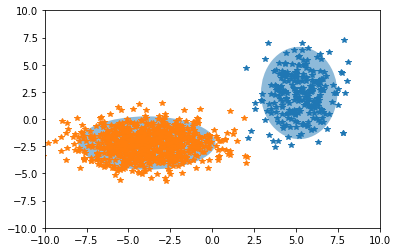

In [44]:
import numpy as np
import matplotlib.pyplot as plt
D = 2
K = 10
mu1 = np.array([5.2, 2.4])
sigma1 = np.diag([1.3, 4.5])

mu2 = np.array([-3.9, -2.2])
sigma2 = np.diag([4.2, 1.5])

N = 1000

sample1 = np.random.multivariate_normal(mu1, cov = sigma1, size = 1*N/4)
sample2 = np.random.multivariate_normal(mu2, cov = sigma2, size = 3*N/4)
samples = np.vstack([sample1, sample2])
fig,ax = plt.subplots()
plot_gaussian(np.array([mu1,mu2]),[sigma1,sigma2],ax)
plt.plot(sample1[:,0],sample1[:,1],'*')
plt.plot(sample2[:,0],sample2[:,1],'*')



In [45]:
from scipy.stats import multivariate_normal as mvn
from scipy.stats import dirichlet, invwishart, wishart
from tensorflow_probability import distributions as tfd
import tensorflow as tf

sess = tf.Session()
#tf.reset_default_graph()

In [46]:
def log_posterior(data, pis, mus, sigmas):
    val = tf.zeros(1)

    for i in range(data.shape[0]):
        val += tf.reduce_logsumexp([tf.log(pis[k]) + (tfd.MultivariateNormalTriL(loc=mus[k], 
                                        scale_tril=sigmas[k]).log_prob(data[i])) for k in range(pis.shape[0])])
    
    return val

In [47]:
tf.random_uniform((K,1))

<tf.Tensor 'random_uniform_16:0' shape=(10, 1) dtype=float32>

In [48]:
pis_unnormalized = tf.Variable(tf.random_uniform((K,1)),tf.float32)
pis_sum = tf.reduce_sum(tf.exp(pis_unnormalized))
pis = tf.exp(pis_unnormalized)/pis_sum

mus = tf.Variable(tf.random_uniform((K,D)),dtype=tf.float32)

L = tf.Variable(tf.random_uniform((K,D)))
sigmas = tf.stack([tf.diag(L[i]) for i in range(L.shape[0])])

num_batch = 30
data = tf.placeholder(tf.float32, shape=[num_batch,2])

In [49]:
post = log_posterior(data,pis,mus, sigmas)

In [50]:
optimizer = tf.train.AdamOptimizer(0.01)

train = optimizer.minimize(-post,var_list=[pis_unnormalized,mus,L])

In [51]:
sess.run(tf.global_variables_initializer())

In [54]:
for i in range(3000):
    np.random.shuffle(samples)
    _,val,mus_val,sigmas_val,pis_val = sess.run([train,post,mus,sigmas,pis], feed_dict={data:samples[0:num_batch]})
    print val
    print mus_val 
    print sigmas_val
    print pis_val

[-128.987]
[[ 4.2769713   0.593229  ]
 [-1.4206291  -0.4024464 ]
 [ 5.0197644   2.4278052 ]
 [-4.238276   -2.2113955 ]
 [-2.7322295  -2.2344334 ]
 [-1.0926791  -1.1637152 ]
 [ 0.1924714  -0.06922797]
 [-0.41440916 -1.2711071 ]
 [-0.91260016 -0.78198206]
 [-2.4016616  -2.1595335 ]]
[[[1.9978917  0.        ]
  [0.         0.09110029]]

 [[1.2995744  0.        ]
  [0.         0.38413605]]

 [[1.6250176  0.        ]
  [0.         1.9715878 ]]

 [[1.8795702  0.        ]
  [0.         1.2115437 ]]

 [[2.861068   0.        ]
  [0.         0.94882673]]

 [[0.77895606 0.        ]
  [0.         1.2220635 ]]

 [[1.286272   0.        ]
  [0.         1.4792895 ]]

 [[2.0009656  0.        ]
  [0.         1.4966245 ]]

 [[1.4597744  0.        ]
  [0.         0.940104  ]]

 [[2.3765674  0.        ]
  [0.         1.1099929 ]]]
[[0.00361009]
 [0.00332414]
 [0.23892525]
 [0.5966667 ]
 [0.07229251]
 [0.00443068]
 [0.01136616]
 [0.00218886]
 [0.00585597]
 [0.06133963]]
[-135.43979]
[[ 4.2797627   0.5934484

[-133.43768]
[[ 4.2993307   0.5753801 ]
 [-1.4270593  -0.39157635]
 [ 5.027552    2.4143145 ]
 [-4.2742796  -2.2514012 ]
 [-2.7370465  -2.2418478 ]
 [-1.1058617  -1.154954  ]
 [ 0.19166048 -0.06979764]
 [-0.41643295 -1.2713796 ]
 [-0.91324735 -0.78165764]
 [-2.4029663  -2.162105  ]]
[[[1.9790814  0.        ]
  [0.         0.09427659]]

 [[1.2924665  0.        ]
  [0.         0.36959687]]

 [[1.6103977  0.        ]
  [0.         1.9587796 ]]

 [[1.9453828  0.        ]
  [0.         1.2177515 ]]

 [[2.8643694  0.        ]
  [0.         0.94432235]]

 [[0.7734846  0.        ]
  [0.         1.2239112 ]]

 [[1.2863624  0.        ]
  [0.         1.4791919 ]]

 [[2.0009966  0.        ]
  [0.         1.4964838 ]]

 [[1.4596698  0.        ]
  [0.         0.94059473]]

 [[2.3769937  0.        ]
  [0.         1.1086026 ]]]
[[0.00366325]
 [0.00332832]
 [0.24255311]
 [0.5929583 ]
 [0.07243915]
 [0.00444384]
 [0.01134721]
 [0.00218772]
 [0.00585743]
 [0.0612217 ]]
[-128.5824]
[[ 4.3018994   0.574798

[-121.23469]
[[ 4.3331003   0.57333845]
 [-1.4588474  -0.36297116]
 [ 5.0423355   2.3634176 ]
 [-4.2517347  -2.3135097 ]
 [-2.7448099  -2.2535532 ]
 [-1.1409764  -1.1556982 ]
 [ 0.19067498 -0.07116862]
 [-0.42172456 -1.2737792 ]
 [-0.91496646 -0.7821074 ]
 [-2.4068215  -2.1679535 ]]
[[[1.9504057  0.        ]
  [0.         0.09452942]]

 [[1.272838   0.        ]
  [0.         0.33848932]]

 [[1.5844854  0.        ]
  [0.         1.9412444 ]]

 [[1.9627149  0.        ]
  [0.         1.214594  ]]

 [[2.8665814  0.        ]
  [0.         0.93240774]]

 [[0.7670396  0.        ]
  [0.         1.219217  ]]

 [[1.2865642  0.        ]
  [0.         1.4791138 ]]

 [[2.0014539  0.        ]
  [0.         1.4954338 ]]

 [[1.4595377  0.        ]
  [0.         0.9407727 ]]

 [[2.375453   0.        ]
  [0.         1.1040163 ]]]
[[0.00361501]
 [0.00328393]
 [0.23598245]
 [0.602037  ]
 [0.07157125]
 [0.00437758]
 [0.01106809]
 [0.00214046]
 [0.00573847]
 [0.06018576]]
[-130.12163]
[[ 4.3346667   0.57310

[-128.79666]
[[ 4.350134    0.5706092 ]
 [-1.4768806  -0.3476845 ]
 [ 5.0630226   2.3771074 ]
 [-4.224398   -2.2926135 ]
 [-2.7465675  -2.250156  ]
 [-1.1574152  -1.1604835 ]
 [ 0.19033085 -0.07229945]
 [-0.42424875 -1.2762929 ]
 [-0.9156916  -0.7828565 ]
 [-2.408229   -2.1677797 ]]
[[[1.9428793  0.        ]
  [0.         0.09665171]]

 [[1.260805   0.        ]
  [0.         0.29461166]]

 [[1.571459   0.        ]
  [0.         1.9264979 ]]

 [[1.9399163  0.        ]
  [0.         1.1688269 ]]

 [[2.863367   0.        ]
  [0.         0.9222787 ]]

 [[0.76033676 0.        ]
  [0.         1.2136999 ]]

 [[1.286642   0.        ]
  [0.         1.47908   ]]

 [[2.001547   0.        ]
  [0.         1.4939702 ]]

 [[1.4594985  0.        ]
  [0.         0.94046116]]

 [[2.3739429  0.        ]
  [0.         1.098444  ]]]
[[0.00358484]
 [0.00330053]
 [0.24172759]
 [0.59655577]
 [0.07138396]
 [0.00438329]
 [0.01102279]
 [0.00213483]
 [0.00573128]
 [0.06017509]]
[-124.48353]
[[ 4.3518376   0.57078

[-138.36299]
[[ 4.365279    0.57292163]
 [-1.4935149  -0.35419506]
 [ 5.0808764   2.3808193 ]
 [-4.219049   -2.293143  ]
 [-2.7460747  -2.2541902 ]
 [-1.1686958  -1.1596718 ]
 [ 0.18993261 -0.07297828]
 [-0.42506918 -1.2783432 ]
 [-0.91620857 -0.7831666 ]
 [-2.4089992  -2.1708815 ]]
[[[1.9378976  0.        ]
  [0.         0.10352137]]

 [[1.2548666  0.        ]
  [0.         0.2742681 ]]

 [[1.5630847  0.        ]
  [0.         1.9182118 ]]

 [[1.9189197  0.        ]
  [0.         1.139572  ]]

 [[2.8620007  0.        ]
  [0.         0.9172547 ]]

 [[0.75516146 0.        ]
  [0.         1.2154462 ]]

 [[1.2867154  0.        ]
  [0.         1.4790679 ]]

 [[2.0017738  0.        ]
  [0.         1.4932048 ]]

 [[1.4594921  0.        ]
  [0.         0.9406723 ]]

 [[2.3736985  0.        ]
  [0.         1.0940177 ]]]
[[0.00352132]
 [0.00327049]
 [0.23933932]
 [0.60015124]
 [0.07096492]
 [0.00434784]
 [0.01089286]
 [0.0021126 ]
 [0.00566659]
 [0.0597329 ]]
[-122.85321]
[[ 4.368279    0.57354

[-132.89864]
[[ 4.3908033   0.5842836 ]
 [-1.5169997  -0.34898418]
 [ 5.0948215   2.3558967 ]
 [-4.202822   -2.305423  ]
 [-2.7474627  -2.2520354 ]
 [-1.1890186  -1.1511035 ]
 [ 0.18955979 -0.07395729]
 [-0.4260459  -1.2796435 ]
 [-0.91690344 -0.7830968 ]
 [-2.409614   -2.1713774 ]]
[[[1.9268316  0.        ]
  [0.         0.10402635]]

 [[1.2450708  0.        ]
  [0.         0.2569469 ]]

 [[1.5501325  0.        ]
  [0.         1.9130082 ]]

 [[1.8923327  0.        ]
  [0.         1.1739358 ]]

 [[2.8639617  0.        ]
  [0.         0.9173591 ]]

 [[0.74817187 0.        ]
  [0.         1.2185032 ]]

 [[1.2868558  0.        ]
  [0.         1.4789712 ]]

 [[2.002063   0.        ]
  [0.         1.4919205 ]]

 [[1.4595193  0.        ]
  [0.         0.94088334]]

 [[2.373514   0.        ]
  [0.         1.0945352 ]]]
[[0.00350187]
 [0.00326364]
 [0.23886625]
 [0.6013688 ]
 [0.07066911]
 [0.00433233]
 [0.01080499]
 [0.00210034]
 [0.00563228]
 [0.05946036]]
[-134.89372]
[[ 4.392637    0.58483

[-123.379684]
[[ 4.4055085   0.59161854]
 [-1.5312768  -0.34173506]
 [ 5.1173615   2.3368566 ]
 [-4.230318   -2.3047733 ]
 [-2.7504847  -2.2531862 ]
 [-1.1939414  -1.1537977 ]
 [ 0.18906721 -0.07561646]
 [-0.42818433 -1.2831061 ]
 [-0.91743016 -0.7840868 ]
 [-2.4100473  -2.1734297 ]]
[[[1.9124591  0.        ]
  [0.         0.10600277]]

 [[1.2330413  0.        ]
  [0.         0.21451955]]

 [[1.532186   0.        ]
  [0.         1.9015869 ]]

 [[1.9299295  0.        ]
  [0.         1.2288575 ]]

 [[2.866062   0.        ]
  [0.         0.91656816]]

 [[0.7405838  0.        ]
  [0.         1.2157085 ]]

 [[1.2869153  0.        ]
  [0.         1.4789692 ]]

 [[2.002124   0.        ]
  [0.         1.4902127 ]]

 [[1.4594828  0.        ]
  [0.         0.940793  ]]

 [[2.373817   0.        ]
  [0.         1.0937829 ]]]
[[0.00343353]
 [0.00324893]
 [0.23723611]
 [0.6038496 ]
 [0.07050013]
 [0.00430395]
 [0.01067525]
 [0.00208058]
 [0.00558036]
 [0.05909152]]
[-122.2372]
[[ 4.406091    0.59224

[-137.29388]
[[ 4.4109297   0.5913815 ]
 [-1.532836   -0.32463712]
 [ 5.1283774   2.3289611 ]
 [-4.205839   -2.3348594 ]
 [-2.7503407  -2.2672715 ]
 [-1.1991696  -1.163456  ]
 [ 0.18879384 -0.07668999]
 [-0.42930743 -1.2872088 ]
 [-0.91778684 -0.7849995 ]
 [-2.4090307  -2.1810303 ]]
[[[1.8987577  0.        ]
  [0.         0.1094137 ]]

 [[1.2228512  0.        ]
  [0.         0.16169408]]

 [[1.5197419  0.        ]
  [0.         1.8873686 ]]

 [[1.9653329  0.        ]
  [0.         1.2097054 ]]

 [[2.8651702  0.        ]
  [0.         0.9164627 ]]

 [[0.7296227  0.        ]
  [0.         1.2139213 ]]

 [[1.2869349  0.        ]
  [0.         1.4789802 ]]

 [[2.0019848  0.        ]
  [0.         1.4898043 ]]

 [[1.4594108  0.        ]
  [0.         0.94073576]]

 [[2.3732555  0.        ]
  [0.         1.0914491 ]]]
[[0.00342378]
 [0.00325953]
 [0.23715644]
 [0.60296524]
 [0.07116553]
 [0.00431314]
 [0.01064344]
 [0.00207849]
 [0.00557335]
 [0.0594211 ]]
[-126.70948]
[[ 4.4119697   0.59078

[-125.38701]
[[ 4.4184504   0.58719254]
 [-1.5498824  -0.30079305]
 [ 5.1379004   2.3157625 ]
 [-4.1702013  -2.3297288 ]
 [-2.7502096  -2.2735848 ]
 [-1.2099003  -1.1719561 ]
 [ 0.18835464 -0.0777345 ]
 [-0.43109262 -1.2899358 ]
 [-0.91844267 -0.785724  ]
 [-2.40805    -2.1850736 ]]
[[[1.8833513  0.        ]
  [0.         0.10896511]]

 [[1.2154183  0.        ]
  [0.         0.11577814]]

 [[1.5006614  0.        ]
  [0.         1.8917977 ]]

 [[2.0124855  0.        ]
  [0.         1.1696525 ]]

 [[2.8671424  0.        ]
  [0.         0.90576065]]

 [[0.7238819  0.        ]
  [0.         1.213825  ]]

 [[1.287015   0.        ]
  [0.         1.4790047 ]]

 [[2.0021217  0.        ]
  [0.         1.4890926 ]]

 [[1.4594021  0.        ]
  [0.         0.94105095]]

 [[2.372669   0.        ]
  [0.         1.085504  ]]]
[[0.00348267]
 [0.0033    ]
 [0.2452109 ]
 [0.59207535]
 [0.07279331]
 [0.00436536]
 [0.0107139 ]
 [0.00209817]
 [0.00561887]
 [0.0603415 ]]
[-134.77048]
[[ 4.418921    0.58799

[-134.9949]
[[ 4.4262257   0.59687763]
 [-1.5610232  -0.20795333]
 [ 5.1492615   2.3070757 ]
 [-4.1942906  -2.341215  ]
 [-2.7524145  -2.2860217 ]
 [-1.2127287  -1.1747497 ]
 [ 0.1880005  -0.07858089]
 [-0.431993   -1.2923659 ]
 [-0.91890347 -0.7859611 ]
 [-2.4087198  -2.1908345 ]]
[[[1.872042   0.        ]
  [0.         0.11357993]]

 [[1.2076694  0.        ]
  [0.         0.05803822]]

 [[1.483792   0.        ]
  [0.         1.90361   ]]

 [[2.0311162  0.        ]
  [0.         1.1727794 ]]

 [[2.8709247  0.        ]
  [0.         0.9061675 ]]

 [[0.7193984  0.        ]
  [0.         1.2149569 ]]

 [[1.2870779  0.        ]
  [0.         1.4790032 ]]

 [[2.00242    0.        ]
  [0.         1.4886624 ]]

 [[1.4594024  0.        ]
  [0.         0.94123983]]

 [[2.3732367  0.        ]
  [0.         1.0851595 ]]]
[[0.00344627]
 [0.00329519]
 [0.24276845]
 [0.59535706]
 [0.07263963]
 [0.00433543]
 [0.01060138]
 [0.0020796 ]
 [0.00556217]
 [0.05991478]]
[-134.69873]
[[ 4.4279566   0.598107

[-133.78674]
[[ 4.436998    0.60554826]
 [-1.558213   -0.07911767]
 [ 5.1605115   2.3180065 ]
 [-4.224402   -2.3616679 ]
 [-2.7535543  -2.2999403 ]
 [-1.2121152  -1.1732424 ]
 [ 0.18761963 -0.0794505 ]
 [-0.43321958 -1.2936702 ]
 [-0.9194354  -0.7858245 ]
 [-2.4088645  -2.1964993 ]]
[[[1.8616318  0.        ]
  [0.         0.11511638]]

 [[1.1985723  0.        ]
  [0.         0.17683321]]

 [[1.4711306  0.        ]
  [0.         1.922107  ]]

 [[2.0452003  0.        ]
  [0.         1.179739  ]]

 [[2.8738394  0.        ]
  [0.         0.908971  ]]

 [[0.71186835 0.        ]
  [0.         1.2132237 ]]

 [[1.2871681  0.        ]
  [0.         1.4789425 ]]

 [[2.0025303  0.        ]
  [0.         1.4888253 ]]

 [[1.4593724  0.        ]
  [0.         0.94148684]]

 [[2.3740783  0.        ]
  [0.         1.0863929 ]]]
[[0.0033862 ]
 [0.00327752]
 [0.23706795]
 [0.60213584]
 [0.07238626]
 [0.00430031]
 [0.01047229]
 [0.00205883]
 [0.00550252]
 [0.05941231]]
[-132.58907]
[[ 4.437558    0.60580

[-127.523636]
[[ 4.4475636   0.6044725 ]
 [-1.5548428  -0.03591561]
 [ 5.1555376   2.3068795 ]
 [-4.253854   -2.363198  ]
 [-2.7535193  -2.310444  ]
 [-1.2183421  -1.1730692 ]
 [ 0.18710299 -0.08007225]
 [-0.43449607 -1.2943515 ]
 [-0.9202135  -0.7856842 ]
 [-2.4094868  -2.200171  ]]
[[[1.8501629  0.        ]
  [0.         0.1192297 ]]

 [[1.1927323  0.        ]
  [0.         0.22485186]]

 [[1.4579425  0.        ]
  [0.         1.9364    ]]

 [[2.0517201  0.        ]
  [0.         1.1822392 ]]

 [[2.8767872  0.        ]
  [0.         0.9052242 ]]

 [[0.7010788  0.        ]
  [0.         1.2139338 ]]

 [[1.2873006  0.        ]
  [0.         1.4788842 ]]

 [[2.0030556  0.        ]
  [0.         1.4894793 ]]

 [[1.4593757  0.        ]
  [0.         0.94212574]]

 [[2.375079   0.        ]
  [0.         1.0851386 ]]]
[[0.00331516]
 [0.00324081]
 [0.23379202]
 [0.60689694]
 [0.07194706]
 [0.00426323]
 [0.01033528]
 [0.00203633]
 [0.00543164]
 [0.05874157]]
[-137.76994]
[[ 4.4487214   0.6042

[-126.740944]
[[ 4.47318     0.5970208 ]
 [-1.5868102  -0.0272193 ]
 [ 5.171997    2.2788143 ]
 [-4.209314   -2.3389273 ]
 [-2.7465305  -2.3107204 ]
 [-1.2427057  -1.1621863 ]
 [ 0.18632884 -0.08093803]
 [-0.43521056 -1.2954952 ]
 [-0.9213     -0.78526354]
 [-2.4078853  -2.1990492 ]]
[[[1.8325906  0.        ]
  [0.         0.10835586]]

 [[1.1859221  0.        ]
  [0.         0.23312335]]

 [[1.4379113  0.        ]
  [0.         1.9536086 ]]

 [[2.021917   0.        ]
  [0.         1.2294743 ]]

 [[2.8805623  0.        ]
  [0.         0.9065322 ]]

 [[0.6823025  0.        ]
  [0.         1.2206523 ]]

 [[1.2874715  0.        ]
  [0.         1.4787979 ]]

 [[2.0039306  0.        ]
  [0.         1.4888617 ]]

 [[1.4594444  0.        ]
  [0.         0.94280076]]

 [[2.375796   0.        ]
  [0.         1.0861001 ]]]
[[0.0033406 ]
 [0.00327166]
 [0.24273996]
 [0.59612685]
 [0.07289761]
 [0.0043167 ]
 [0.01038912]
 [0.00205571]
 [0.00547224]
 [0.05938955]]
[-137.52809]
[[ 4.476953    0.5961

[-129.52315]
[[ 4.5092664   0.5746848 ]
 [-1.610874   -0.03551017]
 [ 5.1832643   2.2653685 ]
 [-4.2155147  -2.3137057 ]
 [-2.7487845  -2.3025494 ]
 [-1.2578522  -1.1576319 ]
 [ 0.18572569 -0.081648  ]
 [-0.43770838 -1.2958355 ]
 [-0.9222504  -0.7851398 ]
 [-2.4100552  -2.1948721 ]]
[[[1.8223406  0.        ]
  [0.         0.10061587]]

 [[1.1775416  0.        ]
  [0.         0.23625335]]

 [[1.4219135  0.        ]
  [0.         1.956284  ]]

 [[2.000117   0.        ]
  [0.         1.2632893 ]]

 [[2.8807757  0.        ]
  [0.         0.91206187]]

 [[0.6710712  0.        ]
  [0.         1.2182866 ]]

 [[1.2875718  0.        ]
  [0.         1.4787059 ]]

 [[2.004389   0.        ]
  [0.         1.4876368 ]]

 [[1.4594215  0.        ]
  [0.         0.94264805]]

 [[2.3753617  0.        ]
  [0.         1.0886563 ]]]
[[0.00340216]
 [0.00329435]
 [0.24993785]
 [0.58983225]
 [0.07210756]
 [0.00433611]
 [0.01037075]
 [0.0020553 ]
 [0.00547963]
 [0.05918392]]
[-126.492905]
[[ 4.5129995   0.5733

[-128.19917]
[[ 4.537199    0.556243  ]
 [-1.6332905  -0.03940702]
 [ 5.197006    2.2460327 ]
 [-4.215449   -2.2870376 ]
 [-2.7506337  -2.293168  ]
 [-1.2723604  -1.1654155 ]
 [ 0.18522659 -0.08263426]
 [-0.44074175 -1.2971739 ]
 [-0.92317426 -0.786039  ]
 [-2.4116824  -2.191746  ]]
[[[1.8054876  0.        ]
  [0.         0.09387902]]

 [[1.1735842  0.        ]
  [0.         0.24207827]]

 [[1.4042176  0.        ]
  [0.         1.9576979 ]]

 [[2.0044818  0.        ]
  [0.         1.2639091 ]]

 [[2.8801534  0.        ]
  [0.         0.90804446]]

 [[0.66418874 0.        ]
  [0.         1.2113461 ]]

 [[1.287661   0.        ]
  [0.         1.4787003 ]]

 [[2.0047643  0.        ]
  [0.         1.4859852 ]]

 [[1.4593922  0.        ]
  [0.         0.94247353]]

 [[2.3746073  0.        ]
  [0.         1.0850945 ]]]
[[0.00341979]
 [0.00327638]
 [0.25031793]
 [0.59038866]
 [0.07164702]
 [0.00432515]
 [0.01027458]
 [0.0020406 ]
 [0.00544628]
 [0.05886361]]
[-126.6668]
[[ 4.5394397   0.554966

[-124.37788]
[[ 4.5625305   0.54165137]
 [-1.6492571  -0.04685398]
 [ 5.2015824   2.2288134 ]
 [-4.2043204  -2.2664719 ]
 [-2.7515364  -2.2910502 ]
 [-1.284016   -1.1775116 ]
 [ 0.18473159 -0.08382969]
 [-0.44339168 -1.3002025 ]
 [-0.92407507 -0.7874364 ]
 [-2.4128108  -2.192109  ]]
[[[1.7906312  0.        ]
  [0.         0.08677983]]

 [[1.1716315  0.        ]
  [0.         0.24913244]]

 [[1.3871337  0.        ]
  [0.         1.9660378 ]]

 [[1.9876974  0.        ]
  [0.         1.2321959 ]]

 [[2.8786008  0.        ]
  [0.         0.9014023 ]]

 [[0.6650778  0.        ]
  [0.         1.203358  ]]

 [[1.2877513  0.        ]
  [0.         1.4787843 ]]

 [[2.0051405  0.        ]
  [0.         1.4847674 ]]

 [[1.4593472  0.        ]
  [0.         0.94234186]]

 [[2.373687   0.        ]
  [0.         1.0786825 ]]]
[[0.00338193]
 [0.00322277]
 [0.2444718 ]
 [0.59745026]
 [0.07131459]
 [0.00427917]
 [0.01009853]
 [0.00201121]
 [0.00536703]
 [0.05840268]]
[-125.70464]
[[ 4.566893    0.53938

[-135.4756]
[[ 4.6097903   0.5346404 ]
 [-1.6775384  -0.05996198]
 [ 5.2151694   2.2343233 ]
 [-4.244483   -2.2899585 ]
 [-2.7595005  -2.3013744 ]
 [-1.3020247  -1.1931515 ]
 [ 0.18431908 -0.08567848]
 [-0.44666177 -1.3053591 ]
 [-0.92502975 -0.7894438 ]
 [-2.415397   -2.1982653 ]]
[[[1.7738163  0.        ]
  [0.         0.0587857 ]]

 [[1.1639869  0.        ]
  [0.         0.24887027]]

 [[1.3625458  0.        ]
  [0.         1.9626671 ]]

 [[2.0187378  0.        ]
  [0.         1.2202761 ]]

 [[2.8816252  0.        ]
  [0.         0.89359665]]

 [[0.66648227 0.        ]
  [0.         1.1940525 ]]

 [[1.2878456  0.        ]
  [0.         1.4789168 ]]

 [[2.0054939  0.        ]
  [0.         1.4824803 ]]

 [[1.4593273  0.        ]
  [0.         0.9419908 ]]

 [[2.3732426  0.        ]
  [0.         1.0719337 ]]]
[[0.00337311]
 [0.00318257]
 [0.24678259]
 [0.59652853]
 [0.07090894]
 [0.00423919]
 [0.00993123]
 [0.00198269]
 [0.00528666]
 [0.05778446]]
[-121.622444]
[[ 4.6122384   0.53430

[-134.70981]
[[ 4.64041     0.523799  ]
 [-1.7014816  -0.07080664]
 [ 5.2343597   2.2711184 ]
 [-4.2537465  -2.3163304 ]
 [-2.7671628  -2.3036323 ]
 [-1.3288069  -1.2060837 ]
 [ 0.18423164 -0.08668442]
 [-0.4505507  -1.3087608 ]
 [-0.9260683  -0.7908426 ]
 [-2.4190547  -2.2028406 ]]
[[[1.7646836  0.        ]
  [0.         0.05459828]]

 [[1.1506922  0.        ]
  [0.         0.24360286]]

 [[1.3417757  0.        ]
  [0.         1.9982688 ]]

 [[2.026451   0.        ]
  [0.         1.2358772 ]]

 [[2.8823335  0.        ]
  [0.         0.8993748 ]]

 [[0.66322863 0.        ]
  [0.         1.1833401 ]]

 [[1.287872   0.        ]
  [0.         1.4788584 ]]

 [[2.005725   0.        ]
  [0.         1.4815178 ]]

 [[1.4592915  0.        ]
  [0.         0.9417548 ]]

 [[2.3718266  0.        ]
  [0.         1.0709743 ]]]
[[0.00330767]
 [0.0031435 ]
 [0.24813662]
 [0.5976934 ]
 [0.06964752]
 [0.00419574]
 [0.00977226]
 [0.00195125]
 [0.00520327]
 [0.05694876]]
[-136.95502]
[[ 4.6418805   0.52321

[-131.69217]
[[ 4.6515107   0.5316788 ]
 [-1.7053865  -0.08106681]
 [ 5.2356844   2.283239  ]
 [-4.2339263  -2.3030643 ]
 [-2.7709951  -2.2949796 ]
 [-1.3377241  -1.2052901 ]
 [ 0.18384422 -0.08716933]
 [-0.45356867 -1.3099527 ]
 [-0.9268563  -0.79122424]
 [-2.4214456  -2.2009878 ]]
[[[1.7573693  0.        ]
  [0.         0.05694368]]

 [[1.1429876  0.        ]
  [0.         0.24074717]]

 [[1.337159   0.        ]
  [0.         2.0082784 ]]

 [[1.9953676  0.        ]
  [0.         1.268772  ]]

 [[2.8802476  0.        ]
  [0.         0.91348183]]

 [[0.6615807  0.        ]
  [0.         1.1785269 ]]

 [[1.2878952  0.        ]
  [0.         1.4787741 ]]

 [[2.0058064  0.        ]
  [0.         1.480971  ]]

 [[1.4592515  0.        ]
  [0.         0.94147545]]

 [[2.3702242  0.        ]
  [0.         1.0742532 ]]]
[[0.00324348]
 [0.00312014]
 [0.24638069]
 [0.601696  ]
 [0.06831885]
 [0.00416374]
 [0.00965631]
 [0.00192863]
 [0.00515086]
 [0.05634129]]
[-131.1356]
[[ 4.6522717   0.532821

[-126.641884]
[[ 4.645947    0.5067385 ]
 [-1.6983865  -0.09091888]
 [ 5.2392473   2.2858086 ]
 [-4.230423   -2.2835789 ]
 [-2.7758436  -2.2923317 ]
 [-1.3427262  -1.204865  ]
 [ 0.18355376 -0.08787698]
 [-0.45599955 -1.31185   ]
 [-0.9275964  -0.7916569 ]
 [-2.4238584  -2.2012138 ]]
[[[1.7282947  0.        ]
  [0.         0.06055574]]

 [[1.1363848  0.        ]
  [0.         0.23885557]]

 [[1.3284851  0.        ]
  [0.         2.004379  ]]

 [[1.9801753  0.        ]
  [0.         1.2526495 ]]

 [[2.8785298  0.        ]
  [0.         0.9194288 ]]

 [[0.65919524 0.        ]
  [0.         1.172727  ]]

 [[1.2879448  0.        ]
  [0.         1.4787362 ]]

 [[2.0059063  0.        ]
  [0.         1.4802997 ]]

 [[1.4591991  0.        ]
  [0.         0.94110966]]

 [[2.3690505  0.        ]
  [0.         1.0742763 ]]]
[[0.00326382]
 [0.00312609]
 [0.25127524]
 [0.5977312 ]
 [0.0676486 ]
 [0.00416516]
 [0.00961479]
 [0.00192123]
 [0.00513782]
 [0.05611605]]
[-136.8485]
[[ 4.6453915   0.50417

[-138.72351]
[[ 4.6375937   0.4534673 ]
 [-1.7102453  -0.09593892]
 [ 5.2529593   2.3228395 ]
 [-4.186767   -2.273827  ]
 [-2.777463   -2.2799826 ]
 [-1.3711059  -1.2084466 ]
 [ 0.18365113 -0.08980099]
 [-0.4578881  -1.3162676 ]
 [-0.9285215  -0.79326177]
 [-2.4242477  -2.1981685 ]]
[[[1.6900634  0.        ]
  [0.         0.05095006]]

 [[1.1161941  0.        ]
  [0.         0.22690496]]

 [[1.3085659  0.        ]
  [0.         2.0109372 ]]

 [[1.9644593  0.        ]
  [0.         1.2159768 ]]

 [[2.8750992  0.        ]
  [0.         0.9221933 ]]

 [[0.6626059  0.        ]
  [0.         1.1606979 ]]

 [[1.288054   0.        ]
  [0.         1.4786996 ]]

 [[2.0059352  0.        ]
  [0.         1.4774915 ]]

 [[1.4592254  0.        ]
  [0.         0.9402332 ]]

 [[2.367418   0.        ]
  [0.         1.0704871 ]]]
[[0.00326701]
 [0.00316007]
 [0.2603509 ]
 [0.5880233 ]
 [0.06780566]
 [0.00419193]
 [0.00960611]
 [0.00192519]
 [0.00515527]
 [0.05651454]]
[-132.22044]
[[ 4.6373057   0.45253

[-124.8737]
[[ 4.6500006   0.46664444]
 [-1.7271551  -0.09284283]
 [ 5.262969    2.3343785 ]
 [-4.174044   -2.2685108 ]
 [-2.7812905  -2.270521  ]
 [-1.3884184  -1.2176933 ]
 [ 0.1835803  -0.09144687]
 [-0.4602044  -1.3208466 ]
 [-0.92936325 -0.7949928 ]
 [-2.4255586  -2.196926  ]]
[[[1.6759816  0.        ]
  [0.         0.05948175]]

 [[1.111437   0.        ]
  [0.         0.22734213]]

 [[1.2943323  0.        ]
  [0.         2.0314827 ]]

 [[1.9410512  0.        ]
  [0.         1.2002723 ]]

 [[2.876075   0.        ]
  [0.         0.9119881 ]]

 [[0.66063195 0.        ]
  [0.         1.1521683 ]]

 [[1.2881368  0.        ]
  [0.         1.4787968 ]]

 [[2.0060956  0.        ]
  [0.         1.4753671 ]]

 [[1.459288   0.        ]
  [0.         0.9397897 ]]

 [[2.366601   0.        ]
  [0.         1.0658137 ]]]
[[0.00317908]
 [0.00310258]
 [0.2540752 ]
 [0.59580195]
 [0.06739078]
 [0.00413216]
 [0.0094177 ]
 [0.00189243]
 [0.00506396]
 [0.05594423]]
[-129.16075]
[[ 4.6515303   0.469484

[-128.99669]
[[ 4.656948    0.48891932]
 [-1.7444134  -0.09973107]
 [ 5.265691    2.345964  ]
 [-4.1904507  -2.2592819 ]
 [-2.7840164  -2.267649  ]
 [-1.3923132  -1.2218931 ]
 [ 0.18349816 -0.0923733 ]
 [-0.4612858  -1.3225448 ]
 [-0.9297965  -0.79576033]
 [-2.426514   -2.1952863 ]]
[[[1.6495278  0.        ]
  [0.         0.04980529]]

 [[1.1112411  0.        ]
  [0.         0.2269917 ]]

 [[1.2860601  0.        ]
  [0.         2.023478  ]]

 [[1.9400798  0.        ]
  [0.         1.179068  ]]

 [[2.8770628  0.        ]
  [0.         0.90091   ]]

 [[0.6621603  0.        ]
  [0.         1.148244  ]]

 [[1.288194   0.        ]
  [0.         1.4787565 ]]

 [[2.006312   0.        ]
  [0.         1.4740889 ]]

 [[1.4593409  0.        ]
  [0.         0.93982047]]

 [[2.3667583  0.        ]
  [0.         1.0605971 ]]]
[[0.0031497 ]
 [0.00306344]
 [0.24710153]
 [0.6039498 ]
 [0.06709659]
 [0.00408519]
 [0.00928504]
 [0.00186854]
 [0.00499613]
 [0.05540399]]
[-126.41563]
[[ 4.657091    0.49048

[-128.7984]
[[ 4.648714    0.5116666 ]
 [-1.7570369  -0.11034259]
 [ 5.2722845   2.3674173 ]
 [-4.1850567  -2.2409363 ]
 [-2.7856028  -2.2689087 ]
 [-1.401576   -1.2314163 ]
 [ 0.18306689 -0.09369162]
 [-0.46447688 -1.3241184 ]
 [-0.93042034 -0.7968081 ]
 [-2.4263942  -2.1973708 ]]
[[[1.617673   0.        ]
  [0.         0.04022692]]

 [[1.1062268  0.        ]
  [0.         0.22534688]]

 [[1.2704209  0.        ]
  [0.         1.9949338 ]]

 [[1.9605988  0.        ]
  [0.         1.1751609 ]]

 [[2.8770347  0.        ]
  [0.         0.8869985 ]]

 [[0.67442125 0.        ]
  [0.         1.1460675 ]]

 [[1.2883012  0.        ]
  [0.         1.4788464 ]]

 [[2.0065026  0.        ]
  [0.         1.4742224 ]]

 [[1.4593974  0.        ]
  [0.         0.94035393]]

 [[2.3663917  0.        ]
  [0.         1.0538045 ]]]
[[0.00313274]
 [0.00304076]
 [0.24458447]
 [0.6064034 ]
 [0.06745873]
 [0.00405553]
 [0.00919141]
 [0.00185605]
 [0.00495082]
 [0.05532608]]
[-124.66334]
[[ 4.646452    0.514631

[-127.48596]
[[ 4.6519036   0.56375194]
 [-1.7704281  -0.12171623]
 [ 5.270017    2.3422322 ]
 [-4.145966   -2.2693586 ]
 [-2.786262   -2.2767134 ]
 [-1.4129744  -1.2501212 ]
 [ 0.18297012 -0.095174  ]
 [-0.46748284 -1.3275266 ]
 [-0.93109447 -0.79854363]
 [-2.4256716  -2.2040217 ]]
[[[1.563709   0.        ]
  [0.         0.07000893]]

 [[1.1001793  0.        ]
  [0.         0.22582446]]

 [[1.2539105  0.        ]
  [0.         1.9723927 ]]

 [[1.9852867  0.        ]
  [0.         1.1767666 ]]

 [[2.876177   0.        ]
  [0.         0.8725942 ]]

 [[0.6847882  0.        ]
  [0.         1.140072  ]]

 [[1.2883861  0.        ]
  [0.         1.4789064 ]]

 [[2.0065806  0.        ]
  [0.         1.4736586 ]]

 [[1.4594585  0.        ]
  [0.         0.9409054 ]]

 [[2.3651514  0.        ]
  [0.         1.0449135 ]]]
[[0.00314939]
 [0.00298097]
 [0.23176481]
 [0.6193387 ]
 [0.06795068]
 [0.00399332]
 [0.00901081]
 [0.00182622]
 [0.00485566]
 [0.05512948]]
[-130.9757]
[[ 4.6534076   0.565983

[-130.00148]
[[ 4.6592603   0.5942402 ]
 [-1.7804719  -0.12258884]
 [ 5.2772484   2.327869  ]
 [-4.1484876  -2.2824738 ]
 [-2.7918403  -2.2697055 ]
 [-1.4188323  -1.2581015 ]
 [ 0.18269314 -0.09623148]
 [-0.46991444 -1.330334  ]
 [-0.93181574 -0.79973704]
 [-2.4275854  -2.2047226 ]]
[[[1.540879   0.        ]
  [0.         0.08359787]]

 [[1.0938356  0.        ]
  [0.         0.22607633]]

 [[1.2425073  0.        ]
  [0.         1.9534445 ]]

 [[1.9930946  0.        ]
  [0.         1.1947489 ]]

 [[2.879804   0.        ]
  [0.         0.86972225]]

 [[0.68620926 0.        ]
  [0.         1.1327066 ]]

 [[1.2884446  0.        ]
  [0.         1.4789416 ]]

 [[2.0067816  0.        ]
  [0.         1.472235  ]]

 [[1.4594474  0.        ]
  [0.         0.94075036]]

 [[2.3645911  0.        ]
  [0.         1.0422697 ]]]
[[0.00313145]
 [0.00294979]
 [0.22797291]
 [0.6244792 ]
 [0.06748953]
 [0.00395303]
 [0.00887531]
 [0.0018013 ]
 [0.00478857]
 [0.05455888]]
[-131.84853]
[[ 4.660243    0.59619

[-125.26332]
[[ 4.6732187   0.6102351 ]
 [-1.783853   -0.12711194]
 [ 5.292179    2.3197155 ]
 [-4.1357336  -2.2742074 ]
 [-2.7936358  -2.25839   ]
 [-1.4237878  -1.26546   ]
 [ 0.18254873 -0.09723806]
 [-0.47176328 -1.331623  ]
 [-0.93231153 -0.8006391 ]
 [-2.4288208  -2.2021294 ]]
[[[1.5327471  0.        ]
  [0.         0.10144272]]

 [[1.0870965  0.        ]
  [0.         0.22474064]]

 [[1.231832   0.        ]
  [0.         1.9455361 ]]

 [[1.9776082  0.        ]
  [0.         1.2337782 ]]

 [[2.8817296  0.        ]
  [0.         0.8698957 ]]

 [[0.6839687  0.        ]
  [0.         1.126543  ]]

 [[1.2885096  0.        ]
  [0.         1.478899  ]]

 [[2.0071027  0.        ]
  [0.         1.4705764 ]]

 [[1.4594581  0.        ]
  [0.         0.94045657]]

 [[2.363731   0.        ]
  [0.         1.0408925 ]]]
[[0.00310612]
 [0.00293984]
 [0.22900577]
 [0.62438935]
 [0.06701154]
 [0.00393943]
 [0.0088028 ]
 [0.00178936]
 [0.00475853]
 [0.05425728]]
[-136.68861]
[[ 4.6746073   0.61223

[-140.06154]
[[ 4.6710277   0.61719596]
 [-1.7896006  -0.13469376]
 [ 5.301391    2.2880578 ]
 [-4.124761   -2.2501385 ]
 [-2.7887998  -2.2549007 ]
 [-1.4266013  -1.2739178 ]
 [ 0.18301114 -0.098239  ]
 [-0.47019726 -1.3340638 ]
 [-0.93251795 -0.8015577 ]
 [-2.426539   -2.2022629 ]]
[[[1.5284485  0.        ]
  [0.         0.11500156]]

 [[1.0828998  0.        ]
  [0.         0.22135553]]

 [[1.22566    0.        ]
  [0.         1.9514854 ]]

 [[1.9679368  0.        ]
  [0.         1.2361904 ]]

 [[2.8848913  0.        ]
  [0.         0.86647713]]

 [[0.68867415 0.        ]
  [0.         1.1206483 ]]

 [[1.2885867  0.        ]
  [0.         1.4788142 ]]

 [[2.0076199  0.        ]
  [0.         1.4693062 ]]

 [[1.459527   0.        ]
  [0.         0.94033605]]

 [[2.3644948  0.        ]
  [0.         1.037074  ]]]
[[0.00315859]
 [0.00298737]
 [0.24242918]
 [0.60869056]
 [0.06813752]
 [0.00399586]
 [0.00891393]
 [0.00181562]
 [0.00482001]
 [0.0550514 ]]
[-127.4695]
[[ 4.6719656   0.616784

[[[1.5185177  0.        ]
  [0.         0.12685388]]

 [[1.0790343  0.        ]
  [0.         0.22019897]]

 [[1.218614   0.        ]
  [0.         1.9555687 ]]

 [[1.9881835  0.        ]
  [0.         1.2422638 ]]

 [[2.8924842  0.        ]
  [0.         0.87345713]]

 [[0.69188803 0.        ]
  [0.         1.1158302 ]]

 [[1.288645   0.        ]
  [0.         1.4788198 ]]

 [[2.0080051  0.        ]
  [0.         1.4689443 ]]

 [[1.4595313  0.        ]
  [0.         0.9400854 ]]

 [[2.3663108  0.        ]
  [0.         1.0384185 ]]]
[[0.0032531 ]
 [0.0030547 ]
 [0.258686  ]
 [0.5884303 ]
 [0.07027391]
 [0.00407796]
 [0.0090783 ]
 [0.00185505]
 [0.00491387]
 [0.05637687]]
[-133.7307]
[[ 4.682328    0.6099506 ]
 [-1.7688689  -0.14806382]
 [ 5.2824216   2.2615697 ]
 [-4.0964046  -2.2669442 ]
 [-2.7834935  -2.2686477 ]
 [-1.4253389  -1.2778778 ]
 [ 0.18333204 -0.09941254]
 [-0.46799922 -1.3383516 ]
 [-0.9327739  -0.80226976]
 [-2.4221852  -2.2093105 ]]
[[[1.5183239  0.        ]
  [0.     

[-135.6401]
[[ 4.6866784   0.60785276]
 [-1.7819746  -0.15827882]
 [ 5.2682247   2.2430866 ]
 [-4.083521   -2.313118  ]
 [-2.7803996  -2.2845292 ]
 [-1.4327545  -1.295155  ]
 [ 0.18413939 -0.10087308]
 [-0.4669559  -1.3424098 ]
 [-0.9328941  -0.80378443]
 [-2.42025    -2.2191367 ]]
[[[1.5080796  0.        ]
  [0.         0.14211269]]

 [[1.0792408  0.        ]
  [0.         0.22581619]]

 [[1.2095746  0.        ]
  [0.         1.9543006 ]]

 [[2.002694   0.        ]
  [0.         1.2493328 ]]

 [[2.8947024  0.        ]
  [0.         0.8796974 ]]

 [[0.69451946 0.        ]
  [0.         1.1090004 ]]

 [[1.288757   0.        ]
  [0.         1.4787687 ]]

 [[2.008302   0.        ]
  [0.         1.4680544 ]]

 [[1.4596452  0.        ]
  [0.         0.9400216 ]]

 [[2.3669713  0.        ]
  [0.         1.0379367 ]]]
[[0.00324341]
 [0.0030298 ]
 [0.25821102]
 [0.5880997 ]
 [0.07097685]
 [0.00406493]
 [0.0090254 ]
 [0.00185025]
 [0.00488183]
 [0.05661679]]
[-127.29066]
[[ 4.687636    0.607299

[-130.80383]
[[ 4.7031407   0.6033661 ]
 [-1.77173    -0.16444448]
 [ 5.2550526   2.2617142 ]
 [-4.0814886  -2.296939  ]
 [-2.7804847  -2.2843134 ]
 [-1.4424845  -1.293304  ]
 [ 0.18410942 -0.10177134]
 [-0.4687928  -1.3425047 ]
 [-0.9333568  -0.804232  ]
 [-2.4203699  -2.2191615 ]]
[[[1.4953326  0.        ]
  [0.         0.14758709]]

 [[1.0770906  0.        ]
  [0.         0.22788666]]

 [[1.2137054  0.        ]
  [0.         1.958113  ]]

 [[2.0158687  0.        ]
  [0.         1.2789335 ]]

 [[2.8940182  0.        ]
  [0.         0.89057475]]

 [[0.69201875 0.        ]
  [0.         1.1069404 ]]

 [[1.2888771  0.        ]
  [0.         1.4786881 ]]

 [[2.008496   0.        ]
  [0.         1.4675573 ]]

 [[1.459678   0.        ]
  [0.         0.9400372 ]]

 [[2.366438   0.        ]
  [0.         1.0402299 ]]]
[[0.00321865]
 [0.00300571]
 [0.2574251 ]
 [0.5897612 ]
 [0.07047524]
 [0.00405435]
 [0.00895973]
 [0.00184106]
 [0.00485497]
 [0.05640389]]
[-129.9289]
[[ 4.70449     0.603152

[-124.34114]
[[ 4.711578    0.601217  ]
 [-1.7771739  -0.16772093]
 [ 5.263812    2.2657082 ]
 [-4.075041   -2.277179  ]
 [-2.779311   -2.2838929 ]
 [-1.4482981  -1.2864275 ]
 [ 0.18399522 -0.10258116]
 [-0.46979585 -1.3427128 ]
 [-0.93367434 -0.80421585]
 [-2.4201064  -2.219028  ]]
[[[1.4864033  0.        ]
  [0.         0.15241985]]

 [[1.0779363  0.        ]
  [0.         0.23494923]]

 [[1.2239065  0.        ]
  [0.         1.9665718 ]]

 [[2.0006614  0.        ]
  [0.         1.2956201 ]]

 [[2.892537   0.        ]
  [0.         0.8950758 ]]

 [[0.6841667  0.        ]
  [0.         1.1127223 ]]

 [[1.2889801  0.        ]
  [0.         1.4785205 ]]

 [[2.0085478  0.        ]
  [0.         1.4672885 ]]

 [[1.4597219  0.        ]
  [0.         0.9404373 ]]

 [[2.366172   0.        ]
  [0.         1.04133   ]]]
[[0.00313671]
 [0.00295837]
 [0.24740103]
 [0.6010045 ]
 [0.07001219]
 [0.00401697]
 [0.00884339]
 [0.00182145]
 [0.00480134]
 [0.05600403]]
[-143.30292]
[[ 4.711888    0.60114

[[[1.4659723  0.        ]
  [0.         0.15376143]]

 [[1.0784668  0.        ]
  [0.         0.24095432]]

 [[1.2286266  0.        ]
  [0.         1.9723108 ]]

 [[2.0151465  0.        ]
  [0.         1.2913429 ]]

 [[2.8946192  0.        ]
  [0.         0.8934756 ]]

 [[0.685607   0.        ]
  [0.         1.1126182 ]]

 [[1.289057   0.        ]
  [0.         1.4784025 ]]

 [[2.0087605  0.        ]
  [0.         1.4665033 ]]

 [[1.4597814  0.        ]
  [0.         0.9403731 ]]

 [[2.3667407  0.        ]
  [0.         1.0401663 ]]]
[[0.00307629]
 [0.00290566]
 [0.23621307]
 [0.61354023]
 [0.06971015]
 [0.00395832]
 [0.00869378]
 [0.00179419]
 [0.00472751]
 [0.05538082]]
[-122.47668]
[[ 4.720119    0.6027182 ]
 [-1.7968612  -0.16684306]
 [ 5.2518787   2.2700796 ]
 [-4.093365   -2.2604456 ]
 [-2.7807536  -2.277019  ]
 [-1.460284   -1.2852415 ]
 [ 0.18403874 -0.10364997]
 [-0.47024295 -1.3441442 ]
 [-0.93401766 -0.8047762 ]
 [-2.4207504  -2.216583  ]]
[[[1.4637842  0.        ]
  [0.    

[-128.90288]
[[ 4.721938    0.60727423]
 [-1.8078284  -0.16678065]
 [ 5.2410665   2.2811615 ]
 [-4.109449   -2.2517786 ]
 [-2.7819896  -2.2769096 ]
 [-1.4691801  -1.2844731 ]
 [ 0.18414216 -0.10432794]
 [-0.47027048 -1.345383  ]
 [-0.9344092  -0.80508155]
 [-2.421873   -2.2158005 ]]
[[[1.4522569  0.        ]
  [0.         0.15634182]]

 [[1.0752025  0.        ]
  [0.         0.24710959]]

 [[1.2321445  0.        ]
  [0.         1.9789141 ]]

 [[1.9954472  0.        ]
  [0.         1.2799858 ]]

 [[2.8963938  0.        ]
  [0.         0.8963085 ]]

 [[0.686675   0.        ]
  [0.         1.1086688 ]]

 [[1.2891358  0.        ]
  [0.         1.4783154 ]]

 [[2.0092175  0.        ]
  [0.         1.4653385 ]]

 [[1.4598528  0.        ]
  [0.         0.9400782 ]]

 [[2.3674774  0.        ]
  [0.         1.0397745 ]]]
[[0.00304511]
 [0.00289234]
 [0.23588462]
 [0.6147235 ]
 [0.06936733]
 [0.00393963]
 [0.00862837]
 [0.00178379]
 [0.00469836]
 [0.05503691]]
[-129.63963]
[[ 4.7206926   0.60826

[-125.838684]
[[ 4.717387    0.6091269 ]
 [-1.8140472  -0.17222743]
 [ 5.2454324   2.2887895 ]
 [-4.110342   -2.2619722 ]
 [-2.781124   -2.2845423 ]
 [-1.4773942  -1.2816787 ]
 [ 0.1840826  -0.10523003]
 [-0.47031498 -1.3479866 ]
 [-0.9346984  -0.80572   ]
 [-2.4218445  -2.2203014 ]]
[[[1.4468727  0.        ]
  [0.         0.15165225]]

 [[1.0673271  0.        ]
  [0.         0.2467551 ]]

 [[1.2314001  0.        ]
  [0.         1.9712276 ]]

 [[1.968489   0.        ]
  [0.         1.2326219 ]]

 [[2.8959422  0.        ]
  [0.         0.88882655]]

 [[0.6846441  0.        ]
  [0.         1.1070824 ]]

 [[1.2891814  0.        ]
  [0.         1.4782666 ]]

 [[2.0093844  0.        ]
  [0.         1.464493  ]]

 [[1.4598615  0.        ]
  [0.         0.94017154]]

 [[2.367851   0.        ]
  [0.         1.0337354 ]]]
[[0.00302844]
 [0.00287585]
 [0.23363224]
 [0.61685556]
 [0.06969465]
 [0.00392318]
 [0.00856875]
 [0.00177401]
 [0.00466631]
 [0.05498104]]
[-122.85536]
[[ 4.7186985   0.6091

[-120.58833]
[[ 4.7253175   0.61616176]
 [-1.8060884  -0.17917371]
 [ 5.259696    2.2721734 ]
 [-4.1196094  -2.2989304 ]
 [-2.7816312  -2.287569  ]
 [-1.4823673  -1.2817078 ]
 [ 0.18415098 -0.10615963]
 [-0.47061116 -1.3497677 ]
 [-0.93477225 -0.8063875 ]
 [-2.4227765  -2.2251081 ]]
[[[1.4372658  0.        ]
  [0.         0.14805718]]

 [[1.0616356  0.        ]
  [0.         0.24219076]]

 [[1.2276677  0.        ]
  [0.         1.9668254 ]]

 [[1.9576147  0.        ]
  [0.         1.2230158 ]]

 [[2.895089   0.        ]
  [0.         0.8842735 ]]

 [[0.6843409  0.        ]
  [0.         1.1075886 ]]

 [[1.2892308  0.        ]
  [0.         1.4781697 ]]

 [[2.0095127  0.        ]
  [0.         1.4632641 ]]

 [[1.4598817  0.        ]
  [0.         0.9402577 ]]

 [[2.367827   0.        ]
  [0.         1.0303321 ]]]
[[0.0030053 ]
 [0.00284915]
 [0.23102199]
 [0.6202939 ]
 [0.06940957]
 [0.00389385]
 [0.00848887]
 [0.00175908]
 [0.00462139]
 [0.05465686]]
[-130.74042]
[[ 4.726638    0.61709

[-121.87597]
[[ 4.7394443   0.62147653]
 [-1.809019   -0.18198031]
 [ 5.2662635   2.2712057 ]
 [-4.1195064  -2.3066983 ]
 [-2.7833238  -2.2925248 ]
 [-1.4868187  -1.2863921 ]
 [ 0.18410517 -0.10711487]
 [-0.47131756 -1.3523874 ]
 [-0.9350532  -0.80721664]
 [-2.4226544  -2.2296464 ]]
[[[1.4203398  0.        ]
  [0.         0.14468867]]

 [[1.0566405  0.        ]
  [0.         0.23696108]]

 [[1.2169458  0.        ]
  [0.         1.9653207 ]]

 [[1.94419    0.        ]
  [0.         1.2435322 ]]

 [[2.8985615  0.        ]
  [0.         0.87473375]]

 [[0.6841556  0.        ]
  [0.         1.1078521 ]]

 [[1.2892904  0.        ]
  [0.         1.4781897 ]]

 [[2.0098114  0.        ]
  [0.         1.4627166 ]]

 [[1.4599236  0.        ]
  [0.         0.94048375]]

 [[2.3680027  0.        ]
  [0.         1.0270522 ]]]
[[0.00301842]
 [0.00285982]
 [0.23944493]
 [0.6112996 ]
 [0.06975693]
 [0.00391101]
 [0.0085066 ]
 [0.0017647 ]
 [0.0046264 ]
 [0.05481167]]
[-123.88859]
[[ 4.742553    0.62232

  [0.         1.0225763 ]]]
[[0.00302608]
 [0.00284295]
 [0.24128032]
 [0.6095901 ]
 [0.06997627]
 [0.00389484]
 [0.00844485]
 [0.00175406]
 [0.0045913 ]
 [0.05459914]]
[-130.0882]
[[ 4.76577     0.6244525 ]
 [-1.8228846  -0.18250321]
 [ 5.2712803   2.2665935 ]
 [-4.11011    -2.321751  ]
 [-2.790021   -2.2954872 ]
 [-1.4912544  -1.2977437 ]
 [ 0.18376766 -0.10817225]
 [-0.47377875 -1.3560411 ]
 [-0.93565905 -0.808533  ]
 [-2.4242473  -2.234443  ]]
[[[1.3974881  0.        ]
  [0.         0.13367772]]

 [[1.0533558  0.        ]
  [0.         0.23711386]]

 [[1.2025619  0.        ]
  [0.         1.956222  ]]

 [[1.9176068  0.        ]
  [0.         1.2499346 ]]

 [[2.905829   0.        ]
  [0.         0.8594317 ]]

 [[0.69103515 0.        ]
  [0.         1.1049194 ]]

 [[1.2893459  0.        ]
  [0.         1.4782732 ]]

 [[2.0101283  0.        ]
  [0.         1.462229  ]]

 [[1.4599208  0.        ]
  [0.         0.9406719 ]]

 [[2.3676474  0.        ]
  [0.         1.0218062 ]]]
[[0.0030

[-136.71408]
[[ 4.771443    0.6256142 ]
 [-1.850703   -0.18475372]
 [ 5.2702446   2.2557576 ]
 [-4.1248775  -2.325969  ]
 [-2.7947252  -2.2960563 ]
 [-1.4974126  -1.3127207 ]
 [ 0.1835648  -0.10918225]
 [-0.47657487 -1.359408  ]
 [-0.93625087 -0.8099032 ]
 [-2.426343   -2.2387576 ]]
[[[1.3758669  0.        ]
  [0.         0.12926255]]

 [[1.0545917  0.        ]
  [0.         0.23936039]]

 [[1.1962745  0.        ]
  [0.         1.9366153 ]]

 [[1.8891352  0.        ]
  [0.         1.2683781 ]]

 [[2.9065287  0.        ]
  [0.         0.8467124 ]]

 [[0.69358695 0.        ]
  [0.         1.1029516 ]]

 [[1.289397   0.        ]
  [0.         1.4784148 ]]

 [[2.0103605  0.        ]
  [0.         1.4616011 ]]

 [[1.4599683  0.        ]
  [0.         0.94092804]]

 [[2.3668554  0.        ]
  [0.         1.01593   ]]]
[[0.00295945]
 [0.00276481]
 [0.22949848]
 [0.624244  ]
 [0.06889027]
 [0.00380038]
 [0.00820911]
 [0.001707  ]
 [0.00445712]
 [0.05346944]]
[-126.042175]
[[ 4.771023    0.6265

[-141.09128]
[[ 4.7568283   0.6295213 ]
 [-1.8785287  -0.18862697]
 [ 5.2630024   2.2647176 ]
 [-4.153508   -2.3170435 ]
 [-2.7987418  -2.2954028 ]
 [-1.503643   -1.3273313 ]
 [ 0.18381676 -0.11001561]
 [-0.47786686 -1.3621869 ]
 [-0.93675596 -0.8112053 ]
 [-2.4278553  -2.2425582 ]]
[[[1.3602139  0.        ]
  [0.         0.12848899]]

 [[1.0576096  0.        ]
  [0.         0.2416439 ]]

 [[1.20664    0.        ]
  [0.         1.9331086 ]]

 [[1.9046414  0.        ]
  [0.         1.2621379 ]]

 [[2.90727    0.        ]
  [0.         0.8407756 ]]

 [[0.694814   0.        ]
  [0.         1.099194  ]]

 [[1.2894841  0.        ]
  [0.         1.4785699 ]]

 [[2.0107129  0.        ]
  [0.         1.4608954 ]]

 [[1.4600333  0.        ]
  [0.         0.9410662 ]]

 [[2.366805   0.        ]
  [0.         1.0095856 ]]]
[[0.00294658]
 [0.00273835]
 [0.23070963]
 [0.62367374]
 [0.06877156]
 [0.0037734 ]
 [0.00812804]
 [0.00169189]
 [0.00440527]
 [0.05316157]]
[-128.08154]
[[ 4.754932    0.63046

[-134.48395]
[[ 4.740585    0.6447687 ]
 [-1.8939114  -0.19723204]
 [ 5.2670245   2.2695918 ]
 [-4.1649323  -2.2811358 ]
 [-2.7973826  -2.2945528 ]
 [-1.5126305  -1.3301867 ]
 [ 0.1842117  -0.11065125]
 [-0.47735667 -1.3644291 ]
 [-0.93712133 -0.81203806]
 [-2.425909   -2.2423968 ]]
[[[1.3696775  0.        ]
  [0.         0.12628466]]

 [[1.0559857  0.        ]
  [0.         0.24502032]]

 [[1.2185543  0.        ]
  [0.         1.952819  ]]

 [[1.9373904  0.        ]
  [0.         1.2512448 ]]

 [[2.9092977  0.        ]
  [0.         0.84997094]]

 [[0.68751645 0.        ]
  [0.         1.090833  ]]

 [[1.2895327  0.        ]
  [0.         1.4785346 ]]

 [[2.0108807  0.        ]
  [0.         1.4612553 ]]

 [[1.4600511  0.        ]
  [0.         0.9411671 ]]

 [[2.3678508  0.        ]
  [0.         1.0081676 ]]]
[[0.00298095]
 [0.00275405]
 [0.23809329]
 [0.61428857]
 [0.06989765]
 [0.00381591]
 [0.00819881]
 [0.00170924]
 [0.0044418 ]
 [0.05381973]]
[-124.29916]
[[ 4.739973    0.64627

[-132.98083]
[[ 4.7440915   0.6512229 ]
 [-1.9042895  -0.19919385]
 [ 5.2739244   2.2690861 ]
 [-4.162822   -2.275599  ]
 [-2.7975302  -2.2931852 ]
 [-1.5184712  -1.3279619 ]
 [ 0.18424153 -0.11123086]
 [-0.47717735 -1.3656564 ]
 [-0.93742216 -0.8124767 ]
 [-2.4250472  -2.2415276 ]]
[[[1.3664187  0.        ]
  [0.         0.12827517]]

 [[1.0543872  0.        ]
  [0.         0.24755345]]

 [[1.2202259  0.        ]
  [0.         1.9680091 ]]

 [[1.9643309  0.        ]
  [0.         1.2387149 ]]

 [[2.9121778  0.        ]
  [0.         0.8626869 ]]

 [[0.67560846 0.        ]
  [0.         1.0826904 ]]

 [[1.2895907  0.        ]
  [0.         1.4784222 ]]

 [[2.010988   0.        ]
  [0.         1.4605997 ]]

 [[1.4600041  0.        ]
  [0.         0.94105667]]

 [[2.3683665  0.        ]
  [0.         1.0089258 ]]]
[[0.00299918]
 [0.00277324]
 [0.24390978]
 [0.60705984]
 [0.07066244]
 [0.00385805]
 [0.00824505]
 [0.00172175]
 [0.00447509]
 [0.05429553]]
[-122.61479]
[[ 4.7441654   0.65129

[-130.01355]
[[ 4.754466    0.6502525 ]
 [-1.9078912  -0.20405985]
 [ 5.2873015   2.2829456 ]
 [-4.1622562  -2.2834628 ]
 [-2.800553   -2.2901096 ]
 [-1.5170687  -1.3339399 ]
 [ 0.18417518 -0.11144576]
 [-0.47789338 -1.3665755 ]
 [-0.9378133  -0.81293935]
 [-2.4253783  -2.2412534 ]]
[[[1.3844368  0.        ]
  [0.         0.1328837 ]]

 [[1.0546441  0.        ]
  [0.         0.24988545]]

 [[1.2219394  0.        ]
  [0.         1.970726  ]]

 [[2.0022244  0.        ]
  [0.         1.2339461 ]]

 [[2.9137259  0.        ]
  [0.         0.86721027]]

 [[0.67003083 0.        ]
  [0.         1.0769219 ]]

 [[1.2896045  0.        ]
  [0.         1.4781965 ]]

 [[2.010933   0.        ]
  [0.         1.4603609 ]]

 [[1.459924   0.        ]
  [0.         0.9413775 ]]

 [[2.3679006  0.        ]
  [0.         1.0075301 ]]]
[[0.00301297]
 [0.00277759]
 [0.246784  ]
 [0.603365  ]
 [0.07113429]
 [0.00388661]
 [0.00827021]
 [0.00172684]
 [0.00448893]
 [0.05455365]]
[-125.13811]
[[ 4.752855    0.65116

[-122.28027]
[[ 4.733388    0.66111195]
 [-1.9044933  -0.20833422]
 [ 5.2853336   2.29207   ]
 [-4.154896   -2.2982142 ]
 [-2.803315   -2.2890184 ]
 [-1.5187964  -1.3437157 ]
 [ 0.18435669 -0.11218902]
 [-0.4779288  -1.369501  ]
 [-0.93818456 -0.8140288 ]
 [-2.425557   -2.2431283 ]]
[[[1.3862063  0.        ]
  [0.         0.14458534]]

 [[1.0571644  0.        ]
  [0.         0.2514321 ]]

 [[1.2198467  0.        ]
  [0.         1.9706267 ]]

 [[2.0127354  0.        ]
  [0.         1.2302245 ]]

 [[2.9154367  0.        ]
  [0.         0.8739129 ]]

 [[0.6695979  0.        ]
  [0.         1.0700917 ]]

 [[1.289676   0.        ]
  [0.         1.4781328 ]]

 [[2.0111568  0.        ]
  [0.         1.4596993 ]]

 [[1.4599246  0.        ]
  [0.         0.94126725]]

 [[2.367444   0.        ]
  [0.         1.0071006 ]]]
[[0.00303591]
 [0.00277572]
 [0.2507469 ]
 [0.5990486 ]
 [0.07131772]
 [0.00390052]
 [0.00826554]
 [0.00172769]
 [0.0044867 ]
 [0.05469462]]
[-125.76687]
[[ 4.732964    0.66161

[-124.008064]
[[ 4.742736    0.66319877]
 [-1.8913828  -0.21591008]
 [ 5.2891755   2.3113432 ]
 [-4.1497993  -2.3048987 ]
 [-2.8058197  -2.2877772 ]
 [-1.5195142  -1.3490553 ]
 [ 0.18441993 -0.1132744 ]
 [-0.47882628 -1.3733922 ]
 [-0.9385821  -0.81527746]
 [-2.4260445  -2.2450914 ]]
[[[1.3886803  0.        ]
  [0.         0.14480147]]

 [[1.0556219  0.        ]
  [0.         0.24912223]]

 [[1.2155924  0.        ]
  [0.         1.9800581 ]]

 [[2.0136352  0.        ]
  [0.         1.2168151 ]]

 [[2.914957   0.        ]
  [0.         0.88302976]]

 [[0.6670949  0.        ]
  [0.         1.0621068 ]]

 [[1.2897235  0.        ]
  [0.         1.4781655 ]]

 [[2.0111957  0.        ]
  [0.         1.4587219 ]]

 [[1.4599237  0.        ]
  [0.         0.94098276]]

 [[2.3666906  0.        ]
  [0.         1.0070684 ]]]
[[0.00300726]
 [0.00274829]
 [0.24665065]
 [0.60399467]
 [0.07097794]
 [0.00387285]
 [0.00816795]
 [0.00170974]
 [0.00443624]
 [0.05443435]]
[-121.95029]
[[ 4.744356    0.6632

[-129.08615]
[[ 4.7555437   0.66642123]
 [-1.9008057  -0.22175878]
 [ 5.290796    2.3071191 ]
 [-4.1131034  -2.2647283 ]
 [-2.8030455  -2.2672606 ]
 [-1.5225339  -1.3558567 ]
 [ 0.1847751  -0.11486813]
 [-0.4786778  -1.3759995 ]
 [-0.93873596 -0.81676376]
 [-2.4250033  -2.2383435 ]]
[[[1.38235    0.        ]
  [0.         0.14782551]]

 [[1.0547484  0.        ]
  [0.         0.24917138]]

 [[1.2142435  0.        ]
  [0.         1.9907322 ]]

 [[1.9798394  0.        ]
  [0.         1.197983  ]]

 [[2.9127054  0.        ]
  [0.         0.8796679 ]]

 [[0.6669743  0.        ]
  [0.         1.0527594 ]]

 [[1.2897886  0.        ]
  [0.         1.4781072 ]]

 [[2.0114803  0.        ]
  [0.         1.455781  ]]

 [[1.4600428  0.        ]
  [0.         0.9404671 ]]

 [[2.3658738  0.        ]
  [0.         1.0025301 ]]]
[[0.00298062]
 [0.00273249]
 [0.24389847]
 [0.60664314]
 [0.07114293]
 [0.00385803]
 [0.00810336]
 [0.00170128]
 [0.00441103]
 [0.05452866]]
[-131.4485]
[[ 4.7562566   0.667552

[-135.25816]
[[ 4.77457     0.67472917]
 [-1.9041563  -0.22960426]
 [ 5.29671     2.3221908 ]
 [-4.103412   -2.2515266 ]
 [-2.8018434  -2.250684  ]
 [-1.5268986  -1.3551253 ]
 [ 0.18481459 -0.11649112]
 [-0.47858986 -1.3786917 ]
 [-0.938789   -0.818028  ]
 [-2.4242303  -2.2335176 ]]
[[[1.3727481  0.        ]
  [0.         0.14473028]]

 [[1.0508828  0.        ]
  [0.         0.24950261]]

 [[1.2147673  0.        ]
  [0.         1.981224  ]]

 [[1.9684867  0.        ]
  [0.         1.1860294 ]]

 [[2.91201    0.        ]
  [0.         0.87653065]]

 [[0.66473687 0.        ]
  [0.         1.0458999 ]]

 [[1.2898281  0.        ]
  [0.         1.4780545 ]]

 [[2.011587   0.        ]
  [0.         1.452531  ]]

 [[1.4601039  0.        ]
  [0.         0.93980736]]

 [[2.365895   0.        ]
  [0.         0.9994388 ]]]
[[0.00294898]
 [0.00271296]
 [0.23692402]
 [0.6137963 ]
 [0.07130863]
 [0.00382731]
 [0.00800698]
 [0.00168624]
 [0.00437194]
 [0.05441668]]
[-119.9782]
[[ 4.7770405   0.67454 

[-118.26726]
[[ 4.804135    0.6667318 ]
 [-1.9355037  -0.24232528]
 [ 5.323196    2.3818355 ]
 [-4.1560626  -2.22975   ]
 [-2.813534   -2.2248712 ]
 [-1.5497601  -1.3510542 ]
 [ 0.18441439 -0.11757223]
 [-0.48240003 -1.3806032 ]
 [-0.9398582  -0.81904215]
 [-2.4305394  -2.2243915 ]]
[[[1.3462147  0.        ]
  [0.         0.1351006 ]]

 [[1.0437086  0.        ]
  [0.         0.24543656]]

 [[1.2134062  0.        ]
  [0.         1.9687569 ]]

 [[1.9456912  0.        ]
  [0.         1.1875511 ]]

 [[2.9111972  0.        ]
  [0.         0.87851506]]

 [[0.6541993  0.        ]
  [0.         1.035669  ]]

 [[1.2898965  0.        ]
  [0.         1.4779805 ]]

 [[2.0118163  0.        ]
  [0.         1.4496212 ]]

 [[1.4601222  0.        ]
  [0.         0.9392519 ]]

 [[2.365221   0.        ]
  [0.         0.99874836]]]
[[0.00295178]
 [0.00269792]
 [0.23854281]
 [0.6155848 ]
 [0.06925295]
 [0.00379779]
 [0.00788803]
 [0.00166088]
 [0.0043143 ]
 [0.05330883]]
[-142.57045]
[[ 4.804093    0.66675

[-121.72508]
[[ 4.7857184   0.661108  ]
 [-1.9730963  -0.25313935]
 [ 5.323655    2.4093895 ]
 [-4.1966305  -2.2227793 ]
 [-2.8209474  -2.201052  ]
 [-1.5647417  -1.3608414 ]
 [ 0.1843817  -0.11821679]
 [-0.48510066 -1.3803897 ]
 [-0.9404563  -0.8199407 ]
 [-2.4347231  -2.2184796 ]]
[[[1.3488433  0.        ]
  [0.         0.14447425]]

 [[1.0357008  0.        ]
  [0.         0.2421315 ]]

 [[1.2115657  0.        ]
  [0.         1.9718807 ]]

 [[1.9456197  0.        ]
  [0.         1.2157708 ]]

 [[2.9125252  0.        ]
  [0.         0.8729867 ]]

 [[0.6579482  0.        ]
  [0.         1.030007  ]]

 [[1.2899301  0.        ]
  [0.         1.4777724 ]]

 [[2.0121589  0.        ]
  [0.         1.4477781 ]]

 [[1.4601985  0.        ]
  [0.         0.93951   ]]

 [[2.3645287  0.        ]
  [0.         0.994295  ]]]
[[0.00288867]
 [0.00264943]
 [0.23220901]
 [0.625254  ]
 [0.06762008]
 [0.00372907]
 [0.00772562]
 [0.0016253 ]
 [0.00422063]
 [0.05207822]]
[-136.41197]
[[ 4.7836356   0.65898

[-120.06464]
[[ 4.7810626   0.6392906 ]
 [-1.9929932  -0.26176277]
 [ 5.3089294   2.4181828 ]
 [-4.214589   -2.227546  ]
 [-2.8223395  -2.192172  ]
 [-1.5703065  -1.3735371 ]
 [ 0.18474574 -0.11917118]
 [-0.48563957 -1.3816749 ]
 [-0.9407045  -0.8211916 ]
 [-2.436764   -2.2173488 ]]
[[[1.3343453  0.        ]
  [0.         0.15343538]]

 [[1.0318893  0.        ]
  [0.         0.24579807]]

 [[1.2125711  0.        ]
  [0.         1.9763528 ]]

 [[1.9099649  0.        ]
  [0.         1.2257669 ]]

 [[2.9115982  0.        ]
  [0.         0.86437356]]

 [[0.6498204  0.        ]
  [0.         1.0235895 ]]

 [[1.2900249  0.        ]
  [0.         1.477701  ]]

 [[2.0126555  0.        ]
  [0.         1.4462264 ]]

 [[1.4603305  0.        ]
  [0.         0.93946075]]

 [[2.3640947  0.        ]
  [0.         0.98962915]]]
[[0.00294901]
 [0.00266057]
 [0.24633884]
 [0.611382  ]
 [0.06716563]
 [0.00376026]
 [0.00776751]
 [0.00163453]
 [0.00423651]
 [0.05210512]]
[-132.40347]
[[ 4.7816367   0.63733

[-132.43848]
[[ 4.7829323   0.627026  ]
 [-1.9997268  -0.2670822 ]
 [ 5.2859235   2.4046462 ]
 [-4.23102    -2.234086  ]
 [-2.821834   -2.182791  ]
 [-1.5700792  -1.381734  ]
 [ 0.18486798 -0.12027994]
 [-0.48621672 -1.3838582 ]
 [-0.9409498  -0.8225146 ]
 [-2.4375985  -2.215424  ]]
[[[1.3152319  0.        ]
  [0.         0.15558338]]

 [[1.0262424  0.        ]
  [0.         0.24026111]]

 [[1.203189   0.        ]
  [0.         1.97773   ]]

 [[1.8897358  0.        ]
  [0.         1.2441444 ]]

 [[2.9097657  0.        ]
  [0.         0.8606616 ]]

 [[0.6460613  0.        ]
  [0.         1.0183525 ]]

 [[1.2900941  0.        ]
  [0.         1.4777174 ]]

 [[2.0129917  0.        ]
  [0.         1.4445708 ]]

 [[1.4604069  0.        ]
  [0.         0.9392727 ]]

 [[2.3639162  0.        ]
  [0.         0.98642486]]]
[[0.00296461]
 [0.00266721]
 [0.2537659 ]
 [0.6045641 ]
 [0.0666609 ]
 [0.00376738]
 [0.00775592]
 [0.0016341 ]
 [0.00423004]
 [0.05198987]]
[-135.53981]
[[ 4.782846    0.62530

[-126.72327]
[[ 4.7872157   0.6163426 ]
 [-2.0100498  -0.27281892]
 [ 5.2827897   2.386077  ]
 [-4.241423   -2.2375407 ]
 [-2.8218954  -2.1688595 ]
 [-1.568591   -1.3889813 ]
 [ 0.18527184 -0.12090711]
 [-0.48605838 -1.3837965 ]
 [-0.9409053  -0.82317   ]
 [-2.4383893  -2.2107556 ]]
[[[1.30294    0.        ]
  [0.         0.1524592 ]]

 [[1.0259695  0.        ]
  [0.         0.23769847]]

 [[1.1883544  0.        ]
  [0.         1.9808122 ]]

 [[1.8844428  0.        ]
  [0.         1.251281  ]]

 [[2.9085426  0.        ]
  [0.         0.8565104 ]]

 [[0.6463305  0.        ]
  [0.         1.0136198 ]]

 [[1.290112   0.        ]
  [0.         1.4774984 ]]

 [[2.0131717  0.        ]
  [0.         1.442762  ]]

 [[1.4605035  0.        ]
  [0.         0.93928623]]

 [[2.3636026  0.        ]
  [0.         0.98368055]]]
[[0.00296967]
 [0.00266521]
 [0.25621665]
 [0.60252476]
 [0.06638155]
 [0.00376658]
 [0.00774449]
 [0.00163202]
 [0.00422158]
 [0.05187755]]
[-122.57542]
[[ 4.786395    0.61658

[-128.22147]
[[ 4.775319    0.62279254]
 [-2.0158207  -0.27138656]
 [ 5.2795067   2.3683753 ]
 [-4.2397413  -2.2575202 ]
 [-2.825292   -2.164062  ]
 [-1.574817   -1.3977994 ]
 [ 0.18605801 -0.12090345]
 [-0.48627377 -1.3829616 ]
 [-0.9409566  -0.82331496]
 [-2.4408975  -2.2118192 ]]
[[[1.3075612  0.        ]
  [0.         0.1466088 ]]

 [[1.0243714  0.        ]
  [0.         0.23529762]]

 [[1.1780837  0.        ]
  [0.         1.9780375 ]]

 [[1.8581334  0.        ]
  [0.         1.257376  ]]

 [[2.9076595  0.        ]
  [0.         0.85608006]]

 [[0.64726084 0.        ]
  [0.         1.0108947 ]]

 [[1.2901329  0.        ]
  [0.         1.4772197 ]]

 [[2.0134416  0.        ]
  [0.         1.4421945 ]]

 [[1.4606441  0.        ]
  [0.         0.9395557 ]]

 [[2.3627121  0.        ]
  [0.         0.98253673]]]
[[0.00296855]
 [0.00264692]
 [0.25485224]
 [0.6055646 ]
 [0.06539779]
 [0.00373811]
 [0.0076944 ]
 [0.00161902]
 [0.004182  ]
 [0.05133632]]
[-123.96437]
[[ 4.7732306   0.62379

[-133.67824]
[[ 4.7742243   0.63207483]
 [-1.9791898  -0.27315408]
 [ 5.2776895   2.348271  ]
 [-4.1987967  -2.247806  ]
 [-2.824523   -2.1610463 ]
 [-1.5751296  -1.3855183 ]
 [ 0.18611981 -0.12156022]
 [-0.48746964 -1.383391  ]
 [-0.9413132  -0.8231529 ]
 [-2.4402235  -2.211657  ]]
[[[1.3160574  0.        ]
  [0.         0.1401605 ]]

 [[1.0204047  0.        ]
  [0.         0.23317628]]

 [[1.1669331  0.        ]
  [0.         1.9680909 ]]

 [[1.8571821  0.        ]
  [0.         1.2569848 ]]

 [[2.9060142  0.        ]
  [0.         0.8611355 ]]

 [[0.6470055  0.        ]
  [0.         1.0127214 ]]

 [[1.2901536  0.        ]
  [0.         1.4769448 ]]

 [[2.0133157  0.        ]
  [0.         1.4414637 ]]

 [[1.4606208  0.        ]
  [0.         0.9395391 ]]

 [[2.361639   0.        ]
  [0.         0.9838637 ]]]
[[0.00296326]
 [0.00265123]
 [0.24949801]
 [0.6110252 ]
 [0.0653553 ]
 [0.00373099]
 [0.00765874]
 [0.00161301]
 [0.00417157]
 [0.05133265]]
[-131.40564]
[[ 4.7750535   0.63184

[-125.95873]
[[ 4.7743254   0.61992556]
 [-1.9447719  -0.27641588]
 [ 5.2852225   2.3228214 ]
 [-4.165713   -2.2628953 ]
 [-2.8218677  -2.1623404 ]
 [-1.5749308  -1.3726094 ]
 [ 0.18581536 -0.12271085]
 [-0.48857218 -1.3855977 ]
 [-0.9417907  -0.8233942 ]
 [-2.4389598  -2.2136338 ]]
[[[1.3058554  0.        ]
  [0.         0.13115624]]

 [[1.0105789  0.        ]
  [0.         0.228883  ]]

 [[1.1528361  0.        ]
  [0.         1.9614947 ]]

 [[1.8459582  0.        ]
  [0.         1.260058  ]]

 [[2.9055386  0.        ]
  [0.         0.8722449 ]]

 [[0.6363923  0.        ]
  [0.         1.0092183 ]]

 [[1.2901893  0.        ]
  [0.         1.4768485 ]]

 [[2.01328    0.        ]
  [0.         1.4401741 ]]

 [[1.4605293  0.        ]
  [0.         0.939005  ]]

 [[2.3615346  0.        ]
  [0.         0.98765874]]]
[[0.00304234]
 [0.00270258]
 [0.25882715]
 [0.60034865]
 [0.0657993 ]
 [0.00378534]
 [0.00772235]
 [0.00163023]
 [0.00422182]
 [0.05192032]]
[-120.94626]
[[ 4.7737737   0.61812

[-128.48062]
[[ 4.766312    0.6079273 ]
 [-1.9199195  -0.27929822]
 [ 5.29102     2.3374813 ]
 [-4.1406746  -2.2694173 ]
 [-2.8203878  -2.1664934 ]
 [-1.5824107  -1.3659852 ]
 [ 0.18534932 -0.12407965]
 [-0.4906833  -1.3895813 ]
 [-0.94250304 -0.824058  ]
 [-2.4377437  -2.2190058 ]]
[[[1.2911812  0.        ]
  [0.         0.12251304]]

 [[1.0000972  0.        ]
  [0.         0.22585744]]

 [[1.1419203  0.        ]
  [0.         1.942259  ]]

 [[1.8404727  0.        ]
  [0.         1.2585572 ]]

 [[2.903903   0.        ]
  [0.         0.8841301 ]]

 [[0.63182986 0.        ]
  [0.         1.0079876 ]]

 [[1.2902378  0.        ]
  [0.         1.476888  ]]

 [[2.0131729  0.        ]
  [0.         1.4391266 ]]

 [[1.4604422  0.        ]
  [0.         0.93865705]]

 [[2.3610396  0.        ]
  [0.         0.9907108 ]]]
[[0.00303252]
 [0.00271041]
 [0.25441423]
 [0.6047721 ]
 [0.06581709]
 [0.00377899]
 [0.00765323]
 [0.00162081]
 [0.00419845]
 [0.05200214]]
[-133.66646]
[[ 4.765283    0.60706

[-129.41829]
[[ 4.7600465   0.60224867]
 [-1.9143785  -0.28540865]
 [ 5.2880645   2.3601477 ]
 [-4.146028   -2.2504685 ]
 [-2.8214684  -2.1674147 ]
 [-1.5934883  -1.365387  ]
 [ 0.18503144 -0.12557772]
 [-0.49160865 -1.3939432 ]
 [-0.94320077 -0.8252517 ]
 [-2.4353204  -2.2205653 ]]
[[[1.2621568  0.        ]
  [0.         0.10793827]]

 [[0.99258995 0.        ]
  [0.         0.22758162]]

 [[1.1353135  0.        ]
  [0.         1.9524968 ]]

 [[1.8900545  0.        ]
  [0.         1.244705  ]]

 [[2.9113417  0.        ]
  [0.         0.8795829 ]]

 [[0.6336121  0.        ]
  [0.         1.0025433 ]]

 [[1.2903162  0.        ]
  [0.         1.4770197 ]]

 [[2.0132732  0.        ]
  [0.         1.4380835 ]]

 [[1.4604102  0.        ]
  [0.         0.9384444 ]]

 [[2.3626149  0.        ]
  [0.         0.9885278 ]]]
[[0.00305213]
 [0.00272694]
 [0.25331882]
 [0.6038087 ]
 [0.06739299]
 [0.00379284]
 [0.00762793]
 [0.0016221 ]
 [0.00419772]
 [0.05245972]]
[-135.90616]
[[ 4.7604146   0.60133

[-130.02663]
[[ 4.773258    0.58836365]
 [-1.9134369  -0.28910142]
 [ 5.284447    2.3624618 ]
 [-4.159801   -2.228551  ]
 [-2.8227339  -2.1586258 ]
 [-1.5964154  -1.3696257 ]
 [ 0.18514349 -0.12646191]
 [-0.49261644 -1.395836  ]
 [-0.9436014  -0.8263482 ]
 [-2.434598   -2.2168045 ]]
[[[1.2413237  0.        ]
  [0.         0.09844697]]

 [[0.99277335 0.        ]
  [0.         0.23097269]]

 [[1.1417539  0.        ]
  [0.         1.9667513 ]]

 [[1.9181851  0.        ]
  [0.         1.2377453 ]]

 [[2.9153764  0.        ]
  [0.         0.8648819 ]]

 [[0.6350273  0.        ]
  [0.         0.99270374]]

 [[1.2903544  0.        ]
  [0.         1.4770284 ]]

 [[2.0133324  0.        ]
  [0.         1.4367547 ]]

 [[1.4604009  0.        ]
  [0.         0.938403  ]]

 [[2.3633876  0.        ]
  [0.         0.9823918 ]]]
[[0.00307873]
 [0.00272813]
 [0.25166667]
 [0.6041067 ]
 [0.06848253]
 [0.00379952]
 [0.00760779]
 [0.00162112]
 [0.00419198]
 [0.05271686]]
[-129.82704]
[[ 4.7741776   0.58522

[-123.34011]
[[ 4.779263    0.5678897 ]
 [-1.9202117  -0.29360178]
 [ 5.3023076   2.3797085 ]
 [-4.193186   -2.2301097 ]
 [-2.8254445  -2.1620278 ]
 [-1.6069353  -1.3718472 ]
 [ 0.18496604 -0.12772252]
 [-0.49528447 -1.3996118 ]
 [-0.9441814  -0.8276527 ]
 [-2.4355736  -2.218805  ]]
[[[1.2293504  0.        ]
  [0.         0.10503629]]

 [[0.9885175  0.        ]
  [0.         0.22888602]]

 [[1.1444222  0.        ]
  [0.         1.9690384 ]]

 [[1.92601    0.        ]
  [0.         1.2541755 ]]

 [[2.914794   0.        ]
  [0.         0.8648232 ]]

 [[0.6370661  0.        ]
  [0.         0.983834  ]]

 [[1.2903601  0.        ]
  [0.         1.4771028 ]]

 [[2.0132048  0.        ]
  [0.         1.4354205 ]]

 [[1.4603803  0.        ]
  [0.         0.93820393]]

 [[2.3633592  0.        ]
  [0.         0.98032224]]]
[[0.00301591]
 [0.00269624]
 [0.24363099]
 [0.6139237 ]
 [0.06772248]
 [0.00374865]
 [0.0074731 ]
 [0.00159447]
 [0.00412149]
 [0.05207291]]
[-126.31452]
[[ 4.7831106   0.56596

[-135.65591]
[[ 4.8598757   0.5317909 ]
 [-1.8926249  -0.3001121 ]
 [ 5.299411    2.380048  ]
 [-4.177458   -2.2829206 ]
 [-2.82705    -2.191208  ]
 [-1.61008    -1.3831091 ]
 [ 0.18441564 -0.12899205]
 [-0.50103986 -1.4033439 ]
 [-0.9454333  -0.82900196]
 [-2.4377582  -2.2300937 ]]
[[[1.2498522  0.        ]
  [0.         0.07611576]]

 [[0.9780228  0.        ]
  [0.         0.23798506]]

 [[1.1363978  0.        ]
  [0.         1.979211  ]]

 [[1.9052771  0.        ]
  [0.         1.2540569 ]]

 [[2.908738   0.        ]
  [0.         0.8390831 ]]

 [[0.6347715  0.        ]
  [0.         0.9746355 ]]

 [[1.2904023  0.        ]
  [0.         1.4770896 ]]

 [[2.0131185  0.        ]
  [0.         1.4346067 ]]

 [[1.4602451  0.        ]
  [0.         0.93854874]]

 [[2.360576   0.        ]
  [0.         0.966241  ]]]
[[0.0029484 ]
 [0.00262404]
 [0.22354515]
 [0.63686174]
 [0.06656414]
 [0.00365689]
 [0.00720947]
 [0.00154047]
 [0.00397974]
 [0.05107001]]
[-127.81294]
[[ 4.864733    0.52726

[-139.79718]
[[ 4.9253664   0.50090116]
 [-1.8967023  -0.303323  ]
 [ 5.291472    2.3829038 ]
 [-4.165398   -2.3118927 ]
 [-2.8290355  -2.2033222 ]
 [-1.6198344  -1.3909234 ]
 [ 0.1842325  -0.12982221]
 [-0.5027064  -1.4053774 ]
 [-0.9460445  -0.82987297]
 [-2.4387248  -2.2359314 ]]
[[[1.2446681  0.        ]
  [0.         0.04387593]]

 [[0.9739627  0.        ]
  [0.         0.23856118]]

 [[1.1357646  0.        ]
  [0.         1.9838581 ]]

 [[1.9055651  0.        ]
  [0.         1.2371922 ]]

 [[2.908509   0.        ]
  [0.         0.8330486 ]]

 [[0.6340488  0.        ]
  [0.         0.9693084 ]]

 [[1.2904956  0.        ]
  [0.         1.4771248 ]]

 [[2.013443   0.        ]
  [0.         1.4338944 ]]

 [[1.4602512  0.        ]
  [0.         0.93856364]]

 [[2.35997    0.        ]
  [0.         0.9619552 ]]]
[[0.0030105 ]
 [0.00263178]
 [0.22704159]
 [0.6329968 ]
 [0.0667429 ]
 [0.0036705 ]
 [0.00719272]
 [0.00153984]
 [0.00397327]
 [0.0512001 ]]
[-133.82562]
[[ 4.9307475   0.49973

[-130.12665]
[[ 4.9527407   0.5025949 ]
 [-1.9125481  -0.30880743]
 [ 5.297391    2.3865697 ]
 [-4.162875   -2.3257453 ]
 [-2.829638   -2.2162576 ]
 [-1.6289985  -1.392374  ]
 [ 0.18428224 -0.13021499]
 [-0.5031745  -1.4074726 ]
 [-0.9464599  -0.8302974 ]
 [-2.4383419  -2.2421162 ]]
[[[1.2471089  0.        ]
  [0.         0.02923081]]

 [[0.96868706 0.        ]
  [0.         0.24055669]]

 [[1.144618   0.        ]
  [0.         1.982638  ]]

 [[1.9134041  0.        ]
  [0.         1.2253208 ]]

 [[2.9091501  0.        ]
  [0.         0.84125084]]

 [[0.6300058  0.        ]
  [0.         0.9650131 ]]

 [[1.2905169  0.        ]
  [0.         1.4770612 ]]

 [[2.013501   0.        ]
  [0.         1.434428  ]]

 [[1.4602684  0.        ]
  [0.         0.9388515 ]]

 [[2.3601751  0.        ]
  [0.         0.9637588 ]]]
[[0.00300253]
 [0.00263834]
 [0.22971624]
 [0.6300208 ]
 [0.06688672]
 [0.00367923]
 [0.00719905]
 [0.0015419 ]
 [0.00397224]
 [0.05134302]]
[-119.496376]
[[ 4.952444    0.5167

[-135.62]
[[ 4.9314213   0.7165671 ]
 [-1.8894205  -0.31785902]
 [ 5.3026166   2.4042513 ]
 [-4.145478   -2.316688  ]
 [-2.8315623  -2.2200017 ]
 [-1.6418108  -1.3895469 ]
 [ 0.18385188 -0.131274  ]
 [-0.50678426 -1.4116131 ]
 [-0.9476143  -0.83133495]
 [-2.4403021  -2.243921  ]]
[[[ 1.229155    0.        ]
  [ 0.         -0.19613507]]

 [[ 0.9631833   0.        ]
  [ 0.          0.24232297]]

 [[ 1.150615    0.        ]
  [ 0.          1.9590385 ]]

 [[ 1.8836561   0.        ]
  [ 0.          1.2144392 ]]

 [[ 2.9042947   0.        ]
  [ 0.          0.8485027 ]]

 [[ 0.61780727  0.        ]
  [ 0.          0.950919  ]]

 [[ 1.2905803   0.        ]
  [ 0.          1.4770864 ]]

 [[ 2.0134764   0.        ]
  [ 0.          1.433706  ]]

 [[ 1.4601587   0.        ]
  [ 0.          0.9385645 ]]

 [[ 2.35854     0.        ]
  [ 0.          0.9643674 ]]]
[[0.00303401]
 [0.00261777]
 [0.22412455]
 [0.63743323]
 [0.06577997]
 [0.00365596]
 [0.00708006]
 [0.00151859]
 [0.00391466]
 [0.05084122]

[-128.31976]
[[ 4.9066777   0.7750277 ]
 [-1.8669356  -0.32540193]
 [ 5.3022933   2.3958027 ]
 [-4.17552    -2.3179202 ]
 [-2.836418   -2.2242918 ]
 [-1.6525317  -1.3851221 ]
 [ 0.18349983 -0.13196531]
 [-0.50918764 -1.4142196 ]
 [-0.9484691  -0.8318977 ]
 [-2.4437635  -2.2468247 ]]
[[[ 1.2045903   0.        ]
  [ 0.         -0.2761136 ]]

 [[ 0.95626235  0.        ]
  [ 0.          0.23868713]]

 [[ 1.1521555   0.        ]
  [ 0.          1.9425498 ]]

 [[ 1.8611568   0.        ]
  [ 0.          1.2210162 ]]

 [[ 2.9045124   0.        ]
  [ 0.          0.859808  ]]

 [[ 0.6138655   0.        ]
  [ 0.          0.9434288 ]]

 [[ 1.2906394   0.        ]
  [ 0.          1.477096  ]]

 [[ 2.0138016   0.        ]
  [ 0.          1.432601  ]]

 [[ 1.4600807   0.        ]
  [ 0.          0.93806934]]

 [[ 2.3579087   0.        ]
  [ 0.          0.9673872 ]]]
[[0.00306346]
 [0.00262213]
 [0.22809075]
 [0.635458  ]
 [0.06443009]
 [0.00365264]
 [0.00702552]
 [0.00150697]
 [0.0038878 ]
 [0.050262

  [ 0.          0.97611684]]]
[[0.00311166]
 [0.00270902]
 [0.24065664]
 [0.62246436]
 [0.0643874 ]
 [0.00371297]
 [0.00711278]
 [0.00152558]
 [0.00393193]
 [0.05038757]]
[-133.31335]
[[ 4.9016194   0.8027664 ]
 [-1.8660352  -0.34184015]
 [ 5.305289    2.363077  ]
 [-4.20332    -2.3096094 ]
 [-2.8357499  -2.2064831 ]
 [-1.690114   -1.3606728 ]
 [ 0.18432987 -0.13260096]
 [-0.5070387  -1.4142275 ]
 [-0.9488628  -0.8318386 ]
 [-2.4436007  -2.2424083 ]]
[[[ 1.1794086   0.        ]
  [ 0.         -0.31271932]]

 [[ 0.9201571   0.        ]
  [ 0.          0.2120606 ]]

 [[ 1.1489794   0.        ]
  [ 0.          1.9098132 ]]

 [[ 1.875517    0.        ]
  [ 0.          1.2530735 ]]

 [[ 2.9128876   0.        ]
  [ 0.          0.88044256]]

 [[ 0.59955573  0.        ]
  [ 0.          0.9357169 ]]

 [[ 1.2906878   0.        ]
  [ 0.          1.4766749 ]]

 [[ 2.0144405   0.        ]
  [ 0.          1.4302235 ]]

 [[ 1.4602243   0.        ]
  [ 0.          0.937806  ]]

 [[ 2.3598328   0.     

[-128.62695]
[[ 4.9098535   0.8062012 ]
 [-1.8609818  -0.34665313]
 [ 5.3255672   2.3478427 ]
 [-4.188571   -2.3237283 ]
 [-2.837681   -2.1982608 ]
 [-1.7004228  -1.3588083 ]
 [ 0.18489334 -0.1330738 ]
 [-0.5062796  -1.4143151 ]
 [-0.9487845  -0.8320987 ]
 [-2.4440615  -2.2396812 ]]
[[[ 1.1682861   0.        ]
  [ 0.         -0.31621474]]

 [[ 0.91269374  0.        ]
  [ 0.          0.20307487]]

 [[ 1.1491683   0.        ]
  [ 0.          1.9021474 ]]

 [[ 1.8855679   0.        ]
  [ 0.          1.2301344 ]]

 [[ 2.9145603   0.        ]
  [ 0.          0.8787721 ]]

 [[ 0.59906507  0.        ]
  [ 0.          0.9315169 ]]

 [[ 1.2906861   0.        ]
  [ 0.          1.476437  ]]

 [[ 2.0145106   0.        ]
  [ 0.          1.4286175 ]]

 [[ 1.4603056   0.        ]
  [ 0.          0.93758184]]

 [[ 2.3596582   0.        ]
  [ 0.          0.9757029 ]]]
[[0.00315085]
 [0.00275542]
 [0.2478249 ]
 [0.61392635]
 [0.06506281]
 [0.00375302]
 [0.00717652]
 [0.00153977]
 [0.00396826]
 [0.050842

[-124.40991]
[[ 4.924215    0.80786806]
 [-1.850878   -0.35189033]
 [ 5.3215413   2.3476698 ]
 [-4.1721287  -2.3181686 ]
 [-2.8404076  -2.1912549 ]
 [-1.7099557  -1.3437482 ]
 [ 0.18469562 -0.1334537 ]
 [-0.5076697  -1.4137363 ]
 [-0.9492787  -0.83189875]
 [-2.4455678  -2.236336  ]]
[[[ 1.1519196   0.        ]
  [ 0.         -0.31745857]]

 [[ 0.900154    0.        ]
  [ 0.          0.2017291 ]]

 [[ 1.1437958   0.        ]
  [ 0.          1.9015629 ]]

 [[ 1.872855    0.        ]
  [ 0.          1.2057903 ]]

 [[ 2.9149253   0.        ]
  [ 0.          0.8749003 ]]

 [[ 0.5971243   0.        ]
  [ 0.          0.9280229 ]]

 [[ 1.2907151   0.        ]
  [ 0.          1.4762527 ]]

 [[ 2.0146208   0.        ]
  [ 0.          1.4274045 ]]

 [[ 1.4602957   0.        ]
  [ 0.          0.93744874]]

 [[ 2.3590374   0.        ]
  [ 0.          0.9751858 ]]]
[[0.00319726]
 [0.00281366]
 [0.26004347]
 [0.60098684]
 [0.06518661]
 [0.00380613]
 [0.00725086]
 [0.00155563]
 [0.00401421]
 [0.051145

[-124.3519]
[[ 4.9305058   0.8084968 ]
 [-1.8565315  -0.36746773]
 [ 5.3241496   2.3372414 ]
 [-4.146426   -2.3026884 ]
 [-2.8413577  -2.1930094 ]
 [-1.7231904  -1.3337691 ]
 [ 0.18388793 -0.13390085]
 [-0.51132774 -1.4135091 ]
 [-0.95021707 -0.83175725]
 [-2.4470396  -2.2362382 ]]
[[[ 1.148521    0.        ]
  [ 0.         -0.3177388 ]]

 [[ 0.89774185  0.        ]
  [ 0.          0.20336342]]

 [[ 1.1385777   0.        ]
  [ 0.          1.902952  ]]

 [[ 1.8344702   0.        ]
  [ 0.          1.1948906 ]]

 [[ 2.9113457   0.        ]
  [ 0.          0.8723084 ]]

 [[ 0.58948123  0.        ]
  [ 0.          0.92356133]]

 [[ 1.2907561   0.        ]
  [ 0.          1.476169  ]]

 [[ 2.0146527   0.        ]
  [ 0.          1.4270428 ]]

 [[ 1.4602454   0.        ]
  [ 0.          0.9377939 ]]

 [[ 2.3573236   0.        ]
  [ 0.          0.97357   ]]]
[[0.00316773]
 [0.00282009]
 [0.25575644]
 [0.60641974]
 [0.0644823 ]
 [0.0037954 ]
 [0.00718509]
 [0.00154312]
 [0.00398652]
 [0.0508435

[-128.19064]
[[ 4.917283    0.8089228 ]
 [-1.8537154  -0.37515727]
 [ 5.3161983   2.346802  ]
 [-4.144214   -2.2806945 ]
 [-2.8428028  -2.1961672 ]
 [-1.7311951  -1.340159  ]
 [ 0.18370643 -0.13459496]
 [-0.51320416 -1.4153419 ]
 [-0.9509777  -0.8321799 ]
 [-2.4480588  -2.2386425 ]]
[[[ 1.1403575   0.        ]
  [ 0.         -0.3178224 ]]

 [[ 0.8995982   0.        ]
  [ 0.          0.21182959]]

 [[ 1.1466649   0.        ]
  [ 0.          1.915573  ]]

 [[ 1.8376833   0.        ]
  [ 0.          1.1781034 ]]

 [[ 2.9089468   0.        ]
  [ 0.          0.8699524 ]]

 [[ 0.58466464  0.        ]
  [ 0.          0.9181727 ]]

 [[ 1.2908264   0.        ]
  [ 0.          1.476135  ]]

 [[ 2.01487     0.        ]
  [ 0.          1.426492  ]]

 [[ 1.4602665   0.        ]
  [ 0.          0.9380219 ]]

 [[ 2.3565867   0.        ]
  [ 0.          0.9707462 ]]]
[[0.0031133 ]
 [0.00278455]
 [0.2460382 ]
 [0.61738795]
 [0.06399876]
 [0.00375748]
 [0.00706815]
 [0.00152058]
 [0.00392526]
 [0.050405

[-133.16975]
[[ 4.9144945   0.8085116 ]
 [-1.8533019  -0.37751806]
 [ 5.299493    2.3382227 ]
 [-4.1335692  -2.269931  ]
 [-2.8441246  -2.1976953 ]
 [-1.7347368  -1.3459678 ]
 [ 0.18390188 -0.13560736]
 [-0.512452   -1.4174234 ]
 [-0.95143914 -0.83299077]
 [-2.4464219  -2.2386465 ]]
[[[ 1.1232572   0.        ]
  [ 0.         -0.31834218]]

 [[ 0.9001414   0.        ]
  [ 0.          0.21779579]]

 [[ 1.1553274   0.        ]
  [ 0.          1.9349699 ]]

 [[ 1.8583347   0.        ]
  [ 0.          1.1682248 ]]

 [[ 2.9205585   0.        ]
  [ 0.          0.85624504]]

 [[ 0.5799638   0.        ]
  [ 0.          0.9107156 ]]

 [[ 1.2909524   0.        ]
  [ 0.          1.4761063 ]]

 [[ 2.0154135   0.        ]
  [ 0.          1.4247383 ]]

 [[ 1.4603606   0.        ]
  [ 0.          0.93799794]]

 [[ 2.357636    0.        ]
  [ 0.          0.96648115]]]
[[0.00313338]
 [0.00280978]
 [0.25323567]
 [0.607861  ]
 [0.06559544]
 [0.00379928]
 [0.00710591]
 [0.00153306]
 [0.00394914]
 [0.050977

[-135.44432]
[[ 4.928371    0.80733657]
 [-1.8368446  -0.37000674]
 [ 5.2890334   2.319885  ]
 [-4.137081   -2.2647529 ]
 [-2.8455946  -2.2032528 ]
 [-1.7332718  -1.3452239 ]
 [ 0.18364824 -0.13679926]
 [-0.5131608  -1.4206742 ]
 [-0.9518866  -0.8336474 ]
 [-2.444453   -2.243499  ]]
[[[ 1.1171658   0.        ]
  [ 0.         -0.31844443]]

 [[ 0.8971162   0.        ]
  [ 0.          0.22701672]]

 [[ 1.1610913   0.        ]
  [ 0.          1.9441444 ]]

 [[ 1.9048755   0.        ]
  [ 0.          1.2103362 ]]

 [[ 2.9305444   0.        ]
  [ 0.          0.86538523]]

 [[ 0.5727153   0.        ]
  [ 0.          0.9100398 ]]

 [[ 1.2910184   0.        ]
  [ 0.          1.4761649 ]]

 [[ 2.0156522   0.        ]
  [ 0.          1.4238068 ]]

 [[ 1.4603608   0.        ]
  [ 0.          0.9380318 ]]

 [[ 2.3587162   0.        ]
  [ 0.          0.9692357 ]]]
[[0.00313492]
 [0.00282924]
 [0.2588599 ]
 [0.6008621 ]
 [0.06656682]
 [0.00382243]
 [0.00711606]
 [0.00153947]
 [0.00395989]
 [0.051309

[-131.83705]
[[ 4.9233813   0.8050442 ]
 [-1.805448   -0.36349726]
 [ 5.2642283   2.2853985 ]
 [-4.146911   -2.229081  ]
 [-2.844877   -2.1861033 ]
 [-1.7384247  -1.338937  ]
 [ 0.18384975 -0.13870467]
 [-0.5115799  -1.4239395 ]
 [-0.9521129  -0.83447033]
 [-2.4414186  -2.2397258 ]]
[[[ 1.1184671   0.        ]
  [ 0.         -0.31849924]]

 [[ 0.8900877   0.        ]
  [ 0.          0.22769496]]

 [[ 1.160659    0.        ]
  [ 0.          1.9512768 ]]

 [[ 1.9513044   0.        ]
  [ 0.          1.2496678 ]]

 [[ 2.9413629   0.        ]
  [ 0.          0.89078116]]

 [[ 0.5766375   0.        ]
  [ 0.          0.90417904]]

 [[ 1.2911106   0.        ]
  [ 0.          1.4760127 ]]

 [[ 2.0161173   0.        ]
  [ 0.          1.4215076 ]]

 [[ 1.4604101   0.        ]
  [ 0.          0.9373883 ]]

 [[ 2.3610995   0.        ]
  [ 0.          0.9778414 ]]]
[[0.00311229]
 [0.00284182]
 [0.2543656 ]
 [0.60420567]
 [0.06765251]
 [0.0038207 ]
 [0.00706938]
 [0.00153704]
 [0.00395065]
 [0.051444

[-117.272385]
[[ 4.9094586   0.8046835 ]
 [-1.8015028  -0.37122333]
 [ 5.2788396   2.2824445 ]
 [-4.135376   -2.188054  ]
 [-2.847257   -2.18092   ]
 [-1.7424059  -1.3284861 ]
 [ 0.18285277 -0.1401876 ]
 [-0.5141942  -1.4274355 ]
 [-0.95316744 -0.83520424]
 [-2.4392848  -2.23944   ]]
[[[ 1.1097227   0.        ]
  [ 0.         -0.31827927]]

 [[ 0.8769036   0.        ]
  [ 0.          0.22667858]]

 [[ 1.1587973   0.        ]
  [ 0.          1.9634359 ]]

 [[ 1.997186    0.        ]
  [ 0.          1.2523371 ]]

 [[ 2.9478297   0.        ]
  [ 0.          0.894536  ]]

 [[ 0.5608745   0.        ]
  [ 0.          0.900126  ]]

 [[ 1.2912223   0.        ]
  [ 0.          1.4760461 ]]

 [[ 2.016179    0.        ]
  [ 0.          1.420699  ]]

 [[ 1.4603033   0.        ]
  [ 0.          0.93765366]]

 [[ 2.361799    0.        ]
  [ 0.          0.9758663 ]]]
[[0.00306685]
 [0.0028475 ]
 [0.24920796]
 [0.6079089 ]
 [0.06894799]
 [0.00383501]
 [0.00700812]
 [0.00153091]
 [0.00393343]
 [0.05171

[-118.84085]
[[ 4.8962145   0.80593014]
 [-1.8057448  -0.373761  ]
 [ 5.294271    2.3199925 ]
 [-4.0933723  -2.1991644 ]
 [-2.8469546  -2.1955361 ]
 [-1.7556777  -1.3303771 ]
 [ 0.18228534 -0.14136381]
 [-0.5154364  -1.4322978 ]
 [-0.9537854  -0.83602154]
 [-2.4369268  -2.246383  ]]
[[[ 1.1145374   0.        ]
  [ 0.         -0.3181814 ]]

 [[ 0.8690425   0.        ]
  [ 0.          0.22465514]]

 [[ 1.1584326   0.        ]
  [ 0.          1.999342  ]]

 [[ 2.002848    0.        ]
  [ 0.          1.2002385 ]]

 [[ 2.9506252   0.        ]
  [ 0.          0.8826223 ]]

 [[ 0.56230336  0.        ]
  [ 0.          0.90376484]]

 [[ 1.2912766   0.        ]
  [ 0.          1.4761243 ]]

 [[ 2.0160775   0.        ]
  [ 0.          1.4205366 ]]

 [[ 1.4602423   0.        ]
  [ 0.          0.93806356]]

 [[ 2.3613758   0.        ]
  [ 0.          0.96731186]]]
[[0.00301891]
 [0.00283633]
 [0.2416445 ]
 [0.61349297]
 [0.07058925]
 [0.00382578]
 [0.00694452]
 [0.0015221 ]
 [0.00390452]
 [0.052221

[-137.82324]
[[ 4.8822603   0.8062397 ]
 [-1.8142512  -0.3712877 ]
 [ 5.3111095   2.333671  ]
 [-4.061874   -2.2181618 ]
 [-2.8411462  -2.2096887 ]
 [-1.7618322  -1.3204399 ]
 [ 0.18179578 -0.14281382]
 [-0.51609075 -1.4367788 ]
 [-0.9543539  -0.8366573 ]
 [-2.4337497  -2.2522197 ]]
[[[ 1.1122317   0.        ]
  [ 0.         -0.3176643 ]]

 [[ 0.8555337   0.        ]
  [ 0.          0.21777   ]]

 [[ 1.1557529   0.        ]
  [ 0.          2.0284624 ]]

 [[ 2.0030117   0.        ]
  [ 0.          1.1690594 ]]

 [[ 2.9513185   0.        ]
  [ 0.          0.8761051 ]]

 [[ 0.56343013  0.        ]
  [ 0.          0.90351766]]

 [[ 1.2913127   0.        ]
  [ 0.          1.4761716 ]]

 [[ 2.0159812   0.        ]
  [ 0.          1.4191189 ]]

 [[ 1.4601849   0.        ]
  [ 0.          0.93793577]]

 [[ 2.3615766   0.        ]
  [ 0.          0.96223617]]]
[[0.0030179 ]
 [0.00287008]
 [0.24226856]
 [0.61079556]
 [0.07193285]
 [0.00384904]
 [0.00693807]
 [0.001526  ]
 [0.00391255]
 [0.052889

[-132.28278]
[[ 4.8851123   0.80645365]
 [-1.8281343  -0.36989656]
 [ 5.3353705   2.3526316 ]
 [-4.0329313  -2.2041304 ]
 [-2.831115   -2.1955614 ]
 [-1.7623974  -1.3098986 ]
 [ 0.18139143 -0.14414114]
 [-0.5157377  -1.4394244 ]
 [-0.95469534 -0.83735377]
 [-2.430209   -2.2462697 ]]
[[[ 1.0966443   0.        ]
  [ 0.         -0.31690088]]

 [[ 0.8437678   0.        ]
  [ 0.          0.21690135]]

 [[ 1.1480997   0.        ]
  [ 0.          2.0502424 ]]

 [[ 1.9821687   0.        ]
  [ 0.          1.1667763 ]]

 [[ 2.9514701   0.        ]
  [ 0.          0.869315  ]]

 [[ 0.56532127  0.        ]
  [ 0.          0.9000574 ]]

 [[ 1.291348    0.        ]
  [ 0.          1.4761344 ]]

 [[ 2.016044    0.        ]
  [ 0.          1.4166694 ]]

 [[ 1.460184    0.        ]
  [ 0.          0.9378459 ]]

 [[ 2.3622394   0.        ]
  [ 0.          0.9589584 ]]]
[[0.00306163]
 [0.00292844]
 [0.2518935 ]
 [0.59902006]
 [0.07300667]
 [0.00390519]
 [0.00700299]
 [0.00154479]
 [0.00395985]
 [0.053676

[-122.98633]
[[ 4.8643203   0.8070885 ]
 [-1.8148086  -0.36825323]
 [ 5.354177    2.3476658 ]
 [-4.0131655  -2.206317  ]
 [-2.8342106  -2.1830046 ]
 [-1.7588094  -1.3035378 ]
 [ 0.18086545 -0.14535122]
 [-0.5177164  -1.4408118 ]
 [-0.9552118  -0.83782876]
 [-2.4307613  -2.2429626 ]]
[[[ 1.1011066   0.        ]
  [ 0.         -0.3164688 ]]

 [[ 0.83330965  0.        ]
  [ 0.          0.21600899]]

 [[ 1.14338     0.        ]
  [ 0.          2.0644903 ]]

 [[ 1.9735682   0.        ]
  [ 0.          1.169206  ]]

 [[ 2.9537807   0.        ]
  [ 0.          0.8674459 ]]

 [[ 0.5646758   0.        ]
  [ 0.          0.8905534 ]]

 [[ 1.2913935   0.        ]
  [ 0.          1.4759954 ]]

 [[ 2.0159872   0.        ]
  [ 0.          1.4144018 ]]

 [[ 1.4600863   0.        ]
  [ 0.          0.9373452 ]]

 [[ 2.3613336   0.        ]
  [ 0.          0.95989364]]]
[[0.00304915]
 [0.00296323]
 [0.25311655]
 [0.5973497 ]
 [0.07325944]
 [0.00393145]
 [0.00698964]
 [0.00154559]
 [0.00397026]
 [0.053824

[-124.35257]
[[ 4.831811    0.8077049 ]
 [-1.7903289  -0.37103936]
 [ 5.3661494   2.3333836 ]
 [-4.0540247  -2.215694  ]
 [-2.8436458  -2.1888583 ]
 [-1.7624485  -1.3036773 ]
 [ 0.18013638 -0.14586934]
 [-0.52163327 -1.4407531 ]
 [-0.9561809  -0.8378847 ]
 [-2.4357705  -2.2445893 ]]
[[[ 1.1132843   0.        ]
  [ 0.         -0.31546667]]

 [[ 0.8294643   0.        ]
  [ 0.          0.20975015]]

 [[ 1.1428233   0.        ]
  [ 0.          2.0585234 ]]

 [[ 1.9600319   0.        ]
  [ 0.          1.2061166 ]]

 [[ 2.9538598   0.        ]
  [ 0.          0.8654718 ]]

 [[ 0.56493646  0.        ]
  [ 0.          0.8809572 ]]

 [[ 1.2914903   0.        ]
  [ 0.          1.4759439 ]]

 [[ 2.0163212   0.        ]
  [ 0.          1.4147443 ]]

 [[ 1.4600294   0.        ]
  [ 0.          0.93750364]]

 [[ 2.360554    0.        ]
  [ 0.          0.9597932 ]]]
[[0.00304684]
 [0.00296102]
 [0.25459152]
 [0.5986554 ]
 [0.07151455]
 [0.00391558]
 [0.00691719]
 [0.00152963]
 [0.00393195]
 [0.052936

[-123.3376]
[[ 4.819766   0.8078986]
 [-1.762247  -0.3815041]
 [ 5.3682284  2.3316882]
 [-4.082266  -2.2411685]
 [-2.850679  -2.2019112]
 [-1.7536024 -1.3054447]
 [ 0.1794837 -0.1467156]
 [-0.5247735 -1.4433043]
 [-0.9570138 -0.8386173]
 [-2.438302  -2.2489119]]
[[[ 1.1075454   0.        ]
  [ 0.         -0.3156927 ]]

 [[ 0.82981324  0.        ]
  [ 0.          0.19759071]]

 [[ 1.1521719   0.        ]
  [ 0.          2.0494578 ]]

 [[ 1.9609379   0.        ]
  [ 0.          1.2414691 ]]

 [[ 2.9559395   0.        ]
  [ 0.          0.8648354 ]]

 [[ 0.57173353  0.        ]
  [ 0.          0.87081915]]

 [[ 1.291554    0.        ]
  [ 0.          1.4759811 ]]

 [[ 2.0164797   0.        ]
  [ 0.          1.4146756 ]]

 [[ 1.459942    0.        ]
  [ 0.          0.9376537 ]]

 [[ 2.3606455   0.        ]
  [ 0.          0.9607561 ]]]
[[0.00302512]
 [0.00295207]
 [0.25265032]
 [0.60238785]
 [0.07056113]
 [0.00389106]
 [0.00683607]
 [0.00151319]
 [0.00388912]
 [0.05229413]]
[-122.142136]
[[

[-131.59402]
[[ 4.795554    0.8086675 ]
 [-1.7190208  -0.38605717]
 [ 5.3448997   2.325324  ]
 [-4.1089773  -2.2798321 ]
 [-2.8653617  -2.2168992 ]
 [-1.747027   -1.3107777 ]
 [ 0.17911422 -0.14761169]
 [-0.5281274  -1.4460384 ]
 [-0.95790565 -0.83964086]
 [-2.4428139  -2.254123  ]]
[[[ 1.1003033   0.        ]
  [ 0.         -0.3164113 ]]

 [[ 0.83620363  0.        ]
  [ 0.          0.1875271 ]]

 [[ 1.1685575   0.        ]
  [ 0.          2.0256782 ]]

 [[ 1.9511132   0.        ]
  [ 0.          1.2529588 ]]

 [[ 2.9610257   0.        ]
  [ 0.          0.8681489 ]]

 [[ 0.5812597   0.        ]
  [ 0.          0.85641   ]]

 [[ 1.2916306   0.        ]
  [ 0.          1.4760408 ]]

 [[ 2.0165968   0.        ]
  [ 0.          1.4136201 ]]

 [[ 1.459867    0.        ]
  [ 0.          0.9373982 ]]

 [[ 2.3597815   0.        ]
  [ 0.          0.962773  ]]]
[[0.00298744]
 [0.00291839]
 [0.24442801]
 [0.6132457 ]
 [0.06929814]
 [0.0038396 ]
 [0.00669629]
 [0.00148327]
 [0.00381419]
 [0.051288

[-131.73505]
[[ 4.7668743   0.80890816]
 [-1.7252576  -0.3927843 ]
 [ 5.322142    2.337435  ]
 [-4.1465516  -2.2720776 ]
 [-2.8818338  -2.2109396 ]
 [-1.7632763  -1.3234853 ]
 [ 0.17909212 -0.14888251]
 [-0.53062683 -1.4495417 ]
 [-0.9587363  -0.8414324 ]
 [-2.4476678  -2.2522216 ]]
[[[ 1.107785    0.        ]
  [ 0.         -0.31541422]]

 [[ 0.83327603  0.        ]
  [ 0.          0.18752903]]

 [[ 1.1783662   0.        ]
  [ 0.          2.005977  ]]

 [[ 1.9606473   0.        ]
  [ 0.          1.2114785 ]]

 [[ 2.9680336   0.        ]
  [ 0.          0.86939216]]

 [[ 0.5794729   0.        ]
  [ 0.          0.8375628 ]]

 [[ 1.2917361   0.        ]
  [ 0.          1.4760836 ]]

 [[ 2.0169675   0.        ]
  [ 0.          1.4110066 ]]

 [[ 1.45988     0.        ]
  [ 0.          0.9368282 ]]

 [[ 2.359316    0.        ]
  [ 0.          0.9586014 ]]]
[[0.00298046]
 [0.0028783 ]
 [0.23907883]
 [0.6203669 ]
 [0.068697  ]
 [0.00379884]
 [0.00656962]
 [0.00145606]
 [0.00374312]
 [0.050430

[-136.38947]
[[ 4.740564    0.8076739 ]
 [-1.788898   -0.3928311 ]
 [ 5.3144417   2.3322039 ]
 [-4.114761   -2.2499983 ]
 [-2.8851743  -2.2115564 ]
 [-1.7725375  -1.3205118 ]
 [ 0.17845711 -0.14991081]
 [-0.53401136 -1.4515328 ]
 [-0.9601193  -0.8420378 ]
 [-2.4474885  -2.249939  ]]
[[[ 1.1500726   0.        ]
  [ 0.         -0.31355658]]

 [[ 0.8257152   0.        ]
  [ 0.          0.18636008]]

 [[ 1.1828854   0.        ]
  [ 0.          1.9852244 ]]

 [[ 1.9616387   0.        ]
  [ 0.          1.2033038 ]]

 [[ 2.9703813   0.        ]
  [ 0.          0.85385853]]

 [[ 0.5733782   0.        ]
  [ 0.          0.8337125 ]]

 [[ 1.2918812   0.        ]
  [ 0.          1.4760933 ]]

 [[ 2.0170612   0.        ]
  [ 0.          1.4087391 ]]

 [[ 1.4598051   0.        ]
  [ 0.          0.9369538 ]]

 [[ 2.3570378   0.        ]
  [ 0.          0.94904834]]]
[[0.00302859]
 [0.00292049]
 [0.241757  ]
 [0.6164927 ]
 [0.06940011]
 [0.00384214]
 [0.00655463]
 [0.00145632]
 [0.00374644]
 [0.050801

[-128.31113]
[[ 4.723973    0.8074179 ]
 [-1.8085333  -0.3920238 ]
 [ 5.327182    2.3207326 ]
 [-4.112896   -2.2441435 ]
 [-2.8845224  -2.205585  ]
 [-1.7732949  -1.3091494 ]
 [ 0.17781053 -0.15058032]
 [-0.5354448  -1.4515507 ]
 [-0.96071446 -0.8419409 ]
 [-2.447112   -2.2453554 ]]
[[[ 1.1758311   0.        ]
  [ 0.         -0.31243598]]

 [[ 0.8186064   0.        ]
  [ 0.          0.17525601]]

 [[ 1.1791426   0.        ]
  [ 0.          1.9786096 ]]

 [[ 1.9583241   0.        ]
  [ 0.          1.2319431 ]]

 [[ 2.9702926   0.        ]
  [ 0.          0.8617439 ]]

 [[ 0.56293094  0.        ]
  [ 0.          0.8340953 ]]

 [[ 1.2919531   0.        ]
  [ 0.          1.4759498 ]]

 [[ 2.0171187   0.        ]
  [ 0.          1.4075646 ]]

 [[ 1.459726    0.        ]
  [ 0.          0.93713516]]

 [[ 2.3568838   0.        ]
  [ 0.          0.94955236]]]
[[0.00305466]
 [0.00296215]
 [0.24426907]
 [0.61386484]
 [0.06929764]
 [0.00387475]
 [0.00656077]
 [0.00146019]
 [0.00376107]
 [0.050894

[-130.82954]
[[ 4.7287307   0.8066018 ]
 [-1.8257858  -0.39559904]
 [ 5.3256702   2.3306499 ]
 [-4.11725    -2.2360542 ]
 [-2.8854141  -2.1804123 ]
 [-1.7812032  -1.2866225 ]
 [ 0.17761114 -0.15112296]
 [-0.5373128  -1.45049   ]
 [-0.9611928  -0.84225535]
 [-2.4480348  -2.2333014 ]]
[[[ 1.1928189   0.        ]
  [ 0.         -0.31146485]]

 [[ 0.8048036   0.        ]
  [ 0.          0.179369  ]]

 [[ 1.1690936   0.        ]
  [ 0.          1.9779171 ]]

 [[ 1.9495264   0.        ]
  [ 0.          1.264372  ]]

 [[ 2.967519    0.        ]
  [ 0.          0.86241823]]

 [[ 0.548753    0.        ]
  [ 0.          0.8219403 ]]

 [[ 1.2919767   0.        ]
  [ 0.          1.4757259 ]]

 [[ 2.0169857   0.        ]
  [ 0.          1.4057032 ]]

 [[ 1.4596419   0.        ]
  [ 0.          0.9370381 ]]

 [[ 2.3558629   0.        ]
  [ 0.          0.9485799 ]]]
[[0.00304345]
 [0.00297659]
 [0.24053244]
 [0.6187151 ]
 [0.06855971]
 [0.00387922]
 [0.00652007]
 [0.00145169]
 [0.00374866]
 [0.050572

  [ 0.          0.9405382 ]]]
[[0.00304054]
 [0.00299225]
 [0.23687989]
 [0.6203027 ]
 [0.07030486]
 [0.00388585]
 [0.00649816]
 [0.00144997]
 [0.00374043]
 [0.05090535]]
[-129.06218]
[[ 4.730842    0.80561787]
 [-1.8070812  -0.3954021 ]
 [ 5.338634    2.3287868 ]
 [-4.133424   -2.2401145 ]
 [-2.8868077  -2.1770427 ]
 [-1.7875359  -1.2790967 ]
 [ 0.17786114 -0.15226866]
 [-0.53657126 -1.4540944 ]
 [-0.9615094  -0.8435872 ]
 [-2.4445844  -2.233999  ]]
[[[ 1.2001022   0.        ]
  [ 0.         -0.31122342]]

 [[ 0.79710424  0.        ]
  [ 0.          0.18386017]]

 [[ 1.1710259   0.        ]
  [ 0.          1.983075  ]]

 [[ 1.9920484   0.        ]
  [ 0.          1.2583541 ]]

 [[ 2.9766273   0.        ]
  [ 0.          0.84422153]]

 [[ 0.54816043  0.        ]
  [ 0.          0.81122977]]

 [[ 1.2920218   0.        ]
  [ 0.          1.4757495 ]]

 [[ 2.0170212   0.        ]
  [ 0.          1.4033402 ]]

 [[ 1.459612    0.        ]
  [ 0.          0.93696856]]

 [[ 2.3576283   0.     

  [ 0.          0.9285738 ]]]
[[0.00302948]
 [0.00299277]
 [0.23473613]
 [0.6194336 ]
 [0.07271762]
 [0.00388   ]
 [0.00648923]
 [0.00145214]
 [0.00373175]
 [0.05153726]]
[-122.28025]
[[ 4.7254567   0.8049359 ]
 [-1.7929509  -0.3966303 ]
 [ 5.3517823   2.3158548 ]
 [-4.144089   -2.2582183 ]
 [-2.8836758  -2.1816723 ]
 [-1.7935188  -1.2859174 ]
 [ 0.17830414 -0.15354256]
 [-0.5343081  -1.4570113 ]
 [-0.9612333  -0.8447164 ]
 [-2.4404755  -2.2398863 ]]
[[[ 1.2019049   0.        ]
  [ 0.         -0.31127092]]

 [[ 0.7949017   0.        ]
  [ 0.          0.18030266]]

 [[ 1.1698668   0.        ]
  [ 0.          1.9827032 ]]

 [[ 2.0309694   0.        ]
  [ 0.          1.2467184 ]]

 [[ 2.983833    0.        ]
  [ 0.          0.8243341 ]]

 [[ 0.5475009   0.        ]
  [ 0.          0.8139893 ]]

 [[ 1.2920847   0.        ]
  [ 0.          1.4757079 ]]

 [[ 2.017148    0.        ]
  [ 0.          1.4013624 ]]

 [[ 1.4597173   0.        ]
  [ 0.          0.937219  ]]

 [[ 2.3597078   0.     

[-133.0679]
[[ 4.724062    0.80490094]
 [-1.7821668  -0.39017674]
 [ 5.356884    2.313788  ]
 [-4.1549215  -2.2406642 ]
 [-2.886257   -2.1801481 ]
 [-1.798348   -1.2876874 ]
 [ 0.17819461 -0.15348683]
 [-0.5347787  -1.4561068 ]
 [-0.9612863  -0.84418476]
 [-2.4410994  -2.2422116 ]]
[[[ 1.2049805   0.        ]
  [ 0.         -0.3109419 ]]

 [[ 0.79248047  0.        ]
  [ 0.          0.16458863]]

 [[ 1.1667888   0.        ]
  [ 0.          1.9687283 ]]

 [[ 2.0274918   0.        ]
  [ 0.          1.2500243 ]]

 [[ 2.9834569   0.        ]
  [ 0.          0.8203389 ]]

 [[ 0.5511169   0.        ]
  [ 0.          0.8205233 ]]

 [[ 1.2920705   0.        ]
  [ 0.          1.4754964 ]]

 [[ 2.0170553   0.        ]
  [ 0.          1.4022318 ]]

 [[ 1.4597523   0.        ]
  [ 0.          0.93813884]]

 [[ 2.3599048   0.        ]
  [ 0.          0.9245683 ]]]
[[0.00301207]
 [0.00299608]
 [0.23042558]
 [0.62385   ]
 [0.07282563]
 [0.00384791]
 [0.00646279]
 [0.00144586]
 [0.0037082 ]
 [0.0514259

[-128.68324]
[[ 4.730823    0.80387473]
 [-1.7687019  -0.39120322]
 [ 5.369018    2.2952251 ]
 [-4.131716   -2.239017  ]
 [-2.8819764  -2.1790423 ]
 [-1.8183329  -1.2809955 ]
 [ 0.1781251  -0.15416446]
 [-0.5339119  -1.4563962 ]
 [-0.96152526 -0.84416234]
 [-2.4394388  -2.242144  ]]
[[[ 1.1934055   0.        ]
  [ 0.         -0.31074628]]

 [[ 0.7879141   0.        ]
  [ 0.          0.15926625]]

 [[ 1.1564485   0.        ]
  [ 0.          1.963061  ]]

 [[ 2.0020802   0.        ]
  [ 0.          1.2265218 ]]

 [[ 2.9879885   0.        ]
  [ 0.          0.800737  ]]

 [[ 0.5519154   0.        ]
  [ 0.          0.826105  ]]

 [[ 1.2921371   0.        ]
  [ 0.          1.475274  ]]

 [[ 2.0173588   0.        ]
  [ 0.          1.401366  ]]

 [[ 1.459776    0.        ]
  [ 0.          0.93867165]]

 [[ 2.3602896   0.        ]
  [ 0.          0.9187566 ]]]
[[0.00303331]
 [0.00302942]
 [0.23348714]
 [0.61902004]
 [0.07401668]
 [0.00387258]
 [0.00649134]
 [0.00145448]
 [0.00372592]
 [0.051869

[-140.35287]
[[ 4.7350225   0.8013532 ]
 [-1.7534511  -0.36855772]
 [ 5.364777    2.2798042 ]
 [-4.1226387  -2.2745075 ]
 [-2.8796058  -2.1883714 ]
 [-1.8418866  -1.2582754 ]
 [ 0.17858106 -0.15528788]
 [-0.53314525 -1.4551939 ]
 [-0.9618981  -0.843901  ]
 [-2.4386852  -2.247748  ]]
[[[ 1.1930251   0.        ]
  [ 0.         -0.31203502]]

 [[ 0.7727913   0.        ]
  [ 0.          0.14625159]]

 [[ 1.1482794   0.        ]
  [ 0.          1.9568152 ]]

 [[ 2.000527    0.        ]
  [ 0.          1.2448771 ]]

 [[ 2.9899797   0.        ]
  [ 0.          0.80651665]]

 [[ 0.5456564   0.        ]
  [ 0.          0.83402485]]

 [[ 1.292377    0.        ]
  [ 0.          1.4748923 ]]

 [[ 2.0177948   0.        ]
  [ 0.          1.4010844 ]]

 [[ 1.4599174   0.        ]
  [ 0.          0.93923926]]

 [[ 2.3605545   0.        ]
  [ 0.          0.92189765]]]
[[0.00311007]
 [0.00312606]
 [0.2519158 ]
 [0.59956646]
 [0.07402547]
 [0.00395803]
 [0.00659895]
 [0.00148229]
 [0.00379003]
 [0.052426

[-135.25056]
[[ 4.72412     0.80067277]
 [-1.7135895  -0.36607352]
 [ 5.3652697   2.2897258 ]
 [-4.1062217  -2.3037822 ]
 [-2.874733   -2.1891153 ]
 [-1.8359041  -1.2488213 ]
 [ 0.17875472 -0.15580527]
 [-0.52994764 -1.4540565 ]
 [-0.96164274 -0.8428688 ]
 [-2.4354985  -2.252685  ]]
[[[ 1.1915936   0.        ]
  [ 0.         -0.31168172]]

 [[ 0.7840321   0.        ]
  [ 0.          0.13777652]]

 [[ 1.1498142   0.        ]
  [ 0.          1.9923993 ]]

 [[ 2.032175    0.        ]
  [ 0.          1.2505587 ]]

 [[ 2.9923334   0.        ]
  [ 0.          0.82673573]]

 [[ 0.5461594   0.        ]
  [ 0.          0.8310716 ]]

 [[ 1.2924845   0.        ]
  [ 0.          1.4744654 ]]

 [[ 2.0178392   0.        ]
  [ 0.          1.4017038 ]]

 [[ 1.4599123   0.        ]
  [ 0.          0.9396769 ]]

 [[ 2.3618355   0.        ]
  [ 0.          0.9293694 ]]]
[[0.00316106]
 [0.00315896]
 [0.25772047]
 [0.5919803 ]
 [0.07490458]
 [0.00400627]
 [0.00667485]
 [0.00150244]
 [0.00383882]
 [0.053052

[-131.37994]
[[ 4.731551    0.80030286]
 [-1.6566068  -0.3480615 ]
 [ 5.3800054   2.2751372 ]
 [-4.1078897  -2.3152623 ]
 [-2.873828   -2.1771972 ]
 [-1.8330873  -1.2389501 ]
 [ 0.17842764 -0.1564593 ]
 [-0.53041124 -1.4528908 ]
 [-0.9619724  -0.84238094]
 [-2.435555   -2.2487593 ]]
[[[ 1.1947993   0.        ]
  [ 0.         -0.31178793]]

 [[ 0.7762111   0.        ]
  [ 0.          0.14272556]]

 [[ 1.1562741   0.        ]
  [ 0.          2.0151227 ]]

 [[ 2.0356705   0.        ]
  [ 0.          1.2615354 ]]

 [[ 2.9921808   0.        ]
  [ 0.          0.8315267 ]]

 [[ 0.53425515  0.        ]
  [ 0.          0.8188694 ]]

 [[ 1.2925613   0.        ]
  [ 0.          1.47411   ]]

 [[ 2.017803    0.        ]
  [ 0.          1.4005545 ]]

 [[ 1.4598167   0.        ]
  [ 0.          0.93969053]]

 [[ 2.3615303   0.        ]
  [ 0.          0.93166786]]]
[[0.00309957]
 [0.00315182]
 [0.24706389]
 [0.60333645]
 [0.07467836]
 [0.00399944]
 [0.00660758]
 [0.00148994]
 [0.00381533]
 [0.052757

  [ 0.          0.9292994 ]]]
[[0.00307596]
 [0.00315618]
 [0.24364828]
 [0.6070241 ]
 [0.07459728]
 [0.00399455]
 [0.00656427]
 [0.00148239]
 [0.00379551]
 [0.05266152]]
[-130.06921]
[[ 4.7226963   0.80148226]
 [-1.6389307  -0.3407773 ]
 [ 5.3743343   2.2561598 ]
 [-4.1005793  -2.3076155 ]
 [-2.8710566  -2.1577125 ]
 [-1.8417839  -1.2383038 ]
 [ 0.17878847 -0.15741809]
 [-0.5304774  -1.4534183 ]
 [-0.9623875  -0.8431363 ]
 [-2.435897   -2.2435098 ]]
[[[ 1.1905202   0.        ]
  [ 0.         -0.31206816]]

 [[ 0.7660262   0.        ]
  [ 0.          0.1493929 ]]

 [[ 1.1725521   0.        ]
  [ 0.          2.0178432 ]]

 [[ 2.013022    0.        ]
  [ 0.          1.2395443 ]]

 [[ 2.991035    0.        ]
  [ 0.          0.8254617 ]]

 [[ 0.5372439   0.        ]
  [ 0.          0.80932766]]

 [[ 1.2926756   0.        ]
  [ 0.          1.4738928 ]]

 [[ 2.0181358   0.        ]
  [ 0.          1.3983074 ]]

 [[ 1.4598551   0.        ]
  [ 0.          0.93947375]]

 [[ 2.3607655   0.     

[-126.28031]
[[ 4.704444    0.8034056 ]
 [-1.6134735  -0.34285232]
 [ 5.3838863   2.2449338 ]
 [-4.103337   -2.307121  ]
 [-2.8732522  -2.141863  ]
 [-1.8336314  -1.2483138 ]
 [ 0.1786725  -0.15802652]
 [-0.53247344 -1.4539555 ]
 [-0.96285033 -0.8440374 ]
 [-2.4379356  -2.2381802 ]]
[[[ 1.2148107   0.        ]
  [ 0.         -0.31187934]]

 [[ 0.7590011   0.        ]
  [ 0.          0.152299  ]]

 [[ 1.1837183   0.        ]
  [ 0.          2.0089686 ]]

 [[ 1.9990749   0.        ]
  [ 0.          1.2177454 ]]

 [[ 2.9873638   0.        ]
  [ 0.          0.8080576 ]]

 [[ 0.5449979   0.        ]
  [ 0.          0.8031925 ]]

 [[ 1.2927465   0.        ]
  [ 0.          1.4738089 ]]

 [[ 2.0182197   0.        ]
  [ 0.          1.3963655 ]]

 [[ 1.459824    0.        ]
  [ 0.          0.93941265]]

 [[ 2.3589876   0.        ]
  [ 0.          0.9202538 ]]]
[[0.00307088]
 [0.00315582]
 [0.24501394]
 [0.6058433 ]
 [0.07446532]
 [0.00399968]
 [0.00653776]
 [0.00147716]
 [0.00378391]
 [0.052652

[-130.72586]
[[ 4.6625113   0.80387706]
 [-1.5891763  -0.34199867]
 [ 5.379626    2.241668  ]
 [-4.0953197  -2.3135753 ]
 [-2.8780117  -2.128315  ]
 [-1.8242992  -1.2547984 ]
 [ 0.17795353 -0.15854211]
 [-0.5369453  -1.4509327 ]
 [-0.9635413  -0.8439113 ]
 [-2.4406705  -2.2354732 ]]
[[[ 1.2465947   0.        ]
  [ 0.         -0.31135693]]

 [[ 0.7518922   0.        ]
  [ 0.          0.14490117]]

 [[ 1.1901373   0.        ]
  [ 0.          1.9792429 ]]

 [[ 1.9893882   0.        ]
  [ 0.          1.2231505 ]]

 [[ 2.9807334   0.        ]
  [ 0.          0.8042151 ]]

 [[ 0.55310917  0.        ]
  [ 0.          0.79994243]]

 [[ 1.2928884   0.        ]
  [ 0.          1.4736542 ]]

 [[ 2.018035    0.        ]
  [ 0.          1.3968027 ]]

 [[ 1.4597151   0.        ]
  [ 0.          0.9400115 ]]

 [[ 2.3558965   0.        ]
  [ 0.          0.9169717 ]]]
[[0.00308796]
 [0.00316073]
 [0.24694213]
 [0.6052658 ]
 [0.0733107 ]
 [0.00400822]
 [0.00651573]
 [0.00147341]
 [0.00378072]
 [0.052454

[[0.00310166]
 [0.00319587]
 [0.2484993 ]
 [0.6043469 ]
 [0.07255438]
 [0.00402702]
 [0.00655619]
 [0.00148287]
 [0.00381017]
 [0.05242558]]
[-121.725525]
[[ 4.6355543   0.80294585]
 [-1.5935364  -0.34999695]
 [ 5.3421836   2.241718  ]
 [-4.092155   -2.3056247 ]
 [-2.8802042  -2.106105  ]
 [-1.8245865  -1.2473804 ]
 [ 0.17833307 -0.15835242]
 [-0.5363572  -1.4429362 ]
 [-0.9631867  -0.84213203]
 [-2.4419224  -2.2272406 ]]
[[[ 1.2605892   0.        ]
  [ 0.         -0.31228995]]

 [[ 0.73522496  0.        ]
  [ 0.          0.13938849]]

 [[ 1.1982954   0.        ]
  [ 0.          1.9789833 ]]

 [[ 1.9861832   0.        ]
  [ 0.          1.2409879 ]]

 [[ 2.975743    0.        ]
  [ 0.          0.81654435]]

 [[ 0.56125754  0.        ]
  [ 0.          0.80013365]]

 [[ 1.2930385   0.        ]
  [ 0.          1.4730985 ]]

 [[ 2.0178862   0.        ]
  [ 0.          1.397965  ]]

 [[ 1.4597976   0.        ]
  [ 0.          0.94073516]]

 [[ 2.3543863   0.        ]
  [ 0.          0.920532

[-135.34227]
[[ 4.6179266   0.8024974 ]
 [-1.5860941  -0.3484775 ]
 [ 5.307753    2.241612  ]
 [-4.102255   -2.2869742 ]
 [-2.8811052  -2.0963204 ]
 [-1.8221374  -1.237775  ]
 [ 0.17802021 -0.1584831 ]
 [-0.5383396  -1.4384359 ]
 [-0.9637201  -0.8412253 ]
 [-2.4441187  -2.221799  ]]
[[[ 1.2728906   0.        ]
  [ 0.         -0.3124449 ]]

 [[ 0.73145354  0.        ]
  [ 0.          0.12586159]]

 [[ 1.1997408   0.        ]
  [ 0.          1.9931384 ]]

 [[ 1.9803604   0.        ]
  [ 0.          1.2425479 ]]

 [[ 2.9733899   0.        ]
  [ 0.          0.8120256 ]]

 [[ 0.5583308   0.        ]
  [ 0.          0.7993859 ]]

 [[ 1.2932106   0.        ]
  [ 0.          1.4727744 ]]

 [[ 2.0180683   0.        ]
  [ 0.          1.398714  ]]

 [[ 1.4598296   0.        ]
  [ 0.          0.94156235]]

 [[ 2.3536468   0.        ]
  [ 0.          0.9168975 ]]]
[[0.00306055]
 [0.00318489]
 [0.23969224]
 [0.61445946]
 [0.07192734]
 [0.00400929]
 [0.00649508]
 [0.00147068]
 [0.00378212]
 [0.051918

[-136.77605]
[[ 4.6008577   0.80113214]
 [-1.5618883  -0.33340558]
 [ 5.2909455   2.2502763 ]
 [-4.1208897  -2.3018417 ]
 [-2.8834682  -2.1032043 ]
 [-1.8247013  -1.2239492 ]
 [ 0.17752719 -0.15911359]
 [-0.54113096 -1.4382219 ]
 [-0.96467036 -0.8415069 ]
 [-2.4465382  -2.2236803 ]]
[[[ 1.275491    0.        ]
  [ 0.         -0.31206346]]

 [[ 0.7154497   0.        ]
  [ 0.          0.13193946]]

 [[ 1.2003542   0.        ]
  [ 0.          2.0179539 ]]

 [[ 1.9686625   0.        ]
  [ 0.          1.2196738 ]]

 [[ 2.9742267   0.        ]
  [ 0.          0.78049225]]

 [[ 0.5395806   0.        ]
  [ 0.          0.79581904]]

 [[ 1.2933869   0.        ]
  [ 0.          1.4726925 ]]

 [[ 2.0183365   0.        ]
  [ 0.          1.3978028 ]]

 [[ 1.4597982   0.        ]
  [ 0.          0.9422178 ]]

 [[ 2.3529234   0.        ]
  [ 0.          0.9048922 ]]]
[[0.00302747]
 [0.00315302]
 [0.2319391 ]
 [0.6231183 ]
 [0.07175459]
 [0.00399085]
 [0.00639505]
 [0.00145009]
 [0.00372786]
 [0.051443

[[[ 1.2766777   0.        ]
  [ 0.         -0.31249928]]

 [[ 0.70243496  0.        ]
  [ 0.          0.14328171]]

 [[ 1.2054349   0.        ]
  [ 0.          2.039077  ]]

 [[ 1.9684676   0.        ]
  [ 0.          1.2254038 ]]

 [[ 2.9804866   0.        ]
  [ 0.          0.7679202 ]]

 [[ 0.5385862   0.        ]
  [ 0.          0.801903  ]]

 [[ 1.293512    0.        ]
  [ 0.          1.4726399 ]]

 [[ 2.0187116   0.        ]
  [ 0.          1.3989221 ]]

 [[ 1.4597113   0.        ]
  [ 0.          0.94307625]]

 [[ 2.3542578   0.        ]
  [ 0.          0.9039097 ]]]
[[0.00301364]
 [0.0031391 ]
 [0.22862373]
 [0.6263884 ]
 [0.07208054]
 [0.00398481]
 [0.00635323]
 [0.00144337]
 [0.00370697]
 [0.0512663 ]]
[-130.26337]
[[ 4.592456    0.8001135 ]
 [-1.5380948  -0.33327222]
 [ 5.2811537   2.2487662 ]
 [-4.140625   -2.3047602 ]
 [-2.881845   -2.1071846 ]
 [-1.8348304  -1.204654  ]
 [ 0.17682372 -0.15945062]
 [-0.54174334 -1.439049  ]
 [-0.96554303 -0.8410215 ]
 [-2.4463072  -2.227530

[-125.033775]
[[ 4.588619    0.7988551 ]
 [-1.5461619  -0.33593324]
 [ 5.2694044   2.2433505 ]
 [-4.1917176  -2.286997  ]
 [-2.8894393  -2.096082  ]
 [-1.8526049  -1.2037328 ]
 [ 0.17654221 -0.15989886]
 [-0.5442365  -1.4400991 ]
 [-0.9663418  -0.84130967]
 [-2.4509242  -2.226317  ]]
[[[ 1.2683572   0.        ]
  [ 0.         -0.31216967]]

 [[ 0.70470893  0.        ]
  [ 0.          0.14888994]]

 [[ 1.2080833   0.        ]
  [ 0.          2.0421188 ]]

 [[ 1.958473    0.        ]
  [ 0.          1.2357389 ]]

 [[ 2.9840224   0.        ]
  [ 0.          0.7535172 ]]

 [[ 0.5510063   0.        ]
  [ 0.          0.80645925]]

 [[ 1.2936076   0.        ]
  [ 0.          1.472663  ]]

 [[ 2.019227    0.        ]
  [ 0.          1.3987846 ]]

 [[ 1.4597518   0.        ]
  [ 0.          0.9434928 ]]

 [[ 2.3551064   0.        ]
  [ 0.          0.9006378 ]]]
[[0.00300537]
 [0.0031023 ]
 [0.22952183]
 [0.6277999 ]
 [0.07090976]
 [0.00394571]
 [0.00628368]
 [0.00142684]
 [0.00366049]
 [0.05034

[-130.40158]
[[ 4.5796337   0.7979231 ]
 [-1.4974402  -0.34090817]
 [ 5.253905    2.2504873 ]
 [-4.2125454  -2.3023195 ]
 [-2.897102   -2.1035848 ]
 [-1.8707633  -1.2207003 ]
 [ 0.17633393 -0.16075136]
 [-0.5471995  -1.4435045 ]
 [-0.96712536 -0.84211737]
 [-2.4550023  -2.2351534 ]]
[[[ 1.2517874   0.        ]
  [ 0.         -0.3116734 ]]

 [[ 0.71025723  0.        ]
  [ 0.          0.12235256]]

 [[ 1.2008834   0.        ]
  [ 0.          2.0393577 ]]

 [[ 1.9510876   0.        ]
  [ 0.          1.24492   ]]

 [[ 2.9836967   0.        ]
  [ 0.          0.75317943]]

 [[ 0.56964433  0.        ]
  [ 0.          0.8090792 ]]

 [[ 1.2936754   0.        ]
  [ 0.          1.4727243 ]]

 [[ 2.0196118   0.        ]
  [ 0.          1.3985357 ]]

 [[ 1.459821    0.        ]
  [ 0.          0.94357115]]

 [[ 2.3542519   0.        ]
  [ 0.          0.902624  ]]]
[[0.00297853]
 [0.00307222]
 [0.22649866]
 [0.6338926 ]
 [0.06909379]
 [0.00388512]
 [0.00617685]
 [0.00140259]
 [0.00359248]
 [0.049407

[[0.00297677]
 [0.00307014]
 [0.22766325]
 [0.6336864 ]
 [0.0683859 ]
 [0.00387563]
 [0.00613294]
 [0.00139526]
 [0.0035671 ]
 [0.04924668]]
[-129.25885]
[[ 4.5810094   0.79544723]
 [-1.4714739  -0.34690937]
 [ 5.2571816   2.2695203 ]
 [-4.2042966  -2.3070447 ]
 [-2.8960702  -2.112268  ]
 [-1.8960825  -1.2284005 ]
 [ 0.17599477 -0.16208164]
 [-0.5492878  -1.4473366 ]
 [-0.9678563  -0.84289175]
 [-2.454064   -2.2437391 ]]
[[[ 1.2333786   0.        ]
  [ 0.         -0.31132805]]

 [[ 0.71591794  0.        ]
  [ 0.          0.11552655]]

 [[ 1.1887      0.        ]
  [ 0.          2.0225167 ]]

 [[ 1.9520018   0.        ]
  [ 0.          1.2588706 ]]

 [[ 2.983054    0.        ]
  [ 0.          0.7638227 ]]

 [[ 0.57136315  0.        ]
  [ 0.          0.8038692 ]]

 [[ 1.2937415   0.        ]
  [ 0.          1.4727937 ]]

 [[ 2.0198052   0.        ]
  [ 0.          1.3976563 ]]

 [[ 1.4598787   0.        ]
  [ 0.          0.9435386 ]]

 [[ 2.3540206   0.        ]
  [ 0.          0.9061241

 [0.04955965]]
[-137.7856]
[[ 4.5923204   0.79513294]
 [-1.4385989  -0.3208705 ]
 [ 5.2750397   2.2843602 ]
 [-4.177129   -2.2815568 ]
 [-2.8956566  -2.1207938 ]
 [-1.9169022  -1.2400614 ]
 [ 0.17546976 -0.16280009]
 [-0.55305535 -1.4487102 ]
 [-0.9688462  -0.84322006]
 [-2.4538975  -2.2466698 ]]
[[[ 1.222703    0.        ]
  [ 0.         -0.31101447]]

 [[ 0.70658666  0.        ]
  [ 0.          0.10779805]]

 [[ 1.1791283   0.        ]
  [ 0.          1.9859874 ]]

 [[ 1.9340173   0.        ]
  [ 0.          1.2722923 ]]

 [[ 2.9781444   0.        ]
  [ 0.          0.75709546]]

 [[ 0.55424374  0.        ]
  [ 0.          0.8010323 ]]

 [[ 1.2938399   0.        ]
  [ 0.          1.4728446 ]]

 [[ 2.0198307   0.        ]
  [ 0.          1.3977872 ]]

 [[ 1.459875    0.        ]
  [ 0.          0.9440711 ]]

 [[ 2.3521106   0.        ]
  [ 0.          0.9013399 ]]]
[[0.00299515]
 [0.00309964]
 [0.23142894]
 [0.62951815]
 [0.06835632]
 [0.00391805]
 [0.00612764]
 [0.00139742]
 [0.003569

[-134.27884]
[[ 4.605968    0.79519385]
 [-1.3926039  -0.24879572]
 [ 5.288799    2.272574  ]
 [-4.160895   -2.3086908 ]
 [-2.8893316  -2.1401908 ]
 [-1.9497191  -1.2622848 ]
 [ 0.17677088 -0.16370192]
 [-0.55287415 -1.450857  ]
 [-0.9689421  -0.8444426 ]
 [-2.4506779  -2.259092  ]]
[[[ 1.2278678   0.        ]
  [ 0.         -0.31111842]]

 [[ 0.6740258   0.        ]
  [ 0.          0.08409268]]

 [[ 1.1674186   0.        ]
  [ 0.          1.9568619 ]]

 [[ 1.9057773   0.        ]
  [ 0.          1.2768759 ]]

 [[ 2.9795315   0.        ]
  [ 0.          0.754502  ]]

 [[ 0.54204136  0.        ]
  [ 0.          0.7896533 ]]

 [[ 1.293824    0.        ]
  [ 0.          1.472587  ]]

 [[ 2.0199952   0.        ]
  [ 0.          1.3969742 ]]

 [[ 1.4601066   0.        ]
  [ 0.          0.9448185 ]]

 [[ 2.351605    0.        ]
  [ 0.          0.8946574 ]]]
[[0.003011  ]
 [0.00314646]
 [0.2387495 ]
 [0.6208252 ]
 [0.06897134]
 [0.00395039]
 [0.00616622]
 [0.00140601]
 [0.00357256]
 [0.050201

[[[ 1.247193    0.        ]
  [ 0.         -0.3117949 ]]

 [[ 0.64227843  0.        ]
  [ 0.          0.12800013]]

 [[ 1.1557868   0.        ]
  [ 0.          1.9620332 ]]

 [[ 1.913126    0.        ]
  [ 0.          1.2661095 ]]

 [[ 2.9844337   0.        ]
  [ 0.          0.7426485 ]]

 [[ 0.5202557   0.        ]
  [ 0.          0.7739948 ]]

 [[ 1.2939306   0.        ]
  [ 0.          1.4718927 ]]

 [[ 2.0204818   0.        ]
  [ 0.          1.3970703 ]]

 [[ 1.4604905   0.        ]
  [ 0.          0.9457123 ]]

 [[ 2.3528254   0.        ]
  [ 0.          0.89044505]]]
[[0.00301043]
 [0.00314327]
 [0.23973052]
 [0.6186043 ]
 [0.06994539]
 [0.00397568]
 [0.00621284]
 [0.00141525]
 [0.00357965]
 [0.05038265]]
[-129.45802]
[[ 4.6068196   0.7930458 ]
 [-1.3728919  -0.16825819]
 [ 5.2864084   2.246107  ]
 [-4.179556   -2.3283496 ]
 [-2.894577   -2.127979  ]
 [-1.9795369  -1.2701926 ]
 [ 0.17892163 -0.16347979]
 [-0.54881066 -1.4457234 ]
 [-0.9685123  -0.84356296]
 [-2.4517014  -2.257976

[-123.17338]
[[ 4.6110983   0.7914848 ]
 [-1.3817074  -0.14102614]
 [ 5.2809873   2.24925   ]
 [-4.168843   -2.3366568 ]
 [-2.9018223  -2.1206677 ]
 [-1.988206   -1.2611693 ]
 [ 0.17909212 -0.1638238 ]
 [-0.55128616 -1.4448552 ]
 [-0.9691128  -0.8438136 ]
 [-2.4545805  -2.2567797 ]]
[[[ 1.2459906   0.        ]
  [ 0.         -0.31217033]]

 [[ 0.6327102   0.        ]
  [ 0.          0.15054543]]

 [[ 1.1529967   0.        ]
  [ 0.          1.9700555 ]]

 [[ 1.8991777   0.        ]
  [ 0.          1.2710195 ]]

 [[ 2.9840474   0.        ]
  [ 0.          0.7433965 ]]

 [[ 0.49494025  0.        ]
  [ 0.          0.7583032 ]]

 [[ 1.2940283   0.        ]
  [ 0.          1.4716424 ]]

 [[ 2.0205274   0.        ]
  [ 0.          1.3964623 ]]

 [[ 1.4605341   0.        ]
  [ 0.          0.9459676 ]]

 [[ 2.3505967   0.        ]
  [ 0.          0.8926994 ]]]
[[0.00299674]
 [0.00311985]
 [0.2416338 ]
 [0.6182558 ]
 [0.06884341]
 [0.00399776]
 [0.0061904 ]
 [0.00140932]
 [0.00356669]
 [0.049986

[-132.94751]
[[ 4.6200156   0.7889474 ]
 [-1.3968496  -0.12982896]
 [ 5.266031    2.2658317 ]
 [-4.169704   -2.340103  ]
 [-2.9097357  -2.125138  ]
 [-2.0060616  -1.2625746 ]
 [ 0.17934878 -0.16354764]
 [-0.5527378  -1.4419284 ]
 [-0.96941024 -0.8429471 ]
 [-2.458403   -2.25904   ]]
[[[ 1.2437059   0.        ]
  [ 0.         -0.3118863 ]]

 [[ 0.6439875   0.        ]
  [ 0.          0.16033605]]

 [[ 1.1513968   0.        ]
  [ 0.          1.9738518 ]]

 [[ 1.8690054   0.        ]
  [ 0.          1.2610152 ]]

 [[ 2.9850233   0.        ]
  [ 0.          0.7330686 ]]

 [[ 0.49828836  0.        ]
  [ 0.          0.758455  ]]

 [[ 1.2940799   0.        ]
  [ 0.          1.4712499 ]]

 [[ 2.0205994   0.        ]
  [ 0.          1.3967848 ]]

 [[ 1.4606603   0.        ]
  [ 0.          0.94686043]]

 [[ 2.3492591   0.        ]
  [ 0.          0.8903332 ]]]
[[0.00298087]
 [0.00306   ]
 [0.24386744]
 [0.61742973]
 [0.06799138]
 [0.0039877 ]
 [0.00617879]
 [0.00140355]
 [0.00355005]
 [0.049550

[-124.54298]
[[ 4.630585    0.7888047 ]
 [-1.4008243  -0.14235884]
 [ 5.2572083   2.265319  ]
 [-4.152617   -2.3246527 ]
 [-2.918759   -2.1363165 ]
 [-2.013803   -1.253523  ]
 [ 0.1796822  -0.16387473]
 [-0.5526118  -1.442845  ]
 [-0.96984076 -0.842623  ]
 [-2.4589448  -2.266646  ]]
[[[ 1.2385908   0.        ]
  [ 0.         -0.31247154]]

 [[ 0.6247111   0.        ]
  [ 0.          0.15220286]]

 [[ 1.1507405   0.        ]
  [ 0.          1.9715514 ]]

 [[ 1.8605039   0.        ]
  [ 0.          1.2502676 ]]

 [[ 2.9950974   0.        ]
  [ 0.          0.74147636]]

 [[ 0.48520902  0.        ]
  [ 0.          0.7598633 ]]

 [[ 1.2941749   0.        ]
  [ 0.          1.4710419 ]]

 [[ 2.0209305   0.        ]
  [ 0.          1.3975265 ]]

 [[ 1.4607496   0.        ]
  [ 0.          0.9473161 ]]

 [[ 2.3497202   0.        ]
  [ 0.          0.89576626]]]
[[0.00301634]
 [0.00306854]
 [0.25799626]
 [0.6025207 ]
 [0.06830215]
 [0.00404647]
 [0.00624844]
 [0.00141902]
 [0.00358286]
 [0.049799

[-127.806984]
[[ 4.6224847   0.7894764 ]
 [-1.3279804  -0.14051443]
 [ 5.239679    2.3092625 ]
 [-4.1624994  -2.288839  ]
 [-2.9352837  -2.1646755 ]
 [-2.0230079  -1.2567664 ]
 [ 0.18023697 -0.16515303]
 [-0.5555428  -1.4456483 ]
 [-0.9706721  -0.84348506]
 [-2.4631498  -2.2793698 ]]
[[[ 1.2429944   0.        ]
  [ 0.         -0.31283495]]

 [[ 0.57778543  0.        ]
  [ 0.          0.12186939]]

 [[ 1.137825    0.        ]
  [ 0.          1.9809439 ]]

 [[ 1.8741188   0.        ]
  [ 0.          1.2178699 ]]

 [[ 2.9973865   0.        ]
  [ 0.          0.7644254 ]]

 [[ 0.45273498  0.        ]
  [ 0.          0.7460396 ]]

 [[ 1.2943667   0.        ]
  [ 0.          1.4708399 ]]

 [[ 2.0212939   0.        ]
  [ 0.          1.3977144 ]]

 [[ 1.460885    0.        ]
  [ 0.          0.94753534]]

 [[ 2.3483417   0.        ]
  [ 0.          0.8963507 ]]]
[[0.00298147]
 [0.00303568]
 [0.25302508]
 [0.60914725]
 [0.06744869]
 [0.00402129]
 [0.00614965]
 [0.00139772]
 [0.0035193 ]
 [0.04927

[-130.96176]
[[ 4.610439    0.7889998 ]
 [-1.2645409  -0.20172168]
 [ 5.2652063   2.348962  ]
 [-4.1523767  -2.2837722 ]
 [-2.9387693  -2.187671  ]
 [-2.0376778  -1.2718315 ]
 [ 0.18052454 -0.16653624]
 [-0.55729455 -1.4496874 ]
 [-0.97131723 -0.8441375 ]
 [-2.461628   -2.2957518 ]]
[[[ 1.2564536   0.        ]
  [ 0.         -0.31273347]]

 [[ 0.5236951   0.        ]
  [ 0.          0.14030895]]

 [[ 1.1457552   0.        ]
  [ 0.          1.9730656 ]]

 [[ 1.9014452   0.        ]
  [ 0.          1.2627344 ]]

 [[ 2.9947894   0.        ]
  [ 0.          0.80845416]]

 [[ 0.4193413   0.        ]
  [ 0.          0.73321086]]

 [[ 1.2945026   0.        ]
  [ 0.          1.4708    ]]

 [[ 2.021358    0.        ]
  [ 0.          1.3984703 ]]

 [[ 1.4609773   0.        ]
  [ 0.          0.9475547 ]]

 [[ 2.3480039   0.        ]
  [ 0.          0.906794  ]]]
[[0.00292315]
 [0.00302471]
 [0.24382532]
 [0.6197488 ]
 [0.06653545]
 [0.00400066]
 [0.00605105]
 [0.00138023]
 [0.00346545]
 [0.049045

[-127.51075]
[[ 4.610128    0.78908926]
 [-1.231505   -0.24650007]
 [ 5.274307    2.377149  ]
 [-4.162106   -2.3007581 ]
 [-2.9435236  -2.1964982 ]
 [-2.0553346  -1.2800314 ]
 [ 0.18044184 -0.16732192]
 [-0.5589684  -1.4520477 ]
 [-0.97182393 -0.8444097 ]
 [-2.46235    -2.3034935 ]]
[[[ 1.2593728   0.        ]
  [ 0.         -0.31254372]]

 [[ 0.47964093  0.        ]
  [ 0.          0.1341806 ]]

 [[ 1.1453209   0.        ]
  [ 0.          1.978776  ]]

 [[ 1.9065561   0.        ]
  [ 0.          1.2925627 ]]

 [[ 2.9946542   0.        ]
  [ 0.          0.83156514]]

 [[ 0.42411077  0.        ]
  [ 0.          0.7265799 ]]

 [[ 1.2945327   0.        ]
  [ 0.          1.4707453 ]]

 [[ 2.0213315   0.        ]
  [ 0.          1.3988051 ]]

 [[ 1.4610167   0.        ]
  [ 0.          0.94776326]]

 [[ 2.3481338   0.        ]
  [ 0.          0.9167929 ]]]
[[0.00285571]
 [0.00301887]
 [0.24010184]
 [0.62535965]
 [0.0653735 ]
 [0.00397594]
 [0.00598458]
 [0.00136644]
 [0.00342716]
 [0.048536

[[[ 1.28036     0.        ]
  [ 0.         -0.31182435]]

 [[ 0.431902    0.        ]
  [ 0.          0.10203461]]

 [[ 1.1368351   0.        ]
  [ 0.          1.9731994 ]]

 [[ 1.9344287   0.        ]
  [ 0.          1.2968712 ]]

 [[ 3.0032616   0.        ]
  [ 0.          0.8324842 ]]

 [[ 0.4188822   0.        ]
  [ 0.          0.7116177 ]]

 [[ 1.2945565   0.        ]
  [ 0.          1.4706656 ]]

 [[ 2.021558    0.        ]
  [ 0.          1.3973465 ]]

 [[ 1.4611641   0.        ]
  [ 0.          0.9476832 ]]

 [[ 2.3502064   0.        ]
  [ 0.          0.9187752 ]]]
[[0.00284543]
 [0.00303126]
 [0.2441267 ]
 [0.62031335]
 [0.06621634]
 [0.0039955 ]
 [0.0059943 ]
 [0.00137064]
 [0.00342688]
 [0.0486797 ]]
[-130.65811]
[[ 4.5833488   0.7905139 ]
 [-1.2353067  -0.25896245]
 [ 5.290495    2.371235  ]
 [-4.1991887  -2.3096828 ]
 [-2.9485035  -2.1952512 ]
 [-2.066509   -1.2891963 ]
 [ 0.181121   -0.1687785 ]
 [-0.55671823 -1.4562688 ]
 [-0.9717492  -0.84596294]
 [-2.4597328  -2.303784

[-133.68593]
[[ 4.5876656   0.791134  ]
 [-1.1832436  -0.28489256]
 [ 5.315104    2.381709  ]
 [-4.2083106  -2.2712348 ]
 [-2.9593527  -2.1735559 ]
 [-2.0780127  -1.2849907 ]
 [ 0.18108797 -0.17026295]
 [-0.5582055  -1.4592528 ]
 [-0.97224987 -0.84738857]
 [-2.459195   -2.2932298 ]]
[[[ 1.2811915   0.        ]
  [ 0.         -0.31034976]]

 [[ 0.38395303  0.        ]
  [ 0.          0.05341266]]

 [[ 1.1307831   0.        ]
  [ 0.          1.9888117 ]]

 [[ 1.9798738   0.        ]
  [ 0.          1.2855265 ]]

 [[ 3.0147913   0.        ]
  [ 0.          0.8310662 ]]

 [[ 0.42063433  0.        ]
  [ 0.          0.70656455]]

 [[ 1.2946057   0.        ]
  [ 0.          1.4706513 ]]

 [[ 2.021481    0.        ]
  [ 0.          1.3943847 ]]

 [[ 1.4612314   0.        ]
  [ 0.          0.9471729 ]]

 [[ 2.3508337   0.        ]
  [ 0.          0.920092  ]]]
[[0.00288045]
 [0.00307306]
 [0.24991396]
 [0.61204964]
 [0.06801519]
 [0.00404265]
 [0.00601811]
 [0.00138066]
 [0.00345082]
 [0.049175

[-126.218834]
[[ 4.535914    0.79240584]
 [-1.1231592  -0.3093113 ]
 [ 5.3328543   2.3462524 ]
 [-4.1898212  -2.313395  ]
 [-2.9588845  -2.1815567 ]
 [-2.099419   -1.2682258 ]
 [ 0.18132144 -0.17126438]
 [-0.55813825 -1.4626528 ]
 [-0.9728411  -0.84845656]
 [-2.4571834  -2.301965  ]]
[[[ 1.2938596   0.        ]
  [ 0.         -0.30756086]]

 [[ 0.35655034  0.        ]
  [ 0.          0.02429918]]

 [[ 1.1339676   0.        ]
  [ 0.          2.026155  ]]

 [[ 1.9895967   0.        ]
  [ 0.          1.2871399 ]]

 [[ 3.0254107   0.        ]
  [ 0.          0.82348436]]

 [[ 0.42686722  0.        ]
  [ 0.          0.7008859 ]]

 [[ 1.2946694   0.        ]
  [ 0.          1.4705149 ]]

 [[ 2.0218804   0.        ]
  [ 0.          1.3928267 ]]

 [[ 1.461309    0.        ]
  [ 0.          0.9476702 ]]

 [[ 2.351158    0.        ]
  [ 0.          0.9190639 ]]]
[[0.002958  ]
 [0.00304018]
 [0.2554797 ]
 [0.6050741 ]
 [0.06902938]
 [0.00406214]
 [0.00602277]
 [0.00138358]
 [0.00344648]
 [0.04950

[-136.64543]
[[ 4.527617    0.79156023]
 [-1.0570016  -0.18006693]
 [ 5.318014    2.334252  ]
 [-4.1826515  -2.3173954 ]
 [-2.961272   -2.1716511 ]
 [-2.11188    -1.2525321 ]
 [ 0.18111317 -0.17235102]
 [-0.5586042  -1.4652339 ]
 [-0.97336143 -0.8490396 ]
 [-2.4566603  -2.3000138 ]]
[[[ 1.275414    0.        ]
  [ 0.         -0.30702662]]

 [[ 0.31477606  0.        ]
  [ 0.          0.15951665]]

 [[ 1.126217    0.        ]
  [ 0.          2.04701   ]]

 [[ 1.9779793   0.        ]
  [ 0.          1.2987398 ]]

 [[ 3.0310602   0.        ]
  [ 0.          0.8267121 ]]

 [[ 0.413297    0.        ]
  [ 0.          0.6852487 ]]

 [[ 1.2947114   0.        ]
  [ 0.          1.4704344 ]]

 [[ 2.0221865   0.        ]
  [ 0.          1.3914324 ]]

 [[ 1.4612762   0.        ]
  [ 0.          0.9474097 ]]

 [[ 2.3518293   0.        ]
  [ 0.          0.92295784]]]
[[0.00296098]
 [0.00302384]
 [0.25544745]
 [0.6050748 ]
 [0.06921145]
 [0.00407838]
 [0.00599375]
 [0.00137999]
 [0.00343733]
 [0.049392

[-134.43253]
[[ 4.523457    0.79057646]
 [-0.9148323  -0.1186782 ]
 [ 5.2977724   2.3344502 ]
 [-4.180153   -2.3052633 ]
 [-2.9650066  -2.1668093 ]
 [-2.1351452  -1.255254  ]
 [ 0.18160436 -0.1735369 ]
 [-0.5584539  -1.4676019 ]
 [-0.97370654 -0.85015434]
 [-2.4577014  -2.2961264 ]]
[[[ 1.2613333   0.        ]
  [ 0.         -0.30796483]]

 [[ 0.19703013  0.        ]
  [ 0.          0.2348806 ]]

 [[ 1.1259338   0.        ]
  [ 0.          2.0476413 ]]

 [[ 1.9650148   0.        ]
  [ 0.          1.262339  ]]

 [[ 3.034102    0.        ]
  [ 0.          0.81239355]]

 [[ 0.37927794  0.        ]
  [ 0.          0.66927284]]

 [[ 1.2948073   0.        ]
  [ 0.          1.4703077 ]]

 [[ 2.0226133   0.        ]
  [ 0.          1.3892164 ]]

 [[ 1.4613504   0.        ]
  [ 0.          0.94708717]]

 [[ 2.3517876   0.        ]
  [ 0.          0.91728044]]]
[[0.00293465]
 [0.00305812]
 [0.24967343]
 [0.60993046]
 [0.07012808]
 [0.00408807]
 [0.00594352]
 [0.00137146]
 [0.00341074]
 [0.049461

[-135.74092]
[[ 4.5275455   0.7901904 ]
 [-1.0162495  -0.09579616]
 [ 5.272329    2.3358073 ]
 [-4.186314   -2.2982821 ]
 [-2.9698348  -2.1679807 ]
 [-2.1489441  -1.2237457 ]
 [ 0.18173212 -0.17501613]
 [-0.55892503 -1.4730486 ]
 [-0.9743994  -0.8514699 ]
 [-2.4578793  -2.2987833 ]]
[[[ 1.2523863   0.        ]
  [ 0.         -0.3087073 ]]

 [[ 0.14269382  0.        ]
  [ 0.          0.25397897]]

 [[ 1.1236298   0.        ]
  [ 0.          2.0404558 ]]

 [[ 1.9673508   0.        ]
  [ 0.          1.2345624 ]]

 [[ 3.035377    0.        ]
  [ 0.          0.8201865 ]]

 [[ 0.34031555  0.        ]
  [ 0.          0.642931  ]]

 [[ 1.2948996   0.        ]
  [ 0.          1.4703369 ]]

 [[ 2.0228906   0.        ]
  [ 0.          1.3875948 ]]

 [[ 1.4613625   0.        ]
  [ 0.          0.9464683 ]]

 [[ 2.352484    0.        ]
  [ 0.          0.91965353]]]
[[0.00285584]
 [0.00309907]
 [0.2368575 ]
 [0.6231344 ]
 [0.07031697]
 [0.00407448]
 [0.00583273]
 [0.00134993]
 [0.00335344]
 [0.049125

 [0.04882063]]
[-121.56465]
[[ 4.538299    0.7884559 ]
 [-0.99739337 -0.1067577 ]
 [ 5.259201    2.351276  ]
 [-4.1717706  -2.301209  ]
 [-2.9828598  -2.1639214 ]
 [-2.1564026  -1.2204531 ]
 [ 0.18167022 -0.17646292]
 [-0.5614331  -1.4783356 ]
 [-0.9751249  -0.8531292 ]
 [-2.459887   -2.2998106 ]]
[[[ 1.2294388   0.        ]
  [ 0.         -0.30874828]]

 [[ 0.17291406  0.        ]
  [ 0.          0.25769013]]

 [[ 1.1187983   0.        ]
  [ 0.          2.0313406 ]]

 [[ 1.9554923   0.        ]
  [ 0.          1.2084639 ]]

 [[ 3.0393846   0.        ]
  [ 0.          0.82205033]]

 [[ 0.317764    0.        ]
  [ 0.          0.62396604]]

 [[ 1.2949684   0.        ]
  [ 0.          1.4704037 ]]

 [[ 2.022987    0.        ]
  [ 0.          1.3852271 ]]

 [[ 1.4614072   0.        ]
  [ 0.          0.94592625]]

 [[ 2.3509095   0.        ]
  [ 0.          0.9192959 ]]]
[[0.00280029]
 [0.00311669]
 [0.22776957]
 [0.63261074]
 [0.07044515]
 [0.00405943]
 [0.00572878]
 [0.00132881]
 [0.00329

[-136.66298]
[[ 4.5442944   0.78809804]
 [-0.8681035  -0.11561567]
 [ 5.255662    2.3716314 ]
 [-4.179207   -2.2890239 ]
 [-2.9963446  -2.1551816 ]
 [-2.1885145  -1.2197762 ]
 [ 0.18170832 -0.17718008]
 [-0.56318665 -1.4791073 ]
 [-0.9754849  -0.8535969 ]
 [-2.4622264  -2.297437  ]]
[[[ 1.2038966   0.        ]
  [ 0.         -0.30912408]]

 [[ 0.09095845  0.        ]
  [ 0.          0.25375766]]

 [[ 1.1179216   0.        ]
  [ 0.          2.022737  ]]

 [[ 1.9457294   0.        ]
  [ 0.          1.2063367 ]]

 [[ 3.045284    0.        ]
  [ 0.          0.81790715]]

 [[ 0.30578727  0.        ]
  [ 0.          0.6067048 ]]

 [[ 1.295043    0.        ]
  [ 0.          1.470308  ]]

 [[ 2.022987    0.        ]
  [ 0.          1.3848608 ]]

 [[ 1.4614629   0.        ]
  [ 0.          0.94602495]]

 [[ 2.3499963   0.        ]
  [ 0.          0.91960174]]]
[[0.00277515]
 [0.00317293]
 [0.22314832]
 [0.6380004 ]
 [0.07023105]
 [0.00404064]
 [0.00567248]
 [0.00131615]
 [0.00326299]
 [0.048379

[-120.842]
[[ 4.5231023   0.7870013 ]
 [-1.006559   -0.13649838]
 [ 5.246643    2.3454092 ]
 [-4.1350694  -2.3151126 ]
 [-2.9969513  -2.1644664 ]
 [-2.1447074  -1.1616275 ]
 [ 0.18145955 -0.17791785]
 [-0.5647628  -1.4802173 ]
 [-0.9762103  -0.8537776 ]
 [-2.4607334  -2.3037655 ]]
[[[ 1.1920412   0.        ]
  [ 0.         -0.30907497]]

 [[ 0.22730082  0.        ]
  [ 0.          0.2453924 ]]

 [[ 1.1278881   0.        ]
  [ 0.          2.0154214 ]]

 [[ 1.9463669   0.        ]
  [ 0.          1.2182375 ]]

 [[ 3.0466654   0.        ]
  [ 0.          0.83559984]]

 [[ 0.2615307   0.        ]
  [ 0.          0.60631436]]

 [[ 1.2951674   0.        ]
  [ 0.          1.4701025 ]]

 [[ 2.0228422   0.        ]
  [ 0.          1.3846974 ]]

 [[ 1.461356    0.        ]
  [ 0.          0.94605863]]

 [[ 2.3485448   0.        ]
  [ 0.          0.92876065]]]
[[0.00282546]
 [0.0032343 ]
 [0.22351025]
 [0.63710594]
 [0.07021859]
 [0.00411261]
 [0.00567762]
 [0.00132022]
 [0.00327445]
 [0.04872067

[-128.16187]
[[ 4.5287538   0.7861373 ]
 [-1.0576707  -0.14288566]
 [ 5.2439833   2.327719  ]
 [-4.125355   -2.311483  ]
 [-3.0075464  -2.1447678 ]
 [-2.1253498  -1.1687205 ]
 [ 0.1807814  -0.17815927]
 [-0.56780875 -1.4792353 ]
 [-0.9766493  -0.85406023]
 [-2.4631689  -2.2971723 ]]
[[[ 1.1816175   0.        ]
  [ 0.         -0.30902267]]

 [[ 0.26650962  0.        ]
  [ 0.          0.23789917]]

 [[ 1.1300555   0.        ]
  [ 0.          1.983976  ]]

 [[ 1.9593841   0.        ]
  [ 0.          1.199696  ]]

 [[ 3.0469773   0.        ]
  [ 0.          0.83182406]]

 [[ 0.23186477  0.        ]
  [ 0.          0.6196588 ]]

 [[ 1.2951908   0.        ]
  [ 0.          1.4698693 ]]

 [[ 2.0225174   0.        ]
  [ 0.          1.3833598 ]]

 [[ 1.4612023   0.        ]
  [ 0.          0.94612545]]

 [[ 2.3463144   0.        ]
  [ 0.          0.92526335]]]
[[0.00287939]
 [0.00327351]
 [0.22641172]
 [0.6335192 ]
 [0.07056862]
 [0.00416267]
 [0.00569612]
 [0.00132368]
 [0.00329151]
 [0.048873

[-137.55602]
[[ 4.50043     0.78639895]
 [-1.01982    -0.14604856]
 [ 5.233856    2.3031728 ]
 [-4.1437607  -2.314435  ]
 [-3.0155258  -2.143778  ]
 [-2.0668132  -1.165413  ]
 [ 0.1799634  -0.1781609 ]
 [-0.57051516 -1.4783589 ]
 [-0.97727746 -0.85364676]
 [-2.4669573  -2.2979794 ]]
[[[ 1.170934    0.        ]
  [ 0.         -0.30786872]]

 [[ 0.2549983   0.        ]
  [ 0.          0.23170482]]

 [[ 1.1360438   0.        ]
  [ 0.          1.9599618 ]]

 [[ 1.9488208   0.        ]
  [ 0.          1.1984794 ]]

 [[ 3.0463593   0.        ]
  [ 0.          0.82985246]]

 [[ 0.21509874  0.        ]
  [ 0.          0.6232256 ]]

 [[ 1.2952069   0.        ]
  [ 0.          1.4697307 ]]

 [[ 2.0225239   0.        ]
  [ 0.          1.3833106 ]]

 [[ 1.4610658   0.        ]
  [ 0.          0.9466299 ]]

 [[ 2.3449793   0.        ]
  [ 0.          0.92109144]]]
[[0.00295303]
 [0.00336851]
 [0.23347364]
 [0.6271274 ]
 [0.0698048 ]
 [0.0042035 ]
 [0.00572614]
 [0.0013282 ]
 [0.00330798]
 [0.048706

[-134.61365]
[[ 4.462152    0.78592986]
 [-0.9635286  -0.17083733]
 [ 5.2107882   2.3020298 ]
 [-4.1608567  -2.3294392 ]
 [-3.0219014  -2.1409128 ]
 [-1.9905212  -1.1370974 ]
 [ 0.17897472 -0.17848241]
 [-0.57350916 -1.4782804 ]
 [-0.97811973 -0.85304224]
 [-2.4707162  -2.2981718 ]]
[[[ 1.1667846   0.        ]
  [ 0.         -0.30603236]]

 [[ 0.22722515  0.        ]
  [ 0.          0.22115134]]

 [[ 1.1324863   0.        ]
  [ 0.          1.9722418 ]]

 [[ 1.9232872   0.        ]
  [ 0.          1.2267197 ]]

 [[ 3.0441146   0.        ]
  [ 0.          0.84306365]]

 [[ 0.15799162  0.        ]
  [ 0.          0.6214946 ]]

 [[ 1.2952317   0.        ]
  [ 0.          1.4695601 ]]

 [[ 2.0225134   0.        ]
  [ 0.          1.3835486 ]]

 [[ 1.4608505   0.        ]
  [ 0.          0.94668615]]

 [[ 2.344145    0.        ]
  [ 0.          0.9290441 ]]]
[[0.00303001]
 [0.00354774]
 [0.23692782]
 [0.62561625]
 [0.06807369]
 [0.00424127]
 [0.0057312 ]
 [0.00132811]
 [0.00331871]
 [0.048185

[[ 4.452791    0.78463954]
 [-0.91517013 -0.1721552 ]
 [ 5.238475    2.313083  ]
 [-4.1589146  -2.3359761 ]
 [-3.0234988  -2.1423342 ]
 [-1.9267926  -1.11215   ]
 [ 0.17827328 -0.17933178]
 [-0.57464075 -1.4818017 ]
 [-0.97885615 -0.85339713]
 [-2.4703321  -2.3004541 ]]
[[[ 1.163068    0.        ]
  [ 0.         -0.30545753]]

 [[ 0.13430232  0.        ]
  [ 0.          0.20411202]]

 [[ 1.1344922   0.        ]
  [ 0.          1.984252  ]]

 [[ 1.9107909   0.        ]
  [ 0.          1.2261529 ]]

 [[ 3.0472393   0.        ]
  [ 0.          0.84067285]]

 [[ 0.08181472  0.        ]
  [ 0.          0.6157759 ]]

 [[ 1.2952623   0.        ]
  [ 0.          1.469577  ]]

 [[ 2.0226164   0.        ]
  [ 0.          1.3832167 ]]

 [[ 1.4607533   0.        ]
  [ 0.          0.9467951 ]]

 [[ 2.3445697   0.        ]
  [ 0.          0.93317866]]]
[[0.0030542 ]
 [0.00374321]
 [0.2438574 ]
 [0.6181831 ]
 [0.06807566]
 [0.00430411]
 [0.00575934]
 [0.00133614]
 [0.0033379 ]
 [0.04834903]]
[-125.73

[-129.56438]
[[ 4.433114    0.78349376]
 [-0.8448817  -0.15537712]
 [ 5.2512875   2.3553433 ]
 [-4.14848    -2.3325322 ]
 [-3.0190394  -2.1271422 ]
 [-1.9436952  -1.0656813 ]
 [ 0.17757532 -0.18047002]
 [-0.5743421  -1.4832146 ]
 [-0.9793634  -0.85353684]
 [-2.4667196  -2.294618  ]]
[[[ 1.1457769   0.        ]
  [ 0.         -0.30378065]]

 [[ 0.05277389  0.        ]
  [ 0.          0.2026819 ]]

 [[ 1.1375437   0.        ]
  [ 0.          1.9714336 ]]

 [[ 1.9202381   0.        ]
  [ 0.          1.2406178 ]]

 [[ 3.0525408   0.        ]
  [ 0.          0.8337555 ]]

 [[-0.03828526  0.        ]
  [ 0.          0.59108925]]

 [[ 1.2953379   0.        ]
  [ 0.          1.4694808 ]]

 [[ 2.0226502   0.        ]
  [ 0.          1.3815883 ]]

 [[ 1.4607183   0.        ]
  [ 0.          0.9471158 ]]

 [[ 2.3458555   0.        ]
  [ 0.          0.9348801 ]]]
[[0.0030754 ]
 [0.00382236]
 [0.24586327]
 [0.6143159 ]
 [0.06932804]
 [0.00434291]
 [0.0057768 ]
 [0.00134508]
 [0.00336024]
 [0.048770

[-131.78136]
[[ 4.391967    0.7808169 ]
 [-0.73438007 -0.13900043]
 [ 5.275318    2.402088  ]
 [-4.1400948  -2.2873003 ]
 [-3.0321386  -2.1203177 ]
 [-1.7174908  -1.0056484 ]
 [ 0.17772935 -0.18098174]
 [-0.57626826 -1.481336  ]
 [-0.9803908  -0.8529592 ]
 [-2.4684248  -2.2858706 ]]
[[[ 1.168133    0.        ]
  [ 0.         -0.30247667]]

 [[-0.0183971   0.        ]
  [ 0.          0.19667278]]

 [[ 1.1515445   0.        ]
  [ 0.          1.9692318 ]]

 [[ 1.9162772   0.        ]
  [ 0.          1.2025167 ]]

 [[ 3.0569844   0.        ]
  [ 0.          0.8290804 ]]

 [[-0.26401615  0.        ]
  [ 0.          0.4764839 ]]

 [[ 1.2954612   0.        ]
  [ 0.          1.4689556 ]]

 [[ 2.0225968   0.        ]
  [ 0.          1.3807778 ]]

 [[ 1.4607073   0.        ]
  [ 0.          0.94761497]]

 [[ 2.3453395   0.        ]
  [ 0.          0.9363315 ]]]
[[0.0030025 ]
 [0.00369051]
 [0.23125727]
 [0.6290149 ]
 [0.06994721]
 [0.00431854]
 [0.00567787]
 [0.00132474]
 [0.00331225]
 [0.048454

[-120.9024]
[[ 4.3733883   0.77943665]
 [-0.72158825 -0.13710035]
 [ 5.2857504   2.4020507 ]
 [-4.1359205  -2.2828481 ]
 [-3.04233    -2.115013  ]
 [-1.6933377  -0.98184997]
 [ 0.17744501 -0.18140297]
 [-0.5789891  -1.4789262 ]
 [-0.9811909  -0.85218483]
 [-2.472048   -2.2827704 ]]
[[[ 1.2094882   0.        ]
  [ 0.         -0.30109048]]

 [[-0.02685547  0.        ]
  [ 0.          0.19597553]]

 [[ 1.14932     0.        ]
  [ 0.          1.9488735 ]]

 [[ 1.9111406   0.        ]
  [ 0.          1.1873534 ]]

 [[ 3.0590417   0.        ]
  [ 0.          0.8136651 ]]

 [[-0.2906494   0.        ]
  [ 0.          0.44430467]]

 [[ 1.2956033   0.        ]
  [ 0.          1.4686315 ]]

 [[ 2.0225616   0.        ]
  [ 0.          1.3806677 ]]

 [[ 1.4606814   0.        ]
  [ 0.          0.9480307 ]]

 [[ 2.3436806   0.        ]
  [ 0.          0.93729615]]]
[[0.00298248]
 [0.00356022]
 [0.2248282 ]
 [0.6367982 ]
 [0.06946494]
 [0.00429128]
 [0.00560696]
 [0.00130935]
 [0.00328048]
 [0.0478778

[-133.06088]
[[ 4.379272    0.7784993 ]
 [-0.7798795  -0.1443133 ]
 [ 5.287472    2.379974  ]
 [-4.1392016  -2.2524958 ]
 [-3.0553474  -2.114048  ]
 [-1.6864277  -0.96841335]
 [ 0.17630883 -0.18187146]
 [-0.58405507 -1.4766715 ]
 [-0.98240393 -0.85101783]
 [-2.4770212  -2.280679  ]]
[[[ 1.2144347   0.        ]
  [ 0.         -0.30091116]]

 [[-0.09013079  0.        ]
  [ 0.          0.19634153]]

 [[ 1.146715    0.        ]
  [ 0.          1.9191204 ]]

 [[ 1.9043758   0.        ]
  [ 0.          1.1749148 ]]

 [[ 3.0591295   0.        ]
  [ 0.          0.8129445 ]]

 [[-0.2987869   0.        ]
  [ 0.          0.42753157]]

 [[ 1.2957625   0.        ]
  [ 0.          1.4684656 ]]

 [[ 2.0226183   0.        ]
  [ 0.          1.3822412 ]]

 [[ 1.4605604   0.        ]
  [ 0.          0.9486397 ]]

 [[ 2.3417408   0.        ]
  [ 0.          0.9375791 ]]]
[[0.00296332]
 [0.00344866]
 [0.22318426]
 [0.640358  ]
 [0.06839778]
 [0.00426505]
 [0.00554564]
 [0.001297  ]
 [0.00325788]
 [0.047282

[-133.58588]
[[ 4.384822    0.7789426 ]
 [-0.93765885 -0.17281425]
 [ 5.2854037   2.3561835 ]
 [-4.164529   -2.218679  ]
 [-3.068906   -2.09782   ]
 [-1.6871256  -0.94750816]
 [ 0.17604218 -0.18288141]
 [-0.5860695  -1.4766676 ]
 [-0.983015   -0.8513251 ]
 [-2.48102    -2.2716472 ]]
[[[ 1.2105255   0.        ]
  [ 0.         -0.302164  ]]

 [[-0.20749225  0.        ]
  [ 0.          0.200973  ]]

 [[ 1.1541349   0.        ]
  [ 0.          1.9108636 ]]

 [[ 1.918755    0.        ]
  [ 0.          1.1354015 ]]

 [[ 3.0614908   0.        ]
  [ 0.          0.8172445 ]]

 [[-0.30420035  0.        ]
  [ 0.          0.40778354]]

 [[ 1.2958817   0.        ]
  [ 0.          1.4683161 ]]

 [[ 2.0227377   0.        ]
  [ 0.          1.3807297 ]]

 [[ 1.4605055   0.        ]
  [ 0.          0.9483068 ]]

 [[ 2.3410347   0.        ]
  [ 0.          0.9356755 ]]]
[[0.0029408 ]
 [0.00343392]
 [0.22461209]
 [0.6394685 ]
 [0.06833346]
 [0.00424114]
 [0.00551413]
 [0.00129118]
 [0.00325059]
 [0.046914

[[[ 1.2329715   0.        ]
  [ 0.         -0.3031858 ]]

 [[-0.22515781  0.        ]
  [ 0.          0.19451365]]

 [[ 1.1574329   0.        ]
  [ 0.          1.8976504 ]]

 [[ 1.9402999   0.        ]
  [ 0.          1.1631938 ]]

 [[ 3.0659566   0.        ]
  [ 0.          0.8163049 ]]

 [[-0.30332407  0.        ]
  [ 0.          0.4025274 ]]

 [[ 1.2959766   0.        ]
  [ 0.          1.4680147 ]]

 [[ 2.0231106   0.        ]
  [ 0.          1.3819416 ]]

 [[ 1.4606863   0.        ]
  [ 0.          0.9487081 ]]

 [[ 2.3422844   0.        ]
  [ 0.          0.93877745]]]
[[0.00295543]
 [0.00345263]
 [0.22993548]
 [0.633755  ]
 [0.06870033]
 [0.00426782]
 [0.00554832]
 [0.0012989 ]
 [0.00326461]
 [0.0468214 ]]
[-136.47905]
[[ 4.3604527   0.7795424 ]
 [-1.0149666  -0.20182323]
 [ 5.2874217   2.3781612 ]
 [-4.188176   -2.1733925 ]
 [-3.0763078  -2.0766604 ]
 [-1.6911336  -0.9470424 ]
 [ 0.17731114 -0.18275166]
 [-0.5860819  -1.473071  ]
 [-0.98332334 -0.8509014 ]
 [-2.482087   -2.265638

[-125.804276]
[[ 4.3271136   0.7792782 ]
 [-1.0436883  -0.22754112]
 [ 5.331       2.4030807 ]
 [-4.209431   -2.188423  ]
 [-3.0819302  -2.0738902 ]
 [-1.694571   -0.96446484]
 [ 0.1775795  -0.1824418 ]
 [-0.58726716 -1.4715406 ]
 [-0.9838996  -0.8505242 ]
 [-2.4848347  -2.2643106 ]]
[[[ 1.2613485   0.        ]
  [ 0.         -0.3033183 ]]

 [[-0.1868453   0.        ]
  [ 0.          0.18249327]]

 [[ 1.1879663   0.        ]
  [ 0.          1.908189  ]]

 [[ 1.9475483   0.        ]
  [ 0.          1.2087902 ]]

 [[ 3.0700834   0.        ]
  [ 0.          0.8087938 ]]

 [[-0.30642024  0.        ]
  [ 0.          0.39955652]]

 [[ 1.296063    0.        ]
  [ 0.          1.467707  ]]

 [[ 2.0234861   0.        ]
  [ 0.          1.3834715 ]]

 [[ 1.4607581   0.        ]
  [ 0.          0.9491748 ]]

 [[ 2.3431053   0.        ]
  [ 0.          0.9432678 ]]]
[[0.00294615]
 [0.00350072]
 [0.23182139]
 [0.63244087]
 [0.06840608]
 [0.00430478]
 [0.00555719]
 [0.00129966]
 [0.00326463]
 [0.04645

[-127.39452]
[[ 4.3242497   0.77729017]
 [-1.0556794  -0.24205196]
 [ 5.379385    2.3978686 ]
 [-4.2096367  -2.2161195 ]
 [-3.0840611  -2.0893178 ]
 [-1.7008888  -0.96639585]
 [ 0.17746773 -0.18249238]
 [-0.5897366  -1.471874  ]
 [-0.98484045 -0.8503714 ]
 [-2.488194   -2.269013  ]]
[[[ 1.2700174   0.        ]
  [ 0.         -0.30371615]]

 [[-0.12648125  0.        ]
  [ 0.          0.1600831 ]]

 [[ 1.2020926   0.        ]
  [ 0.          1.9318137 ]]

 [[ 1.9116335   0.        ]
  [ 0.          1.2218771 ]]

 [[ 3.0670707   0.        ]
  [ 0.          0.79883784]]

 [[-0.305231    0.        ]
  [ 0.          0.3806862 ]]

 [[ 1.2961602   0.        ]
  [ 0.          1.4675682 ]]

 [[ 2.0238333   0.        ]
  [ 0.          1.3841504 ]]

 [[ 1.4608008   0.        ]
  [ 0.          0.94986385]]

 [[ 2.3420875   0.        ]
  [ 0.          0.9403642 ]]]
[[0.00289146]
 [0.00351989]
 [0.23005499]
 [0.6363086 ]
 [0.06701281]
 [0.0043088 ]
 [0.00550597]
 [0.0012865 ]
 [0.00322814]
 [0.045882

[-132.19865]
[[ 4.306262    0.7759744 ]
 [-1.0219667  -0.2522696 ]
 [ 5.3965015   2.3592596 ]
 [-4.178039   -2.2502441 ]
 [-3.0764546  -2.0946898 ]
 [-1.7059252  -0.9308284 ]
 [ 0.17764078 -0.18202187]
 [-0.5892547  -1.4693208 ]
 [-0.9850384  -0.84941316]
 [-2.4878178  -2.2713192 ]]
[[[ 1.2834097   0.        ]
  [ 0.         -0.30256775]]

 [[-0.15474872  0.        ]
  [ 0.          0.1400054 ]]

 [[ 1.1992738   0.        ]
  [ 0.          1.9376132 ]]

 [[ 1.8730384   0.        ]
  [ 0.          1.226564  ]]

 [[ 3.062785    0.        ]
  [ 0.          0.79331386]]

 [[-0.30419907  0.        ]
  [ 0.          0.39214823]]

 [[ 1.2961711   0.        ]
  [ 0.          1.4671834 ]]

 [[ 2.0239882   0.        ]
  [ 0.          1.3850038 ]]

 [[ 1.4608817   0.        ]
  [ 0.          0.95086396]]

 [[ 2.3408144   0.        ]
  [ 0.          0.93900335]]]
[[0.00291917]
 [0.00354787]
 [0.23321246]
 [0.6333847 ]
 [0.06646235]
 [0.00434714]
 [0.00553957]
 [0.00129276]
 [0.0032411 ]
 [0.046052

[-124.863594]
[[ 4.282387    0.77755874]
 [-0.91310185 -0.22063892]
 [ 5.383792    2.3285244 ]
 [-4.1519737  -2.2655764 ]
 [-3.0700037  -2.0878575 ]
 [-1.7122608  -0.867059  ]
 [ 0.17728427 -0.18244308]
 [-0.5890586  -1.4677889 ]
 [-0.9851733  -0.8488441 ]
 [-2.485744   -2.2672615 ]]
[[[ 1.2849454   0.        ]
  [ 0.         -0.30060646]]

 [[-0.13333571  0.        ]
  [ 0.          0.16307257]]

 [[ 1.1937805   0.        ]
  [ 0.          1.9486289 ]]

 [[ 1.8721519   0.        ]
  [ 0.          1.2201581 ]]

 [[ 3.0626001   0.        ]
  [ 0.          0.79132736]]

 [[-0.30716056  0.        ]
  [ 0.          0.41324237]]

 [[ 1.2961692   0.        ]
  [ 0.          1.4668629 ]]

 [[ 2.0238843   0.        ]
  [ 0.          1.3837398 ]]

 [[ 1.4608098   0.        ]
  [ 0.          0.9510411 ]]

 [[ 2.3410232   0.        ]
  [ 0.          0.93955016]]]
[[0.00299293]
 [0.00369582]
 [0.23672685]
 [0.62806803]
 [0.06729314]
 [0.00440285]
 [0.00559743]
 [0.00130777]
 [0.00328418]
 [0.04663

[-133.72389]
[[ 4.2681594   0.77885157]
 [-0.8734217  -0.21838494]
 [ 5.340117    2.305034  ]
 [-4.1432977  -2.292586  ]
 [-3.0717714  -2.083512  ]
 [-1.7145319  -0.8260601 ]
 [ 0.17713453 -0.18372951]
 [-0.588662   -1.4705309 ]
 [-0.985585   -0.8495472 ]
 [-2.4834611  -2.2649574 ]]
[[[ 1.2711743   0.        ]
  [ 0.         -0.2986866 ]]

 [[-0.1467161   0.        ]
  [ 0.          0.17521206]]

 [[ 1.1870081   0.        ]
  [ 0.          1.9598835 ]]

 [[ 1.8515675   0.        ]
  [ 0.          1.2206179 ]]

 [[ 3.0714154   0.        ]
  [ 0.          0.79117215]]

 [[-0.3128406   0.        ]
  [ 0.          0.40485957]]

 [[ 1.2962071   0.        ]
  [ 0.          1.4667475 ]]

 [[ 2.0239167   0.        ]
  [ 0.          1.3809775 ]]

 [[ 1.4607683   0.        ]
  [ 0.          0.95050204]]

 [[ 2.3418915   0.        ]
  [ 0.          0.94167465]]]
[[0.00302004]
 [0.00379036]
 [0.23369479]
 [0.6299149 ]
 [0.06819639]
 [0.00444415]
 [0.00558192]
 [0.00130759]
 [0.00328679]
 [0.046763

[-132.0856]
[[ 4.249848    0.77867866]
 [-0.9095495  -0.22273235]
 [ 5.27593     2.2832856 ]
 [-4.147897   -2.3266296 ]
 [-3.0802176  -2.0987    ]
 [-1.7157059  -0.803496  ]
 [ 0.17692575 -0.18490562]
 [-0.5878003  -1.4757844 ]
 [-0.9862119  -0.8502772 ]
 [-2.4806492  -2.2766905 ]]
[[[ 1.2412864   0.        ]
  [ 0.         -0.2986864 ]]

 [[-0.21098942  0.        ]
  [ 0.          0.17480318]]

 [[ 1.1867267   0.        ]
  [ 0.          1.9719044 ]]

 [[ 1.8665026   0.        ]
  [ 0.          1.2296668 ]]

 [[ 3.0862887   0.        ]
  [ 0.          0.7988696 ]]

 [[-0.32008958  0.        ]
  [ 0.          0.39387387]]

 [[ 1.2963108   0.        ]
  [ 0.          1.4668709 ]]

 [[ 2.02423     0.        ]
  [ 0.          1.3803502 ]]

 [[ 1.4607673   0.        ]
  [ 0.          0.9505938 ]]

 [[ 2.3437495   0.        ]
  [ 0.          0.9422052 ]]]
[[0.00301866]
 [0.00377433]
 [0.22947223]
 [0.6328238 ]
 [0.06951186]
 [0.00442994]
 [0.00553287]
 [0.00130064]
 [0.00325903]
 [0.0468766

[-134.84769]
[[ 4.240384    0.7764463 ]
 [-0.9231442  -0.2338348 ]
 [ 5.2471385   2.255941  ]
 [-4.149439   -2.299134  ]
 [-3.095084   -2.093448  ]
 [-1.7147157  -0.8007796 ]
 [ 0.17731984 -0.1850131 ]
 [-0.5875998  -1.4759635 ]
 [-0.98685265 -0.8500539 ]
 [-2.480863   -2.275826  ]]
[[[ 1.2380561   0.        ]
  [ 0.         -0.3001928 ]]

 [[-0.23198508  0.        ]
  [ 0.          0.17360416]]

 [[ 1.181368    0.        ]
  [ 0.          1.9943607 ]]

 [[ 1.8981239   0.        ]
  [ 0.          1.2289414 ]]

 [[ 3.1008844   0.        ]
  [ 0.          0.81806827]]

 [[-0.32270244  0.        ]
  [ 0.          0.31458008]]

 [[ 1.2963872   0.        ]
  [ 0.          1.4666762 ]]

 [[ 2.024432    0.        ]
  [ 0.          1.3814723 ]]

 [[ 1.4607989   0.        ]
  [ 0.          0.9508395 ]]

 [[ 2.3439496   0.        ]
  [ 0.          0.95055926]]]
[[0.00304819]
 [0.00376107]
 [0.23372424]
 [0.6270232 ]
 [0.07064658]
 [0.00454723]
 [0.00556669]
 [0.0013094 ]
 [0.00327862]
 [0.047094

[-139.65501]
[[ 4.247462    0.7767218 ]
 [-0.92277503 -0.23538765]
 [ 5.241542    2.2513366 ]
 [-4.1264014  -2.276934  ]
 [-3.0981145  -2.1062622 ]
 [-1.7169092  -0.78586483]
 [ 0.17731588 -0.18595035]
 [-0.586926   -1.480605  ]
 [-0.98787856 -0.84974146]
 [-2.4757931  -2.2854545 ]]
[[[ 1.2336718   0.        ]
  [ 0.         -0.30033454]]

 [[-0.1743773   0.        ]
  [ 0.          0.17590064]]

 [[ 1.1718866   0.        ]
  [ 0.          1.9949923 ]]

 [[ 1.9029347   0.        ]
  [ 0.          1.2605984 ]]

 [[ 3.1072483   0.        ]
  [ 0.          0.8467019 ]]

 [[-0.32227758  0.        ]
  [ 0.          0.2187331 ]]

 [[ 1.2965189   0.        ]
  [ 0.          1.4666797 ]]

 [[ 2.0247366   0.        ]
  [ 0.          1.3844299 ]]

 [[ 1.4608876   0.        ]
  [ 0.          0.9512417 ]]

 [[ 2.345688    0.        ]
  [ 0.          0.9655693 ]]]
[[0.00305512]
 [0.00386681]
 [0.2312847 ]
 [0.6283338 ]
 [0.07122598]
 [0.0046273 ]
 [0.00556019]
 [0.00131403]
 [0.0032794 ]
 [0.047452

[-128.4163]
[[ 4.2367473   0.7796614 ]
 [-0.89655817 -0.24365571]
 [ 5.24442     2.2818732 ]
 [-4.096962   -2.2534835 ]
 [-3.0921192  -2.1213238 ]
 [-1.7189646  -0.7697402 ]
 [ 0.17741475 -0.18779042]
 [-0.58622247 -1.487462  ]
 [-0.9884241  -0.8511991 ]
 [-2.4683278  -2.293755  ]]
[[[ 1.2289964   0.        ]
  [ 0.         -0.3002914 ]]

 [[-0.10400163  0.        ]
  [ 0.          0.18352252]]

 [[ 1.1655846   0.        ]
  [ 0.          2.005767  ]]

 [[ 1.9093889   0.        ]
  [ 0.          1.2740606 ]]

 [[ 3.1103933   0.        ]
  [ 0.          0.8494967 ]]

 [[-0.32303262  0.        ]
  [ 0.          0.16605458]]

 [[ 1.2966331   0.        ]
  [ 0.          1.4668535 ]]

 [[ 2.0248137   0.        ]
  [ 0.          1.3849355 ]]

 [[ 1.4609398   0.        ]
  [ 0.          0.95150125]]

 [[ 2.3468218   0.        ]
  [ 0.          0.9661566 ]]]
[[0.00305858]
 [0.00395744]
 [0.2246432 ]
 [0.6325987 ]
 [0.07288301]
 [0.00461413]
 [0.0055185 ]
 [0.00131244]
 [0.00326073]
 [0.0481533

[-129.50948]
[[ 4.237504    0.7793586 ]
 [-0.8873668  -0.24655439]
 [ 5.2542534   2.2918873 ]
 [-4.0751762  -2.2401772 ]
 [-3.0827146  -2.1396484 ]
 [-1.7241247  -0.7990124 ]
 [ 0.17741483 -0.18992707]
 [-0.5849805  -1.4971602 ]
 [-0.9889395  -0.85328805]
 [-2.459724   -2.3081012 ]]
[[[ 1.2168338   0.        ]
  [ 0.         -0.30022392]]

 [[-0.07836743  0.        ]
  [ 0.          0.18592235]]

 [[ 1.1543903   0.        ]
  [ 0.          2.0053153 ]]

 [[ 1.9179351   0.        ]
  [ 0.          1.2825781 ]]

 [[ 3.1108162   0.        ]
  [ 0.          0.84627694]]

 [[-0.3224363   0.        ]
  [ 0.          0.12961622]]

 [[ 1.2967017   0.        ]
  [ 0.          1.4671499 ]]

 [[ 2.0249186   0.        ]
  [ 0.          1.3837875 ]]

 [[ 1.4610387   0.        ]
  [ 0.          0.95180005]]

 [[ 2.348014    0.        ]
  [ 0.          0.95991015]]]
[[0.00302811]
 [0.00391053]
 [0.22272342]
 [0.6320713 ]
 [0.07462473]
 [0.00459575]
 [0.00547839]
 [0.00131119]
 [0.00323709]
 [0.049019

[-136.82762]
[[ 4.2339244   0.7784072 ]
 [-0.8207033  -0.2247098 ]
 [ 5.263191    2.2780507 ]
 [-4.0880947  -2.264996  ]
 [-3.0819802  -2.1688335 ]
 [-1.7352288  -0.7421703 ]
 [ 0.17736241 -0.19138336]
 [-0.5815048  -1.5066473 ]
 [-0.9894869  -0.8546498 ]
 [-2.4534385  -2.3283808 ]]
[[[ 1.2042753   0.        ]
  [ 0.         -0.30007884]]

 [[-0.02934533  0.        ]
  [ 0.          0.19069706]]

 [[ 1.1571354   0.        ]
  [ 0.          2.014812  ]]

 [[ 1.9421288   0.        ]
  [ 0.          1.2684684 ]]

 [[ 3.1206143   0.        ]
  [ 0.          0.8616821 ]]

 [[-0.32419285  0.        ]
  [ 0.          0.21717288]]

 [[ 1.2968032   0.        ]
  [ 0.          1.4674128 ]]

 [[ 2.0255525   0.        ]
  [ 0.          1.3851718 ]]

 [[ 1.4611136   0.        ]
  [ 0.          0.9523936 ]]

 [[ 2.3524952   0.        ]
  [ 0.          0.95996934]]]
[[0.00300433]
 [0.00385551]
 [0.21787317]
 [0.6340518 ]
 [0.07705525]
 [0.00460037]
 [0.00542865]
 [0.00130665]
 [0.00320181]
 [0.049622

[-138.62804]
[[ 4.246159    0.77762413]
 [-0.78785276 -0.19583544]
 [ 5.2795324   2.252765  ]
 [-4.069482   -2.2923748 ]
 [-3.0898802  -2.1888146 ]
 [-1.7440851  -0.70982546]
 [ 0.17652334 -0.19252804]
 [-0.58185494 -1.5115184 ]
 [-0.9902804  -0.8548158 ]
 [-2.4495418  -2.3426151 ]]
[[[ 1.1732684   0.        ]
  [ 0.         -0.29955617]]

 [[ 0.19901843  0.        ]
  [ 0.          0.19602664]]

 [[ 1.1508653   0.        ]
  [ 0.          2.0194685 ]]

 [[ 1.9665059   0.        ]
  [ 0.          1.2701936 ]]

 [[ 3.1344495   0.        ]
  [ 0.          0.8740307 ]]

 [[-0.3211028   0.        ]
  [ 0.          0.17715198]]

 [[ 1.2969036   0.        ]
  [ 0.          1.4675139 ]]

 [[ 2.0256436   0.        ]
  [ 0.          1.3859278 ]]

 [[ 1.4610175   0.        ]
  [ 0.          0.9529156 ]]

 [[ 2.3537128   0.        ]
  [ 0.          0.96163505]]]
[[0.00308803]
 [0.00400758]
 [0.23120044]
 [0.61653656]
 [0.07949872]
 [0.00474755]
 [0.00551727]
 [0.00133301]
 [0.00325857]
 [0.050812

[-128.96207]
[[ 4.268265    0.7760933 ]
 [-0.7974495  -0.180167  ]
 [ 5.2977843   2.2562027 ]
 [-4.094089   -2.301573  ]
 [-3.105284   -2.2003095 ]
 [-1.7477438  -0.7533644 ]
 [ 0.1759251  -0.19318585]
 [-0.5818956  -1.5161263 ]
 [-0.9911209  -0.85518867]
 [-2.4490519  -2.3503482 ]]
[[[ 1.1568785   0.        ]
  [ 0.         -0.2998247 ]]

 [[ 0.29550514  0.        ]
  [ 0.          0.20248105]]

 [[ 1.1461093   0.        ]
  [ 0.          1.9904006 ]]

 [[ 2.0124907   0.        ]
  [ 0.          1.2485224 ]]

 [[ 3.1542552   0.        ]
  [ 0.          0.8693229 ]]

 [[-0.31775033  0.        ]
  [ 0.          0.15931967]]

 [[ 1.2969989   0.        ]
  [ 0.          1.4675865 ]]

 [[ 2.0259879   0.        ]
  [ 0.          1.3870136 ]]

 [[ 1.46097     0.        ]
  [ 0.          0.95375603]]

 [[ 2.356129    0.        ]
  [ 0.          0.95822996]]]
[[0.00317342]
 [0.00406735]
 [0.25330898]
 [0.59074324]
 [0.08204429]
 [0.00487516]
 [0.0056241 ]
 [0.00135963]
 [0.00331535]
 [0.051488

[-125.82004]
[[ 4.2719927   0.7758508 ]
 [-0.81115955 -0.18045427]
 [ 5.3000216   2.2741485 ]
 [-4.107772   -2.2644675 ]
 [-3.117704   -2.1739893 ]
 [-1.7489177  -0.88329864]
 [ 0.17594855 -0.19236498]
 [-0.5834705  -1.5128081 ]
 [-0.9916194  -0.8544019 ]
 [-2.4526258  -2.33978   ]]
[[[ 1.1823174   0.        ]
  [ 0.         -0.2988399 ]]

 [[ 0.3286107   0.        ]
  [ 0.          0.20067404]]

 [[ 1.145173    0.        ]
  [ 0.          1.9565837 ]]

 [[ 2.0201447   0.        ]
  [ 0.          1.229599  ]]

 [[ 3.156196    0.        ]
  [ 0.          0.860082  ]]

 [[-0.31490436  0.        ]
  [ 0.          0.21894588]]

 [[ 1.2970458   0.        ]
  [ 0.          1.467287  ]]

 [[ 2.0260053   0.        ]
  [ 0.          1.3879015 ]]

 [[ 1.4610258   0.        ]
  [ 0.          0.9548899 ]]

 [[ 2.3552754   0.        ]
  [ 0.          0.9526401 ]]]
[[0.0031948 ]
 [0.00400757]
 [0.25592753]
 [0.58801305]
 [0.08234509]
 [0.00486734]
 [0.00563673]
 [0.00135967]
 [0.00331358]
 [0.051334

[-132.23741]
[[ 4.2536964   0.77603704]
 [-0.8270542  -0.1713097 ]
 [ 5.2784576   2.2918553 ]
 [-4.0899615  -2.265893  ]
 [-3.122148   -2.1527488 ]
 [-1.755546   -0.93306786]
 [ 0.17560889 -0.19235533]
 [-0.58726215 -1.5135906 ]
 [-0.9926257  -0.85452795]
 [-2.4550855  -2.3363461 ]]
[[[ 1.2096305   0.        ]
  [ 0.         -0.29670793]]

 [[ 0.32453138  0.        ]
  [ 0.          0.19128878]]

 [[ 1.1543131   0.        ]
  [ 0.          1.94402   ]]

 [[ 1.9972805   0.        ]
  [ 0.          1.2372787 ]]

 [[ 3.1492293   0.        ]
  [ 0.          0.85597837]]

 [[-0.3110839   0.        ]
  [ 0.          0.26230156]]

 [[ 1.2970847   0.        ]
  [ 0.          1.4671159 ]]

 [[ 2.0258737   0.        ]
  [ 0.          1.388452  ]]

 [[ 1.4610134   0.        ]
  [ 0.          0.95547146]]

 [[ 2.352005    0.        ]
  [ 0.          0.95342255]]]
[[0.00316089]
 [0.00395907]
 [0.24478896]
 [0.6012775 ]
 [0.08098859]
 [0.00486855]
 [0.00555391]
 [0.0013386 ]
 [0.00326427]
 [0.050799

[[[ 1.2176576   0.        ]
  [ 0.         -0.29655582]]

 [[ 0.31593573  0.        ]
  [ 0.          0.18231015]]

 [[ 1.1661398   0.        ]
  [ 0.          1.9600446 ]]

 [[ 1.967946    0.        ]
  [ 0.          1.2510704 ]]

 [[ 3.1452003   0.        ]
  [ 0.          0.84819007]]

 [[-0.30502045  0.        ]
  [ 0.          0.25307655]]

 [[ 1.2972137   0.        ]
  [ 0.          1.4670581 ]]

 [[ 2.0261548   0.        ]
  [ 0.          1.3888352 ]]

 [[ 1.4610467   0.        ]
  [ 0.          0.9560023 ]]

 [[ 2.3507805   0.        ]
  [ 0.          0.95503306]]]
[[0.00313664]
 [0.00399192]
 [0.24342859]
 [0.602079  ]
 [0.08098898]
 [0.00500078]
 [0.00554107]
 [0.00133963]
 [0.0032611 ]
 [0.05123227]]
[-128.83347]
[[ 4.237061    0.7767038 ]
 [-0.8551443  -0.16607325]
 [ 5.2802906   2.2978728 ]
 [-4.0417647  -2.260628  ]
 [-3.108793   -2.1390607 ]
 [-1.7673882  -0.8901688 ]
 [ 0.17545946 -0.19282152]
 [-0.5889408  -1.5152454 ]
 [-0.99384964 -0.8544964 ]
 [-2.4518812  -2.335228

[-135.45389]
[[ 4.2336454   0.77520066]
 [-0.8682155  -0.15352988]
 [ 5.2791724   2.3035498 ]
 [-4.0353255  -2.2364767 ]
 [-3.1108665  -2.121261  ]
 [-1.7736576  -0.897186  ]
 [ 0.1757544  -0.19263363]
 [-0.5908836  -1.5136383 ]
 [-0.9946424  -0.85403544]
 [-2.4542696  -2.329337  ]]
[[[ 1.2384415   0.        ]
  [ 0.         -0.29628456]]

 [[ 0.30896205  0.        ]
  [ 0.          0.18393193]]

 [[ 1.1673871   0.        ]
  [ 0.          1.9675384 ]]

 [[ 1.9321499   0.        ]
  [ 0.          1.2625777 ]]

 [[ 3.1396897   0.        ]
  [ 0.          0.8500349 ]]

 [[-0.30699375  0.        ]
  [ 0.          0.27136296]]

 [[ 1.2973329   0.        ]
  [ 0.          1.4667759 ]]

 [[ 2.0263042   0.        ]
  [ 0.          1.3901167 ]]

 [[ 1.4611108   0.        ]
  [ 0.          0.9566605 ]]

 [[ 2.348851    0.        ]
  [ 0.          0.96059686]]]
[[0.00310102]
 [0.0039612 ]
 [0.2433399 ]
 [0.6045083 ]
 [0.07912703]
 [0.00507801]
 [0.00552214]
 [0.00133424]
 [0.00324851]
 [0.050779

[-131.79181]
[[ 4.262009    0.7731404 ]
 [-0.87980306 -0.15057136]
 [ 5.274694    2.2976947 ]
 [-4.0590134  -2.2291667 ]
 [-3.1225488  -2.0969894 ]
 [-1.7761108  -0.8908853 ]
 [ 0.17545375 -0.19268502]
 [-0.59312576 -1.5123056 ]
 [-0.9952463  -0.85378593]
 [-2.4592016  -2.322302  ]]
[[[ 1.2335489   0.        ]
  [ 0.         -0.2952855 ]]

 [[ 0.30232725  0.        ]
  [ 0.          0.18220799]]

 [[ 1.1637442   0.        ]
  [ 0.          1.9713118 ]]

 [[ 1.9083906   0.        ]
  [ 0.          1.2594187 ]]

 [[ 3.1391609   0.        ]
  [ 0.          0.8365675 ]]

 [[-0.31084692  0.        ]
  [ 0.          0.26178387]]

 [[ 1.2973759   0.        ]
  [ 0.          1.4665071 ]]

 [[ 2.0263097   0.        ]
  [ 0.          1.3900346 ]]

 [[ 1.4611114   0.        ]
  [ 0.          0.95727634]]

 [[ 2.3477368   0.        ]
  [ 0.          0.96149474]]]
[[0.00310554]
 [0.00390067]
 [0.24132775]
 [0.60869294]
 [0.07785007]
 [0.00510821]
 [0.00548644]
 [0.00132298]
 [0.00322478]
 [0.049980

[-130.05675]
[[ 4.2862496   0.772569  ]
 [-0.88512176 -0.1558005 ]
 [ 5.2757607   2.321238  ]
 [-4.0601044  -2.2630646 ]
 [-3.1277056  -2.096646  ]
 [-1.7804068  -0.851706  ]
 [ 0.17539208 -0.19378836]
 [-0.59495795 -1.516371  ]
 [-0.9956327  -0.85517347]
 [-2.4622996  -2.3287363 ]]
[[[ 1.2071247   0.        ]
  [ 0.         -0.2937806 ]]

 [[ 0.3010344   0.        ]
  [ 0.          0.18148604]]

 [[ 1.1646402   0.        ]
  [ 0.          1.9582092 ]]

 [[ 1.8766531   0.        ]
  [ 0.          1.2545363 ]]

 [[ 3.136039    0.        ]
  [ 0.          0.8126081 ]]

 [[-0.3107458   0.        ]
  [ 0.          0.2738921 ]]

 [[ 1.2974148   0.        ]
  [ 0.          1.4664854 ]]

 [[ 2.0263987   0.        ]
  [ 0.          1.3887457 ]]

 [[ 1.4611884   0.        ]
  [ 0.          0.95749784]]

 [[ 2.3463843   0.        ]
  [ 0.          0.9588747 ]]]
[[0.00308513]
 [0.00378074]
 [0.23543262]
 [0.61629003]
 [0.07699186]
 [0.00504629]
 [0.00540136]
 [0.00130344]
 [0.00316998]
 [0.049498

  [ 0.          0.9557239 ]]]
[[0.00305121]
 [0.00379155]
 [0.2364532 ]
 [0.61864614]
 [0.07460801]
 [0.00505429]
 [0.00533733]
 [0.00128591]
 [0.00312681]
 [0.0486456 ]]
[-126.69896]
[[ 4.311974    0.7727498 ]
 [-0.8892391  -0.17494473]
 [ 5.29789     2.3328593 ]
 [-4.059902   -2.3046176 ]
 [-3.137725   -2.0957212 ]
 [-1.7862716  -0.80901897]
 [ 0.17508529 -0.19495724]
 [-0.5992824  -1.5202582 ]
 [-0.9962347  -0.8567305 ]
 [-2.4691017  -2.3303742 ]]
[[[ 1.1862973   0.        ]
  [ 0.         -0.29454824]]

 [[ 0.2732332   0.        ]
  [ 0.          0.17294347]]

 [[ 1.1599205   0.        ]
  [ 0.          1.950478  ]]

 [[ 1.8420165   0.        ]
  [ 0.          1.2634095 ]]

 [[ 3.1284604   0.        ]
  [ 0.          0.79877067]]

 [[-0.30348763  0.        ]
  [ 0.          0.26542094]]

 [[ 1.2974688   0.        ]
  [ 0.          1.466467  ]]

 [[ 2.0264685   0.        ]
  [ 0.          1.3869958 ]]

 [[ 1.4611913   0.        ]
  [ 0.          0.95748615]]

 [[ 2.3427544   0.     

[-134.00516]
[[ 4.315581    0.7712486 ]
 [-0.8974109  -0.15481457]
 [ 5.296345    2.3286595 ]
 [-4.0428324  -2.3264751 ]
 [-3.136597   -2.1118445 ]
 [-1.7919048  -0.80873877]
 [ 0.1763125  -0.19513842]
 [-0.5969649  -1.5194801 ]
 [-0.99572235 -0.8565542 ]
 [-2.467006   -2.3361657 ]]
[[[ 1.1955192   0.        ]
  [ 0.         -0.2945639 ]]

 [[ 0.22960031  0.        ]
  [ 0.          0.1718149 ]]

 [[ 1.1496017   0.        ]
  [ 0.          1.9430285 ]]

 [[ 1.8333738   0.        ]
  [ 0.          1.2614307 ]]

 [[ 3.1271534   0.        ]
  [ 0.          0.78171724]]

 [[-0.3033206   0.        ]
  [ 0.          0.29418847]]

 [[ 1.2975192   0.        ]
  [ 0.          1.4660258 ]]

 [[ 2.0263872   0.        ]
  [ 0.          1.3875649 ]]

 [[ 1.4613407   0.        ]
  [ 0.          0.9580923 ]]

 [[ 2.3421173   0.        ]
  [ 0.          0.9517009 ]]]
[[0.00308002]
 [0.00395559]
 [0.24215022]
 [0.6118295 ]
 [0.07495183]
 [0.00504792]
 [0.00539186]
 [0.00129821]
 [0.003147  ]
 [0.049147

[-133.87817]
[[ 4.324813    0.7685157 ]
 [-0.9086525  -0.10615706]
 [ 5.2890797   2.3114254 ]
 [-4.030736   -2.322598  ]
 [-3.137613   -2.1382763 ]
 [-1.8023747  -0.7762992 ]
 [ 0.17630655 -0.19630691]
 [-0.5960592  -1.524519  ]
 [-0.996126   -0.85728693]
 [-2.4599986  -2.3443434 ]]
[[[ 1.1997638   0.        ]
  [ 0.         -0.29327026]]

 [[ 0.1771764   0.        ]
  [ 0.          0.20052364]]

 [[ 1.1448156   0.        ]
  [ 0.          1.9512159 ]]

 [[ 1.8775685   0.        ]
  [ 0.          1.2510327 ]]

 [[ 3.130595    0.        ]
  [ 0.          0.7864294 ]]

 [[-0.30270183  0.        ]
  [ 0.          0.3187369 ]]

 [[ 1.2975448   0.        ]
  [ 0.          1.4659398 ]]

 [[ 2.0260699   0.        ]
  [ 0.          1.3877652 ]]

 [[ 1.4612601   0.        ]
  [ 0.          0.958486  ]]

 [[ 2.3433533   0.        ]
  [ 0.          0.94838667]]]
[[0.00315556]
 [0.0041644 ]
 [0.24673752]
 [0.60291237]
 [0.07746106]
 [0.0051401 ]
 [0.00545265]
 [0.00131717]
 [0.0031853 ]
 [0.050473

[-141.18542]
[[ 4.327387    0.7659055 ]
 [-0.9188775  -0.09453614]
 [ 5.280035    2.3529856 ]
 [-4.0658956  -2.3094087 ]
 [-3.1551685  -2.1613235 ]
 [-1.8117917  -0.7585596 ]
 [ 0.17574164 -0.1973179 ]
 [-0.59895706 -1.5278292 ]
 [-0.99716073 -0.85761327]
 [-2.4611878  -2.3518147 ]]
[[[ 1.1845955   0.        ]
  [ 0.         -0.29163197]]

 [[ 0.1112152   0.        ]
  [ 0.          0.20243081]]

 [[ 1.1419698   0.        ]
  [ 0.          1.9557172 ]]

 [[ 1.9275373   0.        ]
  [ 0.          1.2410257 ]]

 [[ 3.1392715   0.        ]
  [ 0.          0.7815899 ]]

 [[-0.30437207  0.        ]
  [ 0.          0.31643158]]

 [[ 1.2976283   0.        ]
  [ 0.          1.4660032 ]]

 [[ 2.0259957   0.        ]
  [ 0.          1.3876915 ]]

 [[ 1.4612205   0.        ]
  [ 0.          0.9590309 ]]

 [[ 2.3446786   0.        ]
  [ 0.          0.94272536]]]
[[0.0032099 ]
 [0.004432  ]
 [0.25627187]
 [0.5910636 ]
 [0.07899088]
 [0.00517796]
 [0.00548918]
 [0.00132741]
 [0.00320569]
 [0.050831

[-132.69153]
[[ 4.297703    0.76564693]
 [-0.89321846 -0.09909749]
 [ 5.2895103   2.3821766 ]
 [-4.0942655  -2.29859   ]
 [-3.1682372  -2.1706932 ]
 [-1.8175658  -0.7435481 ]
 [ 0.17644821 -0.19706134]
 [-0.6005283  -1.5255289 ]
 [-0.99754494 -0.8570079 ]
 [-2.4642863  -2.3543181 ]]
[[[ 1.2391521   0.        ]
  [ 0.         -0.28913897]]

 [[ 0.09281176  0.        ]
  [ 0.          0.19902177]]

 [[ 1.1360189   0.        ]
  [ 0.          1.9349068 ]]

 [[ 1.9591266   0.        ]
  [ 0.          1.2356057 ]]

 [[ 3.1425064   0.        ]
  [ 0.          0.7760705 ]]

 [[-0.3069987   0.        ]
  [ 0.          0.3247674 ]]

 [[ 1.2976646   0.        ]
  [ 0.          1.4656771 ]]

 [[ 2.0259192   0.        ]
  [ 0.          1.3885849 ]]

 [[ 1.4613264   0.        ]
  [ 0.          0.96011466]]

 [[ 2.3448231   0.        ]
  [ 0.          0.93371224]]]
[[0.00322668]
 [0.00457019]
 [0.2560883 ]
 [0.5905732 ]
 [0.0796878 ]
 [0.00512482]
 [0.00549461]
 [0.00132616]
 [0.00319884]
 [0.050709

[-130.80356]
[[ 4.2840056   0.76352733]
 [-0.85489166 -0.08377516]
 [ 5.316569    2.3815458 ]
 [-4.094832   -2.309426  ]
 [-3.1800213  -2.1706917 ]
 [-1.8237989  -0.7790039 ]
 [ 0.17644426 -0.19786458]
 [-0.6044766  -1.5274328 ]
 [-0.9983954  -0.85818666]
 [-2.4690807  -2.351433  ]]
[[[ 1.2441508   0.        ]
  [ 0.         -0.28692862]]

 [[ 0.03286313  0.        ]
  [ 0.          0.1968537 ]]

 [[ 1.1398801   0.        ]
  [ 0.          1.9277191 ]]

 [[ 1.9505554   0.        ]
  [ 0.          1.1951641 ]]

 [[ 3.1394856   0.        ]
  [ 0.          0.7489212 ]]

 [[-0.30383492  0.        ]
  [ 0.          0.28795803]]

 [[ 1.2977126   0.        ]
  [ 0.          1.4655453 ]]

 [[ 2.0257955   0.        ]
  [ 0.          1.3866259 ]]

 [[ 1.4613533   0.        ]
  [ 0.          0.96034825]]

 [[ 2.3420398   0.        ]
  [ 0.          0.9218567 ]]]
[[0.00326552]
 [0.00462226]
 [0.2514516 ]
 [0.5950215 ]
 [0.07993849]
 [0.00518924]
 [0.00544942]
 [0.00131457]
 [0.00317061]
 [0.050576

[-126.02434]
[[ 4.2729635   0.7626699 ]
 [-0.7223243  -0.09611982]
 [ 5.338527    2.3621817 ]
 [-4.089352   -2.3071427 ]
 [-3.182383   -2.1368332 ]
 [-1.8277874  -0.8539385 ]
 [ 0.1761598  -0.19841756]
 [-0.60626006 -1.5279826 ]
 [-0.9990191  -0.8592136 ]
 [-2.4692433  -2.3375664 ]]
[[[ 1.2365326   0.        ]
  [ 0.         -0.28569636]]

 [[ 0.03315839  0.        ]
  [ 0.          0.20921133]]

 [[ 1.1369506   0.        ]
  [ 0.          1.913183  ]]

 [[ 1.9548539   0.        ]
  [ 0.          1.205994  ]]

 [[ 3.1410182   0.        ]
  [ 0.          0.7327354 ]]

 [[-0.29793695  0.        ]
  [ 0.          0.2738848 ]]

 [[ 1.2977246   0.        ]
  [ 0.          1.4654125 ]]

 [[ 2.02583     0.        ]
  [ 0.          1.38425   ]]

 [[ 1.4613355   0.        ]
  [ 0.          0.96067864]]

 [[ 2.340724    0.        ]
  [ 0.          0.9137014 ]]]
[[0.00325985]
 [0.00466251]
 [0.24428672]
 [0.6010982 ]
 [0.08107277]
 [0.00524584]
 [0.00540286]
 [0.00130453]
 [0.00314535]
 [0.050521

[-119.05453]
[[ 4.2603993   0.76100326]
 [-0.76689255 -0.11087582]
 [ 5.3183165   2.3025072 ]
 [-4.0990815  -2.2878556 ]
 [-3.1802943  -2.1207187 ]
 [-1.8342785  -0.86014926]
 [ 0.17600454 -0.19821142]
 [-0.6058895  -1.5266312 ]
 [-0.99949837 -0.85854053]
 [-2.4683378  -2.3322656 ]]
[[[ 1.2343332   0.        ]
  [ 0.         -0.2852363 ]]

 [[ 0.23551814  0.        ]
  [ 0.          0.2134187 ]]

 [[ 1.1442719   0.        ]
  [ 0.          1.8993305 ]]

 [[ 1.9572603   0.        ]
  [ 0.          1.2194144 ]]

 [[ 3.1450348   0.        ]
  [ 0.          0.73248714]]

 [[-0.29688007  0.        ]
  [ 0.          0.2625718 ]]

 [[ 1.2977148   0.        ]
  [ 0.          1.465121  ]]

 [[ 2.0261288   0.        ]
  [ 0.          1.3838844 ]]

 [[ 1.461305    0.        ]
  [ 0.          0.9612432 ]]

 [[ 2.3420618   0.        ]
  [ 0.          0.9108705 ]]]
[[0.00333387]
 [0.00467891]
 [0.24507917]
 [0.5992164 ]
 [0.08190498]
 [0.00530746]
 [0.00541982]
 [0.00130861]
 [0.00315499]
 [0.050595

[-129.89267]
[[ 4.2223296   0.76222736]
 [-0.7914228  -0.12529425]
 [ 5.3052177   2.294782  ]
 [-4.0952578  -2.2767222 ]
 [-3.1738055  -2.1145835 ]
 [-1.8443929  -0.778617  ]
 [ 0.17595987 -0.19854891]
 [-0.60655004 -1.5260264 ]
 [-1.000317   -0.85836095]
 [-2.466518   -2.324847  ]]
[[[ 1.2537745   0.        ]
  [ 0.         -0.28303808]]

 [[ 0.31543818  0.        ]
  [ 0.          0.20893972]]

 [[ 1.1363026   0.        ]
  [ 0.          1.92283   ]]

 [[ 1.9393194   0.        ]
  [ 0.          1.223342  ]]

 [[ 3.152087    0.        ]
  [ 0.          0.7248783 ]]

 [[-0.29072854  0.        ]
  [ 0.          0.24256638]]

 [[ 1.2977442   0.        ]
  [ 0.          1.4648746 ]]

 [[ 2.0264337   0.        ]
  [ 0.          1.3829392 ]]

 [[ 1.4613038   0.        ]
  [ 0.          0.961606  ]]

 [[ 2.3431008   0.        ]
  [ 0.          0.90820855]]]
[[0.00340027]
 [0.00469712]
 [0.24915878]
 [0.59423965]
 [0.08241972]
 [0.00542395]
 [0.0054453 ]
 [0.00131538]
 [0.00317215]
 [0.050727

[-129.70525]
[[ 4.1814384   0.7645406 ]
 [-0.80714685 -0.14557965]
 [ 5.3123574   2.2884831 ]
 [-4.095555   -2.2668946 ]
 [-3.1779122  -2.0948782 ]
 [-1.8548241  -0.6266021 ]
 [ 0.175512   -0.19943114]
 [-0.6100659  -1.5263375 ]
 [-1.0013177  -0.8588418 ]
 [-2.4689102  -2.3167655 ]]
[[[ 1.258517    0.        ]
  [ 0.         -0.27957302]]

 [[ 0.33317333  0.        ]
  [ 0.          0.20914213]]

 [[ 1.1413093   0.        ]
  [ 0.          1.9419308 ]]

 [[ 1.9245017   0.        ]
  [ 0.          1.21915   ]]

 [[ 3.1543677   0.        ]
  [ 0.          0.7202624 ]]

 [[-0.2755051   0.        ]
  [ 0.          0.19364057]]

 [[ 1.2978315   0.        ]
  [ 0.          1.4647255 ]]

 [[ 2.026389    0.        ]
  [ 0.          1.380592  ]]

 [[ 1.461203    0.        ]
  [ 0.          0.9614756 ]]

 [[ 2.340905    0.        ]
  [ 0.          0.9082843 ]]]
[[0.0034391 ]
 [0.00472661]
 [0.24243625]
 [0.60151476]
 [0.08193655]
 [0.00564982]
 [0.00539585]
 [0.00130505]
 [0.00315465]
 [0.050441

  [ 0.          0.9144731 ]]]
[[0.00345421]
 [0.00468042]
 [0.23820966]
 [0.6077507 ]
 [0.08058494]
 [0.00576652]
 [0.00533527]
 [0.00129226]
 [0.00312188]
 [0.04980411]]
[-117.21876]
[[ 4.1607027   0.7639603 ]
 [-0.8154077  -0.15510945]
 [ 5.3040123   2.2810376 ]
 [-4.125617   -2.2718606 ]
 [-3.1794393  -2.0776079 ]
 [-1.8619058  -0.6228366 ]
 [ 0.17556968 -0.20054445]
 [-0.6102254  -1.5295945 ]
 [-1.002135   -0.8596559 ]
 [-2.4705687  -2.3187888 ]]
[[[ 1.254375    0.        ]
  [ 0.         -0.27812344]]

 [[ 0.33642033  0.        ]
  [ 0.          0.21015808]]

 [[ 1.1463938   0.        ]
  [ 0.          1.9649533 ]]

 [[ 1.9136732   0.        ]
  [ 0.          1.2252287 ]]

 [[ 3.1583977   0.        ]
  [ 0.          0.75089073]]

 [[-0.26312923  0.        ]
  [ 0.          0.12975381]]

 [[ 1.2979609   0.        ]
  [ 0.          1.4646953 ]]

 [[ 2.0270395   0.        ]
  [ 0.          1.3786744 ]]

 [[ 1.4612638   0.        ]
  [ 0.          0.9611231 ]]

 [[ 2.3420446   0.     

[-129.54732]
[[ 4.129808    0.7668762 ]
 [-0.8215261  -0.15614374]
 [ 5.3086743   2.29453   ]
 [-4.1447434  -2.2932274 ]
 [-3.1843462  -2.0708807 ]
 [-1.8706926  -0.5725521 ]
 [ 0.17557947 -0.20160823]
 [-0.61103666 -1.5338603 ]
 [-1.0027193  -0.8608389 ]
 [-2.4732175  -2.324554  ]]
[[[ 1.2603178   0.        ]
  [ 0.         -0.2767082 ]]

 [[ 0.33813158  0.        ]
  [ 0.          0.2111956 ]]

 [[ 1.1481144   0.        ]
  [ 0.          1.9589398 ]]

 [[ 1.8950406   0.        ]
  [ 0.          1.2145946 ]]

 [[ 3.1570892   0.        ]
  [ 0.          0.7643293 ]]

 [[-0.2560257   0.        ]
  [ 0.          0.03902642]]

 [[ 1.2980503   0.        ]
  [ 0.          1.464735  ]]

 [[ 2.0274527   0.        ]
  [ 0.          1.3776119 ]]

 [[ 1.4612613   0.        ]
  [ 0.          0.96077216]]

 [[ 2.342378    0.        ]
  [ 0.          0.9208548 ]]]
[[0.00350679]
 [0.00462464]
 [0.24420632]
 [0.6037456 ]
 [0.07891557]
 [0.00586235]
 [0.00531374]
 [0.00128836]
 [0.00310708]
 [0.049429

[-126.560936]
[[ 4.1119823   0.77018434]
 [-0.8324569  -0.16330175]
 [ 5.314614    2.318955  ]
 [-4.1561856  -2.3212645 ]
 [-3.1828213  -2.0858808 ]
 [-1.8761605  -0.67202175]
 [ 0.17515114 -0.202826  ]
 [-0.6116602  -1.5379709 ]
 [-1.0036494  -0.8613392 ]
 [-2.4726248  -2.336829  ]]
[[[ 1.2576258   0.        ]
  [ 0.         -0.27525645]]

 [[ 0.33364704  0.        ]
  [ 0.          0.20772634]]

 [[ 1.1397353   0.        ]
  [ 0.          1.9520531 ]]

 [[ 1.8714998   0.        ]
  [ 0.          1.2242194 ]]

 [[ 3.1570597   0.        ]
  [ 0.          0.7633764 ]]

 [[-0.24875535  0.        ]
  [ 0.          0.10724597]]

 [[ 1.2981989   0.        ]
  [ 0.          1.4648134 ]]

 [[ 2.0279784   0.        ]
  [ 0.          1.3773283 ]]

 [[ 1.461288    0.        ]
  [ 0.          0.96113604]]

 [[ 2.3439121   0.        ]
  [ 0.          0.9215458 ]]]
[[0.00349692]
 [0.0046083 ]
 [0.24210933]
 [0.60737395]
 [0.07795566]
 [0.00576122]
 [0.00525102]
 [0.00127698]
 [0.00307106]
 [0.04909

[-132.46791]
[[ 4.105758    0.77054304]
 [-0.8406052  -0.1773138 ]
 [ 5.305978    2.313805  ]
 [-4.1490164  -2.3292158 ]
 [-3.1873546  -2.0896358 ]
 [-1.8820516  -0.77614385]
 [ 0.17495406 -0.20351218]
 [-0.6134378  -1.5399417 ]
 [-1.0047803  -0.8614027 ]
 [-2.4729443  -2.3432078 ]]
[[[ 1.2604688   0.        ]
  [ 0.         -0.27432713]]

 [[ 0.32972512  0.        ]
  [ 0.          0.20196721]]

 [[ 1.1407453   0.        ]
  [ 0.          1.9360931 ]]

 [[ 1.8676448   0.        ]
  [ 0.          1.2385836 ]]

 [[ 3.1637037   0.        ]
  [ 0.          0.7592135 ]]

 [[-0.23774713  0.        ]
  [ 0.          0.17461295]]

 [[ 1.2983407   0.        ]
  [ 0.          1.4648088 ]]

 [[ 2.0284443   0.        ]
  [ 0.          1.377874  ]]

 [[ 1.4612883   0.        ]
  [ 0.          0.961394  ]]

 [[ 2.344872    0.        ]
  [ 0.          0.9285811 ]]]
[[0.00348214]
 [0.00455672]
 [0.24107237]
 [0.609332  ]
 [0.0775996 ]
 [0.00570701]
 [0.00520391]
 [0.00126865]
 [0.00304804]
 [0.048729

[-126.43031]
[[ 4.1121325   0.7676948 ]
 [-0.85313416 -0.1783853 ]
 [ 5.299491    2.310604  ]
 [-4.1571527  -2.326743  ]
 [-3.1910555  -2.080042  ]
 [-1.8930259  -0.7713217 ]
 [ 0.17484915 -0.20446427]
 [-0.6147126  -1.542741  ]
 [-1.0055933  -0.86175835]
 [-2.471645   -2.351077  ]]
[[[ 1.2677321   0.        ]
  [ 0.         -0.27338886]]

 [[ 0.32350966  0.        ]
  [ 0.          0.19899005]]

 [[ 1.1409156   0.        ]
  [ 0.          1.9289842 ]]

 [[ 1.8907813   0.        ]
  [ 0.          1.2588804 ]]

 [[ 3.167183    0.        ]
  [ 0.          0.7666446 ]]

 [[-0.21778585  0.        ]
  [ 0.          0.22761162]]

 [[ 1.298444    0.        ]
  [ 0.          1.4647814 ]]

 [[ 2.0286431   0.        ]
  [ 0.          1.378698  ]]

 [[ 1.4613034   0.        ]
  [ 0.          0.96188545]]

 [[ 2.3457096   0.        ]
  [ 0.          0.9316097 ]]]
[[0.00352866]
 [0.00462251]
 [0.24760102]
 [0.6022241 ]
 [0.0777896 ]
 [0.00579537]
 [0.00522023]
 [0.00127507]
 [0.00305746]
 [0.048885

[-124.7734]
[[ 4.118508    0.7660516 ]
 [-0.85624766 -0.19737788]
 [ 5.322615    2.3036952 ]
 [-4.1648283  -2.32272   ]
 [-3.1986654  -2.0829108 ]
 [-1.9115291  -0.73791045]
 [ 0.17416872 -0.20504797]
 [-0.6175496  -1.546095  ]
 [-1.0064725  -0.8623018 ]
 [-2.472898   -2.3577387 ]]
[[[ 1.2611102   0.        ]
  [ 0.         -0.27099106]]

 [[ 0.3156558   0.        ]
  [ 0.          0.19616304]]

 [[ 1.1404445   0.        ]
  [ 0.          1.9267658 ]]

 [[ 1.9002495   0.        ]
  [ 0.          1.2606903 ]]

 [[ 3.1678357   0.        ]
  [ 0.          0.7780647 ]]

 [[-0.20204845  0.        ]
  [ 0.          0.24470557]]

 [[ 1.2984874   0.        ]
  [ 0.          1.4648225 ]]

 [[ 2.028717    0.        ]
  [ 0.          1.37896   ]]

 [[ 1.46127     0.        ]
  [ 0.          0.9624408 ]]

 [[ 2.3451817   0.        ]
  [ 0.          0.9319441 ]]]
[[0.0035175 ]
 [0.00460207]
 [0.24619126]
 [0.604126  ]
 [0.07735896]
 [0.00594437]
 [0.00518623]
 [0.00126777]
 [0.00303497]
 [0.0487709

[-127.08463]
[[ 4.14539     0.7624957 ]
 [-0.8766374  -0.24260527]
 [ 5.310393    2.2390301 ]
 [-4.1875453  -2.3093083 ]
 [-3.2141254  -2.0983343 ]
 [-1.9389244  -0.7228277 ]
 [ 0.1726611  -0.20597985]
 [-0.6220981  -1.5497785 ]
 [-1.0082772  -0.8617227 ]
 [-2.479955   -2.3788555 ]]
[[[ 1.2192346   0.        ]
  [ 0.         -0.26962638]]

 [[ 0.28612402  0.        ]
  [ 0.          0.16777435]]

 [[ 1.137087    0.        ]
  [ 0.          1.9302351 ]]

 [[ 1.8763613   0.        ]
  [ 0.          1.25216   ]]

 [[ 3.166413    0.        ]
  [ 0.          0.81450593]]

 [[-0.18103702  0.        ]
  [ 0.          0.24504578]]

 [[ 1.2986537   0.        ]
  [ 0.          1.4647852 ]]

 [[ 2.0294392   0.        ]
  [ 0.          1.3807153 ]]

 [[ 1.4612435   0.        ]
  [ 0.          0.9636914 ]]

 [[ 2.344439    0.        ]
  [ 0.          0.9380821 ]]]
[[0.00337947]
 [0.00473002]
 [0.23327921]
 [0.6212861 ]
 [0.07456963]
 [0.005915  ]
 [0.00504553]
 [0.00123521]
 [0.00294946]
 [0.047610

[-133.93602]
[[ 4.1592946   0.7602408 ]
 [-0.892825   -0.23990625]
 [ 5.287635    2.2225618 ]
 [-4.1845193  -2.2879412 ]
 [-3.2199886  -2.0825684 ]
 [-1.9236851  -0.7484802 ]
 [ 0.17273934 -0.20665945]
 [-0.62354535 -1.5489821 ]
 [-1.0087599  -0.8614853 ]
 [-2.4842145  -2.3783977 ]]
[[[ 1.1990049   0.        ]
  [ 0.         -0.2704168 ]]

 [[ 0.27401987  0.        ]
  [ 0.          0.17089   ]]

 [[ 1.1323766   0.        ]
  [ 0.          1.9280524 ]]

 [[ 1.8577049   0.        ]
  [ 0.          1.2397649 ]]

 [[ 3.1598575   0.        ]
  [ 0.          0.8247525 ]]

 [[-0.16456363  0.        ]
  [ 0.          0.203599  ]]

 [[ 1.2988176   0.        ]
  [ 0.          1.4645199 ]]

 [[ 2.0297763   0.        ]
  [ 0.          1.3811536 ]]

 [[ 1.4613252   0.        ]
  [ 0.          0.9638447 ]]

 [[ 2.342985    0.        ]
  [ 0.          0.94406915]]]
[[0.003352  ]
 [0.00484706]
 [0.23349427]
 [0.6226512 ]
 [0.07317995]
 [0.00606042]
 [0.00503092]
 [0.00123251]
 [0.00294265]
 [0.047208

[-143.23071]
[[ 4.149775    0.7636606 ]
 [-0.90363896 -0.25280076]
 [ 5.265538    2.2477531 ]
 [-4.1604867  -2.2989585 ]
 [-3.2264442  -2.0951433 ]
 [-1.9281439  -0.7696321 ]
 [ 0.17231105 -0.20745392]
 [-0.6275459  -1.5503737 ]
 [-1.0096691  -0.861892  ]
 [-2.4884765  -2.382813  ]]
[[[ 1.1927822   0.        ]
  [ 0.         -0.26979116]]

 [[ 0.25097227  0.        ]
  [ 0.          0.14765877]]

 [[ 1.1326257   0.        ]
  [ 0.          1.9241705 ]]

 [[ 1.8214157   0.        ]
  [ 0.          1.2295719 ]]

 [[ 3.1577604   0.        ]
  [ 0.          0.8143627 ]]

 [[-0.14108036  0.        ]
  [ 0.          0.1869046 ]]

 [[ 1.2989745   0.        ]
  [ 0.          1.4644397 ]]

 [[ 2.0300124   0.        ]
  [ 0.          1.3813428 ]]

 [[ 1.4613655   0.        ]
  [ 0.          0.9642476 ]]

 [[ 2.3395574   0.        ]
  [ 0.          0.9428707 ]]]
[[0.00335494]
 [0.00505184]
 [0.23756029]
 [0.6196253 ]
 [0.07187979]
 [0.0062546 ]
 [0.00502793]
 [0.00123231]
 [0.00294067]
 [0.047072

[-120.82265]
[[ 4.159086    0.7650552 ]
 [-0.9059004  -0.21525885]
 [ 5.2712607   2.2643533 ]
 [-4.149514   -2.3115091 ]
 [-3.238101   -2.1223083 ]
 [-1.9255213  -0.73837334]
 [ 0.17118369 -0.20788941]
 [-0.63251615 -1.5529517 ]
 [-1.0106101  -0.8617812 ]
 [-2.4913287  -2.3961875 ]]
[[[ 1.176033    0.        ]
  [ 0.         -0.26824   ]]

 [[ 0.23410107  0.        ]
  [ 0.          0.20009474]]

 [[ 1.1330221   0.        ]
  [ 0.          1.9269449 ]]

 [[ 1.8392758   0.        ]
  [ 0.          1.222007  ]]

 [[ 3.1607914   0.        ]
  [ 0.          0.80796456]]

 [[-0.11906023  0.        ]
  [ 0.          0.1695211 ]]

 [[ 1.2990243   0.        ]
  [ 0.          1.4644188 ]]

 [[ 2.0297563   0.        ]
  [ 0.          1.3820679 ]]

 [[ 1.4612592   0.        ]
  [ 0.          0.9649866 ]]

 [[ 2.336757    0.        ]
  [ 0.          0.9410934 ]]]
[[0.00335284]
 [0.00507716]
 [0.23876478]
 [0.6187078 ]
 [0.0714433 ]
 [0.00635623]
 [0.00500619]
 [0.00122714]
 [0.00292799]
 [0.047136

[-127.02007]
[[ 4.153103    0.7685157 ]
 [-0.9035016  -0.20452702]
 [ 5.290923    2.2834933 ]
 [-4.1422005  -2.2955198 ]
 [-3.242934   -2.1197011 ]
 [-1.930078   -0.72756416]
 [ 0.16990677 -0.20816956]
 [-0.6368227  -1.5546697 ]
 [-1.0115945  -0.8615338 ]
 [-2.4910152  -2.4002986 ]]
[[[ 1.1837832   0.        ]
  [ 0.         -0.26595178]]

 [[ 0.220314    0.        ]
  [ 0.          0.22042504]]

 [[ 1.1462814   0.        ]
  [ 0.          1.9431087 ]]

 [[ 1.8629322   0.        ]
  [ 0.          1.2194302 ]]

 [[ 3.1619797   0.        ]
  [ 0.          0.8035305 ]]

 [[-0.11817361  0.        ]
  [ 0.          0.19652179]]

 [[ 1.2990453   0.        ]
  [ 0.          1.4643985 ]]

 [[ 2.029417    0.        ]
  [ 0.          1.3831058 ]]

 [[ 1.461148    0.        ]
  [ 0.          0.96634656]]

 [[ 2.3349333   0.        ]
  [ 0.          0.93743885]]]
[[0.0033179 ]
 [0.0050031 ]
 [0.23428594]
 [0.623554  ]
 [0.07149426]
 [0.0062193 ]
 [0.00495521]
 [0.00121467]
 [0.0028975 ]
 [0.047058

[-126.434135]
[[ 4.1576424   0.76979434]
 [-0.911531   -0.17712446]
 [ 5.3062115   2.2698958 ]
 [-4.1018176  -2.293589  ]
 [-3.2314274  -2.1085095 ]
 [-1.9314313  -0.7408876 ]
 [ 0.16920741 -0.20976608]
 [-0.63824415 -1.5608845 ]
 [-1.0124446  -0.86300355]
 [-2.4837022  -2.4027352 ]]
[[[ 1.1817797   0.        ]
  [ 0.         -0.2645507 ]]

 [[ 0.2050342   0.        ]
  [ 0.          0.2349913 ]]

 [[ 1.1494793   0.        ]
  [ 0.          1.9484364 ]]

 [[ 1.8595487   0.        ]
  [ 0.          1.2333214 ]]

 [[ 3.1699982   0.        ]
  [ 0.          0.7863088 ]]

 [[-0.12224965  0.        ]
  [ 0.          0.22149211]]

 [[ 1.2990961   0.        ]
  [ 0.          1.4645218 ]]

 [[ 2.0295465   0.        ]
  [ 0.          1.380639  ]]

 [[ 1.4611402   0.        ]
  [ 0.          0.9669593 ]]

 [[ 2.33429     0.        ]
  [ 0.          0.93090665]]]
[[0.00329233]
 [0.00498721]
 [0.23389326]
 [0.6218243 ]
 [0.07323588]
 [0.00601948]
 [0.00492204]
 [0.00121221]
 [0.00288265]
 [0.04773

[-122.945335]
[[ 4.1419253   0.7725515 ]
 [-0.9212622  -0.16553596]
 [ 5.3005233   2.2880545 ]
 [-4.0915656  -2.2941468 ]
 [-3.2221231  -2.1245852 ]
 [-1.9579563  -0.7367721 ]
 [ 0.1689318  -0.21112208]
 [-0.636147   -1.568261  ]
 [-1.012804   -0.86390567]
 [-2.4746523  -2.4170938 ]]
[[[ 1.1924263   0.        ]
  [ 0.         -0.2622922 ]]

 [[ 0.1910883   0.        ]
  [ 0.          0.22884178]]

 [[ 1.1527973   0.        ]
  [ 0.          1.9934331 ]]

 [[ 1.8560252   0.        ]
  [ 0.          1.232982  ]]

 [[ 3.1799188   0.        ]
  [ 0.          0.75344765]]

 [[-0.13844119  0.        ]
  [ 0.          0.21019533]]

 [[ 1.299162    0.        ]
  [ 0.          1.4647084 ]]

 [[ 2.0299222   0.        ]
  [ 0.          1.3808683 ]]

 [[ 1.4612457   0.        ]
  [ 0.          0.9679917 ]]

 [[ 2.337122    0.        ]
  [ 0.          0.92241645]]]
[[0.00332865]
 [0.00499306]
 [0.23408774]
 [0.61838216]
 [0.07570548]
 [0.00591482]
 [0.00491   ]
 [0.00121444]
 [0.00286893]
 [0.04859

[-141.12038]
[[ 4.0985703   0.7800253 ]
 [-0.9221752  -0.1752066 ]
 [ 5.2843623   2.3243208 ]
 [-4.105541   -2.2903469 ]
 [-3.2218378  -2.121774  ]
 [-1.9796629  -0.7460369 ]
 [ 0.16905734 -0.2124136 ]
 [-0.63498676 -1.5742482 ]
 [-1.0130116  -0.8649168 ]
 [-2.4696355  -2.4293737 ]]
[[[ 1.2031183   0.        ]
  [ 0.         -0.26069105]]

 [[ 0.16479738  0.        ]
  [ 0.          0.2043856 ]]

 [[ 1.1632389   0.        ]
  [ 0.          2.0032187 ]]

 [[ 1.8639294   0.        ]
  [ 0.          1.2407649 ]]

 [[ 3.1825588   0.        ]
  [ 0.          0.7354565 ]]

 [[-0.15901299  0.        ]
  [ 0.          0.2121881 ]]

 [[ 1.2992388   0.        ]
  [ 0.          1.4648582 ]]

 [[ 2.030218    0.        ]
  [ 0.          1.3816285 ]]

 [[ 1.4614054   0.        ]
  [ 0.          0.9688139 ]]

 [[ 2.3398247   0.        ]
  [ 0.          0.91766965]]]
[[0.00344224]
 [0.00520251]
 [0.24276082]
 [0.6071393 ]
 [0.07718468]
 [0.00580273]
 [0.00494627]
 [0.00122698]
 [0.00288021]
 [0.049414

[-134.26648]
[[ 4.0606093   0.7863891 ]
 [-0.9222461  -0.1922094 ]
 [ 5.2783866   2.3675811 ]
 [-4.119774   -2.2714949 ]
 [-3.2268362  -2.1176007 ]
 [-1.9870238  -0.7634492 ]
 [ 0.16929284 -0.21396977]
 [-0.6352999  -1.5791298 ]
 [-1.0134922  -0.8661346 ]
 [-2.4674766  -2.4355237 ]]
[[[ 1.2307483   0.        ]
  [ 0.         -0.25997072]]

 [[ 0.14739679  0.        ]
  [ 0.          0.19041765]]

 [[ 1.1781074   0.        ]
  [ 0.          1.9711429 ]]

 [[ 1.8615322   0.        ]
  [ 0.          1.2544197 ]]

 [[ 3.1856868   0.        ]
  [ 0.          0.7736417 ]]

 [[-0.15222055  0.        ]
  [ 0.          0.20785175]]

 [[ 1.2993333   0.        ]
  [ 0.          1.4649776 ]]

 [[ 2.0305195   0.        ]
  [ 0.          1.3806993 ]]

 [[ 1.46158     0.        ]
  [ 0.          0.9689622 ]]

 [[ 2.3416512   0.        ]
  [ 0.          0.9153014 ]]]
[[0.00349804]
 [0.00524017]
 [0.24701557]
 [0.60257405]
 [0.07738928]
 [0.00579317]
 [0.00493372]
 [0.00122651]
 [0.0028672 ]
 [0.049462

[-132.67485]
[[ 4.0203514   0.78411067]
 [-0.9292316  -0.18174955]
 [ 5.2692657   2.3763993 ]
 [-4.1161065  -2.2492228 ]
 [-3.222725   -2.1153417 ]
 [-1.9893881  -0.78666896]
 [ 0.17062639 -0.21425459]
 [-0.6332234  -1.5769143 ]
 [-1.0134395  -0.86584854]
 [-2.4653018  -2.4353135 ]]
[[[ 1.2588694   0.        ]
  [ 0.         -0.25759813]]

 [[ 0.14532737  0.        ]
  [ 0.          0.17736784]]

 [[ 1.182177    0.        ]
  [ 0.          1.9599246 ]]

 [[ 1.858918    0.        ]
  [ 0.          1.2439622 ]]

 [[ 3.1834724   0.        ]
  [ 0.          0.7969748 ]]

 [[-0.15498346  0.        ]
  [ 0.          0.19401544]]

 [[ 1.2994369   0.        ]
  [ 0.          1.4646173 ]]

 [[ 2.0307794   0.        ]
  [ 0.          1.3804159 ]]

 [[ 1.4618441   0.        ]
  [ 0.          0.96945244]]

 [[ 2.342004    0.        ]
  [ 0.          0.9118657 ]]]
[[0.00356736]
 [0.00525713]
 [0.24642673]
 [0.6023724 ]
 [0.07765353]
 [0.00588946]
 [0.0049467 ]
 [0.00123095]
 [0.00286833]
 [0.049787

[[ 4.0129123   0.7849842 ]
 [-0.92118305 -0.14914411]
 [ 5.285644    2.3996851 ]
 [-4.120577   -2.2273917 ]
 [-3.2263794  -2.1124623 ]
 [-1.994825   -0.78553236]
 [ 0.1705602  -0.21426809]
 [-0.63601905 -1.5746965 ]
 [-1.0139085  -0.8653758 ]
 [-2.4686933  -2.432058  ]]
[[[ 1.2696879   0.        ]
  [ 0.         -0.25557736]]

 [[ 0.11813874  0.        ]
  [ 0.          0.18980503]]

 [[ 1.1670812   0.        ]
  [ 0.          1.9613401 ]]

 [[ 1.8459152   0.        ]
  [ 0.          1.2463369 ]]

 [[ 3.1740022   0.        ]
  [ 0.          0.7965765 ]]

 [[-0.15969189  0.        ]
  [ 0.          0.1804952 ]]

 [[ 1.2994804   0.        ]
  [ 0.          1.4642519 ]]

 [[ 2.0306346   0.        ]
  [ 0.          1.3810097 ]]

 [[ 1.4618759   0.        ]
  [ 0.          0.97012496]]

 [[ 2.340487    0.        ]
  [ 0.          0.90841204]]]
[[0.00352782]
 [0.00529531]
 [0.24114197]
 [0.60932106]
 [0.07636617]
 [0.00593732]
 [0.0049185 ]
 [0.00122278]
 [0.0028512 ]
 [0.04941791]]
[-125.86

[-129.1148]
[[ 3.9545586   0.790853  ]
 [-0.93257016 -0.15068185]
 [ 5.305832    2.3913798 ]
 [-4.1284285  -2.2207155 ]
 [-3.225748   -2.114014  ]
 [-2.0090182  -0.82616717]
 [ 0.17159276 -0.2151945 ]
 [-0.63601106 -1.5746815 ]
 [-1.0139781  -0.86638093]
 [-2.4698102  -2.434318  ]]
[[[ 1.2629689   0.        ]
  [ 0.         -0.24819596]]

 [[ 0.08816308  0.        ]
  [ 0.          0.18201058]]

 [[ 1.1721233   0.        ]
  [ 0.          1.9783149 ]]

 [[ 1.8574978   0.        ]
  [ 0.          1.2605952 ]]

 [[ 3.1682036   0.        ]
  [ 0.          0.78904176]]

 [[-0.15485416  0.        ]
  [ 0.          0.17182417]]

 [[ 1.2996179   0.        ]
  [ 0.          1.4640038 ]]

 [[ 2.0309691   0.        ]
  [ 0.          1.3798015 ]]

 [[ 1.4620973   0.        ]
  [ 0.          0.9704596 ]]

 [[ 2.3382223   0.        ]
  [ 0.          0.8981051 ]]]
[[0.00369038]
 [0.00527077]
 [0.23758505]
 [0.6132511 ]
 [0.07592894]
 [0.0059146 ]
 [0.00488778]
 [0.00121623]
 [0.00282762]
 [0.0494275

 [0.04990397]]
[-122.09126]
[[ 3.9229555   0.7929411 ]
 [-0.9514565  -0.17137156]
 [ 5.3367095   2.3911412 ]
 [-4.140477   -2.2338445 ]
 [-3.2200122  -2.1280017 ]
 [-2.0221705  -0.81694293]
 [ 0.17303404 -0.21624193]
 [-0.6339201  -1.5771929 ]
 [-1.0138644  -0.8679684 ]
 [-2.468501   -2.4374685 ]]
[[[ 1.273431    0.        ]
  [ 0.         -0.24121898]]

 [[ 0.12840326  0.        ]
  [ 0.          0.17666684]]

 [[ 1.1788157   0.        ]
  [ 0.          1.980276  ]]

 [[ 1.851246    0.        ]
  [ 0.          1.2542081 ]]

 [[ 3.167821    0.        ]
  [ 0.          0.77192134]]

 [[-0.14459446  0.        ]
  [ 0.          0.1937189 ]]

 [[ 1.299728    0.        ]
  [ 0.          1.4637928 ]]

 [[ 2.0315566   0.        ]
  [ 0.          1.3769559 ]]

 [[ 1.4624187   0.        ]
  [ 0.          0.9707868 ]]

 [[ 2.337318    0.        ]
  [ 0.          0.87989706]]]
[[0.00382922]
 [0.00524679]
 [0.24704234]
 [0.6028592 ]
 [0.0761622 ]
 [0.00593337]
 [0.00491835]
 [0.00122433]
 [0.00282

[-135.706]
[[ 3.918152    0.7901673 ]
 [-0.9313986  -0.18380219]
 [ 5.344902    2.3699057 ]
 [-4.157185   -2.241766  ]
 [-3.2300625  -2.1359177 ]
 [-2.0148036  -0.84253234]
 [ 0.17350505 -0.21726064]
 [-0.635545   -1.5806357 ]
 [-1.0143151  -0.86969054]
 [-2.4722428  -2.4345906 ]]
[[[ 1.2737339   0.        ]
  [ 0.         -0.23779541]]

 [[ 0.12929995  0.        ]
  [ 0.          0.18494041]]

 [[ 1.1709062   0.        ]
  [ 0.          1.9671646 ]]

 [[ 1.8260303   0.        ]
  [ 0.          1.2358627 ]]

 [[ 3.1676033   0.        ]
  [ 0.          0.7389866 ]]

 [[-0.14983666  0.        ]
  [ 0.          0.20858583]]

 [[ 1.299808    0.        ]
  [ 0.          1.4637842 ]]

 [[ 2.031924    0.        ]
  [ 0.          1.3748521 ]]

 [[ 1.4625586   0.        ]
  [ 0.          0.9709356 ]]

 [[ 2.3346562   0.        ]
  [ 0.          0.8648506 ]]]
[[0.00383856]
 [0.00524049]
 [0.24977422]
 [0.6007512 ]
 [0.07584624]
 [0.00584686]
 [0.00488694]
 [0.00121594]
 [0.00280169]
 [0.04979781

[-129.2475]
[[ 3.9390135   0.7859925 ]
 [-0.8860414  -0.16842966]
 [ 5.3544507   2.3403032 ]
 [-4.193376   -2.238681  ]
 [-3.2304652  -2.1124525 ]
 [-1.9821966  -0.8148993 ]
 [ 0.17456079 -0.21913081]
 [-0.6328564  -1.5828671 ]
 [-1.0142379  -0.871495  ]
 [-2.4705825  -2.4278128 ]]
[[[ 1.2742462   0.        ]
  [ 0.         -0.23740903]]

 [[ 0.10218038  0.        ]
  [ 0.          0.19982444]]

 [[ 1.1583211   0.        ]
  [ 0.          1.9879235 ]]

 [[ 1.851524    0.        ]
  [ 0.          1.2410734 ]]

 [[ 3.1763208   0.        ]
  [ 0.          0.73962843]]

 [[-0.14681186  0.        ]
  [ 0.          0.20922004]]

 [[ 1.2999415   0.        ]
  [ 0.          1.4636517 ]]

 [[ 2.0325134   0.        ]
  [ 0.          1.3706675 ]]

 [[ 1.4628419   0.        ]
  [ 0.          0.9706434 ]]

 [[ 2.3356493   0.        ]
  [ 0.          0.8568868 ]]]
[[0.00378932]
 [0.00533713]
 [0.24593304]
 [0.6026865 ]
 [0.07754951]
 [0.00592796]
 [0.00485577]
 [0.0012124 ]
 [0.00278041]
 [0.0499279

[-119.59518]
[[ 3.9161255   0.7821218 ]
 [-0.87706876 -0.11801701]
 [ 5.365793    2.3186119 ]
 [-4.214229   -2.2361119 ]
 [-3.226987   -2.1068492 ]
 [-1.9990202  -0.79392236]
 [ 0.17581297 -0.21987967]
 [-0.6309226  -1.584415  ]
 [-1.0145551  -0.87224287]
 [-2.468348   -2.4267144 ]]
[[[ 1.3271855   0.        ]
  [ 0.         -0.23350783]]

 [[ 0.05085631  0.        ]
  [ 0.          0.21811698]]

 [[ 1.1546273   0.        ]
  [ 0.          1.9932836 ]]

 [[ 1.858698    0.        ]
  [ 0.          1.223091  ]]

 [[ 3.1778626   0.        ]
  [ 0.          0.7380484 ]]

 [[-0.15482111  0.        ]
  [ 0.          0.22251037]]

 [[ 1.3000147   0.        ]
  [ 0.          1.463409  ]]

 [[ 2.0329509   0.        ]
  [ 0.          1.3690927 ]]

 [[ 1.4630764   0.        ]
  [ 0.          0.97071856]]

 [[ 2.337571    0.        ]
  [ 0.          0.84545976]]]
[[0.0037935 ]
 [0.00544166]
 [0.2419777 ]
 [0.6048368 ]
 [0.07877768]
 [0.00606349]
 [0.00484524]
 [0.00121205]
 [0.00276975]
 [0.050282

[-128.88081]
[[ 3.9086132   0.77885216]
 [-0.9181391  -0.06402278]
 [ 5.3713756   2.2888768 ]
 [-4.2346573  -2.251829  ]
 [-3.245722   -2.120588  ]
 [-2.0158412  -0.7876187 ]
 [ 0.17624758 -0.22074635]
 [-0.63099915 -1.5895698 ]
 [-1.0151312  -0.87310404]
 [-2.4673896  -2.439111  ]]
[[[ 1.3669343   0.        ]
  [ 0.         -0.22714432]]

 [[-0.03641888  0.        ]
  [ 0.          0.22966957]]

 [[ 1.1451793   0.        ]
  [ 0.          1.9748846 ]]

 [[ 1.875247    0.        ]
  [ 0.          1.197143  ]]

 [[ 3.1865506   0.        ]
  [ 0.          0.7469504 ]]

 [[-0.15934274  0.        ]
  [ 0.          0.23781644]]

 [[ 1.3000348   0.        ]
  [ 0.          1.463349  ]]

 [[ 2.033136    0.        ]
  [ 0.          1.3688823 ]]

 [[ 1.4631327   0.        ]
  [ 0.          0.9707002 ]]

 [[ 2.340161    0.        ]
  [ 0.          0.84428394]]]
[[0.00384542]
 [0.00552627]
 [0.23672716]
 [0.6084387 ]
 [0.08030788]
 [0.0060552 ]
 [0.00481065]
 [0.00120439]
 [0.0027456 ]
 [0.050338

[-136.66322]
[[ 3.8813803   0.7809064 ]
 [-0.9464802  -0.04341142]
 [ 5.3644524   2.2791553 ]
 [-4.230201   -2.2400289 ]
 [-3.272557   -2.106273  ]
 [-1.9940748  -0.7847674 ]
 [ 0.17650081 -0.22169733]
 [-0.6333358  -1.5921233 ]
 [-1.0156989  -0.87411106]
 [-2.4696813  -2.4328625 ]]
[[[ 1.3676153   0.        ]
  [ 0.         -0.21659844]]

 [[-0.09896038  0.        ]
  [ 0.          0.23416555]]

 [[ 1.1365287   0.        ]
  [ 0.          1.9667695 ]]

 [[ 1.8737293   0.        ]
  [ 0.          1.1862673 ]]

 [[ 3.2025948   0.        ]
  [ 0.          0.7230122 ]]

 [[-0.16747585  0.        ]
  [ 0.          0.23019207]]

 [[ 1.3000618   0.        ]
  [ 0.          1.4632214 ]]

 [[ 2.0331643   0.        ]
  [ 0.          1.3677844 ]]

 [[ 1.4631176   0.        ]
  [ 0.          0.9704067 ]]

 [[ 2.3391645   0.        ]
  [ 0.          0.8468206 ]]]
[[0.00397895]
 [0.00545295]
 [0.24065018]
 [0.6029763 ]
 [0.08185113]
 [0.00614105]
 [0.00480909]
 [0.00120413]
 [0.00274456]
 [0.050191

[-126.628975]
[[ 3.8787344   0.77758706]
 [-0.95030063 -0.05261576]
 [ 5.3690395   2.2800927 ]
 [-4.2193537  -2.2446873 ]
 [-3.293951   -2.0870848 ]
 [-1.9987242  -0.7597125 ]
 [ 0.17604893 -0.22287373]
 [-0.6395956  -1.5926304 ]
 [-1.0167933  -0.8749262 ]
 [-2.4754405  -2.4309902 ]]
[[[ 1.372336    0.        ]
  [ 0.         -0.20968425]]

 [[-0.14909233  0.        ]
  [ 0.          0.227343  ]]

 [[ 1.1283369   0.        ]
  [ 0.          1.9686903 ]]

 [[ 1.8596811   0.        ]
  [ 0.          1.2299377 ]]

 [[ 3.2057424   0.        ]
  [ 0.          0.71595216]]

 [[-0.15122767  0.        ]
  [ 0.          0.24343231]]

 [[ 1.3001364   0.        ]
  [ 0.          1.4630252 ]]

 [[ 2.0331874   0.        ]
  [ 0.          1.3670571 ]]

 [[ 1.4630588   0.        ]
  [ 0.          0.97041106]]

 [[ 2.3351624   0.        ]
  [ 0.          0.8515674 ]]]
[[0.00402027]
 [0.00541003]
 [0.24959782]
 [0.59590745]
 [0.08035649]
 [0.00639451]
 [0.00480844]
 [0.00120344]
 [0.00274833]
 [0.04955

[-126.6821]
[[ 3.8987322   0.7710391 ]
 [-0.92765504 -0.07306445]
 [ 5.3423133   2.2903922 ]
 [-4.200898   -2.2909887 ]
 [-3.297812   -2.1028745 ]
 [-1.9972056  -0.77559114]
 [ 0.17593125 -0.2245028 ]
 [-0.643684   -1.5962363 ]
 [-1.0176144  -0.8768717 ]
 [-2.480324   -2.4361808 ]]
[[[ 1.3475548   0.        ]
  [ 0.         -0.20901781]]

 [[-0.15620017  0.        ]
  [ 0.          0.20915367]]

 [[ 1.1136594   0.        ]
  [ 0.          1.96999   ]]

 [[ 1.8196784   0.        ]
  [ 0.          1.2456118 ]]

 [[ 3.1948836   0.        ]
  [ 0.          0.707668  ]]

 [[-0.15030584  0.        ]
  [ 0.          0.24172387]]

 [[ 1.3002437   0.        ]
  [ 0.          1.4630281 ]]

 [[ 2.0333788   0.        ]
  [ 0.          1.3646353 ]]

 [[ 1.4630902   0.        ]
  [ 0.          0.9702867 ]]

 [[ 2.3313177   0.        ]
  [ 0.          0.851864  ]]]
[[0.00397037]
 [0.00547224]
 [0.25059026]
 [0.5978437 ]
 [0.07782735]
 [0.00640252]
 [0.00475655]
 [0.0011919 ]
 [0.00271895]
 [0.0492261

[-125.953964]
[[ 3.9093764   0.7711315 ]
 [-0.9096168  -0.09091174]
 [ 5.30177     2.3039227 ]
 [-4.182552   -2.305987  ]
 [-3.2861805  -2.051611  ]
 [-1.9971297  -0.80730295]
 [ 0.1761358  -0.22692329]
 [-0.6453052  -1.5990962 ]
 [-1.0182391  -0.8799556 ]
 [-2.4830554  -2.4092107 ]]
[[[ 1.3125565   0.        ]
  [ 0.         -0.2076474 ]]

 [[-0.13824773  0.        ]
  [ 0.          0.17815386]]

 [[ 1.1031672   0.        ]
  [ 0.          1.9740368 ]]

 [[ 1.8083678   0.        ]
  [ 0.          1.2284845 ]]

 [[ 3.1896877   0.        ]
  [ 0.          0.66209555]]

 [[-0.1780891   0.        ]
  [ 0.          0.22157525]]

 [[ 1.30037     0.        ]
  [ 0.          1.4629205 ]]

 [[ 2.0339384   0.        ]
  [ 0.          1.356973  ]]

 [[ 1.4631895   0.        ]
  [ 0.          0.96943855]]

 [[ 2.3269532   0.        ]
  [ 0.          0.8430789 ]]]
[[0.00396277]
 [0.0055202 ]
 [0.24516885]
 [0.60219014]
 [0.07879084]
 [0.00654459]
 [0.00469336]
 [0.00118095]
 [0.00269052]
 [0.04925

[-131.26196]
[[ 3.9027765   0.7805742 ]
 [-0.8949772  -0.10252987]
 [ 5.274936    2.3006036 ]
 [-4.226879   -2.3311799 ]
 [-3.303882   -2.035547  ]
 [-2.0107496  -0.83957446]
 [ 0.1758235  -0.2281988 ]
 [-0.64523196 -1.6060337 ]
 [-1.0192003  -0.88089395]
 [-2.486512   -2.4214823 ]]
[[[ 1.3049772   0.        ]
  [ 0.         -0.20385315]]

 [[-0.12494183  0.        ]
  [ 0.          0.16486198]]

 [[ 1.101428    0.        ]
  [ 0.          1.9518386 ]]

 [[ 1.8412071   0.        ]
  [ 0.          1.2492764 ]]

 [[ 3.1892893   0.        ]
  [ 0.          0.66134226]]

 [[-0.19166848  0.        ]
  [ 0.          0.24325779]]

 [[ 1.3005217   0.        ]
  [ 0.          1.4630395 ]]

 [[ 2.0346284   0.        ]
  [ 0.          1.357277  ]]

 [[ 1.4632324   0.        ]
  [ 0.          0.96967506]]

 [[ 2.3285244   0.        ]
  [ 0.          0.8572602 ]]]
[[0.00398637]
 [0.00533365]
 [0.24072842]
 [0.60904896]
 [0.07770828]
 [0.00647563]
 [0.00460831]
 [0.00116235]
 [0.0026387 ]
 [0.048309

[-122.625534]
[[ 3.9108818   0.7755968 ]
 [-0.91025734 -0.13754852]
 [ 5.25438     2.3220794 ]
 [-4.2147307  -2.3404777 ]
 [-3.302688   -2.0012789 ]
 [-2.0269616  -0.8241736 ]
 [ 0.17666978 -0.22977953]
 [-0.6403484  -1.6127795 ]
 [-1.0192502  -0.88223827]
 [-2.4821172  -2.432863  ]]
[[[ 1.2938567   0.        ]
  [ 0.         -0.204521  ]]

 [[-0.13699415  0.        ]
  [ 0.          0.17846021]]

 [[ 1.1071244   0.        ]
  [ 0.          1.9668517 ]]

 [[ 1.8498209   0.        ]
  [ 0.          1.2494646 ]]

 [[ 3.1877558   0.        ]
  [ 0.          0.6468827 ]]

 [[-0.16863702  0.        ]
  [ 0.          0.24762997]]

 [[ 1.3007027   0.        ]
  [ 0.          1.462884  ]]

 [[ 2.0353878   0.        ]
  [ 0.          1.3589389 ]]

 [[ 1.4633886   0.        ]
  [ 0.          0.9695353 ]]

 [[ 2.3298564   0.        ]
  [ 0.          0.88005674]]]
[[0.00389843]
 [0.00516337]
 [0.22999832]
 [0.6191498 ]
 [0.0785005 ]
 [0.00650634]
 [0.00454296]
 [0.00115324]
 [0.00260142]
 [0.04848

 [0.04863313]]
[-140.1083]
[[ 3.9007483   0.7743693 ]
 [-0.9501424  -0.16234018]
 [ 5.24346     2.3479056 ]
 [-4.1865644  -2.3246908 ]
 [-3.2917023  -1.9725219 ]
 [-2.032495   -0.8310645 ]
 [ 0.17740062 -0.23086405]
 [-0.64010656 -1.6165229 ]
 [-1.0195992  -0.88395387]
 [-2.479107   -2.426734  ]]
[[[ 1.3279257   0.        ]
  [ 0.         -0.20291921]]

 [[-0.1572667   0.        ]
  [ 0.          0.17661542]]

 [[ 1.1301923   0.        ]
  [ 0.          1.9628888 ]]

 [[ 1.8445846   0.        ]
  [ 0.          1.2320684 ]]

 [[ 3.175931    0.        ]
  [ 0.          0.6543218 ]]

 [[-0.16362247  0.        ]
  [ 0.          0.24753289]]

 [[ 1.3008026   0.        ]
  [ 0.          1.4628085 ]]

 [[ 2.0355592   0.        ]
  [ 0.          1.3573993 ]]

 [[ 1.463449    0.        ]
  [ 0.          0.96902794]]

 [[ 2.3282597   0.        ]
  [ 0.          0.8888148 ]]]
[[0.00376378]
 [0.00502005]
 [0.22189386]
 [0.6277522 ]
 [0.07823168]
 [0.00645935]
 [0.0044785 ]
 [0.00114153]
 [0.002568

[-138.95253]
[[ 3.861919    0.7709301 ]
 [-0.9691281  -0.16280687]
 [ 5.260079    2.3864138 ]
 [-4.163443   -2.304388  ]
 [-3.2812145  -1.9508035 ]
 [-2.0305026  -0.79643095]
 [ 0.17912579 -0.23106685]
 [-0.6379663  -1.6153889 ]
 [-1.0195062  -0.8841703 ]
 [-2.4749057  -2.4265046 ]]
[[[ 1.4038937   0.        ]
  [ 0.         -0.1988016 ]]

 [[-0.1608891   0.        ]
  [ 0.          0.19191267]]

 [[ 1.1579978   0.        ]
  [ 0.          1.9446099 ]]

 [[ 1.8287818   0.        ]
  [ 0.          1.2524066 ]]

 [[ 3.1681304   0.        ]
  [ 0.          0.67435455]]

 [[-0.14813435  0.        ]
  [ 0.          0.26403928]]

 [[ 1.3008891   0.        ]
  [ 0.          1.4624438 ]]

 [[ 2.0357141   0.        ]
  [ 0.          1.3574706 ]]

 [[ 1.4636394   0.        ]
  [ 0.          0.9688382 ]]

 [[ 2.327397    0.        ]
  [ 0.          0.8946898 ]]]
[[0.00379349]
 [0.00508414]
 [0.23221426]
 [0.6172674 ]
 [0.07724643]
 [0.00673259]
 [0.00454992]
 [0.0011606 ]
 [0.00260634]
 [0.049344

[-122.80222]
[[ 3.8109367   0.7681943 ]
 [-0.9597337  -0.15232493]
 [ 5.284796    2.3984451 ]
 [-4.1532245  -2.3011298 ]
 [-3.2740655  -1.9270941 ]
 [-2.0105608  -0.74639523]
 [ 0.17999218 -0.2312519 ]
 [-0.6376939  -1.6150587 ]
 [-1.0196618  -0.88438606]
 [-2.4735227  -2.4232259 ]]
[[[ 1.4622133   0.        ]
  [ 0.         -0.19310284]]

 [[-0.15449794  0.        ]
  [ 0.          0.20853676]]

 [[ 1.1738347   0.        ]
  [ 0.          1.9298373 ]]

 [[ 1.8403155   0.        ]
  [ 0.          1.2671796 ]]

 [[ 3.1674159   0.        ]
  [ 0.          0.68450314]]

 [[-0.1589893   0.        ]
  [ 0.          0.2638039 ]]

 [[ 1.3009632   0.        ]
  [ 0.          1.4621581 ]]

 [[ 2.0357769   0.        ]
  [ 0.          1.357978  ]]

 [[ 1.4636965   0.        ]
  [ 0.          0.96895266]]

 [[ 2.3267431   0.        ]
  [ 0.          0.90160304]]]
[[0.00389635]
 [0.00518821]
 [0.24915174]
 [0.59916145]
 [0.07722586]
 [0.00706344]
 [0.00464644]
 [0.00118475]
 [0.00265957]
 [0.049822

[-131.66872]
[[ 3.8132875   0.76294374]
 [-0.94183266 -0.15734881]
 [ 5.315505    2.3672755 ]
 [-4.150843   -2.3229358 ]
 [-3.2579472  -1.9359605 ]
 [-1.9920493  -0.6817109 ]
 [ 0.17991084 -0.23199959]
 [-0.6381109  -1.6182158 ]
 [-1.0201904  -0.8854687 ]
 [-2.47171    -2.4233418 ]]
[[[ 1.5008166   0.        ]
  [ 0.         -0.18621446]]

 [[-0.1451917   0.        ]
  [ 0.          0.22619054]]

 [[ 1.1955159   0.        ]
  [ 0.          1.9034191 ]]

 [[ 1.8236778   0.        ]
  [ 0.          1.2559837 ]]

 [[ 3.1634474   0.        ]
  [ 0.          0.6568998 ]]

 [[-0.16527914  0.        ]
  [ 0.          0.2651777 ]]

 [[ 1.3010606   0.        ]
  [ 0.          1.4620513 ]]

 [[ 2.036189    0.        ]
  [ 0.          1.3559198 ]]

 [[ 1.4636978   0.        ]
  [ 0.          0.9698943 ]]

 [[ 2.3260887   0.        ]
  [ 0.          0.88213766]]]
[[0.00385764]
 [0.00510487]
 [0.26029232]
 [0.5870369 ]
 [0.07774848]
 [0.00718104]
 [0.00466752]
 [0.00119009]
 [0.00266266]
 [0.050258

  [ 0.          0.87324584]]]
[[0.00375695]
 [0.00523511]
 [0.25653088]
 [0.5919135 ]
 [0.07762348]
 [0.00688193]
 [0.00460203]
 [0.00117326]
 [0.00261829]
 [0.04966457]]
[-124.47089]
[[ 3.8355923   0.7534728 ]
 [-0.8792679  -0.17756607]
 [ 5.3245087   2.3307168 ]
 [-4.1880255  -2.3215342 ]
 [-3.2698772  -1.917113  ]
 [-1.9929926  -0.6519941 ]
 [ 0.1796571  -0.23336445]
 [-0.64091533 -1.6227323 ]
 [-1.0209527  -0.88663065]
 [-2.4765217  -2.4297853 ]]
[[[ 1.4994484   0.        ]
  [ 0.         -0.18517819]]

 [[-0.11620335  0.        ]
  [ 0.          0.21440004]]

 [[ 1.1934665   0.        ]
  [ 0.          1.8971936 ]]

 [[ 1.8272101   0.        ]
  [ 0.          1.2502666 ]]

 [[ 3.1605713   0.        ]
  [ 0.          0.64246994]]

 [[-0.16606745  0.        ]
  [ 0.          0.2937495 ]]

 [[ 1.3011473   0.        ]
  [ 0.          1.4620885 ]]

 [[ 2.036632    0.        ]
  [ 0.          1.3537705 ]]

 [[ 1.4637802   0.        ]
  [ 0.          0.97025645]]

 [[ 2.3253953   0.     

[-122.6143]
[[ 3.858494    0.7367161 ]
 [-0.86908036 -0.2273405 ]
 [ 5.310371    2.2863297 ]
 [-4.234627   -2.3434978 ]
 [-3.262824   -1.9489367 ]
 [-2.0097058  -0.6327832 ]
 [ 0.17914148 -0.23545334]
 [-0.64317644 -1.6288397 ]
 [-1.021851   -0.8883926 ]
 [-2.4752629  -2.4380004 ]]
[[[ 1.4676181   0.        ]
  [ 0.         -0.18454301]]

 [[-0.1170335   0.        ]
  [ 0.          0.18221326]]

 [[ 1.171314    0.        ]
  [ 0.          1.9082284 ]]

 [[ 1.8510242   0.        ]
  [ 0.          1.2352977 ]]

 [[ 3.159576    0.        ]
  [ 0.          0.6074826 ]]

 [[-0.14637253  0.        ]
  [ 0.          0.2857896 ]]

 [[ 1.3012512   0.        ]
  [ 0.          1.4622407 ]]

 [[ 2.0369673   0.        ]
  [ 0.          1.3502004 ]]

 [[ 1.4637947   0.        ]
  [ 0.          0.97080773]]

 [[ 2.3270092   0.        ]
  [ 0.          0.84847945]]]
[[0.00364744]
 [0.00554365]
 [0.24459448]
 [0.60346806]
 [0.0781503 ]
 [0.00666485]
 [0.00450399]
 [0.00115198]
 [0.00256139]
 [0.0497138

[-129.39574]
[[ 3.8376663   0.722966  ]
 [-0.8792794  -0.16551942]
 [ 5.290415    2.2595217 ]
 [-4.264041   -2.3733313 ]
 [-3.260415   -1.9365613 ]
 [-2.046091   -0.6483358 ]
 [ 0.17936288 -0.23787574]
 [-0.64507294 -1.634926  ]
 [-1.0230569  -0.89068013]
 [-2.4746137  -2.4446988 ]]
[[[ 1.4752707   0.        ]
  [ 0.         -0.18332882]]

 [[-0.06052567  0.        ]
  [ 0.          0.17258762]]

 [[ 1.1448699   0.        ]
  [ 0.          1.9438227 ]]

 [[ 1.8889215   0.        ]
  [ 0.          1.2358117 ]]

 [[ 3.1738374   0.        ]
  [ 0.          0.598085  ]]

 [[-0.08392476  0.        ]
  [ 0.          0.31994173]]

 [[ 1.3014381   0.        ]
  [ 0.          1.4622626 ]]

 [[ 2.0375621   0.        ]
  [ 0.          1.3455148 ]]

 [[ 1.4639473   0.        ]
  [ 0.          0.9708788 ]]

 [[ 2.3291836   0.        ]
  [ 0.          0.8487752 ]]]
[[0.00363569]
 [0.00564073]
 [0.2256093 ]
 [0.6214498 ]
 [0.07951772]
 [0.0067574 ]
 [0.00437504]
 [0.00112537]
 [0.00248952]
 [0.049399

[-143.31181]
[[ 3.7752473   0.7383892 ]
 [-0.9026786  -0.12725072]
 [ 5.267613    2.26818   ]
 [-4.244724   -2.3341534 ]
 [-3.272299   -1.9373618 ]
 [-2.053638   -0.7001979 ]
 [ 0.17959356 -0.2385163 ]
 [-0.648924   -1.6366214 ]
 [-1.0241055  -0.89157003]
 [-2.4746785  -2.448625  ]]
[[[ 1.5167751   0.        ]
  [ 0.         -0.18332773]]

 [[-0.02780343  0.        ]
  [ 0.          0.19163859]]

 [[ 1.1426011   0.        ]
  [ 0.          1.9672943 ]]

 [[ 1.8945944   0.        ]
  [ 0.          1.2699202 ]]

 [[ 3.1794407   0.        ]
  [ 0.          0.5818605 ]]

 [[-0.08049836  0.        ]
  [ 0.          0.33034146]]

 [[ 1.3015652   0.        ]
  [ 0.          1.4622144 ]]

 [[ 2.0378656   0.        ]
  [ 0.          1.3465403 ]]

 [[ 1.464027    0.        ]
  [ 0.          0.97120965]]

 [[ 2.3266685   0.        ]
  [ 0.          0.8495565 ]]]
[[0.003765  ]
 [0.00560277]
 [0.22288285]
 [0.6231631 ]
 [0.08007721]
 [0.0071059 ]
 [0.00435374]
 [0.00112153]
 [0.00247631]
 [0.049451

[-138.78612]
[[ 3.7497065   0.7561752 ]
 [-0.80900675 -0.08951499]
 [ 5.2475896   2.2823584 ]
 [-4.2470455  -2.3047924 ]
 [-3.2812986  -1.9077605 ]
 [-2.0284975  -0.7279814 ]
 [ 0.18022776 -0.23990005]
 [-0.6495673  -1.6411395 ]
 [-1.0247382  -0.89288706]
 [-2.473478   -2.4517407 ]]
[[[ 1.5161065   0.        ]
  [ 0.         -0.1892251 ]]

 [[-0.04968532  0.        ]
  [ 0.          0.19896056]]

 [[ 1.1580675   0.        ]
  [ 0.          1.96521   ]]

 [[ 1.9212443   0.        ]
  [ 0.          1.3072038 ]]

 [[ 3.192992    0.        ]
  [ 0.          0.55520964]]

 [[-0.0949676   0.        ]
  [ 0.          0.33187783]]

 [[ 1.3017191   0.        ]
  [ 0.          1.4622394 ]]

 [[ 2.0383594   0.        ]
  [ 0.          1.3476679 ]]

 [[ 1.4642004   0.        ]
  [ 0.          0.9712483 ]]

 [[ 2.3274815   0.        ]
  [ 0.          0.8654536 ]]]
[[0.00383494]
 [0.00553801]
 [0.22167021]
 [0.6224294 ]
 [0.08209452]
 [0.00726016]
 [0.00432716]
 [0.00111866]
 [0.00245969]
 [0.049267

[-125.96257]
[[ 3.7275949   0.7852181 ]
 [-0.7550762  -0.11053788]
 [ 5.25883     2.3106363 ]
 [-4.19893    -2.3372447 ]
 [-3.2871983  -1.8780576 ]
 [-2.064022   -0.76897335]
 [ 0.18102051 -0.24237417]
 [-0.6531208  -1.6511738 ]
 [-1.0258198  -0.89646864]
 [-2.4723237  -2.4679728 ]]
[[[ 1.4503133   0.        ]
  [ 0.         -0.19012575]]

 [[-0.09209792  0.        ]
  [ 0.          0.21454123]]

 [[ 1.217492    0.        ]
  [ 0.          1.9117785 ]]

 [[ 1.9020741   0.        ]
  [ 0.          1.2667232 ]]

 [[ 3.1905062   0.        ]
  [ 0.          0.546726  ]]

 [[-0.11409552  0.        ]
  [ 0.          0.30003217]]

 [[ 1.3019563   0.        ]
  [ 0.          1.4623505 ]]

 [[ 2.0386446   0.        ]
  [ 0.          1.3454607 ]]

 [[ 1.4643724   0.        ]
  [ 0.          0.9709637 ]]

 [[ 2.3225265   0.        ]
  [ 0.          0.86840934]]]
[[0.0041868 ]
 [0.00546963]
 [0.2295596 ]
 [0.6114247 ]
 [0.08328728]
 [0.0077429 ]
 [0.00433628]
 [0.00112536]
 [0.00246028]
 [0.050407

[-130.54187]
[[ 3.7256737   0.7800281 ]
 [-0.79050803 -0.15393417]
 [ 5.273794    2.3283935 ]
 [-4.1353607  -2.3501296 ]
 [-3.2902386  -1.8548055 ]
 [-2.1031034  -0.7617747 ]
 [ 0.18109661 -0.24472958]
 [-0.6558154  -1.6611334 ]
 [-1.0269252  -0.8991434 ]
 [-2.4660838  -2.4846685 ]]
[[[ 1.4691097   0.        ]
  [ 0.         -0.1835095 ]]

 [[-0.0871672   0.        ]
  [ 0.          0.22794372]]

 [[ 1.2008708   0.        ]
  [ 0.          1.9034808 ]]

 [[ 1.8809484   0.        ]
  [ 0.          1.1991901 ]]

 [[ 3.1694243   0.        ]
  [ 0.          0.5303757 ]]

 [[-0.1538818   0.        ]
  [ 0.          0.27471417]]

 [[ 1.3020505   0.        ]
  [ 0.          1.4624549 ]]

 [[ 2.038316    0.        ]
  [ 0.          1.3424531 ]]

 [[ 1.4643192   0.        ]
  [ 0.          0.9702084 ]]

 [[ 2.3186622   0.        ]
  [ 0.          0.86921626]]]
[[0.00430576]
 [0.00541671]
 [0.23996608]
 [0.5987206 ]
 [0.08288034]
 [0.0084901 ]
 [0.00436618]
 [0.00113923]
 [0.00248371]
 [0.052231

[-130.31473]
[[ 3.7360806   0.76722866]
 [-0.8574984  -0.16102988]
 [ 5.2771764   2.3444993 ]
 [-4.1133623  -2.3329825 ]
 [-3.3013153  -1.821226  ]
 [-2.0859215  -0.73305726]
 [ 0.18089765 -0.2463398 ]
 [-0.6559443  -1.668677  ]
 [-1.0279808  -0.8998945 ]
 [-2.4592214  -2.5056825 ]]
[[[ 1.47644     0.        ]
  [ 0.         -0.18487394]]

 [[-0.11367771  0.        ]
  [ 0.          0.22667374]]

 [[ 1.180879    0.        ]
  [ 0.          1.932783  ]]

 [[ 1.8820454   0.        ]
  [ 0.          1.202727  ]]

 [[ 3.1668363   0.        ]
  [ 0.          0.5928766 ]]

 [[-0.1828415   0.        ]
  [ 0.          0.2771986 ]]

 [[ 1.3021379   0.        ]
  [ 0.          1.46254   ]]

 [[ 2.0386076   0.        ]
  [ 0.          1.3430862 ]]

 [[ 1.4642882   0.        ]
  [ 0.          0.96956545]]

 [[ 2.3200283   0.        ]
  [ 0.          0.8872463 ]]]
[[0.00426691]
 [0.00543652]
 [0.24419092]
 [0.59531623]
 [0.08113886]
 [0.00880697]
 [0.00436201]
 [0.00114446]
 [0.00249024]
 [0.052846

[-128.28697]
[[ 3.7535799   0.7590521 ]
 [-0.8790441  -0.1624081 ]
 [ 5.279832    2.3660998 ]
 [-4.098786   -2.3330925 ]
 [-3.3048117  -1.8100442 ]
 [-2.074615   -0.66853034]
 [ 0.1807993  -0.24800396]
 [-0.65585035 -1.6759486 ]
 [-1.0291091  -0.9004672 ]
 [-2.4525309  -2.540402  ]]
[[[ 1.4815223   0.        ]
  [ 0.         -0.18817145]]

 [[-0.10037638  0.        ]
  [ 0.          0.21653557]]

 [[ 1.1868961   0.        ]
  [ 0.          1.9603076 ]]

 [[ 1.891352    0.        ]
  [ 0.          1.2511233 ]]

 [[ 3.1629484   0.        ]
  [ 0.          0.6481354 ]]

 [[-0.18212844  0.        ]
  [ 0.          0.31352514]]

 [[ 1.3023142   0.        ]
  [ 0.          1.4627061 ]]

 [[ 2.039123    0.        ]
  [ 0.          1.3458588 ]]

 [[ 1.4643396   0.        ]
  [ 0.          0.9695321 ]]

 [[ 2.3217652   0.        ]
  [ 0.          0.9112028 ]]]
[[0.00408935]
 [0.00543537]
 [0.2399089 ]
 [0.6028005 ]
 [0.07768194]
 [0.00891946]
 [0.004304  ]
 [0.00113762]
 [0.00246484]
 [0.053258

[-139.94012]
[[ 3.766632    0.7626643 ]
 [-0.86017346 -0.17197883]
 [ 5.2916594   2.3705974 ]
 [-4.1037846  -2.3590808 ]
 [-3.3016303  -1.8092052 ]
 [-2.073803   -0.6575675 ]
 [ 0.18080127 -0.24884492]
 [-0.65542877 -1.6796734 ]
 [-1.0295919  -0.9007844 ]
 [-2.447768   -2.5616875 ]]
[[[ 1.4706608   0.        ]
  [ 0.         -0.1908038 ]]

 [[-0.06082546  0.        ]
  [ 0.          0.21609455]]

 [[ 1.1956983   0.        ]
  [ 0.          1.9913746 ]]

 [[ 1.8969373   0.        ]
  [ 0.          1.2997551 ]]

 [[ 3.158957    0.        ]
  [ 0.          0.6487972 ]]

 [[-0.17829455  0.        ]
  [ 0.          0.31359968]]

 [[ 1.302454    0.        ]
  [ 0.          1.4626287 ]]

 [[ 2.0395088   0.        ]
  [ 0.          1.3473662 ]]

 [[ 1.464431    0.        ]
  [ 0.          0.970302  ]]

 [[ 2.3226974   0.        ]
  [ 0.          0.92416614]]]
[[0.00400568]
 [0.00556085]
 [0.24586715]
 [0.5987805 ]
 [0.07558969]
 [0.00890467]
 [0.00430759]
 [0.00114097]
 [0.00246312]
 [0.053379

[-128.30275]
[[ 3.773016    0.76296264]
 [-0.82889766 -0.18638712]
 [ 5.308727    2.3616602 ]
 [-4.118123   -2.3869655 ]
 [-3.3127835  -1.817332  ]
 [-2.0613942  -0.7015016 ]
 [ 0.18025598 -0.24995594]
 [-0.65483993 -1.6858408 ]
 [-1.0302644  -0.9015413 ]
 [-2.4396496  -2.5854588 ]]
[[[ 1.4626728   0.        ]
  [ 0.         -0.18823273]]

 [[-0.03842368  0.        ]
  [ 0.          0.21443476]]

 [[ 1.1885618   0.        ]
  [ 0.          2.014057  ]]

 [[ 1.9382948   0.        ]
  [ 0.          1.3161399 ]]

 [[ 3.1722224   0.        ]
  [ 0.          0.6562503 ]]

 [[-0.17340827  0.        ]
  [ 0.          0.3065606 ]]

 [[ 1.3025628   0.        ]
  [ 0.          1.4627305 ]]

 [[ 2.0397418   0.        ]
  [ 0.          1.3479217 ]]

 [[ 1.4643142   0.        ]
  [ 0.          0.97085994]]

 [[ 2.3274724   0.        ]
  [ 0.          0.92751896]]]
[[0.00400867]
 [0.00555238]
 [0.26085234]
 [0.5824628 ]
 [0.07586602]
 [0.00900828]
 [0.00434487]
 [0.00115441]
 [0.00248388]
 [0.054266

[-121.20269]
[[ 3.7502322   0.76001364]
 [-0.9065311  -0.18134972]
 [ 5.3333845   2.3629823 ]
 [-4.1275783  -2.3959525 ]
 [-3.3255467  -1.8438215 ]
 [-2.0597441  -0.74561393]
 [ 0.17990473 -0.2512465 ]
 [-0.6540693  -1.6918827 ]
 [-1.0308378  -0.9021171 ]
 [-2.434322   -2.5962384 ]]
[[[ 1.484712    0.        ]
  [ 0.         -0.1805416 ]]

 [[-0.13437009  0.        ]
  [ 0.          0.21983169]]

 [[ 1.186824    0.        ]
  [ 0.          2.032602  ]]

 [[ 1.9391383   0.        ]
  [ 0.          1.2997648 ]]

 [[ 3.1846058   0.        ]
  [ 0.          0.6440487 ]]

 [[-0.17151736  0.        ]
  [ 0.          0.29836413]]

 [[ 1.3026274   0.        ]
  [ 0.          1.4626609 ]]

 [[ 2.0399003   0.        ]
  [ 0.          1.3481851 ]]

 [[ 1.464243    0.        ]
  [ 0.          0.9711145 ]]

 [[ 2.3311503   0.        ]
  [ 0.          0.92731225]]]
[[0.00399749]
 [0.00547291]
 [0.26494104]
 [0.57702917]
 [0.07712365]
 [0.00880379]
 [0.00433519]
 [0.00115492]
 [0.0024804 ]
 [0.054661

[-126.01547]
[[ 3.7489657   0.75150305]
 [-0.9322405  -0.17936474]
 [ 5.3573637   2.3664558 ]
 [-4.1647515  -2.382632  ]
 [-3.342469   -1.8690288 ]
 [-2.046988   -0.79749084]
 [ 0.18016823 -0.25200978]
 [-0.65411437 -1.6946663 ]
 [-1.0314301  -0.9024658 ]
 [-2.43466    -2.597935  ]]
[[[ 1.480177    0.        ]
  [ 0.         -0.18317266]]

 [[-0.17558236  0.        ]
  [ 0.          0.2235229 ]]

 [[ 1.1925887   0.        ]
  [ 0.          2.0166845 ]]

 [[ 1.9155153   0.        ]
  [ 0.          1.2884754 ]]

 [[ 3.188373    0.        ]
  [ 0.          0.63798356]]

 [[-0.1605993   0.        ]
  [ 0.          0.29504505]]

 [[ 1.3027388   0.        ]
  [ 0.          1.4625614 ]]

 [[ 2.0403795   0.        ]
  [ 0.          1.3483486 ]]

 [[ 1.4643526   0.        ]
  [ 0.          0.9715441 ]]

 [[ 2.335665    0.        ]
  [ 0.          0.91996235]]]
[[0.00397352]
 [0.00528035]
 [0.25602832]
 [0.58720726]
 [0.07692069]
 [0.00854233]
 [0.00426569]
 [0.00113789]
 [0.00243637]
 [0.054207

[-120.77935]
[[ 3.771524    0.744315  ]
 [-0.9340101  -0.18205455]
 [ 5.363626    2.3593524 ]
 [-4.1534257  -2.34752   ]
 [-3.3457975  -1.8748986 ]
 [-2.0381727  -0.81498003]
 [ 0.17916484 -0.25257662]
 [-0.65639126 -1.6943009 ]
 [-1.0322247  -0.9022921 ]
 [-2.431211   -2.581326  ]]
[[[ 1.4845734   0.        ]
  [ 0.         -0.18516947]]

 [[-0.182861    0.        ]
  [ 0.          0.21854752]]

 [[ 1.1934766   0.        ]
  [ 0.          1.9956466 ]]

 [[ 1.9025965   0.        ]
  [ 0.          1.2907159 ]]

 [[ 3.1871471   0.        ]
  [ 0.          0.6072878 ]]

 [[-0.1760989   0.        ]
  [ 0.          0.31662422]]

 [[ 1.3027961   0.        ]
  [ 0.          1.4624256 ]]

 [[ 2.040105    0.        ]
  [ 0.          1.3473319 ]]

 [[ 1.4642459   0.        ]
  [ 0.          0.9723296 ]]

 [[ 2.3357613   0.        ]
  [ 0.          0.9083986 ]]]
[[0.00396436]
 [0.00517428]
 [0.25005513]
 [0.5914659 ]
 [0.07871456]
 [0.00858739]
 [0.00423733]
 [0.00113247]
 [0.0024271 ]
 [0.054241

[-134.26897]
[[ 3.7972064   0.7347101 ]
 [-0.93266666 -0.16557924]
 [ 5.348253    2.355188  ]
 [-4.1503406  -2.308534  ]
 [-3.3483984  -1.8906826 ]
 [-2.0349846  -0.7831036 ]
 [ 0.17845337 -0.25336286]
 [-0.6599716  -1.6978047 ]
 [-1.0331784  -0.903042  ]
 [-2.4287336  -2.5724683 ]]
[[[ 1.488515    0.        ]
  [ 0.         -0.1873638 ]]

 [[-0.17953876  0.        ]
  [ 0.          0.2240815 ]]

 [[ 1.1809715   0.        ]
  [ 0.          1.9657983 ]]

 [[ 1.8824356   0.        ]
  [ 0.          1.2670606 ]]

 [[ 3.1724584   0.        ]
  [ 0.          0.579697  ]]

 [[-0.18584138  0.        ]
  [ 0.          0.33474848]]

 [[ 1.3028696   0.        ]
  [ 0.          1.4624715 ]]

 [[ 2.0398984   0.        ]
  [ 0.          1.3457911 ]]

 [[ 1.464181    0.        ]
  [ 0.          0.9731411 ]]

 [[ 2.3337224   0.        ]
  [ 0.          0.8843806 ]]]
[[0.00383557]
 [0.00498831]
 [0.23640849]
 [0.6048047 ]
 [0.079525  ]
 [0.00844962]
 [0.00415278]
 [0.0011122 ]
 [0.00238163]
 [0.054341

[-132.9044]
[[ 3.8295472   0.7254412 ]
 [-0.93083984 -0.1588652 ]
 [ 5.3450923   2.3443444 ]
 [-4.1512012  -2.3032718 ]
 [-3.3482964  -1.9392601 ]
 [-2.0461035  -0.7693111 ]
 [ 0.17776684 -0.254452  ]
 [-0.6590535  -1.708091  ]
 [-1.0338535  -0.90411454]
 [-2.414562   -2.5989225 ]]
[[[ 1.498631    0.        ]
  [ 0.         -0.18693179]]

 [[-0.17256102  0.        ]
  [ 0.          0.21452804]]

 [[ 1.1726457   0.        ]
  [ 0.          1.938868  ]]

 [[ 1.8577178   0.        ]
  [ 0.          1.2430645 ]]

 [[ 3.164205    0.        ]
  [ 0.          0.58716345]]

 [[-0.1872463   0.        ]
  [ 0.          0.3472261 ]]

 [[ 1.3028853   0.        ]
  [ 0.          1.4627562 ]]

 [[ 2.0400243   0.        ]
  [ 0.          1.3461431 ]]

 [[ 1.4641345   0.        ]
  [ 0.          0.9740519 ]]

 [[ 2.338433    0.        ]
  [ 0.          0.86507714]]]
[[0.00375426]
 [0.00494822]
 [0.235677  ]
 [0.60569775]
 [0.07824251]
 [0.00826118]
 [0.00412028]
 [0.00110745]
 [0.00235749]
 [0.0558338

[-134.1111]
[[ 3.848563    0.7271476 ]
 [-0.9159905  -0.16038692]
 [ 5.3635616   2.3554194 ]
 [-4.177743   -2.3155894 ]
 [-3.3563952  -1.9778633 ]
 [-2.0510266  -0.76805025]
 [ 0.17738244 -0.25592202]
 [-0.6581756  -1.7190793 ]
 [-1.0344799  -0.90590197]
 [-2.4033914  -2.6282763 ]]
[[[ 1.5028049   0.        ]
  [ 0.         -0.18789406]]

 [[-0.15859087  0.        ]
  [ 0.          0.19758932]]

 [[ 1.1679282   0.        ]
  [ 0.          1.9270926 ]]

 [[ 1.8692975   0.        ]
  [ 0.          1.2358649 ]]

 [[ 3.166749    0.        ]
  [ 0.          0.6080981 ]]

 [[-0.1728007   0.        ]
  [ 0.          0.33680072]]

 [[ 1.3029063   0.        ]
  [ 0.          1.4630656 ]]

 [[ 2.0402222   0.        ]
  [ 0.          1.3456315 ]]

 [[ 1.4640793   0.        ]
  [ 0.          0.97454286]]

 [[ 2.3451672   0.        ]
  [ 0.          0.84980905]]]
[[0.00374852]
 [0.00506017]
 [0.24411365]
 [0.59578216]
 [0.07796996]
 [0.00827965]
 [0.00413266]
 [0.00111458]
 [0.00235853]
 [0.0574401

[-131.06671]
[[ 3.811935    0.7350265 ]
 [-0.91644037 -0.16450281]
 [ 5.3734303   2.3556411 ]
 [-4.200904   -2.3054655 ]
 [-3.355794   -1.9628184 ]
 [-2.0564532  -0.7578872 ]
 [ 0.17676802 -0.2551305 ]
 [-0.65881395 -1.7195706 ]
 [-1.035002   -0.905156  ]
 [-2.400639   -2.6423934 ]]
[[[ 1.5396839   0.        ]
  [ 0.         -0.18768837]]

 [[-0.15225075  0.        ]
  [ 0.          0.17729543]]

 [[ 1.1611946   0.        ]
  [ 0.          1.9525303 ]]

 [[ 1.860475    0.        ]
  [ 0.          1.2743571 ]]

 [[ 3.1688986   0.        ]
  [ 0.          0.61759794]]

 [[-0.17768288  0.        ]
  [ 0.          0.30236515]]

 [[ 1.302891    0.        ]
  [ 0.          1.4629712 ]]

 [[ 2.040495    0.        ]
  [ 0.          1.3477107 ]]

 [[ 1.4640031   0.        ]
  [ 0.          0.9755731 ]]

 [[ 2.347754    0.        ]
  [ 0.          0.8601071 ]]]
[[0.00384377]
 [0.00512202]
 [0.2485602 ]
 [0.5931224 ]
 [0.07623131]
 [0.00851601]
 [0.00414992]
 [0.00111673]
 [0.00236169]
 [0.056975

[-131.40514]
[[ 3.7381291   0.74184597]
 [-0.92869306 -0.17363298]
 [ 5.323824    2.3417547 ]
 [-4.1992793  -2.288032  ]
 [-3.3559465  -1.9329915 ]
 [-2.046128   -0.7526624 ]
 [ 0.17689241 -0.2548692 ]
 [-0.6596     -1.7198774 ]
 [-1.0354714  -0.90528464]
 [-2.3947034  -2.6424477 ]]
[[[ 1.5745883   0.        ]
  [ 0.         -0.17927074]]

 [[-0.15554902  0.        ]
  [ 0.          0.16659912]]

 [[ 1.1694634   0.        ]
  [ 0.          1.941186  ]]

 [[ 1.8508366   0.        ]
  [ 0.          1.2977912 ]]

 [[ 3.1650438   0.        ]
  [ 0.          0.617095  ]]

 [[-0.18099588  0.        ]
  [ 0.          0.27977914]]

 [[ 1.3029183   0.        ]
  [ 0.          1.4628284 ]]

 [[ 2.0406015   0.        ]
  [ 0.          1.3489021 ]]

 [[ 1.4639518   0.        ]
  [ 0.          0.9763336 ]]

 [[ 2.349151    0.        ]
  [ 0.          0.86208534]]]
[[0.00412464]
 [0.00505331]
 [0.24860862]
 [0.5927688 ]
 [0.07611426]
 [0.00865621]
 [0.00415868]
 [0.00111809]
 [0.00236172]
 [0.057035

[-124.94584]
[[ 3.7023995   0.7427489 ]
 [-0.95017314 -0.23338021]
 [ 5.3087425   2.3186316 ]
 [-4.1526456  -2.3071868 ]
 [-3.3308659  -1.9034259 ]
 [-2.0274816  -0.74653345]
 [ 0.17744622 -0.2561487 ]
 [-0.657372   -1.7229465 ]
 [-1.0356913  -0.90686846]
 [-2.3834913  -2.6371143 ]]
[[[ 1.594092    0.        ]
  [ 0.         -0.17313708]]

 [[-0.15932304  0.        ]
  [ 0.          0.1454281 ]]

 [[ 1.1787169   0.        ]
  [ 0.          1.942503  ]]

 [[ 1.840435    0.        ]
  [ 0.          1.293859  ]]

 [[ 3.15931     0.        ]
  [ 0.          0.5884245 ]]

 [[-0.1781586   0.        ]
  [ 0.          0.26459932]]

 [[ 1.3030237   0.        ]
  [ 0.          1.4627275 ]]

 [[ 2.040854    0.        ]
  [ 0.          1.3459179 ]]

 [[ 1.4640205   0.        ]
  [ 0.          0.9764819 ]]

 [[ 2.347473    0.        ]
  [ 0.          0.860053  ]]]
[[0.00425584]
 [0.00515288]
 [0.2408588 ]
 [0.5962597 ]
 [0.07841741]
 [0.00872101]
 [0.00414288]
 [0.00111996]
 [0.00235471]
 [0.058716

[-122.60959]
[[ 3.70841     0.735407  ]
 [-0.9688348  -0.23254456]
 [ 5.311075    2.2981668 ]
 [-4.1379232  -2.3234746 ]
 [-3.3198814  -1.9027557 ]
 [-1.9893131  -0.7508389 ]
 [ 0.17730711 -0.25707287]
 [-0.65574276 -1.726922  ]
 [-1.036136   -0.90748   ]
 [-2.3794513  -2.6440475 ]]
[[[ 1.5972142   0.        ]
  [ 0.         -0.17100137]]

 [[-0.15845485  0.        ]
  [ 0.          0.16293705]]

 [[ 1.1859925   0.        ]
  [ 0.          1.9439559 ]]

 [[ 1.8243347   0.        ]
  [ 0.          1.2713087 ]]

 [[ 3.1551032   0.        ]
  [ 0.          0.5416094 ]]

 [[-0.1879834   0.        ]
  [ 0.          0.2578103 ]]

 [[ 1.3031293   0.        ]
  [ 0.          1.4626846 ]]

 [[ 2.0414977   0.        ]
  [ 0.          1.3444258 ]]

 [[ 1.4641083   0.        ]
  [ 0.          0.9767718 ]]

 [[ 2.3478436   0.        ]
  [ 0.          0.8641854 ]]]
[[0.00430465]
 [0.00521523]
 [0.24066623]
 [0.5937761 ]
 [0.07986263]
 [0.00894405]
 [0.00414038]
 [0.00112334]
 [0.00235152]
 [0.059615

[-127.394394]
[[ 3.6779327   0.72062737]
 [-0.9835619  -0.23521413]
 [ 5.340111    2.3238854 ]
 [-4.152877   -2.3267083 ]
 [-3.3394425  -1.9033898 ]
 [-1.9516926  -0.79306686]
 [ 0.17664322 -0.25852367]
 [-0.6609936  -1.7316294 ]
 [-1.0373497  -0.9085749 ]
 [-2.3888686  -2.65484   ]]
[[[ 1.6174814   0.        ]
  [ 0.         -0.16495682]]

 [[-0.15842584  0.        ]
  [ 0.          0.18895966]]

 [[ 1.1871593   0.        ]
  [ 0.          1.9432603 ]]

 [[ 1.8365873   0.        ]
  [ 0.          1.1999865 ]]

 [[ 3.1400821   0.        ]
  [ 0.          0.5190505 ]]

 [[-0.20350249  0.        ]
  [ 0.          0.21662001]]

 [[ 1.3032129   0.        ]
  [ 0.          1.4625618 ]]

 [[ 2.0412004   0.        ]
  [ 0.          1.3427184 ]]

 [[ 1.4640366   0.        ]
  [ 0.          0.9768756 ]]

 [[ 2.3439918   0.        ]
  [ 0.          0.8682892 ]]]
[[0.00429572]
 [0.00499665]
 [0.23462373]
 [0.5998454 ]
 [0.08005261]
 [0.00925286]
 [0.0040783 ]
 [0.00110802]
 [0.00232039]
 [0.05942

[-120.23187]
[[ 3.690006    0.71822685]
 [-0.97866786 -0.22474745]
 [ 5.3251834   2.3490033 ]
 [-4.153362   -2.3039534 ]
 [-3.352539   -1.824014  ]
 [-1.9432074  -0.80350775]
 [ 0.17748101 -0.25888205]
 [-0.660583   -1.7292457 ]
 [-1.0376521  -0.9085591 ]
 [-2.389774   -2.6576214 ]]
[[[ 1.6283424   0.        ]
  [ 0.         -0.16710734]]

 [[-0.15871686  0.        ]
  [ 0.          0.19563228]]

 [[ 1.1994221   0.        ]
  [ 0.          1.9469837 ]]

 [[ 1.8483344   0.        ]
  [ 0.          1.207985  ]]

 [[ 3.134496    0.        ]
  [ 0.          0.53632706]]

 [[-0.1974527   0.        ]
  [ 0.          0.21902232]]

 [[ 1.3033695   0.        ]
  [ 0.          1.462252  ]]

 [[ 2.041457    0.        ]
  [ 0.          1.343026  ]]

 [[ 1.4642458   0.        ]
  [ 0.          0.97712386]]

 [[ 2.3414884   0.        ]
  [ 0.          0.885312  ]]]
[[0.00421222]
 [0.00486305]
 [0.23698233]
 [0.5977426 ]
 [0.07987591]
 [0.00969451]
 [0.00408193]
 [0.00111024]
 [0.00232076]
 [0.059116

[-123.46882]
[[ 3.701544    0.7152901 ]
 [-0.9569242  -0.2049558 ]
 [ 5.3232775   2.3508294 ]
 [-4.1767936  -2.311758  ]
 [-3.3693957  -1.7762408 ]
 [-1.9503499  -0.84741545]
 [ 0.1781055  -0.25968006]
 [-0.66221404 -1.728344  ]
 [-1.038137   -0.90899915]
 [-2.3971715  -2.6607003 ]]
[[[ 1.6114419   0.        ]
  [ 0.         -0.16644458]]

 [[-0.15133888  0.        ]
  [ 0.          0.20870773]]

 [[ 1.1773022   0.        ]
  [ 0.          1.9470854 ]]

 [[ 1.8495803   0.        ]
  [ 0.          1.229203  ]]

 [[ 3.1346424   0.        ]
  [ 0.          0.58450145]]

 [[-0.18674892  0.        ]
  [ 0.          0.22128098]]

 [[ 1.3035014   0.        ]
  [ 0.          1.4618974 ]]

 [[ 2.0417147   0.        ]
  [ 0.          1.3418549 ]]

 [[ 1.4644111   0.        ]
  [ 0.          0.9769886 ]]

 [[ 2.3398893   0.        ]
  [ 0.          0.8898347 ]]]
[[0.00418092]
 [0.00482763]
 [0.23446032]
 [0.6031301 ]
 [0.07825397]
 [0.00979458]
 [0.00404813]
 [0.00110017]
 [0.00229965]
 [0.057904

[-120.11993]
[[ 3.7162259   0.70944977]
 [-0.9618708  -0.20222752]
 [ 5.323546    2.3621109 ]
 [-4.1759624  -2.3123448 ]
 [-3.3904798  -1.749437  ]
 [-1.9761297  -0.8520047 ]
 [ 0.1780503  -0.2608539 ]
 [-0.6667235  -1.7303063 ]
 [-1.0392761  -0.90967864]
 [-2.4051566  -2.6649392 ]]
[[[ 1.5835872   0.        ]
  [ 0.         -0.16484937]]

 [[-0.14062649  0.        ]
  [ 0.          0.19440326]]

 [[ 1.1447251   0.        ]
  [ 0.          1.9343479 ]]

 [[ 1.8245578   0.        ]
  [ 0.          1.2261256 ]]

 [[ 3.131723    0.        ]
  [ 0.          0.6339418 ]]

 [[-0.19231409  0.        ]
  [ 0.          0.23646563]]

 [[ 1.3036244   0.        ]
  [ 0.          1.4618093 ]]

 [[ 2.042037    0.        ]
  [ 0.          1.3395844 ]]

 [[ 1.4645255   0.        ]
  [ 0.          0.97678703]]

 [[ 2.3372757   0.        ]
  [ 0.          0.87467927]]]
[[0.00414388]
 [0.00487044]
 [0.23516294]
 [0.6059195 ]
 [0.07561158]
 [0.00980312]
 [0.00400751]
 [0.0010892 ]
 [0.00227765]
 [0.057114

[-126.90842]
[[ 3.727128    0.7082559 ]
 [-0.96698457 -0.20413004]
 [ 5.3436737   2.3826916 ]
 [-4.1678295  -2.3236995 ]
 [-3.401929   -1.7415568 ]
 [-1.9948021  -0.83004427]
 [ 0.17787322 -0.26191783]
 [-0.6720249  -1.7338419 ]
 [-1.0402774  -0.9108955 ]
 [-2.4109814  -2.6740196 ]]
[[[ 1.5734805   0.        ]
  [ 0.         -0.16634375]]

 [[-0.1391537   0.        ]
  [ 0.          0.19622545]]

 [[ 1.1577877   0.        ]
  [ 0.          1.9173372 ]]

 [[ 1.8083726   0.        ]
  [ 0.          1.2019702 ]]

 [[ 3.1219873   0.        ]
  [ 0.          0.6695581 ]]

 [[-0.18722194  0.        ]
  [ 0.          0.25579825]]

 [[ 1.3037306   0.        ]
  [ 0.          1.4618645 ]]

 [[ 2.041909    0.        ]
  [ 0.          1.3371981 ]]

 [[ 1.4644897   0.        ]
  [ 0.          0.976577  ]]

 [[ 2.3323803   0.        ]
  [ 0.          0.8527931 ]]]
[[0.00399254]
 [0.00487597]
 [0.23453693]
 [0.60959035]
 [0.07297509]
 [0.00973935]
 [0.00395902]
 [0.00107606]
 [0.00225137]
 [0.057003

[-119.604675]
[[ 3.6633902   0.71170336]
 [-0.92103773 -0.19782129]
 [ 5.341146    2.439069  ]
 [-4.149536   -2.3115423 ]
 [-3.4030528  -1.7255132 ]
 [-1.9884547  -0.79267013]
 [ 0.17851083 -0.26334754]
 [-0.67389053 -1.7362028 ]
 [-1.04069    -0.9122072 ]
 [-2.409859   -2.6713374 ]]
[[[ 1.6179279   0.        ]
  [ 0.         -0.15587698]]

 [[-0.12221629  0.        ]
  [ 0.          0.1997115 ]]

 [[ 1.1808643   0.        ]
  [ 0.          1.927226  ]]

 [[ 1.8227874   0.        ]
  [ 0.          1.1960505 ]]

 [[ 3.1220834   0.        ]
  [ 0.          0.69203234]]

 [[-0.18361495  0.        ]
  [ 0.          0.23653017]]

 [[ 1.3037901   0.        ]
  [ 0.          1.4616778 ]]

 [[ 2.0417335   0.        ]
  [ 0.          1.3355099 ]]

 [[ 1.4645554   0.        ]
  [ 0.          0.9762008 ]]

 [[ 2.3314562   0.        ]
  [ 0.          0.85394573]]]
[[0.00413855]
 [0.00508826]
 [0.2319591 ]
 [0.61015815]
 [0.07360001]
 [0.01009706]
 [0.00395514]
 [0.00107808]
 [0.00225302]
 [0.05767

[-125.623985]
[[ 3.651105    0.7266671 ]
 [-0.92754173 -0.17989884]
 [ 5.326422    2.4630854 ]
 [-4.1499896  -2.3362176 ]
 [-3.3983603  -1.7432066 ]
 [-1.996431   -0.7506486 ]
 [ 0.17906164 -0.26519775]
 [-0.67388195 -1.7407753 ]
 [-1.0408548  -0.91371334]
 [-2.4066966  -2.6879127 ]]
[[[ 1.6176586   0.        ]
  [ 0.         -0.16589797]]

 [[-0.11461481  0.        ]
  [ 0.          0.20131822]]

 [[ 1.1986896   0.        ]
  [ 0.          1.8974462 ]]

 [[ 1.8142425   0.        ]
  [ 0.          1.2090127 ]]

 [[ 3.1233685   0.        ]
  [ 0.          0.6978958 ]]

 [[-0.19322371  0.        ]
  [ 0.          0.22068056]]

 [[ 1.3038734   0.        ]
  [ 0.          1.4616506 ]]

 [[ 2.041833    0.        ]
  [ 0.          1.3333265 ]]

 [[ 1.4647195   0.        ]
  [ 0.          0.9760008 ]]

 [[ 2.3317091   0.        ]
  [ 0.          0.84720856]]]
[[0.00427442]
 [0.00524854]
 [0.22949843]
 [0.61219734]
 [0.07300282]
 [0.01001261]
 [0.00393232]
 [0.00107582]
 [0.00223911]
 [0.05851

[-144.6702]
[[ 3.655164    0.7446719 ]
 [-0.9341936  -0.14986575]
 [ 5.3164153   2.4183273 ]
 [-4.145779   -2.364574  ]
 [-3.372051   -1.7709739 ]
 [-2.0071204  -0.71019757]
 [ 0.17924093 -0.26775387]
 [-0.67150754 -1.7498085 ]
 [-1.0413741  -0.91576606]
 [-2.3929486  -2.7273047 ]]
[[[ 1.5973073   0.        ]
  [ 0.         -0.17899482]]

 [[-0.10134889  0.        ]
  [ 0.          0.19457678]]

 [[ 1.1908332   0.        ]
  [ 0.          1.9071646 ]]

 [[ 1.7880887   0.        ]
  [ 0.          1.240883  ]]

 [[ 3.1201398   0.        ]
  [ 0.          0.6941829 ]]

 [[-0.20173678  0.        ]
  [ 0.          0.23194681]]

 [[ 1.303994    0.        ]
  [ 0.          1.4618572 ]]

 [[ 2.0424197   0.        ]
  [ 0.          1.3319273 ]]

 [[ 1.4648798   0.        ]
  [ 0.          0.975888  ]]

 [[ 2.3374956   0.        ]
  [ 0.          0.8560609 ]]]
[[0.00439439]
 [0.00546407]
 [0.24009782]
 [0.6020653 ]
 [0.07069311]
 [0.00977937]
 [0.00394353]
 [0.00108635]
 [0.00224438]
 [0.0602316

[-127.480316]
[[ 3.5805132   0.7523804 ]
 [-0.93924904 -0.13271977]
 [ 5.2997727   2.387     ]
 [-4.1212597  -2.3103986 ]
 [-3.331275   -1.7541472 ]
 [-1.9975107  -0.7484717 ]
 [ 0.1790004  -0.27002227]
 [-0.6722657  -1.7504905 ]
 [-1.0424249  -0.9180012 ]
 [-2.3867707  -2.6816642 ]]
[[[ 1.6218774   0.        ]
  [ 0.         -0.1616574 ]]

 [[-0.12353145  0.        ]
  [ 0.          0.1679941 ]]

 [[ 1.1607388   0.        ]
  [ 0.          1.9477904 ]]

 [[ 1.8022425   0.        ]
  [ 0.          1.2585921 ]]

 [[ 3.1194572   0.        ]
  [ 0.          0.6248504 ]]

 [[-0.1655503   0.        ]
  [ 0.          0.28692228]]

 [[ 1.3041056   0.        ]
  [ 0.          1.4616705 ]]

 [[ 2.0428197   0.        ]
  [ 0.          1.3254694 ]]

 [[ 1.4648241   0.        ]
  [ 0.          0.9755283 ]]

 [[ 2.339812    0.        ]
  [ 0.          0.8737095 ]]]
[[0.00487727]
 [0.00556373]
 [0.25244588]
 [0.5849017 ]
 [0.07416672]
 [0.01012593]
 [0.00399488]
 [0.00110801]
 [0.00228809]
 [0.06052

[-124.90908]
[[ 3.5041952   0.77105457]
 [-0.90164626 -0.1350789 ]
 [ 5.314759    2.3492534 ]
 [-4.1227493  -2.2684922 ]
 [-3.3212795  -1.7457242 ]
 [-1.9609762  -0.72949636]
 [ 0.1777615  -0.26949033]
 [-0.6696358  -1.7508246 ]
 [-1.0435153  -0.91583824]
 [-2.3724375  -2.695502  ]]
[[[ 1.6682804   0.        ]
  [ 0.         -0.14573543]]

 [[-0.09884058  0.        ]
  [ 0.          0.16239585]]

 [[ 1.1638101   0.        ]
  [ 0.          1.9951289 ]]

 [[ 1.8392118   0.        ]
  [ 0.          1.2874302 ]]

 [[ 3.1348727   0.        ]
  [ 0.          0.6115209 ]]

 [[-0.12595765  0.        ]
  [ 0.          0.28795463]]

 [[ 1.304192    0.        ]
  [ 0.          1.461473  ]]

 [[ 2.0436752   0.        ]
  [ 0.          1.3292669 ]]

 [[ 1.464653    0.        ]
  [ 0.          0.97705626]]

 [[ 2.3509617   0.        ]
  [ 0.          0.89730644]]]
[[0.00524634]
 [0.00600334]
 [0.2625481 ]
 [0.5705773 ]
 [0.07629026]
 [0.01055015]
 [0.004071  ]
 [0.00113224]
 [0.00233715]
 [0.061244

[-136.18712]
[[ 3.486881    0.77348673]
 [-0.89120775 -0.15215874]
 [ 5.3176336   2.3426118 ]
 [-4.141202   -2.2932377 ]
 [-3.3367028  -1.7761852 ]
 [-1.9708446  -0.7335347 ]
 [ 0.17770058 -0.26954013]
 [-0.66909415 -1.7541375 ]
 [-1.0442411  -0.915194  ]
 [-2.3709369  -2.7283294 ]]
[[[ 1.6807045   0.        ]
  [ 0.         -0.14954133]]

 [[-0.10292634  0.        ]
  [ 0.          0.1593336 ]]

 [[ 1.1661414   0.        ]
  [ 0.          1.9822571 ]]

 [[ 1.844228    0.        ]
  [ 0.          1.3000212 ]]

 [[ 3.1380491   0.        ]
  [ 0.          0.6340084 ]]

 [[-0.13004117  0.        ]
  [ 0.          0.29037586]]

 [[ 1.3043731   0.        ]
  [ 0.          1.4613056 ]]

 [[ 2.04441     0.        ]
  [ 0.          1.3341876 ]]

 [[ 1.4646685   0.        ]
  [ 0.          0.97821987]]

 [[ 2.3573582   0.        ]
  [ 0.          0.90470374]]]
[[0.0052109 ]
 [0.00609195]
 [0.26496217]
 [0.5704221 ]
 [0.07399866]
 [0.01031076]
 [0.00406157]
 [0.00112943]
 [0.00232562]
 [0.061486

[-129.29575]
[[ 3.5097022   0.77267873]
 [-0.87316704 -0.1641656 ]
 [ 5.3117437   2.3553867 ]
 [-4.1516075  -2.315281  ]
 [-3.3552234  -1.7967334 ]
 [-1.9958371  -0.77269185]
 [ 0.17731719 -0.2708656 ]
 [-0.6700541  -1.7604251 ]
 [-1.044857   -0.91626346]
 [-2.3679297  -2.7469559 ]]
[[[ 1.6958965   0.        ]
  [ 0.         -0.14718331]]

 [[-0.09192358  0.        ]
  [ 0.          0.17504375]]

 [[ 1.1676376   0.        ]
  [ 0.          1.9581116 ]]

 [[ 1.8687265   0.        ]
  [ 0.          1.2783473 ]]

 [[ 3.1383305   0.        ]
  [ 0.          0.6206195 ]]

 [[-0.19230162  0.        ]
  [ 0.          0.30464292]]

 [[ 1.3044685   0.        ]
  [ 0.          1.4612453 ]]

 [[ 2.0445375   0.        ]
  [ 0.          1.3341631 ]]

 [[ 1.4645792   0.        ]
  [ 0.          0.9781614 ]]

 [[ 2.3626382   0.        ]
  [ 0.          0.9090239 ]]]
[[0.00501394]
 [0.00609875]
 [0.25627252]
 [0.5783572 ]
 [0.07456135]
 [0.01007991]
 [0.00400631]
 [0.00111768]
 [0.00229789]
 [0.062194

 [-2.3663464  -2.7717533 ]]
[[[ 1.7231375   0.        ]
  [ 0.         -0.13844357]]

 [[-0.08220691  0.        ]
  [ 0.          0.2063057 ]]

 [[ 1.1556554   0.        ]
  [ 0.          1.957258  ]]

 [[ 1.8860276   0.        ]
  [ 0.          1.2767625 ]]

 [[ 3.1342213   0.        ]
  [ 0.          0.56273293]]

 [[-0.23291706  0.        ]
  [ 0.          0.32319853]]

 [[ 1.3046898   0.        ]
  [ 0.          1.4610158 ]]

 [[ 2.0446715   0.        ]
  [ 0.          1.3348087 ]]

 [[ 1.464565    0.        ]
  [ 0.          0.97936577]]

 [[ 2.3622417   0.        ]
  [ 0.          0.89392185]]]
[[0.00472232]
 [0.00585804]
 [0.24339858]
 [0.5912066 ]
 [0.07424678]
 [0.00982203]
 [0.00391896]
 [0.00109764]
 [0.00224849]
 [0.06348057]]
[-133.5116]
[[ 3.540505    0.76672083]
 [-0.86398923 -0.15536614]
 [ 5.328057    2.375979  ]
 [-4.1383886  -2.3186815 ]
 [-3.3646145  -1.8410392 ]
 [-1.9810584  -0.8047437 ]
 [ 0.17750297 -0.27196538]
 [-0.6719434  -1.7626381 ]
 [-1.0458686  -0.916452

[-128.34166]
[[ 3.561743    0.7784187 ]
 [-0.86833775 -0.15230364]
 [ 5.325107    2.402197  ]
 [-4.1398716  -2.3111725 ]
 [-3.3505156  -1.8181262 ]
 [-1.9835539  -0.8242527 ]
 [ 0.1798557  -0.27260017]
 [-0.6704395  -1.7565912 ]
 [-1.0455872  -0.9173012 ]
 [-2.3752556  -2.749198  ]]
[[[ 1.72766     0.        ]
  [ 0.         -0.1446191 ]]

 [[-0.05938749  0.        ]
  [ 0.          0.18564165]]

 [[ 1.182727    0.        ]
  [ 0.          1.9435351 ]]

 [[ 1.8794783   0.        ]
  [ 0.          1.262928  ]]

 [[ 3.1218295   0.        ]
  [ 0.          0.5402906 ]]

 [[-0.23313461  0.        ]
  [ 0.          0.3164816 ]]

 [[ 1.3050979   0.        ]
  [ 0.          1.4602396 ]]

 [[ 2.0452216   0.        ]
  [ 0.          1.3327144 ]]

 [[ 1.464953    0.        ]
  [ 0.          0.97971445]]

 [[ 2.3536913   0.        ]
  [ 0.          0.8753772 ]]]
[[0.00459269]
 [0.00593485]
 [0.24760439]
 [0.5875916 ]
 [0.07412355]
 [0.00976269]
 [0.00393612]
 [0.00110231]
 [0.00225153]
 [0.063100

[-139.09953]
[[ 3.569104    0.7792111 ]
 [-0.8761956  -0.15192555]
 [ 5.3286123   2.373709  ]
 [-4.139854   -2.3166823 ]
 [-3.3529212  -1.8338981 ]
 [-1.9925352  -0.84593135]
 [ 0.17978382 -0.27341753]
 [-0.6739294  -1.7584963 ]
 [-1.0461715  -0.9181049 ]
 [-2.3798032  -2.7527907 ]]
[[[ 1.7313112   0.        ]
  [ 0.         -0.15179871]]

 [[-0.06099102  0.        ]
  [ 0.          0.1766265 ]]

 [[ 1.1778619   0.        ]
  [ 0.          1.9203343 ]]

 [[ 1.8812478   0.        ]
  [ 0.          1.2497754 ]]

 [[ 3.1112812   0.        ]
  [ 0.          0.5300988 ]]

 [[-0.21803305  0.        ]
  [ 0.          0.30136606]]

 [[ 1.3052416   0.        ]
  [ 0.          1.4600875 ]]

 [[ 2.0450401   0.        ]
  [ 0.          1.3318524 ]]

 [[ 1.4648923   0.        ]
  [ 0.          0.9797568 ]]

 [[ 2.3474739   0.        ]
  [ 0.          0.8710213 ]]]
[[0.00447022]
 [0.00578047]
 [0.24551708]
 [0.5912209 ]
 [0.07321618]
 [0.00967725]
 [0.00389529]
 [0.00109167]
 [0.00223113]
 [0.062899

[-120.38353]
[[ 3.560824    0.7723219 ]
 [-0.8862025  -0.15262581]
 [ 5.329379    2.37146   ]
 [-4.1454115  -2.314791  ]
 [-3.353207   -1.852179  ]
 [-2.0114875  -0.8278148 ]
 [ 0.17954053 -0.27485034]
 [-0.6775483  -1.7627802 ]
 [-1.046979   -0.9193937 ]
 [-2.3793824  -2.7570574 ]]
[[[ 1.7429117   0.        ]
  [ 0.         -0.15743157]]

 [[-0.07595656  0.        ]
  [ 0.          0.17235798]]

 [[ 1.1513246   0.        ]
  [ 0.          1.8949763 ]]

 [[ 1.8998464   0.        ]
  [ 0.          1.2306464 ]]

 [[ 3.1025884   0.        ]
  [ 0.          0.54585826]]

 [[-0.21688798  0.        ]
  [ 0.          0.29978848]]

 [[ 1.3053443   0.        ]
  [ 0.          1.4600288 ]]

 [[ 2.0448136   0.        ]
  [ 0.          1.3298267 ]]

 [[ 1.4647986   0.        ]
  [ 0.          0.97963065]]

 [[ 2.3462975   0.        ]
  [ 0.          0.85995066]]]
[[0.0045082 ]
 [0.005518  ]
 [0.24562307]
 [0.59264594]
 [0.07206872]
 [0.00948064]
 [0.00385285]
 [0.00108173]
 [0.00221121]
 [0.063009

[-119.76738]
[[ 3.5431767   0.7886411 ]
 [-0.88963616 -0.1528661 ]
 [ 5.339481    2.3942358 ]
 [-4.132484   -2.3114603 ]
 [-3.3480675  -1.8472227 ]
 [-2.0351691  -0.75815874]
 [ 0.17844118 -0.27549732]
 [-0.67982936 -1.766397  ]
 [-1.0480031  -0.9194454 ]
 [-2.3714387  -2.7768753 ]]
[[[ 1.7573007   0.        ]
  [ 0.         -0.17009427]]

 [[-0.08192493  0.        ]
  [ 0.          0.17087378]]

 [[ 1.1425798   0.        ]
  [ 0.          1.8879898 ]]

 [[ 1.8959913   0.        ]
  [ 0.          1.247836  ]]

 [[ 3.1069071   0.        ]
  [ 0.          0.5487772 ]]

 [[-0.21734907  0.        ]
  [ 0.          0.32355073]]

 [[ 1.3053858   0.        ]
  [ 0.          1.4599813 ]]

 [[ 2.0445826   0.        ]
  [ 0.          1.3298266 ]]

 [[ 1.4646927   0.        ]
  [ 0.          0.98014   ]]

 [[ 2.348135    0.        ]
  [ 0.          0.8785434 ]]]
[[0.00451121]
 [0.00518503]
 [0.24231806]
 [0.5962557 ]
 [0.07181723]
 [0.00958799]
 [0.00381688]
 [0.00107464]
 [0.00219614]
 [0.063237

[-117.533104]
[[ 3.517864    0.7989231 ]
 [-0.8741532  -0.19369294]
 [ 5.3291025   2.3662493 ]
 [-4.149273   -2.2938697 ]
 [-3.3406827  -1.8105348 ]
 [-2.030048   -0.749082  ]
 [ 0.17839774 -0.27661815]
 [-0.678916   -1.7708168 ]
 [-1.0483294  -0.9206328 ]
 [-2.3656178  -2.7822964 ]]
[[[ 1.750692    0.        ]
  [ 0.         -0.16844702]]

 [[-0.0698258   0.        ]
  [ 0.          0.17348985]]

 [[ 1.1523495   0.        ]
  [ 0.          1.9132928 ]]

 [[ 1.8916575   0.        ]
  [ 0.          1.2633015 ]]

 [[ 3.121483    0.        ]
  [ 0.          0.54348826]]

 [[-0.22011071  0.        ]
  [ 0.          0.3147701 ]]

 [[ 1.3054079   0.        ]
  [ 0.          1.4600102 ]]

 [[ 2.0451262   0.        ]
  [ 0.          1.3281459 ]]

 [[ 1.464745    0.        ]
  [ 0.          0.980392  ]]

 [[ 2.3512719   0.        ]
  [ 0.          0.8863036 ]]]
[[0.00461246]
 [0.00511563]
 [0.24166845]
 [0.59520495]
 [0.07336219]
 [0.00961691]
 [0.00380102]
 [0.00107264]
 [0.00218432]
 [0.06336

[-116.366585]
[[ 3.506384    0.80507004]
 [-0.8828968  -0.18366095]
 [ 5.3229136   2.3692012 ]
 [-4.154686   -2.29636   ]
 [-3.332814   -1.8012066 ]
 [-2.0356228  -0.75103176]
 [ 0.17811774 -0.2779696 ]
 [-0.6805891  -1.7739967 ]
 [-1.0489817  -0.9216776 ]
 [-2.3676372  -2.7839422 ]]
[[[ 1.7453611   0.        ]
  [ 0.         -0.15837258]]

 [[-0.04813278  0.        ]
  [ 0.          0.1932771 ]]

 [[ 1.1575933   0.        ]
  [ 0.          1.9308307 ]]

 [[ 1.8784388   0.        ]
  [ 0.          1.2625546 ]]

 [[ 3.1296418   0.        ]
  [ 0.          0.56291974]]

 [[-0.23439616  0.        ]
  [ 0.          0.3205823 ]]

 [[ 1.3054527   0.        ]
  [ 0.          1.4600096 ]]

 [[ 2.0453777   0.        ]
  [ 0.          1.3251477 ]]

 [[ 1.4647865   0.        ]
  [ 0.          0.9803606 ]]

 [[ 2.351042    0.        ]
  [ 0.          0.88345337]]]
[[0.00459181]
 [0.00508774]
 [0.23443903]
 [0.60284823]
 [0.07337479]
 [0.00966223]
 [0.00375032]
 [0.00106079]
 [0.00215689]
 [0.06302

[-130.7321]
[[ 3.5231638   0.80079514]
 [-0.8085306  -0.14632826]
 [ 5.3163295   2.370328  ]
 [-4.1830482  -2.306418  ]
 [-3.3190095  -1.794972  ]
 [-2.051015   -0.73617506]
 [ 0.17786953 -0.28039664]
 [-0.68145514 -1.7785492 ]
 [-1.0495349  -0.92388487]
 [-2.370348   -2.7610705 ]]
[[[ 1.7248932   0.        ]
  [ 0.         -0.14948511]]

 [[-0.01104731  0.        ]
  [ 0.          0.20695159]]

 [[ 1.1395557   0.        ]
  [ 0.          1.9371442 ]]

 [[ 1.8743308   0.        ]
  [ 0.          1.227531  ]]

 [[ 3.1281471   0.        ]
  [ 0.          0.4944917 ]]

 [[-0.23710354  0.        ]
  [ 0.          0.3276424 ]]

 [[ 1.3055289   0.        ]
  [ 0.          1.4600523 ]]

 [[ 2.045447    0.        ]
  [ 0.          1.3186958 ]]

 [[ 1.4648426   0.        ]
  [ 0.          0.9802607 ]]

 [[ 2.3543918   0.        ]
  [ 0.          0.8791515 ]]]
[[0.0045721 ]
 [0.00520705]
 [0.22435091]
 [0.61048794]
 [0.07638108]
 [0.00960317]
 [0.00368802]
 [0.00104775]
 [0.00212459]
 [0.0625374

[-136.35413]
[[ 3.511481    0.79764533]
 [-0.7907055  -0.1332985 ]
 [ 5.313661    2.3993862 ]
 [-4.195777   -2.318248  ]
 [-3.3084638  -1.8033928 ]
 [-2.058643   -0.72971606]
 [ 0.17759874 -0.28150302]
 [-0.6815856  -1.7800626 ]
 [-1.050019   -0.92428595]
 [-2.3702734  -2.758466  ]]
[[[ 1.7290918   0.        ]
  [ 0.         -0.14666963]]

 [[ 0.01353653  0.        ]
  [ 0.          0.20817302]]

 [[ 1.1338358   0.        ]
  [ 0.          1.939378  ]]

 [[ 1.873217    0.        ]
  [ 0.          1.2372291 ]]

 [[ 3.1328661   0.        ]
  [ 0.          0.431179  ]]

 [[-0.24025607  0.        ]
  [ 0.          0.34375012]]

 [[ 1.3055845   0.        ]
  [ 0.          1.46002   ]]

 [[ 2.0456376   0.        ]
  [ 0.          1.3158569 ]]

 [[ 1.4648678   0.        ]
  [ 0.          0.98040146]]

 [[ 2.3567336   0.        ]
  [ 0.          0.88483846]]]
[[0.0046201 ]
 [0.00523156]
 [0.23584896]
 [0.59795207]
 [0.07778231]
 [0.0095195 ]
 [0.00371404]
 [0.00105612]
 [0.00214034]
 [0.062134

[-124.5464]
[[ 3.4766614   0.78588116]
 [-0.9572763  -0.13999099]
 [ 5.322988    2.4345164 ]
 [-4.187085   -2.3114119 ]
 [-3.2972567  -1.76179   ]
 [-2.0595415  -0.72903746]
 [ 0.17702416 -0.28253645]
 [-0.6799097  -1.7807856 ]
 [-1.0503546  -0.9238442 ]
 [-2.3578782  -2.7615137 ]]
[[[ 1.7647951   0.        ]
  [ 0.         -0.12456278]]

 [[ 0.20341606  0.        ]
  [ 0.          0.20233943]]

 [[ 1.1093692   0.        ]
  [ 0.          1.9207753 ]]

 [[ 1.8800807   0.        ]
  [ 0.          1.2667476 ]]

 [[ 3.1363022   0.        ]
  [ 0.          0.43779805]]

 [[-0.24841416  0.        ]
  [ 0.          0.35272127]]

 [[ 1.3056049   0.        ]
  [ 0.          1.4597934 ]]

 [[ 2.0457747   0.        ]
  [ 0.          1.3138467 ]]

 [[ 1.4647906   0.        ]
  [ 0.          0.98046637]]

 [[ 2.3626456   0.        ]
  [ 0.          0.89836836]]]
[[0.00483614]
 [0.00533641]
 [0.2558955 ]
 [0.5758059 ]
 [0.07898571]
 [0.00958584]
 [0.00378889]
 [0.0010801 ]
 [0.00218901]
 [0.0624964

[-130.23334]
[[ 3.4487019   0.7970577 ]
 [-1.0077571  -0.1375254 ]
 [ 5.3276706   2.4591138 ]
 [-4.191237   -2.3021464 ]
 [-3.286224   -1.7282702 ]
 [-2.0588253  -0.71442187]
 [ 0.17691214 -0.28370082]
 [-0.68075985 -1.7823522 ]
 [-1.0512171  -0.9242286 ]
 [-2.3577337  -2.7520273 ]]
[[[ 1.7841467   0.        ]
  [ 0.         -0.12649639]]

 [[ 0.26487967  0.        ]
  [ 0.          0.19418414]]

 [[ 1.1004273   0.        ]
  [ 0.          1.9012454 ]]

 [[ 1.8653647   0.        ]
  [ 0.          1.2589943 ]]

 [[ 3.1278172   0.        ]
  [ 0.          0.43811405]]

 [[-0.23597202  0.        ]
  [ 0.          0.36208028]]

 [[ 1.3056889   0.        ]
  [ 0.          1.4596939 ]]

 [[ 2.0460331   0.        ]
  [ 0.          1.3108606 ]]

 [[ 1.464784    0.        ]
  [ 0.          0.9801338 ]]

 [[ 2.3676975   0.        ]
  [ 0.          0.89408517]]]
[[0.00482944]
 [0.00546691]
 [0.25536165]
 [0.5765129 ]
 [0.07910127]
 [0.00969247]
 [0.00377443]
 [0.00107848]
 [0.00218618]
 [0.061996

  [ 0.          0.87966555]]]
[[0.00478776]
 [0.00541602]
 [0.24991113]
 [0.5835783 ]
 [0.07740439]
 [0.00973779]
 [0.00373448]
 [0.00106878]
 [0.00216661]
 [0.06219476]]
[-129.07564]
[[ 3.4174695   0.7942419 ]
 [-1.0225909  -0.14790505]
 [ 5.3246765   2.4587288 ]
 [-4.1891394  -2.3219595 ]
 [-3.288521   -1.7412658 ]
 [-2.0729082  -0.6783502 ]
 [ 0.17668346 -0.28471833]
 [-0.68349534 -1.7853966 ]
 [-1.0520366  -0.92457145]
 [-2.3596265  -2.7669415 ]]
[[[ 1.8097625   0.        ]
  [ 0.         -0.12256789]]

 [[ 0.28047985  0.        ]
  [ 0.          0.19168627]]

 [[ 1.1104918   0.        ]
  [ 0.          1.8751527 ]]

 [[ 1.8669288   0.        ]
  [ 0.          1.2402481 ]]

 [[ 3.120358    0.        ]
  [ 0.          0.44701168]]

 [[-0.2196059   0.        ]
  [ 0.          0.36457607]]

 [[ 1.3057623   0.        ]
  [ 0.          1.4596508 ]]

 [[ 2.045935    0.        ]
  [ 0.          1.3090044 ]]

 [[ 1.4647713   0.        ]
  [ 0.          0.9800121 ]]

 [[ 2.3675673   0.     

[-123.34837]
[[ 3.3744044   0.7643969 ]
 [-1.0294286  -0.1601282 ]
 [ 5.330766    2.452006  ]
 [-4.173603   -2.3270214 ]
 [-3.283438   -1.7465489 ]
 [-2.0801198  -0.6418632 ]
 [ 0.17648491 -0.28585005]
 [-0.68638796 -1.7874502 ]
 [-1.0526805  -0.9253307 ]
 [-2.3577294  -2.7747908 ]]
[[[ 1.8451861   0.        ]
  [ 0.         -0.10662252]]

 [[ 0.28526908  0.        ]
  [ 0.          0.18531184]]

 [[ 1.1162218   0.        ]
  [ 0.          1.8691741 ]]

 [[ 1.8673065   0.        ]
  [ 0.          1.2383777 ]]

 [[ 3.112044    0.        ]
  [ 0.          0.4410374 ]]

 [[-0.17872049  0.        ]
  [ 0.          0.38042906]]

 [[ 1.3057897   0.        ]
  [ 0.          1.4595991 ]]

 [[ 2.0454917   0.        ]
  [ 0.          1.3075522 ]]

 [[ 1.4647652   0.        ]
  [ 0.          0.98002356]]

 [[ 2.365299    0.        ]
  [ 0.          0.87614214]]]
[[0.0050045 ]
 [0.00535582]
 [0.25189447]
 [0.5815383 ]
 [0.07625578]
 [0.01013436]
 [0.00373369]
 [0.00107053]
 [0.00217052]
 [0.062842

[-130.78156]
[[ 3.3679786   0.7402586 ]
 [-1.0369204  -0.18569887]
 [ 5.3519526   2.437569  ]
 [-4.1551933  -2.331688  ]
 [-3.2833645  -1.7596823 ]
 [-2.0614426  -0.5874243 ]
 [ 0.17722724 -0.2872932 ]
 [-0.6872453  -1.7878011 ]
 [-1.0529722  -0.92619425]
 [-2.359791   -2.7906575 ]]
[[[ 1.860265    0.        ]
  [ 0.         -0.10271623]]

 [[ 0.28704786  0.        ]
  [ 0.          0.1728213 ]]

 [[ 1.1081452   0.        ]
  [ 0.          1.8866891 ]]

 [[ 1.8749104   0.        ]
  [ 0.          1.2284698 ]]

 [[ 3.1186225   0.        ]
  [ 0.          0.45866346]]

 [[-0.16619611  0.        ]
  [ 0.          0.37446883]]

 [[ 1.3059096   0.        ]
  [ 0.          1.4592876 ]]

 [[ 2.0454795   0.        ]
  [ 0.          1.3060737 ]]

 [[ 1.4648966   0.        ]
  [ 0.          0.97958565]]

 [[ 2.360875    0.        ]
  [ 0.          0.8890558 ]]]
[[0.00491708]
 [0.00530685]
 [0.2457446 ]
 [0.58606815]
 [0.07701655]
 [0.0106306 ]
 [0.00370964]
 [0.0010675 ]
 [0.0021618 ]
 [0.063377

[-128.08871]
[[ 3.3795505   0.7396758 ]
 [-1.0409055  -0.19042061]
 [ 5.3634396   2.430708  ]
 [-4.146407   -2.3545682 ]
 [-3.2810645  -1.7824109 ]
 [-2.0620375  -0.56393105]
 [ 0.177479   -0.28875035]
 [-0.6907323  -1.790275  ]
 [-1.0537671  -0.9280522 ]
 [-2.3690498  -2.788631  ]]
[[[ 1.8627735   0.        ]
  [ 0.         -0.10198475]]

 [[ 0.28824624  0.        ]
  [ 0.          0.17510025]]

 [[ 1.110058    0.        ]
  [ 0.          1.9122245 ]]

 [[ 1.8795702   0.        ]
  [ 0.          1.1941403 ]]

 [[ 3.1199918   0.        ]
  [ 0.          0.43770987]]

 [[-0.1398682   0.        ]
  [ 0.          0.3793964 ]]

 [[ 1.3060552   0.        ]
  [ 0.          1.4590707 ]]

 [[ 2.045857    0.        ]
  [ 0.          1.3019072 ]]

 [[ 1.464894    0.        ]
  [ 0.          0.9790647 ]]

 [[ 2.354656    0.        ]
  [ 0.          0.8876903 ]]]
[[0.00474493]
 [0.00514408]
 [0.24350841]
 [0.5872007 ]
 [0.07845821]
 [0.01096348]
 [0.00367137]
 [0.00105816]
 [0.00214197]
 [0.063108

[-132.40695]
[[ 3.3984847   0.7460268 ]
 [-1.0446976  -0.20120813]
 [ 5.3582697   2.4565146 ]
 [-4.084794   -2.3494778 ]
 [-3.2756312  -1.8751124 ]
 [-2.0885396  -0.5300564 ]
 [ 0.17624745 -0.2899944 ]
 [-0.6971719  -1.7937199 ]
 [-1.0554962  -0.9284575 ]
 [-2.3624527  -2.804271  ]]
[[[ 1.8694489   0.        ]
  [ 0.         -0.11159453]]

 [[ 0.29081652  0.        ]
  [ 0.          0.18843785]]

 [[ 1.1054533   0.        ]
  [ 0.          1.929298  ]]

 [[ 1.8947364   0.        ]
  [ 0.          1.246621  ]]

 [[ 3.1282778   0.        ]
  [ 0.          0.452552  ]]

 [[-0.1304609   0.        ]
  [ 0.          0.36477455]]

 [[ 1.3062364   0.        ]
  [ 0.          1.4590808 ]]

 [[ 2.0455549   0.        ]
  [ 0.          1.3005301 ]]

 [[ 1.4647635   0.        ]
  [ 0.          0.97974813]]

 [[ 2.3448853   0.        ]
  [ 0.          0.8830994 ]]]
[[0.00457538]
 [0.00517136]
 [0.24265571]
 [0.5870149 ]
 [0.07752572]
 [0.01167099]
 [0.0036511 ]
 [0.00105747]
 [0.00214027]
 [0.064537

[-130.00375]
[[ 3.3767452   0.74853045]
 [-1.0450562  -0.21705393]
 [ 5.361043    2.4763434 ]
 [-4.073574   -2.3236325 ]
 [-3.2869585  -1.8858467 ]
 [-2.0802965  -0.51389587]
 [ 0.17543225 -0.29042733]
 [-0.7018126  -1.7976818 ]
 [-1.0568678  -0.928468  ]
 [-2.358306   -2.8134944 ]]
[[[ 1.8741411   0.        ]
  [ 0.         -0.09906811]]

 [[ 0.29076204  0.        ]
  [ 0.          0.16928327]]

 [[ 1.1109678   0.        ]
  [ 0.          1.9445555 ]]

 [[ 1.8869404   0.        ]
  [ 0.          1.2518058 ]]

 [[ 3.1176498   0.        ]
  [ 0.          0.44911933]]

 [[-0.12538032  0.        ]
  [ 0.          0.39709732]]

 [[ 1.3063382   0.        ]
  [ 0.          1.4591659 ]]

 [[ 2.0454063   0.        ]
  [ 0.          1.3024944 ]]

 [[ 1.4646937   0.        ]
  [ 0.          0.98042625]]

 [[ 2.3440042   0.        ]
  [ 0.          0.89209455]]]
[[0.00455726]
 [0.00518189]
 [0.23736024]
 [0.5925868 ]
 [0.07728425]
 [0.0117744 ]
 [0.00361595]
 [0.00104856]
 [0.0021228 ]
 [0.064467

[-129.32262]
[[ 3.3215554   0.7645859 ]
 [-1.0367608  -0.19210567]
 [ 5.368147    2.4490924 ]
 [-4.069468   -2.2866144 ]
 [-3.2959487  -1.8838236 ]
 [-2.0381303  -0.557197  ]
 [ 0.17303815 -0.2888675 ]
 [-0.7066174  -1.8012654 ]
 [-1.0584996  -0.9263626 ]
 [-2.3493662  -2.832422  ]]
[[[ 1.9215653   0.        ]
  [ 0.         -0.08350732]]

 [[ 0.28764424  0.        ]
  [ 0.          0.16613485]]

 [[ 1.1214596   0.        ]
  [ 0.          1.9262706 ]]

 [[ 1.9103088   0.        ]
  [ 0.          1.2436771 ]]

 [[ 3.107919    0.        ]
  [ 0.          0.42920575]]

 [[-0.1293481   0.        ]
  [ 0.          0.4016142 ]]

 [[ 1.3063015   0.        ]
  [ 0.          1.4591577 ]]

 [[ 2.045323    0.        ]
  [ 0.          1.3085128 ]]

 [[ 1.464505    0.        ]
  [ 0.          0.98323375]]

 [[ 2.3474762   0.        ]
  [ 0.          0.8875782 ]]]
[[0.00466749]
 [0.00516849]
 [0.22894464]
 [0.59973633]
 [0.07831834]
 [0.01147898]
 [0.00358366]
 [0.00103657]
 [0.00209904]
 [0.064966

[-124.643074]
[[ 3.2997267   0.7807401 ]
 [-1.0285918  -0.12298886]
 [ 5.376557    2.3852193 ]
 [-4.0706654  -2.2914789 ]
 [-3.3075848  -1.8980547 ]
 [-2.0272973  -0.62353486]
 [ 0.1723568  -0.28942063]
 [-0.7101768  -1.8068117 ]
 [-1.0598289  -0.9267416 ]
 [-2.3545687  -2.8555794 ]]
[[[ 1.9306939   0.        ]
  [ 0.         -0.05181914]]

 [[ 0.28352615  0.        ]
  [ 0.          0.21602626]]

 [[ 1.0966623   0.        ]
  [ 0.          1.9589987 ]]

 [[ 1.9084576   0.        ]
  [ 0.          1.2190355 ]]

 [[ 3.1161718   0.        ]
  [ 0.          0.44080868]]

 [[-0.12508993  0.        ]
  [ 0.          0.36725813]]

 [[ 1.3064319   0.        ]
  [ 0.          1.4591833 ]]

 [[ 2.0459476   0.        ]
  [ 0.          1.308923  ]]

 [[ 1.4645113   0.        ]
  [ 0.          0.98412997]]

 [[ 2.3457074   0.        ]
  [ 0.          0.87496805]]]
[[0.00473762]
 [0.00526751]
 [0.24172914]
 [0.5863653 ]
 [0.07790294]
 [0.01171965]
 [0.00360779]
 [0.00104245]
 [0.00210616]
 [0.06552

[-125.89634]
[[ 3.2885559   0.80743665]
 [-1.0203472  -0.11558187]
 [ 5.353044    2.350338  ]
 [-4.0906982  -2.270556  ]
 [-3.3218284  -1.901898  ]
 [-2.0173414  -0.6680697 ]
 [ 0.17192058 -0.28972703]
 [-0.7144674  -1.809098  ]
 [-1.0609996  -0.9269112 ]
 [-2.3589826  -2.8655012 ]]
[[[ 1.9234337   0.        ]
  [ 0.         -0.05125815]]

 [[ 0.28018203  0.        ]
  [ 0.          0.22554843]]

 [[ 1.0699785   0.        ]
  [ 0.          1.9815409 ]]

 [[ 1.9286178   0.        ]
  [ 0.          1.2348597 ]]

 [[ 3.122028    0.        ]
  [ 0.          0.46644902]]

 [[-0.16746435  0.        ]
  [ 0.          0.30503255]]

 [[ 1.3065988   0.        ]
  [ 0.          1.4592022 ]]

 [[ 2.0461566   0.        ]
  [ 0.          1.3095542 ]]

 [[ 1.4644697   0.        ]
  [ 0.          0.9846983 ]]

 [[ 2.3445477   0.        ]
  [ 0.          0.8754011 ]]]
[[0.00461922]
 [0.00526395]
 [0.2374888 ]
 [0.592201  ]
 [0.07696844]
 [0.01212055]
 [0.00356872]
 [0.00103045]
 [0.0020821 ]
 [0.064656

[-144.56378]
[[ 3.2868242   0.79897493]
 [-1.017808   -0.16293931]
 [ 5.350315    2.3418396 ]
 [-4.106478   -2.2656612 ]
 [-3.3186874  -1.897843  ]
 [-1.9997941  -0.68895054]
 [ 0.17147666 -0.29059818]
 [-0.7169804  -1.8112108 ]
 [-1.0616456  -0.9277073 ]
 [-2.3645923  -2.8603733 ]]
[[[ 1.9076197   0.        ]
  [ 0.         -0.04410042]]

 [[ 0.2711196   0.        ]
  [ 0.          0.20484318]]

 [[ 1.0640991   0.        ]
  [ 0.          1.97325   ]]

 [[ 1.9431103   0.        ]
  [ 0.          1.2437012 ]]

 [[ 3.1216922   0.        ]
  [ 0.          0.47132733]]

 [[-0.18761015  0.        ]
  [ 0.          0.25899148]]

 [[ 1.306673    0.        ]
  [ 0.          1.4591346 ]]

 [[ 2.0462472   0.        ]
  [ 0.          1.3073311 ]]

 [[ 1.464477    0.        ]
  [ 0.          0.98506206]]

 [[ 2.3438394   0.        ]
  [ 0.          0.88062125]]]
[[0.00443454]
 [0.00545802]
 [0.22629702]
 [0.60418904]
 [0.07737993]
 [0.01181198]
 [0.0035089 ]
 [0.00101448]
 [0.00204756]
 [0.063858

[-122.68726]
[[ 3.2987807   0.8180376 ]
 [-1.0194219  -0.19549386]
 [ 5.344087    2.319291  ]
 [-4.119921   -2.27523   ]
 [-3.3137112  -1.8708295 ]
 [-1.9939897  -0.7086268 ]
 [ 0.17173682 -0.29131857]
 [-0.72068244 -1.8125136 ]
 [-1.0622438  -0.9292432 ]
 [-2.376562   -2.854963  ]]
[[[ 1.8995234   0.        ]
  [ 0.         -0.05074876]]

 [[ 0.26175848  0.        ]
  [ 0.          0.17696883]]

 [[ 1.1031626   0.        ]
  [ 0.          1.9789501 ]]

 [[ 1.9168359   0.        ]
  [ 0.          1.2550391 ]]

 [[ 3.1199858   0.        ]
  [ 0.          0.45644504]]

 [[-0.20576023  0.        ]
  [ 0.          0.23165578]]

 [[ 1.3068373   0.        ]
  [ 0.          1.4591267 ]]

 [[ 2.0465748   0.        ]
  [ 0.          1.3045969 ]]

 [[ 1.4644917   0.        ]
  [ 0.          0.98502904]]

 [[ 2.3407156   0.        ]
  [ 0.          0.89015245]]]
[[0.00425943]
 [0.00565131]
 [0.22611186]
 [0.60641795]
 [0.07713797]
 [0.01148931]
 [0.00347809]
 [0.00100487]
 [0.00202719]
 [0.062422

[-137.0732]
[[ 3.3000586   0.85145795]
 [-1.0202024  -0.20575736]
 [ 5.3382425   2.3260608 ]
 [-4.141485   -2.3224213 ]
 [-3.311145   -1.8751097 ]
 [-1.997042   -0.71492296]
 [ 0.17179516 -0.29248625]
 [-0.72588086 -1.816872  ]
 [-1.0629762  -0.93102974]
 [-2.3923986  -2.8685603 ]]
[[[ 1.8930813   0.        ]
  [ 0.         -0.07520159]]

 [[ 0.25826657  0.        ]
  [ 0.          0.17463948]]

 [[ 1.1082078   0.        ]
  [ 0.          1.9842204 ]]

 [[ 1.8730557   0.        ]
  [ 0.          1.2695962 ]]

 [[ 3.1081724   0.        ]
  [ 0.          0.4114709 ]]

 [[-0.20242195  0.        ]
  [ 0.          0.22007015]]

 [[ 1.3069439   0.        ]
  [ 0.          1.4591433 ]]

 [[ 2.0465574   0.        ]
  [ 0.          1.3015287 ]]

 [[ 1.464506    0.        ]
  [ 0.          0.9848451 ]]

 [[ 2.3340764   0.        ]
  [ 0.          0.8969209 ]]]
[[0.00400186]
 [0.00561128]
 [0.21832599]
 [0.61892736]
 [0.07484645]
 [0.01110329]
 [0.00339402]
 [0.00097942]
 [0.00197533]
 [0.0608350

[-143.5664]
[[ 3.290957    0.88500875]
 [-1.0200391  -0.21502097]
 [ 5.3310766   2.3093889 ]
 [-4.1624155  -2.344132  ]
 [-3.3105426  -1.8426579 ]
 [-2.0074816  -0.7309324 ]
 [ 0.1722986  -0.2936354 ]
 [-0.7275936  -1.8238363 ]
 [-1.0636771  -0.9329237 ]
 [-2.3925445  -2.8870595 ]]
[[[ 1.8761265   0.        ]
  [ 0.         -0.14726354]]

 [[ 0.25746095  0.        ]
  [ 0.          0.17186919]]

 [[ 1.108217    0.        ]
  [ 0.          1.9777766 ]]

 [[ 1.8496455   0.        ]
  [ 0.          1.2733307 ]]

 [[ 3.1001682   0.        ]
  [ 0.          0.38749707]]

 [[-0.20050597  0.        ]
  [ 0.          0.2377449 ]]

 [[ 1.307044    0.        ]
  [ 0.          1.4592423 ]]

 [[ 2.0468242   0.        ]
  [ 0.          1.30032   ]]

 [[ 1.4646003   0.        ]
  [ 0.          0.98482686]]

 [[ 2.3342934   0.        ]
  [ 0.          0.8970605 ]]]
[[0.00411296]
 [0.00549904]
 [0.22016124]
 [0.6185702 ]
 [0.07359724]
 [0.01093616]
 [0.00336681]
 [0.00097179]
 [0.00195223]
 [0.0608323

[-126.264275]
[[ 3.2835124   0.9100751 ]
 [-1.0254203  -0.25585732]
 [ 5.306849    2.3063312 ]
 [-4.1845703  -2.3189538 ]
 [-3.3071632  -1.8560605 ]
 [-2.0226355  -0.75003004]
 [ 0.17219953 -0.29627696]
 [-0.72406346 -1.8371066 ]
 [-1.0648303  -0.93583524]
 [-2.3670678  -2.8800008 ]]
[[[ 1.8832297   0.        ]
  [ 0.         -0.17685978]]

 [[ 0.25302303  0.        ]
  [ 0.          0.11357275]]

 [[ 1.10729     0.        ]
  [ 0.          1.954568  ]]

 [[ 1.8602558   0.        ]
  [ 0.          1.2284116 ]]

 [[ 3.1117773   0.        ]
  [ 0.          0.47491795]]

 [[-0.19685043  0.        ]
  [ 0.          0.32379135]]

 [[ 1.3072066   0.        ]
  [ 0.          1.4595839 ]]

 [[ 2.0476775   0.        ]
  [ 0.          1.2957612 ]]

 [[ 1.464715    0.        ]
  [ 0.          0.985281  ]]

 [[ 2.3503976   0.        ]
  [ 0.          0.85882014]]]
[[0.00414255]
 [0.00559928]
 [0.2395197 ]
 [0.5948575 ]
 [0.07562378]
 [0.01055383]
 [0.00340341]
 [0.00099046]
 [0.00196877]
 [0.06334

[-125.67565]
[[ 3.27228     0.903361  ]
 [-1.0286729  -0.2704754 ]
 [ 5.3145165   2.3120873 ]
 [-4.20078    -2.3345635 ]
 [-3.3144088  -1.8724046 ]
 [-2.041284   -0.73927546]
 [ 0.1722091  -0.2975154 ]
 [-0.7243588  -1.8441786 ]
 [-1.0652645  -0.9372947 ]
 [-2.3624632  -2.9027538 ]]
[[[ 1.8794464   0.        ]
  [ 0.         -0.17655715]]

 [[ 0.24960887  0.        ]
  [ 0.          0.06612977]]

 [[ 1.0935037   0.        ]
  [ 0.          1.9543048 ]]

 [[ 1.8581063   0.        ]
  [ 0.          1.2165664 ]]

 [[ 3.118224    0.        ]
  [ 0.          0.48811114]]

 [[-0.1919221   0.        ]
  [ 0.          0.34103966]]

 [[ 1.3072537   0.        ]
  [ 0.          1.4597284 ]]

 [[ 2.0480525   0.        ]
  [ 0.          1.2942297 ]]

 [[ 1.4648097   0.        ]
  [ 0.          0.98555106]]

 [[ 2.3540084   0.        ]
  [ 0.          0.8383902 ]]]
[[0.00412897]
 [0.00559475]
 [0.2421298 ]
 [0.5918849 ]
 [0.0751066 ]
 [0.01024921]
 [0.00338503]
 [0.0009875 ]
 [0.00195264]
 [0.064580

[-124.7285]
[[ 3.2683115   0.88856703]
 [-1.0303149  -0.3228847 ]
 [ 5.3300915   2.3165936 ]
 [-4.2047777  -2.371711  ]
 [-3.3167303  -1.8860948 ]
 [-2.0493596  -0.7400213 ]
 [ 0.17177379 -0.29879028]
 [-0.72711647 -1.8490528 ]
 [-1.065899   -0.9386044 ]
 [-2.364181   -2.9200895 ]]
[[[ 1.8692324   0.        ]
  [ 0.         -0.17455027]]

 [[ 0.24620153  0.        ]
  [ 0.          0.04780134]]

 [[ 1.0838743   0.        ]
  [ 0.          1.9548742 ]]

 [[ 1.8547839   0.        ]
  [ 0.          1.2123414 ]]

 [[ 3.1138296   0.        ]
  [ 0.          0.48615104]]

 [[-0.18856798  0.        ]
  [ 0.          0.33416378]]

 [[ 1.3073027   0.        ]
  [ 0.          1.4597872 ]]

 [[ 2.04799     0.        ]
  [ 0.          1.2921871 ]]

 [[ 1.4647106   0.        ]
  [ 0.          0.98547393]]

 [[ 2.3551674   0.        ]
  [ 0.          0.83118886]]]
[[0.00410394]
 [0.00550534]
 [0.23935068]
 [0.5953451 ]
 [0.07414439]
 [0.01015025]
 [0.00334715]
 [0.00097821]
 [0.00193169]
 [0.0651431

[-117.022835]
[[ 3.271716    0.8745276 ]
 [-1.0242271  -0.40611002]
 [ 5.342426    2.3267045 ]
 [-4.2025585  -2.368625  ]
 [-3.3129373  -1.8800813 ]
 [-2.038406   -0.72435415]
 [ 0.17047328 -0.30025503]
 [-0.7337157  -1.8479518 ]
 [-1.0670295  -0.9389872 ]
 [-2.37303    -2.8982108 ]]
[[[ 1.8578653   0.        ]
  [ 0.         -0.17681275]]

 [[ 0.24162078  0.        ]
  [ 0.          0.18856953]]

 [[ 1.0889511   0.        ]
  [ 0.          1.958589  ]]

 [[ 1.8548311   0.        ]
  [ 0.          1.2222679 ]]

 [[ 3.099045    0.        ]
  [ 0.          0.485011  ]]

 [[-0.18053734  0.        ]
  [ 0.          0.33635432]]

 [[ 1.3073652   0.        ]
  [ 0.          1.4596406 ]]

 [[ 2.047323    0.        ]
  [ 0.          1.2889984 ]]

 [[ 1.4643949   0.        ]
  [ 0.          0.9850328 ]]

 [[ 2.3514225   0.        ]
  [ 0.          0.84013075]]]
[[0.00398292]
 [0.00547258]
 [0.2324077 ]
 [0.6036692 ]
 [0.07410316]
 [0.01038529]
 [0.00330043]
 [0.00096723]
 [0.00191999]
 [0.06379

[-130.3291]
[[ 3.256126    0.86818   ]
 [-1.0211415  -0.42637387]
 [ 5.35802     2.3468626 ]
 [-4.2043858  -2.3494592 ]
 [-3.3203201  -1.8586097 ]
 [-2.0223167  -0.7315363 ]
 [ 0.17009349 -0.30038416]
 [-0.7387606  -1.8446151 ]
 [-1.067762   -0.9388195 ]
 [-2.3851285  -2.878119  ]]
[[[ 1.869369    0.        ]
  [ 0.         -0.17590886]]

 [[ 0.2384763   0.        ]
  [ 0.          0.23260757]]

 [[ 1.0903503   0.        ]
  [ 0.          1.9685436 ]]

 [[ 1.8659228   0.        ]
  [ 0.          1.2086105 ]]

 [[ 3.0853662   0.        ]
  [ 0.          0.50612676]]

 [[-0.18624862  0.        ]
  [ 0.          0.32360613]]

 [[ 1.3074552   0.        ]
  [ 0.          1.4593832 ]]

 [[ 2.047184    0.        ]
  [ 0.          1.2881956 ]]

 [[ 1.464325    0.        ]
  [ 0.          0.9854757 ]]

 [[ 2.346317    0.        ]
  [ 0.          0.8334238 ]]]
[[0.00388847]
 [0.0053724 ]
 [0.22924703]
 [0.6090902 ]
 [0.07351257]
 [0.01056583]
 [0.00326929]
 [0.00095628]
 [0.00190485]
 [0.0621931

[-125.245346]
[[ 3.2495244   0.8640822 ]
 [-1.0156795  -0.43629563]
 [ 5.3185806   2.3595665 ]
 [-4.1954083  -2.305871  ]
 [-3.3044212  -1.8466393 ]
 [-2.0086548  -0.754059  ]
 [ 0.17195152 -0.30063796]
 [-0.7362882  -1.8355542 ]
 [-1.0674617  -0.9378688 ]
 [-2.3848524  -2.8621457 ]]
[[[ 1.8682816   0.        ]
  [ 0.         -0.17197794]]

 [[ 0.23513299  0.        ]
  [ 0.          0.24905717]]

 [[ 1.1047913   0.        ]
  [ 0.          1.964625  ]]

 [[ 1.8733708   0.        ]
  [ 0.          1.2485976 ]]

 [[ 3.0859108   0.        ]
  [ 0.          0.5301527 ]]

 [[-0.18748657  0.        ]
  [ 0.          0.3189016 ]]

 [[ 1.3077369   0.        ]
  [ 0.          1.4585544 ]]

 [[ 2.047796    0.        ]
  [ 0.          1.2893361 ]]

 [[ 1.4646171   0.        ]
  [ 0.          0.985926  ]]

 [[ 2.344532    0.        ]
  [ 0.          0.83254474]]]
[[0.00384269]
 [0.00533251]
 [0.23128696]
 [0.60779494]
 [0.07362317]
 [0.01057221]
 [0.00328588]
 [0.00096158]
 [0.00191577]
 [0.06138

[-127.840576]
[[ 3.227647    0.856679  ]
 [-1.012882   -0.42291874]
 [ 5.3223276   2.3415604 ]
 [-4.2105336  -2.3027246 ]
 [-3.2988403  -1.8576227 ]
 [-2.0174305  -0.779936  ]
 [ 0.1716308  -0.3006497 ]
 [-0.737592   -1.8360062 ]
 [-1.0678967  -0.93736815]
 [-2.3828285  -2.8725219 ]]
[[[ 1.8919647   0.        ]
  [ 0.         -0.16940084]]

 [[ 0.2308322   0.        ]
  [ 0.          0.25584656]]

 [[ 1.1082046   0.        ]
  [ 0.          1.9744611 ]]

 [[ 1.8782849   0.        ]
  [ 0.          1.2610251 ]]

 [[ 3.0830538   0.        ]
  [ 0.          0.5069119 ]]

 [[-0.1845188   0.        ]
  [ 0.          0.33291793]]

 [[ 1.3078496   0.        ]
  [ 0.          1.4583561 ]]

 [[ 2.047876    0.        ]
  [ 0.          1.290181  ]]

 [[ 1.4646342   0.        ]
  [ 0.          0.9871088 ]]

 [[ 2.3450124   0.        ]
  [ 0.          0.81525457]]]
[[0.00382444]
 [0.00534595]
 [0.23111798]
 [0.6085068 ]
 [0.0730527 ]
 [0.01031261]
 [0.00327638]
 [0.00095798]
 [0.00190651]
 [0.06169

[-128.72849]
[[ 3.2265902   0.84788156]
 [-1.015978   -0.40300936]
 [ 5.3250537   2.3478823 ]
 [-4.1985154  -2.3273695 ]
 [-3.2927828  -1.8953799 ]
 [-2.0584087  -0.7821387 ]
 [ 0.17030485 -0.30228803]
 [-0.74031216 -1.8480994 ]
 [-1.0694513  -0.93865806]
 [-2.359223   -2.9153025 ]]
[[[ 1.9019115   0.        ]
  [ 0.         -0.16013512]]

 [[ 0.22709064  0.        ]
  [ 0.          0.2645452 ]]

 [[ 1.1033171   0.        ]
  [ 0.          1.9970964 ]]

 [[ 1.8783587   0.        ]
  [ 0.          1.2737182 ]]

 [[ 3.0738378   0.        ]
  [ 0.          0.44308877]]

 [[-0.18005626  0.        ]
  [ 0.          0.3564009 ]]

 [[ 1.3079368   0.        ]
  [ 0.          1.4585681 ]]

 [[ 2.047843    0.        ]
  [ 0.          1.2896001 ]]

 [[ 1.464443    0.        ]
  [ 0.          0.988092  ]]

 [[ 2.3524995   0.        ]
  [ 0.          0.7807232 ]]]
[[0.00383811]
 [0.00530323]
 [0.23140046]
 [0.60578185]
 [0.07214424]
 [0.01025566]
 [0.00325086]
 [0.00095575]
 [0.00189317]
 [0.065176

[-122.936066]
[[ 3.212718    0.8618651 ]
 [-1.0196738  -0.3979866 ]
 [ 5.3295445   2.3461876 ]
 [-4.199512   -2.3196352 ]
 [-3.293405   -1.9275043 ]
 [-2.050157   -0.7778675 ]
 [ 0.1706887  -0.30291423]
 [-0.7406062  -1.8511009 ]
 [-1.0699898  -0.93903047]
 [-2.3470607  -2.9150774 ]]
[[[ 1.9011831   0.        ]
  [ 0.         -0.15345605]]

 [[ 0.22774914  0.        ]
  [ 0.          0.27377898]]

 [[ 1.1078799   0.        ]
  [ 0.          2.0183716 ]]

 [[ 1.8610666   0.        ]
  [ 0.          1.2792097 ]]

 [[ 3.0631845   0.        ]
  [ 0.          0.43336824]]

 [[-0.17065567  0.        ]
  [ 0.          0.37086293]]

 [[ 1.3080431   0.        ]
  [ 0.          1.4584545 ]]

 [[ 2.0481572   0.        ]
  [ 0.          1.2901913 ]]

 [[ 1.4644887   0.        ]
  [ 0.          0.9887048 ]]

 [[ 2.3565383   0.        ]
  [ 0.          0.76018155]]]
[[0.00386443]
 [0.00519227]
 [0.23117487]
 [0.6066991 ]
 [0.07088172]
 [0.01013115]
 [0.00323348]
 [0.0009516 ]
 [0.00187973]
 [0.06599

[-135.56383]
[[ 3.1939273   0.86229175]
 [-1.0195862  -0.39007246]
 [ 5.3281527   2.3327093 ]
 [-4.184503   -2.3249156 ]
 [-3.296406   -1.9197628 ]
 [-2.0413754  -0.77062684]
 [ 0.17164887 -0.30372095]
 [-0.7412009  -1.8522738 ]
 [-1.0703745  -0.9396922 ]
 [-2.3451     -2.923103  ]]
[[[ 1.8852311   0.        ]
  [ 0.         -0.13954179]]

 [[ 0.22706084  0.        ]
  [ 0.          0.2758232 ]]

 [[ 1.1219872   0.        ]
  [ 0.          2.0206337 ]]

 [[ 1.8314897   0.        ]
  [ 0.          1.2813382 ]]

 [[ 3.0480556   0.        ]
  [ 0.          0.4476497 ]]

 [[-0.15619959  0.        ]
  [ 0.          0.36922473]]

 [[ 1.3081712   0.        ]
  [ 0.          1.4582318 ]]

 [[ 2.0484514   0.        ]
  [ 0.          1.2897592 ]]

 [[ 1.4646449   0.        ]
  [ 0.          0.9885108 ]]

 [[ 2.3547344   0.        ]
  [ 0.          0.7693584 ]]]
[[0.00397477]
 [0.00515588]
 [0.23050839]
 [0.60943925]
 [0.06924899]
 [0.01018152]
 [0.00321748]
 [0.00094766]
 [0.00186867]
 [0.065457

[-131.48659]
[[ 3.183499    0.8570278 ]
 [-1.0177976  -0.3789912 ]
 [ 5.322563    2.309603  ]
 [-4.2095795  -2.3360255 ]
 [-3.2998412  -1.898245  ]
 [-2.0486295  -0.74587977]
 [ 0.17242731 -0.3053961 ]
 [-0.74090695 -1.8553004 ]
 [-1.0706954  -0.9413042 ]
 [-2.3455122  -2.924483  ]]
[[[ 1.8607779   0.        ]
  [ 0.         -0.13745435]]

 [[ 0.22347698  0.        ]
  [ 0.          0.28534043]]

 [[ 1.128887    0.        ]
  [ 0.          2.0153263 ]]

 [[ 1.8364724   0.        ]
  [ 0.          1.2974168 ]]

 [[ 3.04087     0.        ]
  [ 0.          0.43300742]]

 [[-0.1380564   0.        ]
  [ 0.          0.35195228]]

 [[ 1.308303    0.        ]
  [ 0.          1.4580773 ]]

 [[ 2.0488396   0.        ]
  [ 0.          1.2872254 ]]

 [[ 1.4648008   0.        ]
  [ 0.          0.98806965]]

 [[ 2.355465    0.        ]
  [ 0.          0.7978621 ]]]
[[0.00406867]
 [0.00521914]
 [0.2399884 ]
 [0.60074115]
 [0.06918383]
 [0.01040777]
 [0.00323085]
 [0.00095306]
 [0.00187422]
 [0.064332

[-134.8896]
[[ 3.191738    0.8557712 ]
 [-1.0012696  -0.35886976]
 [ 5.360191    2.2631066 ]
 [-4.2364545  -2.3580484 ]
 [-3.30885    -1.8195355 ]
 [-2.0375628  -0.7312239 ]
 [ 0.17605485 -0.30806258]
 [-0.73001546 -1.8474189 ]
 [-1.0686892  -0.9431899 ]
 [-2.3593214  -2.907586  ]]
[[[ 1.8518472   0.        ]
  [ 0.         -0.13198233]]

 [[ 0.21630508  0.        ]
  [ 0.          0.28134423]]

 [[ 1.1436654   0.        ]
  [ 0.          2.0053802 ]]

 [[ 1.8410255   0.        ]
  [ 0.          1.2686982 ]]

 [[ 3.0581014   0.        ]
  [ 0.          0.5019622 ]]

 [[-0.13288963  0.        ]
  [ 0.          0.31821537]]

 [[ 1.3086267   0.        ]
  [ 0.          1.4570769 ]]

 [[ 2.0502098   0.        ]
  [ 0.          1.2803816 ]]

 [[ 1.4655387   0.        ]
  [ 0.          0.9869673 ]]

 [[ 2.3487797   0.        ]
  [ 0.          0.82935053]]]
[[0.00400902]
 [0.00535381]
 [0.24725708]
 [0.59318113]
 [0.07136711]
 [0.01024641]
 [0.00325529]
 [0.00096352]
 [0.0018806 ]
 [0.0624859

[-140.2071]
[[ 3.19957     0.85441947]
 [-0.9952317  -0.34901583]
 [ 5.3842793   2.2521214 ]
 [-4.256822   -2.349601  ]
 [-3.3143594  -1.8069558 ]
 [-2.0453253  -0.7241466 ]
 [ 0.17676738 -0.3100475 ]
 [-0.72568554 -1.8532528 ]
 [-1.0685495  -0.94520503]
 [-2.3472595  -2.899818  ]]
[[[ 1.8513938   0.        ]
  [ 0.         -0.1326559 ]]

 [[ 0.21293963  0.        ]
  [ 0.          0.2834546 ]]

 [[ 1.1504917   0.        ]
  [ 0.          2.005341  ]]

 [[ 1.8786752   0.        ]
  [ 0.          1.2375383 ]]

 [[ 3.0721025   0.        ]
  [ 0.          0.48749012]]

 [[-0.1252198   0.        ]
  [ 0.          0.31626627]]

 [[ 1.3087356   0.        ]
  [ 0.          1.4569964 ]]

 [[ 2.0508559   0.        ]
  [ 0.          1.2762941 ]]

 [[ 1.4657208   0.        ]
  [ 0.          0.9867383 ]]

 [[ 2.352998    0.        ]
  [ 0.          0.82869977]]]
[[0.00392755]
 [0.00536693]
 [0.24850455]
 [0.5872576 ]
 [0.07520644]
 [0.01017608]
 [0.00325127]
 [0.00096773]
 [0.00187613]
 [0.0634657

[-127.91352]
[[ 3.2064705   0.85273296]
 [-0.99356645 -0.3296164 ]
 [ 5.3771286   2.2593746 ]
 [-4.265965   -2.3582413 ]
 [-3.3302114  -1.8048524 ]
 [-2.0721636  -0.7194849 ]
 [ 0.17745008 -0.31205332]
 [-0.7224533  -1.8620285 ]
 [-1.0687804  -0.94715863]
 [-2.329323   -2.9233932 ]]
[[[ 1.8243914   0.        ]
  [ 0.         -0.12637825]]

 [[ 0.20723462  0.        ]
  [ 0.          0.29409677]]

 [[ 1.1583719   0.        ]
  [ 0.          2.0029953 ]]

 [[ 1.9133554   0.        ]
  [ 0.          1.2324272 ]]

 [[ 3.0858896   0.        ]
  [ 0.          0.48383677]]

 [[-0.12132391  0.        ]
  [ 0.          0.32285833]]

 [[ 1.3088737   0.        ]
  [ 0.          1.4570608 ]]

 [[ 2.0512958   0.        ]
  [ 0.          1.2739496 ]]

 [[ 1.4658884   0.        ]
  [ 0.          0.9865757 ]]

 [[ 2.3576417   0.        ]
  [ 0.          0.82875615]]]
[[0.00397156]
 [0.00546708]
 [0.2588268 ]
 [0.57264763]
 [0.07758343]
 [0.01008383]
 [0.00327027]
 [0.00097865]
 [0.00188385]
 [0.065286

[-130.98868]
[[ 3.2087963   0.8139441 ]
 [-0.992623   -0.31328472]
 [ 5.346494    2.2474866 ]
 [-4.275653   -2.3373797 ]
 [-3.3201041  -1.8151277 ]
 [-2.10059    -0.70657235]
 [ 0.17792994 -0.3155069 ]
 [-0.7213499  -1.8714206 ]
 [-1.0694338  -0.95032597]
 [-2.3207936  -2.9223094 ]]
[[[ 1.8188043   0.        ]
  [ 0.         -0.11053386]]

 [[ 0.19519225  0.        ]
  [ 0.          0.29880294]]

 [[ 1.1246256   0.        ]
  [ 0.          1.975718  ]]

 [[ 1.9228942   0.        ]
  [ 0.          1.1943766 ]]

 [[ 3.0795846   0.        ]
  [ 0.          0.47447738]]

 [[-0.10117851  0.        ]
  [ 0.          0.34349817]]

 [[ 1.3090733   0.        ]
  [ 0.          1.4571166 ]]

 [[ 2.0518222   0.        ]
  [ 0.          1.2673432 ]]

 [[ 1.4660933   0.        ]
  [ 0.          0.9863957 ]]

 [[ 2.3587909   0.        ]
  [ 0.          0.79489887]]]
[[0.00398473]
 [0.00565967]
 [0.26149154]
 [0.56635547]
 [0.07918686]
 [0.0098858 ]
 [0.00324654]
 [0.00097959]
 [0.00186757]
 [0.067342

[-137.22562]
[[ 3.208833    0.7960448 ]
 [-0.99091697 -0.31496084]
 [ 5.348122    2.278421  ]
 [-4.265217   -2.3019876 ]
 [-3.3048382  -1.7854548 ]
 [-2.0395098  -0.740607  ]
 [ 0.17788857 -0.31696993]
 [-0.72357506 -1.8681144 ]
 [-1.0701307  -0.95098996]
 [-2.32847    -2.892975  ]]
[[[ 1.8289502   0.        ]
  [ 0.         -0.10789835]]

 [[ 0.18778667  0.        ]
  [ 0.          0.29240987]]

 [[ 1.1179377   0.        ]
  [ 0.          1.9693733 ]]

 [[ 1.9093006   0.        ]
  [ 0.          1.2278429 ]]

 [[ 3.068871    0.        ]
  [ 0.          0.47171348]]

 [[-0.13886738  0.        ]
  [ 0.          0.3362683 ]]

 [[ 1.3092797   0.        ]
  [ 0.          1.4569913 ]]

 [[ 2.0520551   0.        ]
  [ 0.          1.2643704 ]]

 [[ 1.4663862   0.        ]
  [ 0.          0.9870241 ]]

 [[ 2.3494868   0.        ]
  [ 0.          0.79709417]]]
[[0.00392247]
 [0.00569099]
 [0.2612536 ]
 [0.5671701 ]
 [0.08013351]
 [0.00993238]
 [0.00322738]
 [0.0009771 ]
 [0.0018598 ]
 [0.065832

[-131.78944]
[[ 3.203221    0.7948508 ]
 [-0.9856896  -0.31776085]
 [ 5.325233    2.2701802 ]
 [-4.256008   -2.2801816 ]
 [-3.2832315  -1.7605305 ]
 [-2.0538428  -0.7687519 ]
 [ 0.17723368 -0.3179623 ]
 [-0.72532296 -1.863928  ]
 [-1.0709138  -0.95081514]
 [-2.3290834  -2.853772  ]]
[[[ 1.851482    0.        ]
  [ 0.         -0.11761778]]

 [[ 0.18358417  0.        ]
  [ 0.          0.28780422]]

 [[ 1.1127653   0.        ]
  [ 0.          1.9621642 ]]

 [[ 1.8851943   0.        ]
  [ 0.          1.2587937 ]]

 [[ 3.060284    0.        ]
  [ 0.          0.46553987]]

 [[-0.16860728  0.        ]
  [ 0.          0.3332064 ]]

 [[ 1.3094305   0.        ]
  [ 0.          1.4569342 ]]

 [[ 2.0522294   0.        ]
  [ 0.          1.2606535 ]]

 [[ 1.466476    0.        ]
  [ 0.          0.98794585]]

 [[ 2.347975    0.        ]
  [ 0.          0.78235567]]]
[[0.00381648]
 [0.00568018]
 [0.2592549 ]
 [0.56922746]
 [0.08142187]
 [0.00981072]
 [0.00320288]
 [0.00097296]
 [0.00185137]
 [0.064761

[-133.35016]
[[ 3.1575568   0.8129198 ]
 [-0.98289526 -0.32179105]
 [ 5.2833242   2.266442  ]
 [-4.2216935  -2.2641783 ]
 [-3.274984   -1.7758199 ]
 [-2.0411236  -0.7725214 ]
 [ 0.17762193 -0.31766152]
 [-0.72615683 -1.8544097 ]
 [-1.0712024  -0.9490297 ]
 [-2.3350074  -2.823081  ]]
[[[ 1.8977545   0.        ]
  [ 0.         -0.12234432]]

 [[ 0.17950514  0.        ]
  [ 0.          0.28737003]]

 [[ 1.12368     0.        ]
  [ 0.          1.9353673 ]]

 [[ 1.8790151   0.        ]
  [ 0.          1.2802444 ]]

 [[ 3.0597632   0.        ]
  [ 0.          0.47119582]]

 [[-0.18502071  0.        ]
  [ 0.          0.3305419 ]]

 [[ 1.3097372   0.        ]
  [ 0.          1.4563059 ]]

 [[ 2.052368    0.        ]
  [ 0.          1.2623408 ]]

 [[ 1.4667104   0.        ]
  [ 0.          0.9900022 ]]

 [[ 2.3359785   0.        ]
  [ 0.          0.7674315 ]]]
[[0.00389608]
 [0.00566686]
 [0.25951192]
 [0.5680782 ]
 [0.0828349 ]
 [0.00953571]
 [0.00321462]
 [0.00097602]
 [0.00185893]
 [0.064426

[-126.134964]
[[ 3.1286197   0.841449  ]
 [-0.98508185 -0.32627264]
 [ 5.2625413   2.2583072 ]
 [-4.239189   -2.2637024 ]
 [-3.2885392  -1.7928698 ]
 [-2.0301142  -0.75743043]
 [ 0.17714216 -0.3176655 ]
 [-0.72963643 -1.8527387 ]
 [-1.0718625  -0.9482779 ]
 [-2.346337   -2.8246715 ]]
[[[ 1.92479     0.        ]
  [ 0.         -0.12543155]]

 [[ 0.1724073   0.        ]
  [ 0.          0.2924697 ]]

 [[ 1.1278243   0.        ]
  [ 0.          1.9279464 ]]

 [[ 1.8942469   0.        ]
  [ 0.          1.2754537 ]]

 [[ 3.061379    0.        ]
  [ 0.          0.4776984 ]]

 [[-0.17881738  0.        ]
  [ 0.          0.33424193]]

 [[ 1.3098583   0.        ]
  [ 0.          1.4560828 ]]

 [[ 2.0524056   0.        ]
  [ 0.          1.2628155 ]]

 [[ 1.4667293   0.        ]
  [ 0.          0.9909855 ]]

 [[ 2.3304617   0.        ]
  [ 0.          0.76309204]]]
[[0.00394743]
 [0.00570507]
 [0.2514384 ]
 [0.57711846]
 [0.08261124]
 [0.00944711]
 [0.00318486]
 [0.0009655 ]
 [0.00184132]
 [0.06374

[-141.64389]
[[ 3.1217856   0.8530149 ]
 [-0.9791008  -0.3334211 ]
 [ 5.2547503   2.2576869 ]
 [-4.26056    -2.252219  ]
 [-3.2969928  -1.8092616 ]
 [-2.0266595  -0.7651349 ]
 [ 0.17683552 -0.31869718]
 [-0.73190874 -1.85544   ]
 [-1.0725236  -0.9490986 ]
 [-2.3506827  -2.8173444 ]]
[[[ 1.9328841   0.        ]
  [ 0.         -0.13230863]]

 [[ 0.166817    0.        ]
  [ 0.          0.28426534]]

 [[ 1.1089752   0.        ]
  [ 0.          1.9142337 ]]

 [[ 1.8908609   0.        ]
  [ 0.          1.2420553 ]]

 [[ 3.0599856   0.        ]
  [ 0.          0.50136065]]

 [[-0.18803582  0.        ]
  [ 0.          0.32223064]]

 [[ 1.3099617   0.        ]
  [ 0.          1.456029  ]]

 [[ 2.0527964   0.        ]
  [ 0.          1.2600569 ]]

 [[ 1.4667736   0.        ]
  [ 0.          0.99132663]]

 [[ 2.3278043   0.        ]
  [ 0.          0.7483707 ]]]
[[0.00393701]
 [0.00583229]
 [0.2505777 ]
 [0.57818055]
 [0.08267633]
 [0.0095709 ]
 [0.00316573]
 [0.00095982]
 [0.00182838]
 [0.063271

[-130.09692]
[[ 3.1008308   0.8563469 ]
 [-0.97474194 -0.33626816]
 [ 5.2570586   2.2976017 ]
 [-4.28182    -2.3122668 ]
 [-3.290197   -1.8585418 ]
 [-2.0027459  -0.7857875 ]
 [ 0.17698148 -0.3215149 ]
 [-0.733327   -1.8657697 ]
 [-1.0733517  -0.9524641 ]
 [-2.3399875  -2.8243976 ]]
[[[ 1.9021546   0.        ]
  [ 0.         -0.12860942]]

 [[ 0.16255039  0.        ]
  [ 0.          0.27005363]]

 [[ 1.1324688   0.        ]
  [ 0.          1.8831507 ]]

 [[ 1.900429    0.        ]
  [ 0.          1.2437617 ]]

 [[ 3.0712714   0.        ]
  [ 0.          0.49655303]]

 [[-0.18426318  0.        ]
  [ 0.          0.23010655]]

 [[ 1.310093    0.        ]
  [ 0.          1.456219  ]]

 [[ 2.0526574   0.        ]
  [ 0.          1.2525016 ]]

 [[ 1.4668353   0.        ]
  [ 0.          0.9913223 ]]

 [[ 2.3298268   0.        ]
  [ 0.          0.7261118 ]]]
[[0.00411028]
 [0.00584117]
 [0.2618079 ]
 [0.56423575]
 [0.08279573]
 [0.01036179]
 [0.00317708]
 [0.00096724]
 [0.00183068]
 [0.064872

[-133.6357]
[[ 3.0885913   0.8531969 ]
 [-0.97846895 -0.33936223]
 [ 5.231543    2.3194816 ]
 [-4.3040957  -2.335601  ]
 [-3.2970603  -1.8863732 ]
 [-1.9777732  -0.81757945]
 [ 0.17819858 -0.32252565]
 [-0.73348385 -1.8649611 ]
 [-1.0736141  -0.95357066]
 [-2.3471317  -2.8220417 ]]
[[[ 1.9020811   0.        ]
  [ 0.         -0.1245503 ]]

 [[ 0.16157444  0.        ]
  [ 0.          0.26780042]]

 [[ 1.1616747   0.        ]
  [ 0.          1.8683023 ]]

 [[ 1.9157661   0.        ]
  [ 0.          1.2367733 ]]

 [[ 3.0734453   0.        ]
  [ 0.          0.49799055]]

 [[-0.16343434  0.        ]
  [ 0.          0.18900606]]

 [[ 1.3102881   0.        ]
  [ 0.          1.4559512 ]]

 [[ 2.052964    0.        ]
  [ 0.          1.2495258 ]]

 [[ 1.4669951   0.        ]
  [ 0.          0.9913265 ]]

 [[ 2.3317297   0.        ]
  [ 0.          0.7199011 ]]]
[[0.00411947]
 [0.00566184]
 [0.25611526]
 [0.56920886]
 [0.08319762]
 [0.01105474]
 [0.00315678]
 [0.00096187]
 [0.00181714]
 [0.0647064

[-133.61618]
[[ 3.0781417   0.8582735 ]
 [-0.98166573 -0.34362647]
 [ 5.2318926   2.3096495 ]
 [-4.3369546  -2.3556302 ]
 [-3.3149424  -1.894862  ]
 [-1.9494127  -0.8090694 ]
 [ 0.17840254 -0.3233893 ]
 [-0.73567206 -1.866052  ]
 [-1.0739642  -0.95430523]
 [-2.3555038  -2.8355544 ]]
[[[ 1.9194614   0.        ]
  [ 0.         -0.12228976]]

 [[ 0.16093425  0.        ]
  [ 0.          0.26935527]]

 [[ 1.1697952   0.        ]
  [ 0.          1.8698442 ]]

 [[ 1.9389478   0.        ]
  [ 0.          1.2299832 ]]

 [[ 3.0696602   0.        ]
  [ 0.          0.5342038 ]]

 [[-0.15279426  0.        ]
  [ 0.          0.19296409]]

 [[ 1.3103693   0.        ]
  [ 0.          1.4557892 ]]

 [[ 2.0529406   0.        ]
  [ 0.          1.2474062 ]]

 [[ 1.4671156   0.        ]
  [ 0.          0.991327  ]]

 [[ 2.3305466   0.        ]
  [ 0.          0.7031845 ]]]
[[0.00407017]
 [0.00551096]
 [0.25136185]
 [0.57559216]
 [0.08138251]
 [0.01164448]
 [0.00313005]
 [0.00095357]
 [0.00179968]
 [0.064554

[-127.54723]
[[ 3.0784109   0.8567045 ]
 [-0.9792313  -0.34518847]
 [ 5.20798     2.3353808 ]
 [-4.3312063  -2.3573794 ]
 [-3.3090076  -1.8952048 ]
 [-1.9414966  -0.76124275]
 [ 0.17907615 -0.32457528]
 [-0.7372613  -1.8676369 ]
 [-1.0744692  -0.9555807 ]
 [-2.3531165  -2.8345711 ]]
[[[ 1.9268545   0.        ]
  [ 0.         -0.11372592]]

 [[ 0.16022092  0.        ]
  [ 0.          0.2713903 ]]

 [[ 1.1706107   0.        ]
  [ 0.          1.8791035 ]]

 [[ 1.9382998   0.        ]
  [ 0.          1.2386667 ]]

 [[ 3.054339    0.        ]
  [ 0.          0.5515581 ]]

 [[-0.1534066   0.        ]
  [ 0.          0.20535493]]

 [[ 1.3104956   0.        ]
  [ 0.          1.4555706 ]]

 [[ 2.0529299   0.        ]
  [ 0.          1.2456142 ]]

 [[ 1.4672796   0.        ]
  [ 0.          0.9912605 ]]

 [[ 2.3285916   0.        ]
  [ 0.          0.70816827]]]
[[0.00399949]
 [0.00539576]
 [0.24664204]
 [0.582118  ]
 [0.07973284]
 [0.01194199]
 [0.00309987]
 [0.00094601]
 [0.00178164]
 [0.064342

[-128.191]
[[ 3.0929167   0.85398716]
 [-0.96484363 -0.34037933]
 [ 5.191606    2.359529  ]
 [-4.282045   -2.3421168 ]
 [-3.2773654  -1.8763243 ]
 [-1.9547709  -0.75338787]
 [ 0.17912574 -0.32662693]
 [-0.737044   -1.8716217 ]
 [-1.0754042  -0.95736575]
 [-2.339064   -2.8076515 ]]
[[[ 1.9287411   0.        ]
  [ 0.         -0.10483893]]

 [[ 0.1594395   0.        ]
  [ 0.          0.26629883]]

 [[ 1.1753345   0.        ]
  [ 0.          1.888459  ]]

 [[ 1.9157127   0.        ]
  [ 0.          1.2473221 ]]

 [[ 3.0445788   0.        ]
  [ 0.          0.50392514]]

 [[-0.1478006   0.        ]
  [ 0.          0.29225957]]

 [[ 1.3106223   0.        ]
  [ 0.          1.4555029 ]]

 [[ 2.0533056   0.        ]
  [ 0.          1.242564  ]]

 [[ 1.4673691   0.        ]
  [ 0.          0.9907104 ]]

 [[ 2.3343787   0.        ]
  [ 0.          0.7782505 ]]]
[[0.00388166]
 [0.00531177]
 [0.23806447]
 [0.58741915]
 [0.08348604]
 [0.01220112]
 [0.00306388]
 [0.00094349]
 [0.00177069]
 [0.06385782

[-133.26129]
[[ 3.0690486   0.8611467 ]
 [-0.9538422  -0.3175703 ]
 [ 5.1966114   2.3705187 ]
 [-4.2382164  -2.3054535 ]
 [-3.2706692  -1.870752  ]
 [-1.9697732  -0.73820543]
 [ 0.17820464 -0.3280583 ]
 [-0.7375038  -1.8757384 ]
 [-1.0762072  -0.9574099 ]
 [-2.3145626  -2.8088489 ]]
[[[ 1.9659162   0.        ]
  [ 0.         -0.09929036]]

 [[ 0.15099083  0.        ]
  [ 0.          0.26289806]]

 [[ 1.1831965   0.        ]
  [ 0.          1.8922791 ]]

 [[ 1.9052492   0.        ]
  [ 0.          1.2583845 ]]

 [[ 3.0414152   0.        ]
  [ 0.          0.5049855 ]]

 [[-0.16473664  0.        ]
  [ 0.          0.36030236]]

 [[ 1.310673    0.        ]
  [ 0.          1.4555242 ]]

 [[ 2.0530832   0.        ]
  [ 0.          1.2414807 ]]

 [[ 1.4673134   0.        ]
  [ 0.          0.9908981 ]]

 [[ 2.3385844   0.        ]
  [ 0.          0.7952353 ]]]
[[0.00375379]
 [0.00536928]
 [0.22940198]
 [0.5926519 ]
 [0.08576529]
 [0.01210709]
 [0.00303317]
 [0.00094153]
 [0.0017625 ]
 [0.065213

[[0.00367063]
 [0.00554336]
 [0.22359258]
 [0.5964121 ]
 [0.08783555]
 [0.01190667]
 [0.00301525]
 [0.00094054]
 [0.00176202]
 [0.06532138]]
[-118.899155]
[[ 3.0560071   0.87346524]
 [-0.9498636  -0.2998106 ]
 [ 5.1969895   2.4053557 ]
 [-4.2051163  -2.282844  ]
 [-3.2612348  -1.8520192 ]
 [-1.9455123  -0.7445062 ]
 [ 0.17805292 -0.3293297 ]
 [-0.7395507  -1.8735058 ]
 [-1.0767905  -0.9576425 ]
 [-2.3089662  -2.791337  ]]
[[[ 2.0126631   0.        ]
  [ 0.         -0.08446725]]

 [[ 0.1393787   0.        ]
  [ 0.          0.25063336]]

 [[ 1.184333    0.        ]
  [ 0.          1.9154327 ]]

 [[ 1.8935028   0.        ]
  [ 0.          1.281365  ]]

 [[ 3.0389771   0.        ]
  [ 0.          0.50632834]]

 [[-0.19475007  0.        ]
  [ 0.          0.37384558]]

 [[ 1.3107934   0.        ]
  [ 0.          1.4552032 ]]

 [[ 2.0526943   0.        ]
  [ 0.          1.2395    ]]

 [[ 1.4673023   0.        ]
  [ 0.          0.9910827 ]]

 [[ 2.334335    0.        ]
  [ 0.          0.810446

[-125.37594]
[[ 3.0514755   0.82724935]
 [-0.9590247  -0.29679522]
 [ 5.211309    2.4324002 ]
 [-4.185205   -2.305557  ]
 [-3.2739544  -1.8481433 ]
 [-1.9312046  -0.7426389 ]
 [ 0.17836012 -0.33033863]
 [-0.7445769  -1.8740673 ]
 [-1.0774474  -0.958434  ]
 [-2.3197308  -2.7922928 ]]
[[[ 2.0287218   0.        ]
  [ 0.         -0.09963635]]

 [[ 0.13511519  0.        ]
  [ 0.          0.2486256 ]]

 [[ 1.1581881   0.        ]
  [ 0.          1.9199369 ]]

 [[ 1.8632994   0.        ]
  [ 0.          1.2646013 ]]

 [[ 3.0263245   0.        ]
  [ 0.          0.5110012 ]]

 [[-0.20542134  0.        ]
  [ 0.          0.3530912 ]]

 [[ 1.3108689   0.        ]
  [ 0.          1.4549371 ]]

 [[ 2.0522773   0.        ]
  [ 0.          1.2368314 ]]

 [[ 1.4673067   0.        ]
  [ 0.          0.9907821 ]]

 [[ 2.3280406   0.        ]
  [ 0.          0.79302657]]]
[[0.00362945]
 [0.00569622]
 [0.21760525]
 [0.6029756 ]
 [0.08698213]
 [0.01224521]
 [0.00298757]
 [0.00093225]
 [0.00174901]
 [0.065197

[-129.59311]
[[ 3.0427046   0.7820278 ]
 [-0.9499248  -0.28457043]
 [ 5.2427835   2.4207354 ]
 [-4.1706996  -2.3347733 ]
 [-3.2759619  -1.8626904 ]
 [-1.9372156  -0.7597456 ]
 [ 0.17914367 -0.3317185 ]
 [-0.74418795 -1.8826809 ]
 [-1.0778519  -0.9603054 ]
 [-2.3083396  -2.818697  ]]
[[[ 2.024866    0.        ]
  [ 0.         -0.1287851 ]]

 [[ 0.13155988  0.        ]
  [ 0.          0.25037223]]

 [[ 1.1767335   0.        ]
  [ 0.          1.9371793 ]]

 [[ 1.8658139   0.        ]
  [ 0.          1.2337277 ]]

 [[ 3.0239127   0.        ]
  [ 0.          0.50213176]]

 [[-0.19297755  0.        ]
  [ 0.          0.32895115]]

 [[ 1.3109336   0.        ]
  [ 0.          1.4549572 ]]

 [[ 2.0522768   0.        ]
  [ 0.          1.2342052 ]]

 [[ 1.4674096   0.        ]
  [ 0.          0.99089843]]

 [[ 2.327225    0.        ]
  [ 0.          0.774852  ]]]
[[0.00379615]
 [0.00577776]
 [0.22470954]
 [0.59175247]
 [0.08748646]
 [0.01285361]
 [0.00301375]
 [0.00094249]
 [0.0017581 ]
 [0.067909

[-134.64981]
[[ 3.0524113   0.77887917]
 [-0.93957895 -0.24205117]
 [ 5.2605567   2.415813  ]
 [-4.2077546  -2.3481057 ]
 [-3.2863343  -1.8549079 ]
 [-1.9669386  -0.7803004 ]
 [ 0.17976074 -0.33349344]
 [-0.7435234  -1.8902373 ]
 [-1.0785106  -0.961762  ]
 [-2.3056893  -2.8572123 ]]
[[[ 2.016995    0.        ]
  [ 0.         -0.14502722]]

 [[ 0.12348922  0.        ]
  [ 0.          0.26247135]]

 [[ 1.2157949   0.        ]
  [ 0.          1.9358965 ]]

 [[ 1.8861398   0.        ]
  [ 0.          1.2336105 ]]

 [[ 3.0219843   0.        ]
  [ 0.          0.4956572 ]]

 [[-0.178863    0.        ]
  [ 0.          0.33076692]]

 [[ 1.3110926   0.        ]
  [ 0.          1.454999  ]]

 [[ 2.0528634   0.        ]
  [ 0.          1.2333812 ]]

 [[ 1.4675739   0.        ]
  [ 0.          0.99062896]]

 [[ 2.331587    0.        ]
  [ 0.          0.80079514]]]
[[0.00384903]
 [0.00606218]
 [0.24081668]
 [0.5764614 ]
 [0.08596051]
 [0.01316265]
 [0.00304566]
 [0.00095392]
 [0.00177152]
 [0.067916

In [57]:
with sess.as_default():
    print mus.eval()

    print pis.eval()

    sigma_full = []
    for sigma in sigmas.eval():
        sigma_full.append((np.matmul(sigma,sigma.T)))
    print sigma_full

[[ 3.070623    0.7764247 ]
 [-0.9405536  -0.22821479]
 [ 5.2783794   2.4305706 ]
 [-4.239469   -2.337209  ]
 [-3.2905762  -1.8263408 ]
 [-1.9952427  -0.7902325 ]
 [ 0.1795155  -0.33490998]
 [-0.74453187 -1.8945612 ]
 [-1.0793984  -0.96287084]
 [-2.3015924  -2.8712847 ]]
[[0.00386487]
 [0.00623818]
 [0.25621143]
 [0.5637907 ]
 [0.08420265]
 [0.01360993]
 [0.00306269]
 [0.00096011]
 [0.00178168]
 [0.06627774]]
[array([[4.043713  , 0.        ],
       [0.        , 0.02394648]], dtype=float32), array([[0.01336846, 0.        ],
       [0.        , 0.07082583]], dtype=float32), array([[1.4679762, 0.       ],
       [0.       , 3.6673057]], dtype=float32), array([[3.6019113, 0.       ],
       [0.       , 1.6100849]], dtype=float32), array([[9.097739  , 0.        ],
       [0.        , 0.24843554]], dtype=float32), array([[0.02884728, 0.        ],
       [0.        , 0.09398694]], dtype=float32), array([[1.7192489, 0.       ],
       [0.       , 2.1172175]], dtype=float32), array([[4.216619 ,

In [39]:
print mu1,mu2
print sigma1,sigma2

[5.2 2.4] [-3.9 -2.2]
[[1.3 0. ]
 [0.  4.5]] [[4.2 0. ]
 [0.  1.5]]


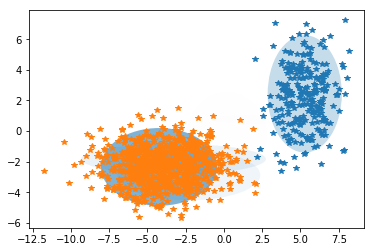

In [60]:
with sess.as_default():
    fig,ax = plt.subplots()
    plot_gaussian(mus.eval(),sigma_full,ax,pis.eval())
    plt.plot(sample1[:,0],sample1[:,1],'*')
    plt.plot(sample2[:,0],sample2[:,1],'*')
    plt.axis('equal')

In [44]:
def log_gaussian_prior(mu_0 = tf.zeros(D), sigma_0 = tf.eye(D)):
    func = lambda mu: tfd.MultivariateNormalFullCovariance(loc=mu_0, covariance_matrix = sigma_0).log_prob(mu)
    return func
    
def log_dirichlet_prior(alphas = tf.ones(K)/K):
    def func( pis):
        return tfd.Dirichlet(alphas).log_prob(pis)
    return func
    
def log_wishart_prior(df = D, scale = tf.eye(D)):
    func = lambda sigma: tfd.Wishart(df,scale).log_prob(sigma)
    return func

In [45]:
def log_joint_prior():
    log_prior_mu  = log_gaussian_prior()
    log_prior_pis = log_dirichlet_prior()
    log_prior_sigma = log_wishart_prior()
    func = lambda mus, sigmas, pis: np.sum([log_prior_mu(mu) for mu in mus]) + log_prior_pis(pis) + np.sum([log_prior_sigma(sigma) for sigma in sigmas])
    return func

def log_likelihood(x):
    func = lambda mus, sigmas, pis: tf.log(tf.reduce_sum([pis[k]*tfd.MultivariateNormalFullCovariance(mus[k], sigmas[k]).prob(x) for k in range(len(pis))]))
    return func
    
def log_posterior(data):
    log_prior = log_joint_prior()
    
    def func(theta):
        mus, sigmas, pis = theta[0], theta[1], theta[2]
        val = log_prior(mus, sigmas, pis)
        print val.dtype
        for i in range(data.shape[0]):
            print 'yes'
            log_likelihood_datapoint = log_likelihood(data[i])
            b = log_likelihood_datapoint(mus, sigmas, pis)
            b = tf.cast(b,tf.float32)
            val = val + b#log_likelihood_datapoint(mus, sigmas, pis)
        
        return val
    
    return func

In [47]:
sigmas_true = np.array([sigma1, sigma2])
mus_true = np.array([mu1, mu2])
pis_true = np.array([0.25, 0.75])
data = tf.placeholder(tf.float64, shape=[10,2])
log_posterior_data = log_posterior(data)

In [48]:
post = log_posterior_data(theta0)

<dtype: 'float32'>
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


In [49]:
data1 = samples[0:10]

In [78]:
np.random.shuffle(samples)
data1 = samples[0:10]

post.eval(feed_dict={data:data1})

-671.1405

In [83]:
tf.gradients(post, mu1)

[None]

### Plotting the cross-section of the posteriors

In [16]:
def random_move(theta, lamda = 0.05):
    mus, sigmas, pis = np.copy(theta[0]), np.copy(theta[1]), np.copy(theta[2])
    for k in range(len(mus)):
        delta_mu = lamda*mvn.rvs(mean=np.zeros(D))
        mus[k] += delta_mu
        
        sigmas[k] = invwishart.rvs(df = 600., scale = 600*sigmas[k])
        #sigmas[k] += delta_sigma
        #sigmas[k]  = np.exp(np.log(sigmas[k]) + 2*lamda*np.random.normal())
        
        delta_pis = lamda*dirichlet.rvs(np.ones(K)/K).flatten()
        pis += delta_pis
    
    pis = pis / np.sum(pis)
    
    return [mus, sigmas, pis]

### Do MCMC on the unnormalized posterior

In [450]:
def MH_sampling(func,theta0, n = 1000, lamda= 0.05):
    samples = [theta0]
    cur_theta = theta0
    accept_num = 0
    for i in range(n):
        cur_func_value = func(cur_theta)
        #Proposal distribution
        new_theta = random_move(cur_theta,lamda)

        new_func_value = func(new_theta)

        #decide whether to accept or reject
        accept_threshold = np.exp(new_func_value-cur_func_value)

        random_num = np.random.rand()
        if random_num < accept_threshold: #equivalent to the above
            samples.append(new_theta)
            cur_theta = new_theta
            accept_num += 1
            print 'accept'
        else:
            samples.append(cur_theta)
            
        if i%10 == 0: print i
    
    return (samples), 1.0*accept_num/n

In [452]:
from IPython.display import clear_output

In [453]:
posterior_samples, success_rate = MH_sampling(log_posterior_data, theta0, n = 4000, lamda = 0.1)
clear_output()
print success_rate

0.02925


In [454]:
samples_mus = []
samples_sigmas = []
samples_pis = []

for sample in posterior_samples:
    samples_mus.append(sample[0])
    samples_sigmas.append(sample[1])
    samples_pis.append(sample[2])

In [455]:
print np.mean(np.array(samples_mus[2000:]), axis=0)

print np.mean(np.array(samples_sigmas[2000:]), axis=0)

print np.mean(np.array(samples_pis[2000:]), axis=0)

print mu1, mu2

print sigma1, sigma2

[[ 9.4798732   9.71124622]
 [-9.86184596 -9.50564643]
 [ 4.51188032  6.57828327]
 [-6.51560007 -3.21434003]]
[[[ 0.29761399  0.1037639 ]
  [ 0.1037639   1.44513816]]

 [[ 1.13379088  0.52366492]
  [ 0.52366492  2.01064631]]

 [[ 0.63994865  0.95664691]
  [ 0.95664691  4.69362593]]

 [[47.27229626 15.42335304]
  [15.42335304  6.3373299 ]]]
[0.06180786 0.05401991 0.13955565 0.74461658]
[5. 3.] [-3. -2.]
[[1. 0.]
 [0. 5.]] [[4. 0.]
 [0. 1.]]


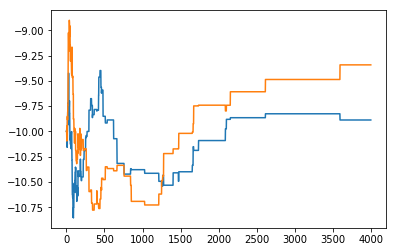

In [456]:
plt.plot(np.array(samples_mus)[:,1])

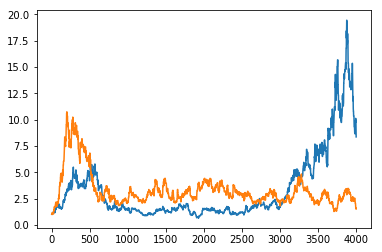

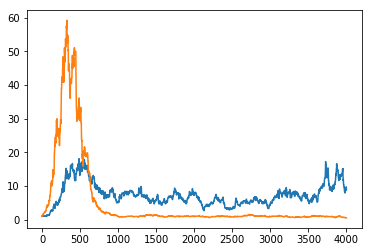

In [396]:
plt.figure()
plt.plot(np.array(samples_sigmas)[:,:,0,0])
plt.figure()
plt.plot(np.array(samples_sigmas)[:,:,1,1])

In [397]:
posterior_samples = posterior_samples[2000:]

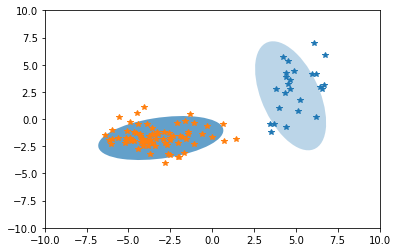

In [433]:
fig, ax = plt.subplots()
plt.plot(sample1[:,0],sample1[:,1],'*')
plt.plot(sample2[:,0],sample2[:,1],'*')
for i in range(1):
    index = np.random.randint(len(posterior_samples))
    sample = posterior_samples[index]
    mus, sigmas, pis = sample[0], sample[1], sample[2]
    plot_gaussian(mus,sigmas,ax,pis)
    
plt.show()

In [382]:
samples

array([[ 5.25376301e+00,  7.41959325e+00],
       [ 5.43632133e+00,  1.78844386e+00],
       [ 7.21531225e+00,  3.87524463e+00],
       [ 5.57769982e+00,  7.37318911e-01],
       [ 4.70028621e+00,  9.35727964e-01],
       [ 4.39008600e+00,  4.69068283e+00],
       [ 6.98331713e+00, -7.76986072e-01],
       [ 5.30648041e+00,  4.01401220e+00],
       [ 3.90801794e+00,  4.23397214e+00],
       [ 4.08152317e+00,  3.91564312e+00],
       [ 5.68001541e+00,  4.47426930e+00],
       [ 4.38769674e+00,  5.13474419e+00],
       [ 5.58540342e+00,  2.52211282e+00],
       [ 5.48652080e+00,  5.41210283e+00],
       [ 6.32155880e+00,  7.71076940e+00],
       [ 6.26227205e+00,  2.20632650e+00],
       [ 5.26530499e+00,  1.88581915e+00],
       [ 4.05551137e+00,  4.11604455e+00],
       [ 4.26654055e+00,  3.68700494e+00],
       [ 4.44987256e+00,  2.83748984e+00],
       [ 4.68845182e+00,  2.19415601e+00],
       [ 5.52601439e+00, -2.17683160e-01],
       [ 3.66179426e+00,  1.42540319e+00],
       [ 5.